In [33]:
import illustris_python as il
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import astropy.stats as astats
plt.rcParams['figure.facecolor'] = 'w'


basePath = '/Users/TaraD/TNG-300_1/output' #Folder with snapshots and group catalogs
snapshot_ind = 66

# Loading header file
header = il.groupcat.loadHeader(basePath, snapshot_ind)
#halo_grp = il.groupcat.loadHalos(basePath, snapshot_ind)
print("Header File Keys: ")
print('\n'.join(list(header.keys())))

# Loading halo group quantities 
halo_grp = il.groupcat.loadHalos(basePath, snapshot_ind)
halo_keys = (list(halo_grp.keys()))
print("\nHalo Group File Keys: ")
print('\n'.join(halo_keys))

subhalo_grp = il.groupcat.loadSubhalos(basePath, snapshot_ind)
subhalo_keys = (list(subhalo_grp.keys()))
print("\nSubHalo Group File Keys: ")
print('\n'.join(subhalo_keys))

Header File Keys: 
Ngroups_ThisFile
Nsubgroups_ThisFile
Nids_ThisFile
Ngroups_Total
Nsubgroups_Total
Nids_Total
NumFiles
Time
Redshift
HubbleParam
BoxSize
Omega0
OmegaLambda
FlagDoubleprecision
Git_commit
Git_date

Halo Group File Keys: 
count
GroupBHMass
GroupBHMdot
GroupCM
GroupFirstSub
GroupGasMetalFractions
GroupGasMetallicity
GroupLen
GroupLenType
GroupMass
GroupMassType
GroupNsubs
GroupPos
GroupSFR
GroupStarMetalFractions
GroupStarMetallicity
GroupVel
GroupWindMass
Group_M_Crit200
Group_M_Crit500
Group_M_Mean200
Group_M_TopHat200
Group_R_Crit200
Group_R_Crit500
Group_R_Mean200
Group_R_TopHat200

SubHalo Group File Keys: 
count
SubhaloBHMass
SubhaloBHMdot
SubhaloCM
SubhaloFlag
SubhaloGasMetalFractions
SubhaloGasMetalFractionsHalfRad
SubhaloGasMetalFractionsMaxRad
SubhaloGasMetalFractionsSfr
SubhaloGasMetalFractionsSfrWeighted
SubhaloGasMetallicity
SubhaloGasMetallicityHalfRad
SubhaloGasMetallicityMaxRad
SubhaloGasMetallicitySfr
SubhaloGasMetallicitySfrWeighted
SubhaloGrNr
SubhaloH

In [34]:
import time as time
t0 = time.time()
from astropy.table import Table
from astropy.table import Column
# Indexing the table
subhalo_table = Table({'Index': [x+1 for x in range(subhalo_grp['count'])]})
# Tabulating the subhalo info
for i in range(1,len(subhalo_keys)):
    subhalo_table.add_column(Column(subhalo_grp[str(subhalo_keys[i])]), name = str(subhalo_keys[i]))
# Tabulating the halo info
'''
for i in range(1, len(halo_keys)):
    subhalo_data = [0]*len(subhalo_table)
    for j in range(0, len(subhalo_table)):
        subhalo_data[j] = halo_grp[str(halo_keys[i])][subhalo_table['SubhaloGrNr'][j]]
    subhalo_table.add_column(Column(subhalo_data), name=str(halo_keys[i]))
'''
print(time.time()-t0)
print('\n'.join(subhalo_table.colnames))


623.3763570785522
Index
SubhaloBHMass
SubhaloBHMdot
SubhaloCM
SubhaloFlag
SubhaloGasMetalFractions
SubhaloGasMetalFractionsHalfRad
SubhaloGasMetalFractionsMaxRad
SubhaloGasMetalFractionsSfr
SubhaloGasMetalFractionsSfrWeighted
SubhaloGasMetallicity
SubhaloGasMetallicityHalfRad
SubhaloGasMetallicityMaxRad
SubhaloGasMetallicitySfr
SubhaloGasMetallicitySfrWeighted
SubhaloGrNr
SubhaloHalfmassRad
SubhaloHalfmassRadType
SubhaloIDMostbound
SubhaloLen
SubhaloLenType
SubhaloMass
SubhaloMassInHalfRad
SubhaloMassInHalfRadType
SubhaloMassInMaxRad
SubhaloMassInMaxRadType
SubhaloMassInRad
SubhaloMassInRadType
SubhaloMassType
SubhaloParent
SubhaloPos
SubhaloSFR
SubhaloSFRinHalfRad
SubhaloSFRinMaxRad
SubhaloSFRinRad
SubhaloSpin
SubhaloStarMetalFractions
SubhaloStarMetalFractionsHalfRad
SubhaloStarMetalFractionsMaxRad
SubhaloStarMetallicity
SubhaloStarMetallicityHalfRad
SubhaloStarMetallicityMaxRad
SubhaloStellarPhotometrics
SubhaloStellarPhotometricsMassInRad
SubhaloStellarPhotometricsRad
SubhaloVel
Su

In [35]:
print(len(subhalo_table))
print(subhalo_table.colnames)
print(subhalo_table[:10])

#is_central = np.array([0]*len(subhalo_table),dtype=bool)
#temp = halo_grp['GroupFirstSub']>-1
#groupfirstsub = np.array(halo_grp['GroupFirstSub'])
#is_central[groupfirstsub[temp]]=True
#subhalo_table.add_column(Column(is_central),name=str("IsCentral"))
subhalo_table.add_column(subhalo_table["SubhaloMassInHalfRadType"][:,4], name=str("StellarMassHalfRad"))
subhalo_table.add_column(subhalo_table["SubhaloMassType"][:,4], name=str("StellarMass"))
'''
is_field = np.array([0]*len(subhalo_table),dtype=bool)
temp2 = subhalo_table['GroupNsubs']==1
is_field = (subhalo_table['GroupNsubs'])[temp2]
subhalo_table.add_column(Column(is_field),name=str("IsField"))
is_satellite = np.array([0]*len(subhalo_table),dtype=bool)
temp3 = subhalo_table['IsCentral']==False
is_satellite = (subhalo_table['IsCentral'])[temp3]
subhalo_table.add_column(is_satellite,name=str("IsSatellite"))
'''
print(len(subhalo_table))
print(subhalo_table.colnames)
print(subhalo_table[:10])

15904796
['Index', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloCM', 'SubhaloFlag', 'SubhaloGasMetalFractions', 'SubhaloGasMetalFractionsHalfRad', 'SubhaloGasMetalFractionsMaxRad', 'SubhaloGasMetalFractionsSfr', 'SubhaloGasMetalFractionsSfrWeighted', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad', 'SubhaloGasMetallicityMaxRad', 'SubhaloGasMetallicitySfr', 'SubhaloGasMetallicitySfrWeighted', 'SubhaloGrNr', 'SubhaloHalfmassRad', 'SubhaloHalfmassRadType', 'SubhaloIDMostbound', 'SubhaloLen', 'SubhaloLenType', 'SubhaloMass', 'SubhaloMassInHalfRad', 'SubhaloMassInHalfRadType', 'SubhaloMassInMaxRad', 'SubhaloMassInMaxRadType', 'SubhaloMassInRad', 'SubhaloMassInRadType', 'SubhaloMassType', 'SubhaloParent', 'SubhaloPos', 'SubhaloSFR', 'SubhaloSFRinHalfRad', 'SubhaloSFRinMaxRad', 'SubhaloSFRinRad', 'SubhaloSpin', 'SubhaloStarMetalFractions', 'SubhaloStarMetalFractionsHalfRad', 'SubhaloStarMetalFractionsMaxRad', 'SubhaloStarMetallicity', 'SubhaloStarMetallicityHalfRad', 'SubhaloStarMetallic

In [70]:
def basic_sub_cuts(subhalos, field):
    
    #subhalos = subhalos[field][subhalos['SubhaloFlag']]
    #subhalos = subhalos[subhalos['SubhaloMass']!=0]
    #subhalos = subhalos[subhalos['SubhaloMassType'][:,4]!=0]
    mask1 = subhalos['SubhaloStellarPhotometrics']<8e+36
    photo_mask = mask1[:,0]
    for i in range (1,8):
        photo_mask = photo_mask & mask1[:,i]
    #subhalos = subhalos[photo_mask]
    mask = (subhalos['SubhaloFlag'])&(subhalos['SubhaloMass']!=0)&(subhalos['SubhaloMassType'][:,4]!=0)&(photo_mask)
    return subhalos[field][mask]
#print(len(subhalo_grp[]))
def Bootstrap_Covariance(NDensity_list, Nb, R):
    halo_array2 = np.arange(0,len(NDensity_list))
    halo_boot = astats.bootstrap(halo_array2, bootnum=300, samples=None)
    resampled_list = []
    for b in range(0,300):
        mask_b = (np.array(halo_boot[b].astype(int)))
        resampled_profile = np.mean((np.array(NDensity_list))[mask_b], axis=0)
        resampled_list.append(resampled_profile)
    resampled_array = np.array(resampled_list)
    Yi = resampled_array
    Yi_avg = np.mean(Yi, axis=0)
    Yi_avg_array = np.tile(Yi_avg, (Nb,1))
    minus_array = Yi - Yi_avg_array
    Yi_cov = np.zeros((R,R))
    for i in range(R):
        for j in range(R):
            Yi_cov[i,j] = (1./(Nb-1.))*(np.sum(minus_array[:,i]*minus_array[:,j]))
    boot_err = np.sqrt(np.diag(Yi_cov))
    return Yi_avg, Yi_cov, boot_err

#SAVITSKY GOLAY LOG DERIVATIVE:
#Functions to get log slope
import scipy.signal as signal
import scipy.interpolate as interpolate
#w = 9
#p = 5
def get_slope_sg(xx, yy, num_output,w,p):
    # Savitsky-Golay smoothing                                                                                                                                        
    window_size = w#7#9
    poly_order = p#5#5
    yy_filtered = signal.savgol_filter(np.log(yy), window_size, poly_order)
    # fit spline                                                                                                                                                      
    yy_spline = interpolate.interp1d(np.log(xx), yy_filtered, kind = 'cubic')
    #Evaluate spline on very fine grid                                                                                                                                
    numsmooth = 1000
    lnxx_fine = np.linspace(np.log(np.min(xx)), np.log(np.max(xx)), num = numsmooth)
    lnyy_fine = yy_spline(lnxx_fine)
    yy_fine = np.exp(lnyy_fine)
    #Calculate derivative using finite differences                                                                                                                    
    dlny_dlnx_fine = (lnyy_fine[1:] - lnyy_fine[:-1])/(lnxx_fine[1:] - lnxx_fine[:-1])
    #Interpolate derivative onto desired array                                                                                                                        
    interp_func = interpolate.interp1d(lnxx_fine[:-1], dlny_dlnx_fine)
    lnxx_out = np.linspace(np.min(lnxx_fine[:-1]), np.max(lnxx_fine[:-1]), num = num_output)
    dlny_dlnx_out = interp_func(lnxx_out)
    return np.exp(lnxx_out), dlny_dlnx_out, yy_fine, np.exp(lnxx_fine)

def DensityProfileColors(Rmin,Rmax,bins,r_subhalo,blue_mask_subs,red_mask_subs,green_mask_subs):    
    # MAKING PROFILE
    bin_edge = RScale*np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1) #3.5 earlier
    bin_min = bin_edge[:-1]
    bin_max = bin_edge[1:]

    
    NDensity = []
    NDensity_blue = []
    NDensity_red = []
    NDensity_green = []
    galaxies = []
    galaxies_blue = []
    galaxies_red = []
    galaxies_green = []
    
    # LOOPING THROUGH RADII, CALCULATING NUMBER DENSITY
    for i in range(0,bins):
        mask_sep = (r_subhalo >=bin_min[i])&(r_subhalo < bin_max[i])
        r_masked = r_subhalo[mask_sep]
        number = len(r_masked)
        delta_r = bin_max[i] - bin_min[i]
        volume = (4/3)*np.pi*(((bin_max[i])**3) - ((bin_min[i])**3))
        density = number/volume
        r = (bin_min[i] + bin_max[i])/2
        galaxies.append(number)
        NDensity.append(density)
        #print(r, number, density)
        
        number_blue = len(r_subhalo[mask_sep & blue_mask_subs])
        number_red = len(r_subhalo[mask_sep & red_mask_subs])
        number_green = len(r_subhalo[mask_sep & green_mask_subs])

        NDensity_blue.append(number_blue/volume)
        NDensity_red.append(number_red/volume)
        NDensity_green.append(number_green/volume)        
        galaxies_blue.append(number_blue)
        galaxies_red.append(number_red)
        galaxies_green.append(number_green)
    return NDensity, NDensity_blue, NDensity_red, NDensity_green, galaxies, galaxies_blue, galaxies_red, galaxies_green


## Color Plots, Histograms, etc

In [77]:
plt.rcParams['figure.facecolor'] = 'w'
import matplotlib.gridspec as gridspec

#BASIC CUTS APPLIED TO SUBHALOS
mag = basic_sub_cuts(subhalo_grp,'SubhaloStellarPhotometrics')
sfr = basic_sub_cuts(subhalo_grp,'SubhaloSFR')
# SUBHALO MASS MASKING
mass = basic_sub_cuts(subhalo_grp,'SubhaloMassType') #previously SubhaloMassInHalfRad (no type specification or index chosen)
mass2 = basic_sub_cuts(subhalo_grp,'SubhaloMassInHalfRad') 
print(np.shape(mass))
subhalomass = np.array(np.log10(mass[:,4]*1e10/0.704)) #previously no index
subhalomass2 = np.array(np.log10(mass2*1e10/0.704))
#mask = ((subhalo_grp['SubhaloMassInHalfRad'][:,4]*1e10)>(10**9.5))
mask1 = subhalomass>9 #previouslt it was >9.5
mask2 = subhalomass2>9.5
#basic_cuts(subhalo_grp, 'Subhalo')
print("Subhalos with total halfradmass >9.5:",len(mag[mask2]))
print("Subhalos with stellar mass > 9:", len(mag[mask1]))
group_numbers = basic_sub_cuts(subhalo_grp,'SubhaloGrNr')
sub_pos = basic_sub_cuts(subhalo_grp, 'SubhaloCM')
mag = mag[mask1]
sfr = sfr[mask1]

# CLUSTER MASS MASKING
w = (group_numbers[mask1])
cluster_mass = []
for h_i in group_numbers[mask1]:
    cluster_mass.append(halo_grp["GroupMass"][h_i]*1e10/.704)
cluster_mass = np.array(cluster_mass)
cluster_mass_mask = (cluster_mass > (5*(10**13)))

(2292785, 6)


/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


Subhalos with total halfradmass >9.5: 912807
Subhalos with stellar mass > 9: 268208


In [75]:
# WITHIN 1 MPC MASKING (OPTIONAL)
chosen_subs_group_numbers = group_numbers[mask1][cluster_mass_mask]
dist_list = []
scale_factor = header['Time']
for i in range(len(chosen_subs_group_numbers)):
    h_i = chosen_subs_group_numbers[i]
    dev = (sub_pos[mask1][cluster_mass_mask])[i] - halo_grp['GroupCM'][h_i]
    dist = np.linalg.norm(dev)*.001*scale_factor/.704
    dist_list.append(dist)
dist_array = np.array(dist_list)
#print(dist_array)

dist_list2 = []
all_subs_group_numbers = group_numbers[mask1]
for i in range(len(all_subs_group_numbers)):
    h_i = all_subs_group_numbers[i]
    dev2 = (sub_pos[mask1])[i] - halo_grp['GroupCM'][h_i]
    dist2 = np.linalg.norm(dev2)*.001*scale_factor/.704
    dist_list2.append(dist2)
dist_array2 = np.array(dist_list2)

(2292785, 6)


/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


Subhalos with total halfradmass >9.5: 912807
Subhalos with stellar mass > 9: 268208


KeyboardInterrupt: 

In [143]:
#subhalomass = np.array(np.log10(mass[:,4]*1e10/0.704)) #previously no index
metals = basic_sub_cuts(subhalo_grp,'SubhaloStarMetalFractions')[mask1]

H_abund = metals[:,0]
H_abund_cl = metals[:,0][cluster_mass_mask]
He_abund = metals[:,1]
He_abund_cl = metals[:,1][cluster_mass_mask]
C_abund = metals[:,2]
C_abund_cl = metals[:,2][cluster_mass_mask]
N_abund = metals[:,3]
N_abund_cl = metals[:,3][cluster_mass_mask]

stellar_mass = subhalomass[mask1]
stellar_mass_cl = stellar_mass[cluster_mass_mask]

sfr_cl = sfr[cluster_mass_mask]

#G-R, R-Z MAGNITUDE ARRAYS MASKED FOR SUBHALO SELECTION
mag1 = mag[cluster_mass_mask]
mag2 = mag1[dist_array <= 1.]
mag3 = mag1[dist_array > 1.]
mag4 = mag[dist_array2 > 2.]
#mag = mag[(group_numbers < 1154)&(mask)]
g_minus_r = mag[:,4]-mag[:,5]
r_minus_z = mag[:,5]-mag[:,7]
g_minus_i = mag[:,4]-mag[:,6]
r_band = mag[:,5]
i_band = mag[:,6]
g_minus_r_cl = mag1[:,4]-mag1[:,5]
r_minus_z_cl = mag1[:,5]-mag1[:,7]
g_minus_i_cl = mag1[:,4]-mag1[:,6]
r_band_cl = mag1[:,5]
i_band_cl = mag1[:,6]
g_minus_r_cl2 = mag2[:,4]-mag2[:,5]
r_minus_z_cl2 = mag2[:,5]-mag2[:,7]
r_band_cl2 = mag2[:,5]
g_minus_r_f = mag3[:,4]-mag3[:,5]
r_minus_z_f = mag3[:,5]-mag3[:,7]
g_minus_r_f2 = mag4[:,4]-mag4[:,5]
r_minus_z_f2 = mag4[:,5]-mag4[:,7]
print("mag lengths:",len(mag), len(mag1), len(mag2), len(mag3), len(mag4))
#print(group_numbers[mask][-100:])
#print(w[-1000:])
#print(cluster_mass)
    
# COLOR-CUTS
b1 = .25
b2 = .59
r1 = .61
r2 = .73

mag lengths: 268208 24706 19298 5408 810


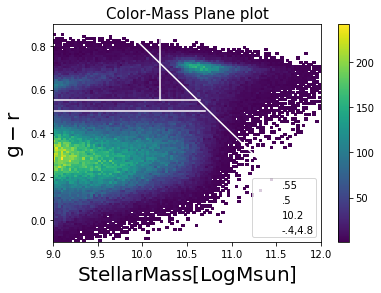

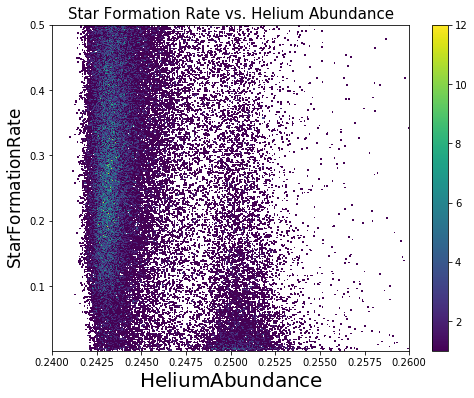

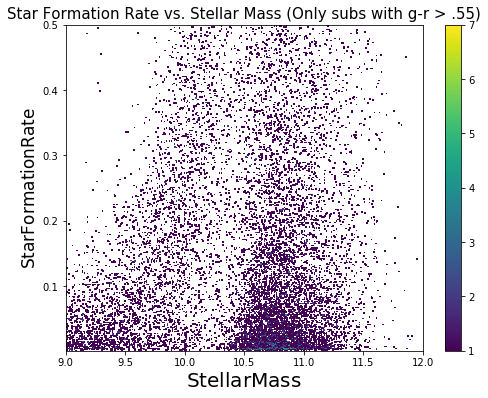

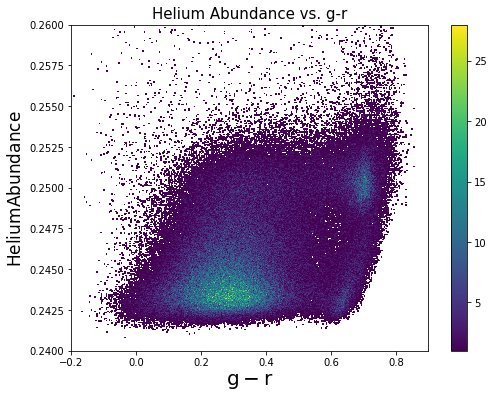

In [170]:
# COLOR-MASS PLOT
# RANGE OPTIONS
#range_hist = [[0, 0.8], [0, 0.8]] #old
range_hist = [[-.2, .9], [-.2, .8]]
#range_hist = [[.5, 0.9], [.2, 0.8]]

gmr = g_minus_r_cl
rmz = r_minus_z_cl

'''
# NUMPY HISTOGRAM WITH IMSHOW FOR OVERDENSITY PLOTS
fig1 = plt.figure(figsize = (20,15))
gs1 = gridspec.GridSpec(10,12)
ax1 = plt.subplot(gs1[3:8, 5:10])  
ax1.set_xlabel("$\mathrm{g-r}$", fontsize = 15)  ##
ax1.set_ylabel("$\mathrm{r-z}$", fontsize = 15)
ax1.set_title("300-1 Overdensity Color-Color plot \n (Inside 2 Mpc of selected, outside 2 Mpc of all)", fontsize = 15) #   (Subhalos in Selected Clusters)

#h, x, y = np.histogram2d(g_minus_r, r_minus_z, bins = 50, range=range_hist)
h_f, x_f, y_f = np.histogram2d(g_minus_r_f2, r_minus_z_f2, bins = 50, range=range_hist, weights = None)
#h_ND = h/(.007*.008)
#avg = np.mean(h)
avg = np.average(h_f, weights = (h_f > 0))
h_cl2, x_cl2, y_cl2 = np.histogram2d(g_minus_r_cl2, r_minus_z_cl2, bins = 50, range=range_hist, weights = None)
#h_ND_cl = h_cl/(.007*.008)
print(avg)
overdens = np.zeros(np.shape(h_cl2.T))
for i in range(len(h_cl2.T[:,0])):
    for j in range(len(h_cl2.T[0,:])):
        if h_cl2.T[i,j] == 0:
            overdens[i,j] = 0
        else:
            overdens[i,j] = (h_cl2.T[i,j]/len(g_minus_r_cl2)) - (avg/len(g_minus_r_f2)) #/len(g_minus_r_f) #
#overdens = h_cl2.T - avg
print(len(g_minus_r_cl2), len(g_minus_r_f2))
H2 = ax1.imshow(overdens, origin='lower', extent=[-.2, 0.9,-.2, 0.8], cmap = 'coolwarm')
fig1.colorbar(H2, ax=ax1)
'''
'''
# COLOR-COLOR PLOT SPECIFICATIONS (CHANGE DEPENDING ON WHETHER 1D HIST INCLUDED OR NOT)
fig = plt.figure(figsize = (20,15))
gs = gridspec.GridSpec(10,12)
ax0 = plt.subplot(gs[3:8, 5:10])  
axx = plt.subplot(gs[8:10, 5:10], sharex=ax0)  ##
axx.set_xlabel("$\mathrm{g-r}$", fontsize = 15)  ##
ax0.set_ylabel("$\mathrm{r-z}$", fontsize = 15)
if np.shape(gmr) == np.shape(g_minus_r):
    ax0.set_title("300-1 Color-Color plot", fontsize = 15) #   (Subhalos in Selected Clusters)
elif np.shape(gmr) == np.shape(g_minus_r_cl):
    ax0.set_title("300-1 Color-Color plot (Subhalos in Selected Clusters)", fontsize = 15) #   
elif np.shape(gmr) == np.shape(g_minus_r_cl2):
    ax0.set_title("300-1 Color-Color plot (Subhalos within 1 Mpc of Selected Clusters)", fontsize = 15) #   

#ax0.plot([b1,b1],np.linspace(0,0.8,2), c = 'b', label = b1, linewidth=1) #left blue bound
#ax0.plot([b2,b2],np.linspace(0,0.8,2), c = 'b', label = b2, linewidth=1)
#ax0.plot([r1,r1],np.linspace(0,0.8,2), c = 'r', label = r1, linewidth=1)
#ax0.plot([r2,r2],np.linspace(0,0.8,2), c = 'r', label = r2, linewidth=1)
ax0.legend()
fig.tight_layout()

# 2D AND 1D MATPLOTLIB HISTOGRAMS
h_cl, x_cl, y_cl = np.histogram2d(gmr, rmz, bins = 100, range=range_hist)
H = ax0.hist2d(gmr, rmz , bins = 200, cmap='viridis', range=range_hist, weights=None, cmin = .1, cmax = None)#range=[[0.4, 0.7], [0.5, 0.8]])
h_cl200, x_cl200, y_cl200 = np.histogram2d(gmr, rmz, bins = 200, range=range_hist)
 
#H = ax0.imshow(h_cl200.T, origin='lower', extent=[0, 0.8,0, 0.8], cmap = 'viridis')
#ax0.contour(H[0].T, extent = [H[1][0], H[1][-1], H[2][0], H[2][-1]], linewidths=3, cmap = 'viridis') #extent=[g_minus_r.min(),g_minus_r.max(),r_minus_z.min(),r_minus_z.max()])
level_list = [2,30,60,99,100]#[1,15,30,49]
ax0.contour(h_cl.T, extent = [x_cl[0], x_cl[-1], y_cl[0], y_cl[-1]], linewidths=1, cmap = 'autumn', levels = level_list) #extent=[g_minus_r.min(),g_minus_r.max(),r_minus_z.min(),r_minus_z.max()])
axx.hist(gmr, bins = H[1], range = [-.2,0.9])
plt.show()
#[1,15,30,49] extent = [x_cl[0], x_cl[-1], y_cl[0], y_cl[-1]]
#fig.colorbar(H[3], ax=ax0)
'''

# COLOR-MASS PLOT
plt.figure()
plt.hist2d(stellar_mass, g_minus_r, bins = 100, cmap = 'viridis', range=[[9, 12], [-.1, .9]], cmin=.01)
#plt.scatter(stellar_mass, g_minus_r)
plt.plot([9,10.65], [.55,.55], c = 'w', label='.55')
plt.plot([9,10.7], [.50,.50], c = 'w', label='.5')
plt.plot([10.2,10.2], [.55,.9], c = 'w', label='10.2')
#plt.plot([9.75,11.5],[.9,.2], c = 'w', label='[9.75,11.5],\n[.9,.2]')
x = np.array([9.,10.,12.])
plt.plot(x,(-.4*x)+4.8, c='w', label='-.4,4.8')
#plt.plot(stellar_mass, (stellar_mass*0.054)+.05, c = 'w')
#plt.colorbar()
plt.xlabel("$\mathrm{Stellar Mass [Log Msun]}$", fontsize = 20)
plt.ylabel("$\mathrm{g-r}$", fontsize = 20)
plt.title("Color-Mass Plane plot", fontsize = 15) #(subs in selected clusters) # \n(subs within 1 Mpc of selected clusters)
plt.colorbar()
plt.legend(loc='lower right', borderpad=.2)

'''
# COLOR-MAGNITUDE PLOT
plt.figure()
plt.hist2d(i_band_cl, mag1[:,5]-mag1[:,6], bins = 100, cmap = 'viridis', cmin=.01)
plt.xlabel("$\mathrm{i}$", fontsize = 20)
plt.ylabel("$\mathrm{r-i}$", fontsize = 20)
plt.title("Color-Magnitude Plot (subs in selected clusters)", fontsize = 15) #(subs in selected clusters) # \n(subs within 1 Mpc of selected clusters)
plt.colorbar()
'''

# STAR FORMATION PLOT
plt.figure(figsize=(8,6))#12,6?
plt.hist2d(He_abund, sfr, bins=500, cmap='viridis', cmin=.01, range=[[.24,.26], [0.001,.5]])
plt.xlabel("$\mathrm{Helium Abundance}$", fontsize = 20)
plt.ylabel("$\mathrm{Star Formation Rate}$", fontsize = 17)
plt.title("Star Formation Rate vs. Helium Abundance", fontsize = 15) #(subs in selected clusters) # \n(subs within 1 Mpc of selected clusters)
plt.colorbar()
# STAR FORMATION PLOT
plt.figure(figsize=(8,6))
plt.hist2d(stellar_mass[g_minus_r > .55], sfr[g_minus_r > .55], bins=500, cmap='viridis', cmin=.01, range=[[9,12], [0.001,.5]])
plt.xlabel("$\mathrm{Stellar Mass}$", fontsize = 20)
plt.ylabel("$\mathrm{Star Formation Rate}$", fontsize = 17)
plt.title("Star Formation Rate vs. Stellar Mass (Only subs with g-r > .55)", fontsize = 15) #(subs in selected clusters) # \n(subs within 1 Mpc of selected clusters)
plt.colorbar()
# STAR FORMATION PLOT
plt.figure(figsize=(8,6))
plt.hist2d(g_minus_r, He_abund, bins=500, cmap='viridis', cmin=.01, range=[[-.2,.9], [0.24,.26]])
plt.xlabel("$\mathrm{g-r}$", fontsize = 20)
plt.ylabel("$\mathrm{Helium Abundance}$", fontsize = 17)
plt.title("Helium Abundance vs. g-r", fontsize = 15) #(subs in selected clusters) # \n(subs within 1 Mpc of selected clusters)
plt.colorbar()
# (subs in selected clusters)

## New Table + All subhalo Color Split Profiles

In [54]:
t0 = time.time()
from astropy.cosmology import Planck15 as cosmo
plt.rcParams['figure.facecolor'] = 'w'
#R_list = np.array(Rmax_list)
scale_factor = header['Time']
mask_halomass = ((halo_grp['GroupMass'])>=((5*(10**3))))#&(halo_grp['GroupNsubs']>=5) #1e10 Msun/h
Number_of_halos = len(halo_grp['GroupMass'][mask_halomass])
print("Number of halos with mass > 5*10^13 Msun:", Number_of_halos)

halo_array = np.arange(0,len(halo_grp['GroupMass']))
halo_array_masked = halo_array[mask_halomass]#[R_list>5.]
print(halo_array_masked)

subhalo_table_clean = subhalo_table[(subhalo_table['SubhaloFlag'])&(subhalo_table['SubhaloMass']!=0)&(subhalo_table['SubhaloMassType'][:,4]!=0)]
# MAKING TABLE AFTER MASS CUT
M = 9
subhalo_table_m = subhalo_table_clean[np.array(np.log10(subhalo_table_clean['StellarMass']*(1e10)))>M]
CM_coords = subhalo_table_m['SubhaloPos'] #length of subhalo_table_m. so all subhalos greater than cutoff mass

NDensity_list = []
NDensity_list_b = []
NDensity_list_r = []
NDensity_list_g = []
ND_boot = []
ND_boot_b = []
ND_boot_r = []
ND_boot_g = []
RScale_list = []
Rmax_list = []
print(time.time()-t0)


Number of halos with mass > 5*10^13 Msun: 316
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 

## Dynamical Friction Test

8053.81
158 158


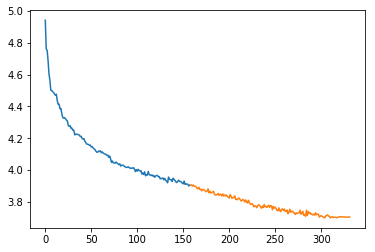

In [116]:
halo_array1=halo_array_masked[:int(len(halo_array_masked)/2)]
halo_array2=halo_array_masked[int(len(halo_array_masked)/2):]
plt.plot(halo_array1,np.log10(halo_grp['GroupMass'][halo_array1]))
plt.plot(halo_array2,np.log10(halo_grp['GroupMass'][halo_array2]))
print(halo_grp['GroupMass'][int(len(halo_array_masked)/2)])
print(len(NDensity_list_g1), len(NDensity_list_g2))


Halo: 0
Halo Mass: 87453.625
N Subhalos from Illustris Algorithm: 5464 0.09123611450195312
R500c, R200c, R200m: 0.7612624597816122 1.24644093717065 1.5473688588641492
before dev loop: 0.1545422077178955
232118 232118 time 0.18443703651428223
N Subhalos within 5*R200m: 1175 0.7283079624176025
galaxies [4, 8, 14, 20, 16, 27, 32, 21, 25, 59, 52, 35, 29, 32, 19, 39, 70, 122, 290, 243]
blue galaxies counted [0, 0, 0, 2, 1, 4, 3, 5, 3, 6, 6, 9, 4, 18, 15, 32, 40, 67, 96, 155]
red galaxies counted [2, 1, 7, 3, 4, 6, 8, 4, 6, 15, 11, 8, 8, 5, 2, 4, 11, 18, 64, 34]
red galaxies counted [2, 7, 7, 15, 11, 17, 21, 12, 16, 38, 35, 18, 17, 9, 2, 3, 19, 37, 130, 54]
sum of galaxies: 1157

Halo: 1
Halo Mass: 57760.027
N Subhalos from Illustris Algorithm: 3959 0.7513110637664795
R500c, R200c, R200m: 0.5860514830407864 0.916949635434108 1.1697442162737657
before dev loop: 0.7565782070159912
232118 232118 time 0.7728931903839111
N Subhalos within 5*R200m: 550 0.9025821685791016
galaxies [5, 7, 10, 7, 5,

N Subhalos within 5*R200m: 383 2.90191912651062
galaxies [2, 4, 3, 2, 8, 7, 10, 10, 15, 7, 14, 15, 20, 6, 3, 6, 12, 58, 112, 61]
blue galaxies counted [0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 2, 8, 1, 1, 4, 8, 27, 33, 48]
red galaxies counted [1, 3, 1, 0, 2, 5, 0, 2, 2, 1, 4, 3, 2, 0, 0, 1, 3, 10, 28, 6]
red galaxies counted [1, 1, 2, 2, 6, 0, 10, 7, 11, 5, 9, 10, 10, 5, 2, 1, 1, 21, 51, 7]
sum of galaxies: 375

Halo: 15
Halo Mass: 25923.64
N Subhalos from Illustris Algorithm: 1930 2.9114222526550293
R500c, R200c, R200m: 0.5543512035580016 0.8399260732759634 1.0439992872395611
before dev loop: 2.927420139312744
232118 232118 time 2.961153030395508
N Subhalos within 5*R200m: 434 3.021531105041504
galaxies [3, 2, 4, 12, 13, 6, 9, 4, 8, 10, 18, 13, 15, 17, 7, 10, 15, 33, 134, 95]
blue galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 1, 3, 3, 6, 8, 10, 2, 9, 12, 13, 27, 49]
red galaxies counted [0, 1, 2, 5, 2, 1, 4, 2, 2, 0, 2, 4, 2, 3, 3, 0, 1, 8, 27, 15]
red galaxies counted [3, 1, 2, 7, 10, 5, 4, 1, 

N Subhalos within 5*R200m: 158 4.050400018692017
galaxies [1, 3, 1, 2, 4, 2, 6, 8, 6, 18, 16, 9, 9, 2, 6, 7, 7, 15, 13, 18]
blue galaxies counted [0, 0, 0, 0, 0, 1, 1, 3, 1, 2, 5, 2, 4, 0, 4, 7, 7, 10, 13, 17]
red galaxies counted [1, 2, 0, 0, 2, 1, 2, 0, 2, 4, 4, 1, 0, 1, 2, 0, 0, 4, 0, 0]
red galaxies counted [0, 1, 1, 2, 2, 0, 3, 5, 3, 12, 7, 6, 5, 1, 0, 0, 0, 1, 0, 1]
sum of galaxies: 153

Halo: 29
Halo Mass: 18336.77
N Subhalos from Illustris Algorithm: 1211 4.057501316070557
R500c, R200c, R200m: 0.37254839425574054 0.582633141407676 0.7267309038611021
before dev loop: 4.071339130401611
232118 232118 time 4.0868470668792725
N Subhalos within 5*R200m: 212 4.1104042530059814
galaxies [0, 2, 2, 3, 0, 3, 2, 2, 7, 4, 6, 4, 3, 9, 17, 32, 15, 17, 24, 56]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 5, 6, 8, 7, 14, 17, 26]
red galaxies counted [0, 1, 2, 1, 0, 0, 0, 0, 2, 1, 1, 0, 2, 0, 3, 9, 2, 1, 5, 14]
red galaxies counted [0, 1, 0, 2, 0, 2, 2, 1, 4, 3, 5, 3, 1, 4, 8, 1

232118 232118 time 4.926072120666504
N Subhalos within 5*R200m: 149 4.956920146942139
galaxies [2, 2, 4, 5, 4, 5, 3, 6, 7, 4, 8, 4, 10, 10, 8, 3, 2, 18, 10, 31]
blue galaxies counted [0, 1, 0, 0, 0, 1, 1, 0, 2, 2, 3, 1, 4, 7, 3, 3, 2, 11, 9, 26]
red galaxies counted [1, 0, 1, 0, 1, 1, 0, 2, 2, 0, 1, 1, 2, 3, 2, 0, 0, 6, 0, 3]
red galaxies counted [1, 1, 3, 5, 3, 3, 2, 4, 3, 2, 4, 2, 4, 0, 3, 0, 0, 1, 1, 2]
sum of galaxies: 146

Halo: 46
Halo Mass: 14551.992
N Subhalos from Illustris Algorithm: 1044 4.961241245269775
R500c, R200c, R200m: 0.44943243635074304 0.702010991290626 0.8500623960268822
before dev loop: 4.965331315994263
232118 232118 time 4.980805158615112
N Subhalos within 5*R200m: 217 5.005075931549072
galaxies [1, 1, 4, 2, 4, 7, 7, 11, 7, 10, 8, 4, 7, 1, 6, 8, 9, 33, 28, 54]
blue galaxies counted [0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 3, 2, 7, 0, 5, 5, 8, 19, 23, 26]
red galaxies counted [0, 0, 1, 2, 1, 2, 0, 2, 3, 1, 4, 1, 0, 1, 1, 2, 1, 9, 3, 13]
red galaxies counted [1, 1, 1, 0, 1

before dev loop: 5.780542373657227
232118 232118 time 5.8061230182647705
N Subhalos within 5*R200m: 133 5.83671498298645
galaxies [0, 5, 3, 2, 5, 1, 8, 10, 8, 6, 4, 3, 2, 3, 7, 1, 4, 12, 11, 33]
blue galaxies counted [0, 2, 2, 1, 1, 0, 4, 5, 2, 4, 1, 1, 1, 2, 7, 1, 4, 10, 8, 20]
red galaxies counted [0, 1, 0, 1, 3, 0, 1, 3, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 0, 3]
red galaxies counted [0, 2, 1, 0, 1, 1, 3, 2, 6, 2, 2, 2, 0, 0, 0, 0, 0, 0, 3, 10]
sum of galaxies: 128

Halo: 62
Halo Mass: 13000.34
N Subhalos from Illustris Algorithm: 1047 5.841100215911865
R500c, R200c, R200m: 0.4069041589001368 0.6331709514128275 0.782193111526722
before dev loop: 5.846043109893799
232118 232118 time 5.8620781898498535
N Subhalos within 5*R200m: 102 5.88681697845459
galaxies [1, 0, 5, 2, 4, 5, 4, 6, 8, 5, 7, 4, 2, 7, 2, 5, 1, 10, 9, 10]
blue galaxies counted [0, 0, 0, 1, 0, 1, 0, 4, 4, 2, 2, 0, 1, 4, 2, 4, 1, 10, 8, 9]
red galaxies counted [1, 0, 0, 0, 3, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1]
red gala

galaxies [2, 0, 2, 4, 1, 5, 2, 12, 4, 5, 5, 1, 0, 1, 4, 4, 11, 15, 5, 24]
blue galaxies counted [0, 0, 1, 0, 0, 2, 1, 2, 1, 4, 3, 1, 0, 1, 4, 4, 9, 14, 5, 21]
red galaxies counted [0, 0, 0, 1, 0, 1, 0, 3, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2]
red galaxies counted [2, 0, 1, 3, 1, 2, 1, 7, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
sum of galaxies: 107

Halo: 77
Halo Mass: 11230.451
N Subhalos from Illustris Algorithm: 867 6.649877071380615
R500c, R200c, R200m: 0.33468521132386064 0.5361607498736738 0.7291663596777985
before dev loop: 6.6581010818481445
232118 232118 time 6.685178279876709
N Subhalos within 5*R200m: 98 6.704901218414307
galaxies [0, 0, 0, 2, 2, 1, 1, 2, 5, 6, 6, 12, 4, 3, 4, 4, 3, 14, 5, 21]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 3, 4, 3, 12, 5, 18]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0, 0, 2, 0, 2]
red galaxies counted [0, 0, 0, 2, 2, 1, 1, 0, 3, 4, 4, 6, 2, 1, 1, 0, 0, 0, 0, 1]
sum of galaxies: 95

Halo: 78
Halo Mass: 110

red galaxies counted [1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 3, 1, 2, 1, 3, 2, 1, 0, 5, 34]
sum of galaxies: 174

Halo: 93
Halo Mass: 10238.875
N Subhalos from Illustris Algorithm: 821 7.499176263809204
R500c, R200c, R200m: 0.4012219491090465 0.6205032903341002 0.7695008292603813
before dev loop: 7.509339094161987
232118 232118 time 7.530188083648682
N Subhalos within 5*R200m: 152 7.553907155990601
galaxies [0, 3, 2, 2, 4, 2, 4, 6, 10, 5, 9, 1, 3, 3, 9, 8, 12, 6, 16, 44]
blue galaxies counted [0, 0, 0, 0, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 7, 7, 11, 6, 11, 23]
red galaxies counted [0, 0, 1, 2, 1, 1, 0, 1, 2, 1, 2, 0, 0, 1, 2, 1, 0, 0, 3, 14]
red galaxies counted [0, 3, 1, 0, 1, 0, 3, 3, 6, 3, 6, 0, 2, 1, 0, 0, 1, 0, 2, 7]
sum of galaxies: 149

Halo: 94
Halo Mass: 10289.019
N Subhalos from Illustris Algorithm: 856 7.555555105209351
R500c, R200c, R200m: 0.3173017320764785 0.5507157951293802 0.6841214365430489
before dev loop: 7.561980247497559
232118 232118 time 7.5771400928497314
N Subhalos within 5*

N Subhalos within 5*R200m: 95 8.33209228515625
galaxies [0, 1, 1, 0, 0, 3, 1, 2, 2, 3, 2, 16, 2, 2, 5, 11, 11, 11, 5, 14]
blue galaxies counted [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 3, 2, 1, 3, 6, 5, 9, 5, 10]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 4, 2, 0, 2]
red galaxies counted [0, 1, 0, 0, 0, 3, 1, 2, 2, 1, 0, 11, 0, 1, 2, 3, 2, 0, 0, 2]
sum of galaxies: 92

Halo: 109
Halo Mass: 9206.317
N Subhalos from Illustris Algorithm: 698 8.335634231567383
R500c, R200c, R200m: 0.3922152784733877 0.5971815009099979 0.7320837502204935
before dev loop: 8.35228419303894
232118 232118 time 8.378889083862305
N Subhalos within 5*R200m: 145 8.40407133102417
galaxies [2, 1, 0, 0, 2, 4, 5, 3, 11, 6, 6, 2, 0, 5, 17, 7, 7, 18, 25, 19]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 3, 2, 2, 1, 0, 5, 10, 6, 6, 13, 20, 17]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 0, 0, 3, 0, 1, 4, 4, 2]
red galaxies counted [2, 1, 0, 0, 2, 3, 4, 1, 5, 4, 4, 0, 0, 0, 4, 1, 0, 1, 1,

N Subhalos within 5*R200m: 71 9.00971007347107
galaxies [1, 0, 1, 0, 1, 1, 1, 4, 3, 1, 0, 5, 10, 7, 1, 1, 6, 9, 11, 6]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 3, 3, 1, 1, 3, 6, 10, 6]
red galaxies counted [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 3, 2, 1, 0]
red galaxies counted [0, 0, 1, 0, 1, 1, 1, 2, 2, 0, 0, 2, 6, 2, 0, 0, 0, 1, 0, 0]
sum of galaxies: 69

Halo: 122
Halo Mass: 9256.363
N Subhalos from Illustris Algorithm: 639 9.015391111373901
R500c, R200c, R200m: 0.34896570031183993 0.5320360403799955 0.6717327755561545
before dev loop: 9.019293308258057
232118 232118 time 9.058362245559692
N Subhalos within 5*R200m: 147 9.086560010910034
galaxies [4, 1, 1, 2, 1, 1, 4, 1, 4, 2, 5, 8, 5, 7, 4, 8, 16, 8, 20, 40]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 5, 1, 4, 1, 1, 7, 7, 19, 29]
red galaxies counted [0, 1, 1, 1, 0, 1, 2, 1, 0, 0, 1, 0, 1, 1, 0, 2, 5, 1, 1, 8]
red galaxies counted [4, 0, 0, 1, 1, 0, 1, 0, 4, 2, 3, 3, 3, 2, 3, 5, 4, 0, 0, 3]
s

N Subhalos within 5*R200m: 151 9.929686069488525
galaxies [0, 0, 1, 1, 5, 4, 6, 11, 5, 5, 2, 5, 3, 4, 5, 4, 7, 12, 19, 49]
blue galaxies counted [0, 0, 0, 0, 1, 2, 1, 3, 2, 3, 2, 3, 3, 3, 4, 4, 6, 10, 12, 23]
red galaxies counted [0, 0, 0, 1, 2, 1, 1, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 4, 6]
red galaxies counted [0, 0, 1, 0, 2, 1, 4, 4, 3, 2, 0, 2, 0, 1, 0, 0, 1, 1, 3, 20]
sum of galaxies: 148

Halo: 136
Halo Mass: 8715.005
N Subhalos from Illustris Algorithm: 669 9.935208320617676
R500c, R200c, R200m: 0.3718167646563368 0.5763609038717971 0.715964038500574
before dev loop: 9.941290140151978
232118 232118 time 9.962481260299683
N Subhalos within 5*R200m: 139 9.985268115997314
galaxies [1, 4, 2, 1, 3, 3, 3, 2, 5, 6, 10, 6, 2, 6, 3, 3, 6, 18, 34, 13]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 3, 0, 0, 3, 1, 3, 6, 12, 10, 10]
red galaxies counted [1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 3, 8, 2]
red galaxies counted [0, 3, 1, 1, 3, 2, 2, 1, 3, 3, 6, 6, 0, 1, 2, 0, 0, 3,

232118 232118 time 10.586072206497192
N Subhalos within 5*R200m: 97 10.616496086120605
galaxies [0, 2, 0, 0, 3, 1, 1, 5, 2, 5, 8, 1, 2, 5, 5, 2, 9, 6, 17, 17]
blue galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 0, 3, 5, 0, 1, 1, 4, 2, 7, 6, 17, 12]
red galaxies counted [0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 5]
red galaxies counted [0, 1, 0, 0, 2, 1, 0, 3, 2, 1, 1, 1, 0, 4, 0, 0, 0, 0, 0, 0]
sum of galaxies: 91

Halo: 149
Halo Mass: 8279.199
N Subhalos from Illustris Algorithm: 669 10.620618104934692
R500c, R200c, R200m: 0.3564033807625338 0.5670571776067224 0.7089757848013387
before dev loop: 10.626007080078125
232118 232118 time 10.641810178756714
N Subhalos within 5*R200m: 88 10.664220333099365
galaxies [3, 1, 1, 1, 3, 1, 2, 2, 4, 10, 4, 7, 4, 1, 1, 5, 5, 11, 7, 14]
blue galaxies counted [1, 0, 0, 1, 1, 0, 0, 0, 1, 2, 2, 4, 2, 1, 1, 4, 5, 6, 6, 14]
red galaxies counted [0, 1, 0, 0, 2, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 0, 3, 1, 0]
red galaxies counted [2, 0, 1, 0, 0, 1, 2

232118 232118 time 12.182979106903076
N Subhalos within 5*R200m: 91 12.227724075317383
galaxies [0, 4, 1, 0, 2, 3, 3, 3, 6, 5, 1, 6, 3, 2, 5, 3, 6, 6, 13, 13]
blue galaxies counted [0, 0, 0, 0, 1, 3, 1, 2, 3, 1, 1, 0, 2, 2, 5, 2, 6, 6, 11, 11]
red galaxies counted [0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0, 1, 0, 0, 2, 2]
red galaxies counted [0, 4, 0, 0, 1, 0, 1, 1, 2, 3, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 85

Halo: 164
Halo Mass: 7866.6455
N Subhalos from Illustris Algorithm: 695 12.230478048324585
R500c, R200c, R200m: 0.3497964952473708 0.5679393767778557 0.702229419257485
before dev loop: 12.236560106277466
232118 232118 time 12.259187936782837
N Subhalos within 5*R200m: 168 12.286010265350342
galaxies [0, 1, 0, 2, 2, 0, 6, 5, 3, 9, 8, 2, 1, 5, 3, 2, 10, 20, 39, 47]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 4, 1, 0, 5, 3, 2, 10, 14, 13, 20]
red galaxies counted [0, 1, 0, 0, 0, 0, 2, 1, 0, 3, 1, 1, 0, 0, 0, 0, 0, 2, 12, 11]
red galaxies counted [0, 0, 0, 1, 

N Subhalos within 5*R200m: 106 12.905380249023438
galaxies [0, 2, 2, 0, 0, 1, 2, 1, 2, 3, 2, 4, 5, 3, 11, 6, 8, 12, 10, 30]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 2, 5, 1, 3, 5, 8, 10, 8, 19]
red galaxies counted [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 5, 0, 0, 1, 0, 5]
red galaxies counted [0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 3, 1, 0, 1, 2, 6]
sum of galaxies: 104

Halo: 177
Halo Mass: 7628.1685
N Subhalos from Illustris Algorithm: 820 12.907092094421387
R500c, R200c, R200m: 0.20972347626246787 0.35337053086199033 0.5297089177887976
before dev loop: 12.913109064102173
232118 232118 time 12.929017066955566
N Subhalos within 5*R200m: 75 12.948768138885498
galaxies [1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 5, 4, 9, 7, 2, 4, 8, 11, 8, 11]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 2, 3, 4, 2, 4, 7, 7, 8, 9]
red galaxies counted [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 3, 0, 2]
red galaxies counted [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 4, 3, 0, 0, 0, 1

N Subhalos within 5*R200m: 62 13.62759804725647
galaxies [2, 0, 2, 1, 1, 5, 1, 1, 3, 4, 6, 2, 0, 4, 3, 5, 2, 5, 2, 8]
blue galaxies counted [0, 0, 1, 1, 1, 2, 0, 1, 3, 1, 3, 2, 0, 3, 3, 3, 2, 3, 2, 7]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1]
red galaxies counted [2, 0, 1, 0, 0, 2, 1, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 57

Halo: 190
Halo Mass: 7046.362
N Subhalos from Illustris Algorithm: 669 13.632862329483032
R500c, R200c, R200m: 0.2690153194976947 0.45795633153692383 0.5738119503853708
before dev loop: 13.639916181564331
232118 232118 time 13.658849000930786
N Subhalos within 5*R200m: 82 13.678670167922974
galaxies [2, 1, 0, 0, 0, 1, 2, 1, 3, 3, 3, 1, 4, 8, 3, 4, 4, 14, 7, 18]
blue galaxies counted [0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 3, 1, 2, 1, 3, 2, 4, 14, 6, 13]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 5]
red galaxies counted [2, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 2, 4, 0, 2, 0, 0, 0, 0]
s

N Subhalos within 5*R200m: 81 14.284810066223145
galaxies [0, 0, 0, 1, 0, 4, 3, 6, 3, 3, 6, 3, 2, 3, 0, 4, 4, 3, 17, 15]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 2, 2, 0, 4, 4, 3, 11, 13]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 3, 1]
red galaxies counted [0, 0, 0, 1, 0, 4, 2, 4, 2, 1, 3, 2, 0, 0, 0, 0, 0, 0, 3, 1]
sum of galaxies: 77

Halo: 204
Halo Mass: 6706.4194
N Subhalos from Illustris Algorithm: 525 14.286222219467163
R500c, R200c, R200m: 0.321439853111377 0.4772940124606779 0.5869305595247102
before dev loop: 14.2898690700531
232118 232118 time 14.316763162612915
N Subhalos within 5*R200m: 50 14.345525979995728
galaxies [0, 1, 2, 0, 0, 1, 5, 3, 1, 0, 0, 3, 3, 8, 5, 2, 4, 1, 3, 7]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 3, 2, 5, 3, 2, 2, 1, 3, 6]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1]
red galaxies counted [0, 1, 2, 0, 0, 0, 4, 2, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 0]
sum

232118 232118 time 14.948438167572021
N Subhalos within 5*R200m: 57 14.981134176254272
galaxies [0, 0, 2, 1, 4, 2, 1, 3, 1, 3, 2, 3, 0, 1, 1, 1, 5, 3, 9, 13]
blue galaxies counted [0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 5, 3, 9, 10]
red galaxies counted [0, 0, 0, 0, 3, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1]
red galaxies counted [0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2]
sum of galaxies: 55

Halo: 218
Halo Mass: 6492.1763
N Subhalos from Illustris Algorithm: 561 14.982672214508057
R500c, R200c, R200m: 0.30844132730902335 0.47219562507440865 0.5923494627289179
before dev loop: 14.988808155059814
232118 232118 time 15.005073308944702
N Subhalos within 5*R200m: 55 15.025268077850342
galaxies [0, 0, 2, 2, 0, 1, 2, 2, 1, 4, 0, 4, 6, 6, 0, 1, 6, 6, 3, 7]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 3, 0, 1, 4, 6, 2, 7]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0]
red galaxies counted [0, 0, 2, 2, 0, 0, 1, 1

N Subhalos within 5*R200m: 60 15.601149320602417
galaxies [3, 0, 1, 1, 0, 3, 1, 3, 2, 0, 2, 5, 4, 1, 6, 1, 1, 2, 8, 12]
blue galaxies counted [0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 4, 0, 1, 6, 1, 1, 2, 6, 10]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1]
red galaxies counted [3, 0, 1, 1, 0, 1, 0, 3, 1, 0, 1, 1, 4, 0, 0, 0, 0, 0, 0, 1]
sum of galaxies: 56

Halo: 231
Halo Mass: 5988.988
N Subhalos from Illustris Algorithm: 474 15.609163045883179
R500c, R200c, R200m: 0.32520951707278106 0.49848961220517773 0.626345677965257
before dev loop: 15.622839212417603
232118 232118 time 15.643992185592651
N Subhalos within 5*R200m: 74 15.668869256973267
galaxies [1, 0, 1, 2, 0, 2, 2, 1, 2, 1, 4, 6, 4, 1, 0, 2, 7, 1, 6, 27]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 3, 2, 1, 0, 1, 6, 1, 6, 20]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 3]
red galaxies counted [1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 4]


N Subhalos within 5*R200m: 72 16.346655130386353
galaxies [0, 0, 0, 1, 0, 0, 0, 4, 2, 2, 2, 2, 4, 5, 2, 2, 3, 12, 9, 17]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 2, 3, 2, 2, 2, 10, 9, 15]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0, 2]
red galaxies counted [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 67

Halo: 245
Halo Mass: 5983.657
N Subhalos from Illustris Algorithm: 609 16.348215103149414
R500c, R200c, R200m: 0.2623690400823504 0.408838463454161 0.5164104338593012
before dev loop: 16.361064195632935
232118 232118 time 16.398391008377075
N Subhalos within 5*R200m: 57 16.424599170684814
galaxies [1, 0, 2, 1, 0, 0, 1, 2, 1, 3, 3, 3, 3, 1, 0, 1, 14, 7, 9, 4]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 0, 0, 7, 4, 8, 4]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 5, 1, 1, 0]
red galaxies counted [1, 0, 2, 1, 0, 0, 1, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2, 2, 0, 0]
s

before dev loop: 17.198984146118164
232118 232118 time 17.22380805015564
N Subhalos within 5*R200m: 63 17.24748921394348
galaxies [0, 0, 0, 1, 3, 2, 2, 2, 6, 5, 4, 1, 3, 2, 5, 2, 1, 6, 4, 10]
blue galaxies counted [0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 1, 1, 3, 2, 5, 2, 1, 4, 3, 10]
red galaxies counted [0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]
red galaxies counted [0, 0, 0, 1, 1, 0, 1, 1, 3, 2, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0]
sum of galaxies: 59

Halo: 263
Halo Mass: 5607.6855
N Subhalos from Illustris Algorithm: 481 17.24896216392517
R500c, R200c, R200m: 0.3161559060428514 0.4853225613796399 0.6059943247319596
before dev loop: 17.25337028503418
232118 232118 time 17.26941418647766
N Subhalos within 5*R200m: 113 17.289334058761597
galaxies [0, 2, 0, 0, 2, 1, 2, 5, 5, 1, 3, 4, 3, 3, 3, 2, 4, 13, 14, 43]
blue galaxies counted [0, 1, 0, 0, 0, 0, 1, 2, 3, 0, 3, 2, 2, 3, 2, 2, 4, 10, 13, 26]
red galaxies counted [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 7]
red gala

232118 232118 time 17.87168526649475
N Subhalos within 5*R200m: 69 17.891921281814575
galaxies [0, 0, 1, 3, 2, 0, 2, 1, 0, 2, 0, 0, 7, 4, 3, 0, 7, 6, 7, 23]
blue galaxies counted [0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 6, 2, 3, 0, 5, 6, 7, 21]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2]
red galaxies counted [0, 0, 0, 1, 1, 0, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0]
sum of galaxies: 68

Halo: 276
Halo Mass: 5381.3813
N Subhalos from Illustris Algorithm: 398 17.897983074188232
R500c, R200c, R200m: 0.33402358196273635 0.5072069938949929 0.625016334006395
before dev loop: 17.903685092926025
232118 232118 time 17.918469190597534
N Subhalos within 5*R200m: 68 17.93804907798767
galaxies [1, 2, 1, 0, 1, 1, 4, 2, 1, 4, 0, 2, 1, 1, 6, 5, 2, 9, 8, 15]
blue galaxies counted [0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 4, 4, 2, 8, 6, 12]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 2, 3]
red galaxies counted [1, 0, 1, 0, 1, 1, 2, 0, 

N Subhalos within 5*R200m: 49 18.52519917488098
galaxies [0, 1, 1, 2, 1, 0, 0, 2, 1, 2, 2, 1, 5, 1, 4, 1, 2, 5, 9, 8]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 3, 0, 4, 1, 2, 5, 9, 7]
red galaxies counted [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1]
red galaxies counted [0, 0, 1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 48

Halo: 289
Halo Mass: 5268.219
N Subhalos from Illustris Algorithm: 453 18.526544094085693
R500c, R200c, R200m: 0.2947966054265615 0.4896038456127583 0.6121466590858843
before dev loop: 18.5320041179657
232118 232118 time 18.570127248764038
N Subhalos within 5*R200m: 64 18.58957815170288
galaxies [0, 0, 0, 0, 0, 3, 1, 5, 4, 4, 4, 2, 0, 1, 0, 5, 1, 6, 14, 12]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 2, 3, 2, 3, 1, 0, 1, 0, 5, 0, 3, 10, 11]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 3, 1]
red galaxies counted [0, 0, 0, 0, 0, 1, 1, 3, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]
sum o

before dev loop: 19.21812605857849
232118 232118 time 19.232868194580078
N Subhalos within 5*R200m: 83 19.27587103843689
galaxies [1, 0, 0, 2, 2, 1, 1, 3, 3, 2, 4, 8, 2, 5, 2, 1, 2, 11, 7, 21]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 1, 5, 2, 1, 2, 9, 5, 19]
red galaxies counted [1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2]
red galaxies counted [0, 0, 0, 2, 2, 0, 1, 1, 2, 1, 1, 4, 1, 0, 0, 0, 0, 2, 1, 0]
sum of galaxies: 78

Halo: 305
Halo Mass: 5160.0137
N Subhalos from Illustris Algorithm: 485 19.27741312980652
R500c, R200c, R200m: 0.3141987418170756 0.47801114958867347 0.5914917646420437
before dev loop: 19.281028270721436
232118 232118 time 19.297378063201904
N Subhalos within 5*R200m: 55 19.31681728363037
galaxies [0, 2, 1, 1, 1, 3, 4, 1, 4, 2, 1, 3, 5, 1, 0, 3, 3, 7, 4, 7]
blue galaxies counted [0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 1, 2, 3, 1, 0, 3, 2, 5, 3, 5]
red galaxies counted [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 2, 1, 1]
red galaxies

(-5, 0)

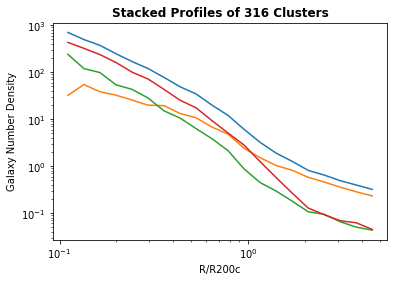

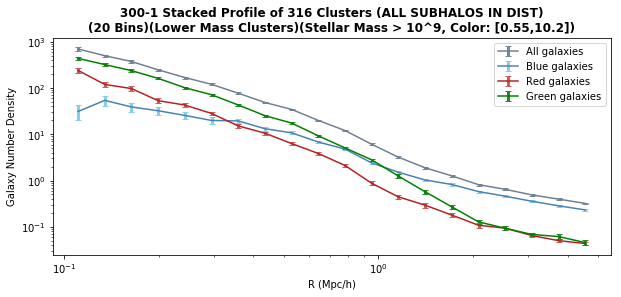

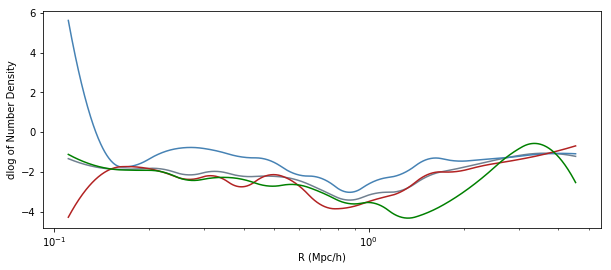

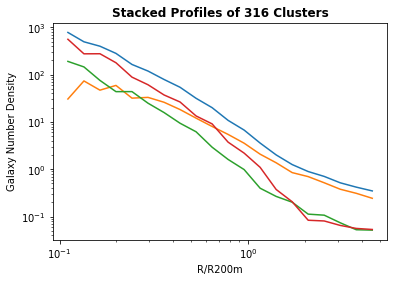

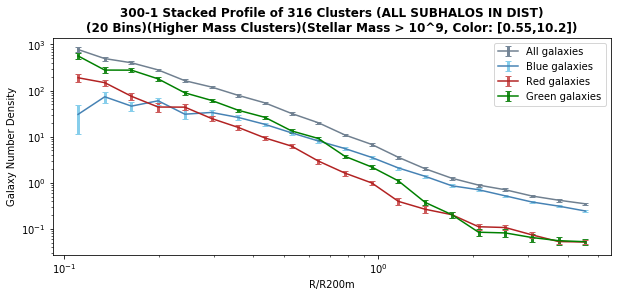

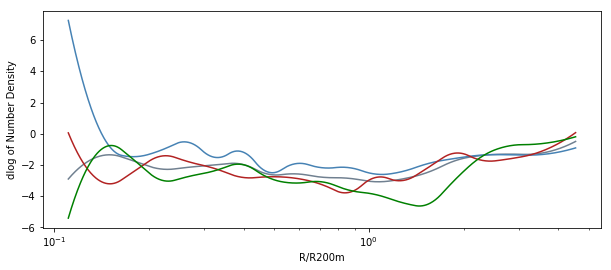

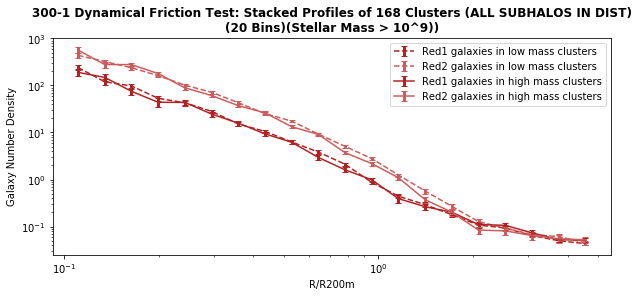

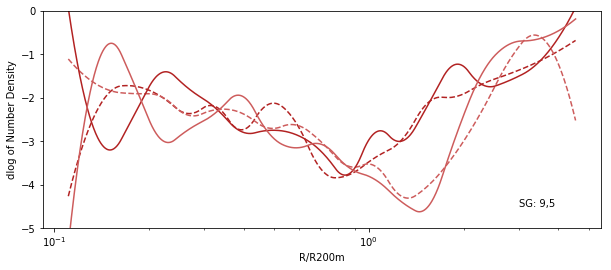

In [75]:
t0 = time.time()
w = 9
p=5
# TESTING FOR DYNAMICAL FRICTION:
halo_array1=halo_array_masked[:int(len(halo_array_masked)/2)]
halo_array2=halo_array_masked[int(len(halo_array_masked)/2):]
#print(halo_array1,halo_array2)
bins = 20#30#15
Rmin = .1
Rmax = 5#5.5 # for R200c#7
Halo_Rmax = 5
redshift = header['Redshift']
boxsize = header['BoxSize'] #kpc/h
box_bounds = boxsize*np.ones(3)#*conv_fac

NDensity_list1 = []
NDensity_list_b1 = []
NDensity_list_r1 = []
NDensity_list_g1 = []
ND_boot1 = []
ND_boot_b1 = []
ND_boot_r1 = []
ND_boot_g1 = []
RScale_list1 = []


red1_ratio21 = []
red2_ratio21 = []
number_red11 = []
number_red21 = []
for h_i1 in halo_array1:
    print("\nHalo:", h_i1)
    print("Halo Mass:", halo_grp['GroupMass'][h_i1])
    N_subhalos = halo_grp['GroupNsubs'][h_i1]
    print("N Subhalos from Illustris Algorithm:",N_subhalos, time.time()-t0)
    
    # TAKING TABLE WITH CLEAN SUBS AFTER MASS CUT AND GETTING FOR DISTANCE
    R500c = .001*scale_factor*halo_grp['Group_R_Crit500'][h_i1] #ckpc/h to Mpc/h
    R200c = .001*scale_factor*halo_grp['Group_R_Crit200'][h_i1]
    R200m = .001*scale_factor*halo_grp['Group_R_Mean200'][h_i1]
    #M200m = halo_grp['Group_M_Mean200'][h_i]
    print("R500c, R200c, R200m:",R500c, R200c, R200m)
    RScale = R200m
    RScale_list1.append(RScale)
    
    CM_halo = halo_grp['GroupPos'][h_i1]
    dev = np.array(CM_coords-CM_halo) #has all subhalos > mass cut
    print('before dev loop:',time.time()-t0)
    for ind, q in enumerate(dev.T):
        q = np.where(np.abs(q) > 0.5 * box_bounds[ind], box_bounds[ind]-np.abs(q), q)
        dev.T[ind] = q
    r_subhalo_all = np.linalg.norm(dev, axis=1)*.001*scale_factor #Mpc/h #has all subhalos > mass cut
    print(len(CM_coords),len(r_subhalo_all), 'time', time.time()-t0)
    # TAKING SUBS IN DISTANCE OF HALO CENTER
    r_subhalo_hi = r_subhalo_all[r_subhalo_all<=(Halo_Rmax*R200m)]
    subhalo_table_hi = subhalo_table_m[r_subhalo_all<=(Halo_Rmax*R200m)]
    print("N Subhalos within %s*R200m:" %(Halo_Rmax), len(r_subhalo_hi), time.time()-t0)
    
    # COLOR CUTS
    mag = subhalo_table_hi['SubhaloStellarPhotometrics']
    gmr = mag[:,4]-mag[:,5]
    rmz = mag[:,5]-mag[:,7]
    sm = np.log10(subhalo_table_hi['StellarMass']*1e10)
    b1 = -.2#.2
    b2 = 0.50#.59#.734
    r1 = 0.55#.6#.735
    r2 = 1.#1.
    sm1 = 10.2
    slope = -0.4
    intercept = 4.8
    blue_mask_subs = (gmr<0.55)#(gmr<0.53)#
    red_mask_subs = (gmr>r1)&(sm>=sm1)#&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
    green_mask_subs = (gmr>r1)&(sm<sm1)#&(gmr<((slope*sm)+intercept))
    #blue_mask_subs = (gmr<b2)&(gmr<((slope*sm)+intercept))#(gmr<0.6)#(gmr<0.53)#
    #red_mask_subs = (gmr>r1)&(sm>=sm1)&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
    #green_mask_subs = (gmr>r1)&(sm<sm1)&(gmr<((slope*sm)+intercept))
    color_title1 = '[%s,%s]' %(r1,sm1)#'[%s,%s,%s,%s,%s]' %(b2,r1,sm1,slope,intercept)
    
    red1_ratio21.extend(((subhalo_table_hi['SubhaloMass'][red_mask_subs])/(halo_grp['GroupMass'][h_i1])).tolist())
    red2_ratio21.extend(((subhalo_table_hi['SubhaloMass'][green_mask_subs])/(halo_grp['GroupMass'][h_i1])).tolist())
    
    NDensity, NDensity_blue, NDensity_red, NDensity_green, galaxies, galaxies_blue, galaxies_red, galaxies_green = DensityProfileColors(Rmin,Rmax,bins,r_subhalo_hi,blue_mask_subs,red_mask_subs,green_mask_subs)    

    print("galaxies", galaxies)
    print("blue galaxies counted", galaxies_blue)
    print("red galaxies counted", galaxies_red)
    print("red galaxies counted", galaxies_green)
    number_red11.append(sum(galaxies_red))
    number_red21.append(sum(galaxies_green))
        
    print("sum of galaxies:", sum(galaxies))

    NDensity_list1.append(NDensity) #/M200m
    NDensity_list_b1.append(NDensity_blue)
    NDensity_list_r1.append(NDensity_red)
    NDensity_list_g1.append(NDensity_green)


# RADIAL BINS, R_AVG, ETC
R_avg1 = np.mean(RScale_list1) #Mpc/h
print("R_avg:", R_avg)
#print("R200c list:", RScale_list)
bin_divided = np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1)
bin_stack11 = (bin_divided[1:]+bin_divided[:-1])/2

# PLOTTING BASIC AVERAGED STACKS
NDensity_stack1 = np.mean(NDensity_list1, axis=0)
NDensity_stack_b1 = np.mean(NDensity_list_b1, axis=0)
NDensity_stack_r1 = np.mean(NDensity_list_r1, axis=0)
NDensity_stack_g1 = np.mean(NDensity_list_g1, axis=0)
plt.figure()
plt.plot(bin_stack11, NDensity_stack1, '-')
plt.plot(bin_stack11, NDensity_stack_b1, '-')
plt.plot(bin_stack11, NDensity_stack_r1, '-')
plt.plot(bin_stack11, NDensity_stack_g1, '-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200c')
plt.ylabel('Galaxy Number Density')#  (scaled by M200m)
plt.title('Stacked Profiles of %s Clusters' %(Number_of_halos), fontweight = 'bold', wrap=True)

# BOOTSTRAP PROFILES, ERRORBARS
Yi_avg11, cov11, boot_err11 = Bootstrap_Covariance(NDensity_list1, 300, bins)
Yi_avg_blue11, cov_blue11, boot_err_blue11 = Bootstrap_Covariance(NDensity_list_b1, 300, bins)
Yi_avg_red11, cov_red11, boot_err_red11 = Bootstrap_Covariance(NDensity_list_r1, 300, bins)
Yi_avg_green11, cov_green11, boot_err_green11 = Bootstrap_Covariance(NDensity_list_g1, 300, bins)
dlog_data_SG_x1, dlog_data_SG_y1, yy_fine1, xx_fine1 = get_slope_sg(bin_stack11, (Yi_avg11), 1000,w,p)  
dlog_data_SG_x_b1, dlog_data_SG_y_b1, yy_fine_b1, xx_fine_b1 = get_slope_sg(bin_stack11, (Yi_avg_blue11), 1000,w,p)  
dlog_data_SG_x_r1, dlog_data_SG_y_r1, yy_fine_r1, xx_fine_r1 = get_slope_sg(bin_stack11, (Yi_avg_red11), 1000,w,p)  
dlog_data_SG_x_g1, dlog_data_SG_y_g1, yy_fine_g1, xx_fine_g1 = get_slope_sg(bin_stack11, (Yi_avg_green11), 1000,w,p)  

print("Time:",time.time()-t0)         
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(10,4))
plt.errorbar(bin_stack11, Yi_avg11, yerr = boot_err11, c = 'slategrey', ecolor = 'lightslategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
plt.errorbar(bin_stack11, Yi_avg_blue11, yerr = boot_err_blue11, c = 'steelblue',ecolor = 'skyblue', elinewidth = 3, capsize=3, label = 'Blue galaxies')
plt.errorbar(bin_stack11, Yi_avg_red11, yerr = boot_err_red11, c='firebrick', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red galaxies')
plt.errorbar(bin_stack11, Yi_avg_green11, yerr = boot_err_green1, c='green', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Green galaxies')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Stacked Profile of %s Clusters (ALL SUBHALOS IN DIST)\n (%s Bins)(Lower Mass Clusters)(Stellar Mass > 10^%s, Color: %s)' %(Number_of_halos, bins, M, color_title1), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
plt.figure(figsize = (10,4))
plt.plot(dlog_data_SG_x1, dlog_data_SG_y1, c = 'slategrey')
plt.plot(dlog_data_SG_x_b1, dlog_data_SG_y_b1, c = 'steelblue')
plt.plot(dlog_data_SG_x_r1, dlog_data_SG_y_r1, c = 'firebrick')
plt.plot(dlog_data_SG_x_g1, dlog_data_SG_y_g1, c = 'green')
plt.xscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('dlog of Number Density')

# HIGHER MASS CLUSTERS 

NDensity_list2 = []
NDensity_list_b2 = []
NDensity_list_r2 = []
NDensity_list_g2 = []
ND_boot2 = []
ND_boot_b2 = []
ND_boot_r2 = []
ND_boot_g2 = []
RScale_list2 = []

red1_ratio22 = []
red2_ratio22 = []
number_red12 = []
number_red22 = []
for h_i2 in halo_array2:
    print("\nHalo:", h_i2)
    print("Halo Mass:", halo_grp['GroupMass'][h_i2])
    N_subhalos = halo_grp['GroupNsubs'][h_i2]
    print("N Subhalos from Illustris Algorithm:",N_subhalos, time.time()-t0)
    
    # TAKING TABLE WITH CLEAN SUBS AFTER MASS CUT AND GETTING FOR DISTANCE
    R500c = .001*scale_factor*halo_grp['Group_R_Crit500'][h_i2] #ckpc/h to Mpc/h
    R200c = .001*scale_factor*halo_grp['Group_R_Crit200'][h_i2]
    R200m = .001*scale_factor*halo_grp['Group_R_Mean200'][h_i2]
    print("R500c, R200c, R200m:",R500c, R200c, R200m)
    RScale = R200m
    RScale_list2.append(RScale)
    
    CM_halo = halo_grp['GroupPos'][h_i2]
    dev = np.array(CM_coords-CM_halo) #has all subhalos > mass cut
    print('before dev loop:',time.time()-t0)
    for ind, q in enumerate(dev.T):
        q = np.where(np.abs(q) > 0.5 * box_bounds[ind], box_bounds[ind]-np.abs(q), q)
        dev.T[ind] = q
    r_subhalo_all = np.linalg.norm(dev, axis=1)*.001*scale_factor #Mpc/h #has all subhalos > mass cut
    print(len(CM_coords),len(r_subhalo_all), 'time', time.time()-t0)
    # TAKING SUBS IN DISTANCE OF HALO CENTER
    r_subhalo_hi = r_subhalo_all[r_subhalo_all<=(Halo_Rmax*R200m)]
    subhalo_table_hi = subhalo_table_m[r_subhalo_all<=(Halo_Rmax*R200m)]
    print("N Subhalos within %s*R200m:" %(Halo_Rmax), len(r_subhalo_hi), time.time()-t0)
    Rmax_list.append(max(r_subhalo_hi/RScale))
    
    # COLOR CUTS
    mag = subhalo_table_hi['SubhaloStellarPhotometrics']
    gmr = mag[:,4]-mag[:,5]
    rmz = mag[:,5]-mag[:,7]
    sm = np.log10(subhalo_table_hi['StellarMass']*1e10)
    b1 = -.2#.2
    b2 = 0.50#.59#.734
    r1 = 0.55#.6#.735
    r2 = 1.#1.
    sm1 = 10.2
    slope = -0.4
    intercept = 4.8
    blue_mask_subs = (gmr<0.55)#(gmr<0.53)#
    red_mask_subs = (gmr>r1)&(sm>=sm1)#&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
    green_mask_subs = (gmr>r1)&(sm<sm1)#&(gmr<((slope*sm)+intercept))
    #blue_mask_subs = (gmr<b2)&(gmr<((slope*sm)+intercept))#(gmr<0.6)#(gmr<0.53)#
    #red_mask_subs = (gmr>r1)&(sm>=sm1)&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
    #green_mask_subs = (gmr>r1)&(sm<sm1)&(gmr<((slope*sm)+intercept))
    color_title2 = '[%s,%s]' %(r1,sm1)#'[%s,%s,%s,%s,%s]' %(b2,r1,sm1,slope,intercept)
    
    red1_ratio22.extend(((subhalo_table_hi['SubhaloMass'][red_mask_subs])/(halo_grp['GroupMass'][h_i2])).tolist())
    red2_ratio22.extend(((subhalo_table_hi['SubhaloMass'][green_mask_subs])/(halo_grp['GroupMass'][h_i2])).tolist())
    
    NDensity, NDensity_blue, NDensity_red, NDensity_green, galaxies, galaxies_blue, galaxies_red, galaxies_green = DensityProfileColors(Rmin,Rmax,bins,r_subhalo_hi,blue_mask_subs,red_mask_subs,green_mask_subs)    

    print("galaxies", galaxies)
    print("blue galaxies counted", galaxies_blue)
    print("red galaxies counted", galaxies_red)
    print("red galaxies counted", galaxies_green)
    number_red12.append(sum(galaxies_red))
    number_red22.append(sum(galaxies_green))
        
    print("sum of galaxies:", sum(galaxies))

    NDensity_list2.append(NDensity) #/M200m
    NDensity_list_b2.append(NDensity_blue)
    NDensity_list_r2.append(NDensity_red)
    NDensity_list_g2.append(NDensity_green)


# RADIAL BINS, R_AVG, ETC
R_avg2 = np.mean(RScale_list2) #Mpc/h
print("R_avg:", R_avg)
#print("R200c list:", RScale_list)
bin_divided = np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1)
bin_stack12 = (bin_divided[1:]+bin_divided[:-1])/2

# PLOTTING BASIC AVERAGED STACKS
NDensity_stack2 = np.mean(NDensity_list2, axis=0)
NDensity_stack_b2 = np.mean(NDensity_list_b2, axis=0)
NDensity_stack_r2 = np.mean(NDensity_list_r2, axis=0)
NDensity_stack_g2 = np.mean(NDensity_list_g2, axis=0)
plt.figure()
plt.plot(bin_stack12, NDensity_stack2, '-')
plt.plot(bin_stack12, NDensity_stack_b2, '-')
plt.plot(bin_stack12, NDensity_stack_r2, '-')
plt.plot(bin_stack12, NDensity_stack_g2, '-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200m')
plt.ylabel('Galaxy Number Density')#  (scaled by M200m)
plt.title('Stacked Profiles of %s Clusters' %(Number_of_halos), fontweight = 'bold', wrap=True)

# BOOTSTRAP PROFILES, ERRORBARS
Yi_avg12, cov12, boot_err12 = Bootstrap_Covariance(NDensity_list2, 300, bins)
Yi_avg_blue12, cov_blue12, boot_err_blue12 = Bootstrap_Covariance(NDensity_list_b2, 300, bins)
Yi_avg_red12, cov_red12, boot_err_red12 = Bootstrap_Covariance(NDensity_list_r2, 300, bins)
Yi_avg_green12, cov_green12, boot_err_green12 = Bootstrap_Covariance(NDensity_list_g2, 300, bins)

dlog_data_SG_x2, dlog_data_SG_y2, yy_fine2, xx_fine2 = get_slope_sg(bin_stack12, (Yi_avg12), 1000,w,p)  
dlog_data_SG_x_b2, dlog_data_SG_y_b2, yy_fine_b2, xx_fine_b2 = get_slope_sg(bin_stack12, (Yi_avg_blue12), 1000,w,p)  
dlog_data_SG_x_r2, dlog_data_SG_y_r2, yy_fine_r2, xx_fine_r2 = get_slope_sg(bin_stack12, (Yi_avg_red12), 1000,w,p)  
dlog_data_SG_x_g2, dlog_data_SG_y_g2, yy_fine_g2, xx_fine_g2 = get_slope_sg(bin_stack12, (Yi_avg_green12), 1000,w,p)  

print("Time:",time.time()-t0)         
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(10,4))
plt.errorbar(bin_stack12, Yi_avg12, yerr = boot_err12, c = 'slategrey', ecolor = 'lightslategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
plt.errorbar(bin_stack12, Yi_avg_blue12, yerr = boot_err_blue12, c = 'steelblue',ecolor = 'skyblue', elinewidth = 3, capsize=3, label = 'Blue galaxies')
plt.errorbar(bin_stack12, Yi_avg_red12, yerr = boot_err_red12, c='firebrick', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red galaxies')
plt.errorbar(bin_stack12, Yi_avg_green12, yerr = boot_err_green12, c='green', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Green galaxies')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200m')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Stacked Profile of %s Clusters (ALL SUBHALOS IN DIST)\n (%s Bins)(Higher Mass Clusters)(Stellar Mass > 10^%s, Color: %s)' %(Number_of_halos, bins, M, color_title2), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
plt.figure(figsize = (10,4))
plt.plot(dlog_data_SG_x2, dlog_data_SG_y2, c = 'slategrey')
plt.plot(dlog_data_SG_x_b2, dlog_data_SG_y_b2, c = 'steelblue')
plt.plot(dlog_data_SG_x_r2, dlog_data_SG_y_r2, c = 'firebrick')
plt.plot(dlog_data_SG_x_g2, dlog_data_SG_y_g2, c = 'green')
plt.xscale('log')
plt.xlabel('R/R200m')
plt.ylabel('dlog of Number Density')

# PLOTTING ALL
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(10,4))
plt.errorbar(bin_stack11, Yi_avg_red11, yerr = boot_err_red11, c='firebrick', ecolor = 'firebrick', elinewidth = 3, capsize=3, label = 'Red1 galaxies in low mass clusters', ls='--')
plt.errorbar(bin_stack11, Yi_avg_green11, yerr = boot_err_green11, c='indianred', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red2 galaxies in low mass clusters', ls='--')
plt.errorbar(bin_stack12, Yi_avg_red12, yerr = boot_err_red12, c='firebrick', ecolor = 'firebrick', elinewidth = 3, capsize=3, label = 'Red1 galaxies in high mass clusters')
plt.errorbar(bin_stack12, Yi_avg_green12, yerr = boot_err_green12, c='indianred', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red2 galaxies in high mass clusters')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200m')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Dynamical Friction Test: Stacked Profiles of 168 Clusters (ALL SUBHALOS IN DIST)\n (%s Bins)(Stellar Mass > 10^%s))' %(bins, M), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
plt.figure(figsize = (10,4))
plt.plot(dlog_data_SG_x_r1, dlog_data_SG_y_r1, c = 'firebrick', ls='--')
plt.plot(dlog_data_SG_x_g1, dlog_data_SG_y_g1, c = 'indianred',ls='--')
plt.plot(dlog_data_SG_x_r2, dlog_data_SG_y_r2, c = 'firebrick')
plt.plot(dlog_data_SG_x_g2, dlog_data_SG_y_g2, c = 'indianred')
plt.xscale('log')
plt.xlabel('R/R200m')
plt.ylabel('dlog of Number Density')
plt.text(3,-4.5,'SG: %s,%s'%(w,p))
plt.ylim(-5,0)



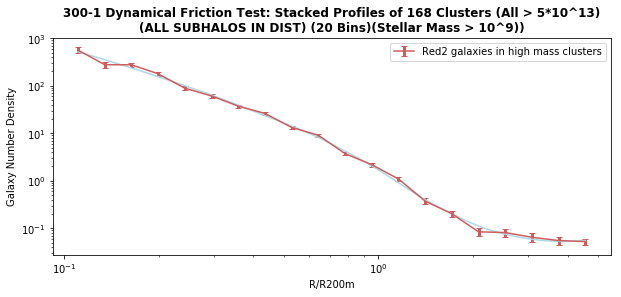

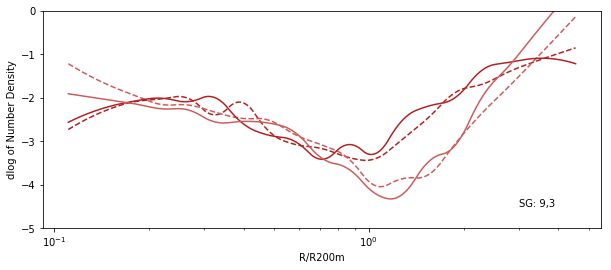

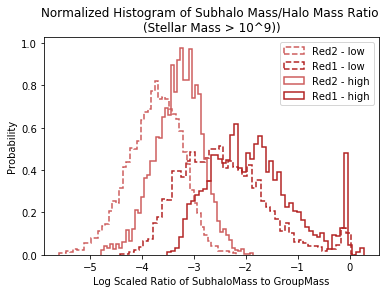

In [108]:
w = 9
p = 3
dlog_data_SG_x1, dlog_data_SG_y1, yy_fine1, xx_fine1 = get_slope_sg(bin_stack11, (Yi_avg11), 1000,w,p)  
dlog_data_SG_x_b1, dlog_data_SG_y_b1, yy_fine_b1, xx_fine_b1 = get_slope_sg(bin_stack11, (Yi_avg_blue11), 1000,w,p)  
dlog_data_SG_x_r1, dlog_data_SG_y_r1, yy_fine_r1, xx_fine_r1 = get_slope_sg(bin_stack11, (Yi_avg_red11), 1000,w,p)  
dlog_data_SG_x_g1, dlog_data_SG_y_g1, yy_fine_g1, xx_fine_g1 = get_slope_sg(bin_stack11, (Yi_avg_green11), 1000,w,p)  

dlog_data_SG_x2, dlog_data_SG_y2, yy_fine2, xx_fine2 = get_slope_sg(bin_stack12, (Yi_avg12), 1000,w,p)  
dlog_data_SG_x_b2, dlog_data_SG_y_b2, yy_fine_b2, xx_fine_b2 = get_slope_sg(bin_stack12, (Yi_avg_blue12), 1000,w,p)  
dlog_data_SG_x_r2, dlog_data_SG_y_r2, yy_fine_r2, xx_fine_r2 = get_slope_sg(bin_stack12, (Yi_avg_red12), 1000,w,p)  
dlog_data_SG_x_g2, dlog_data_SG_y_g2, yy_fine_g2, xx_fine_g2 = get_slope_sg(bin_stack12, (Yi_avg_green12), 1000,w,p)  


# PLOTTING ALL
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(10,4))
#plt.errorbar(bin_stack11, Yi_avg_red11, yerr = boot_err_red11, c='firebrick', ecolor = 'firebrick', elinewidth = 3, capsize=3, label = 'Red1 galaxies in low mass clusters', ls='--')
#plt.errorbar(bin_stack11, Yi_avg_green11, yerr = boot_err_green11, c='indianred', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red2 galaxies in low mass clusters', ls='--')
#plt.errorbar(bin_stack12, Yi_avg_red12, yerr = boot_err_red12, c='firebrick', ecolor = 'firebrick', elinewidth = 3, capsize=3, label = 'Red1 galaxies in high mass clusters')
plt.errorbar(bin_stack12, Yi_avg_green12, yerr = boot_err_green12, c='indianred', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red2 galaxies in high mass clusters')
#plt.plot(xx_fine_r1,yy_fine_r1, 'lightblue')
#plt.plot(xx_fine_g1,yy_fine_g1, 'lightblue')
#plt.plot(xx_fine_r2,yy_fine_r2, 'lightblue')
plt.plot(xx_fine_g2,yy_fine_g2, 'lightblue')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200m')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Dynamical Friction Test: Stacked Profiles of 168 Clusters (All > 5*10^13)\n(ALL SUBHALOS IN DIST) (%s Bins)(Stellar Mass > 10^%s))' %(bins, M), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
plt.figure(figsize = (10,4))
plt.plot(dlog_data_SG_x_r1, dlog_data_SG_y_r1, c = 'firebrick', ls='--')
plt.plot(dlog_data_SG_x_g1, dlog_data_SG_y_g1, c = 'indianred',ls='--')
plt.plot(dlog_data_SG_x_r2, dlog_data_SG_y_r2, c = 'firebrick')
plt.plot(dlog_data_SG_x_g2, dlog_data_SG_y_g2, c = 'indianred')
plt.xscale('log')
plt.xlabel('R/R200m')
plt.ylabel('dlog of Number Density')
plt.text(3,-4.5,'SG: %s,%s'%(w,p))
plt.ylim(-5,0)

plt.figure()
plt.hist(np.log10(red2_ratio21), bins=50, label = 'Red2 - low', density=True, stacked=True, color='indianred', histtype='step',ls='dashed', lw = 1.5)
plt.hist(np.log10(red1_ratio21), bins=50, label = 'Red1 - low',density=True,stacked=True,color='firebrick', histtype='step',ls='dashed', lw = 1.5)
plt.hist(np.log10(red2_ratio22), bins=50, label = 'Red2 - high', density=True, stacked=True, color='indianred', histtype='step', lw = 1.5)
plt.hist(np.log10(red1_ratio22), bins=50, label = 'Red1 - high',density=True,stacked=True,color='firebrick', histtype='step', lw = 1.5)
plt.xlabel('Log Scaled Ratio of SubhaloMass to GroupMass')
plt.ylabel('Probability')
plt.title('Normalized Histogram of Subhalo Mass/Halo Mass Ratio \n(Stellar Mass > 10^%s))' %(M))
plt.legend()

## New Color Split Profiles (remove plots to run faster, change to pos)

starting halo loop

Halo: 0
Halo Mass: 87453.625
N Subhalos from Illustris Algorithm: 5464 0.041168928146362305
R500c, R200c, R200m: 0.7612624597816122 1.24644093717065 1.5473688588641492
before dev loop: 0.15134000778198242
True
232118 232118 time 0.4849379062652588
N Subhalos within 5*R200m: 1184 2.9923057556152344


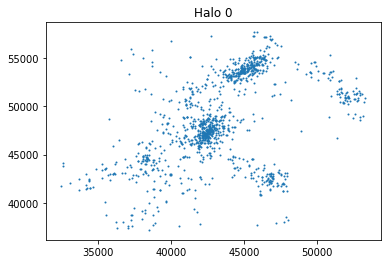

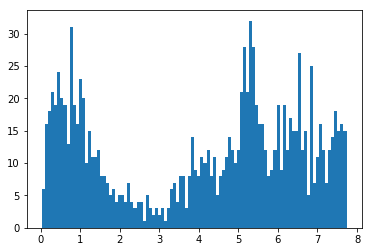

galaxies [7, 12, 13, 17, 18, 27, 29, 25, 52, 50, 39, 40, 23, 27, 20, 33, 91, 150, 246, 255]
blue galaxies counted [0, 0, 2, 1, 0, 0, 5, 3, 6, 9, 5, 7, 5, 14, 18, 26, 52, 67, 91, 163]
red galaxies counted [2, 6, 3, 5, 5, 7, 6, 2, 12, 12, 10, 11, 3, 6, 2, 1, 17, 25, 52, 37]
red galaxies counted [5, 6, 8, 11, 13, 20, 18, 20, 34, 29, 24, 22, 15, 7, 0, 6, 22, 58, 103, 55]
sum of galaxies: 1174

Halo: 1
Halo Mass: 57760.027
N Subhalos from Illustris Algorithm: 3959 10.46444582939148
R500c, R200c, R200m: 0.5860514830407864 0.916949635434108 1.1697442162737657
before dev loop: 10.48483681678772
True
232118 232118 time 10.569814920425415
N Subhalos within 5*R200m: 561 11.10080099105835


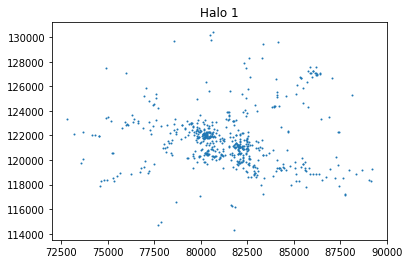

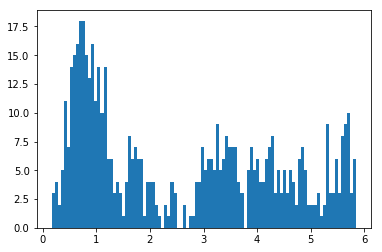

galaxies [0, 2, 0, 1, 5, 4, 14, 16, 35, 44, 47, 41, 19, 31, 23, 12, 44, 66, 71, 86]
blue galaxies counted [0, 0, 0, 0, 1, 0, 6, 1, 3, 5, 9, 11, 4, 13, 15, 10, 26, 50, 59, 70]
red galaxies counted [0, 0, 0, 0, 2, 2, 1, 5, 11, 13, 14, 8, 9, 7, 6, 0, 6, 8, 9, 5]
red galaxies counted [0, 2, 0, 1, 2, 2, 7, 10, 21, 26, 24, 22, 6, 11, 2, 2, 12, 8, 3, 11]
sum of galaxies: 561

Halo: 2
Halo Mass: 56635.2
N Subhalos from Illustris Algorithm: 4227 11.758677959442139
R500c, R200c, R200m: 0.63745263599046 1.0698215083949882 1.3174896777323941
before dev loop: 11.769558906555176
True
232118 232118 time 11.82809591293335
N Subhalos within 5*R200m: 1066 12.381793975830078


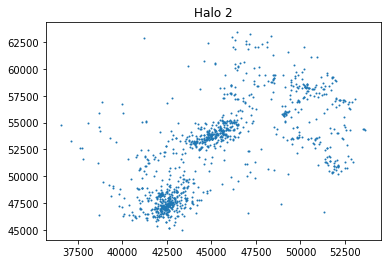

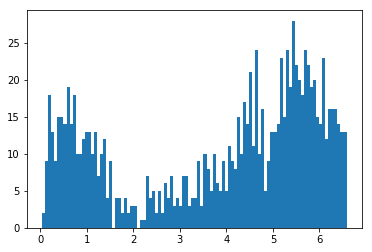

galaxies [2, 12, 9, 12, 9, 15, 23, 28, 33, 25, 35, 39, 25, 15, 21, 35, 58, 115, 230, 319]
blue galaxies counted [0, 1, 0, 1, 0, 0, 6, 4, 5, 6, 7, 12, 13, 14, 18, 29, 41, 58, 68, 133]
red galaxies counted [1, 3, 2, 5, 1, 5, 5, 11, 8, 5, 8, 5, 5, 1, 1, 6, 10, 23, 52, 56]
red galaxies counted [1, 8, 7, 6, 8, 10, 12, 13, 20, 14, 20, 22, 7, 0, 2, 0, 7, 34, 110, 130]
sum of galaxies: 1060

Halo: 3
Halo Mass: 48978.547
N Subhalos from Illustris Algorithm: 3272 13.107071876525879
R500c, R200c, R200m: 0.6330767903831258 0.987386489440597 1.2432116782515197
before dev loop: 13.130951881408691
True
232118 232118 time 13.153667688369751
N Subhalos within 5*R200m: 497 13.583352088928223


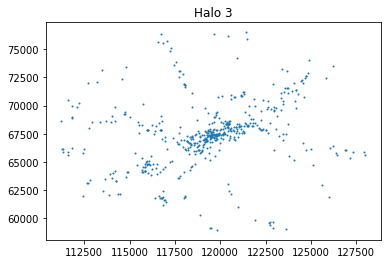

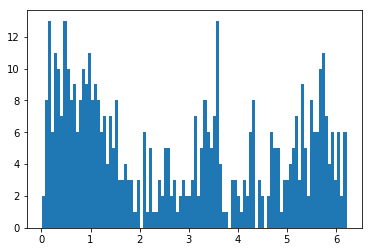

galaxies [4, 7, 5, 9, 8, 9, 17, 17, 15, 22, 28, 29, 26, 16, 17, 22, 43, 40, 50, 105]
blue galaxies counted [1, 1, 1, 1, 1, 0, 6, 2, 4, 4, 12, 3, 6, 10, 13, 15, 24, 27, 45, 87]
red galaxies counted [1, 2, 0, 2, 0, 3, 2, 6, 3, 7, 7, 7, 2, 2, 2, 6, 6, 6, 2, 8]
red galaxies counted [2, 4, 4, 6, 7, 6, 9, 9, 8, 11, 9, 19, 18, 4, 2, 1, 13, 7, 3, 10]
sum of galaxies: 489

Halo: 4
Halo Mass: 40328.406
N Subhalos from Illustris Algorithm: 2827 14.274255752563477
R500c, R200c, R200m: 0.5571458484726928 0.8615962414074034 1.082398091096772
before dev loop: 14.281713962554932
True
232118 232118 time 14.308891773223877
N Subhalos within 5*R200m: 505 14.394076824188232


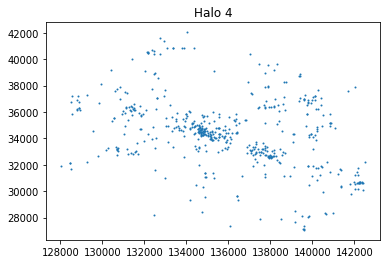

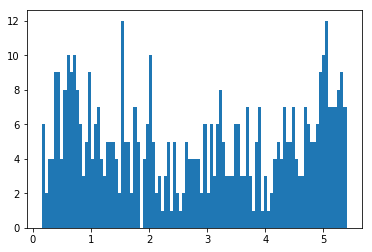

galaxies [0, 0, 6, 2, 1, 5, 11, 13, 17, 21, 20, 26, 20, 31, 34, 25, 34, 57, 59, 123]
blue galaxies counted [0, 0, 4, 1, 0, 0, 1, 4, 2, 1, 7, 9, 7, 9, 19, 22, 28, 40, 51, 87]
red galaxies counted [0, 0, 1, 0, 0, 3, 3, 3, 5, 4, 2, 2, 3, 8, 5, 1, 6, 11, 7, 23]
red galaxies counted [0, 0, 1, 1, 1, 2, 7, 6, 10, 16, 11, 15, 10, 14, 10, 2, 0, 6, 1, 13]
sum of galaxies: 505

Halo: 5
Halo Mass: 36715.758
N Subhalos from Illustris Algorithm: 2489 15.293644905090332
R500c, R200c, R200m: 0.6429307101138425 0.9330389209709606 1.1332630626387952
before dev loop: 15.299202919006348
True
232118 232118 time 15.33021593093872
N Subhalos within 5*R200m: 389 15.42461109161377


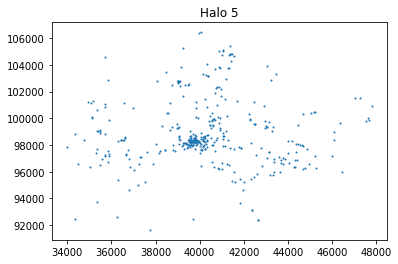

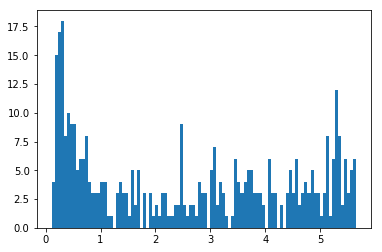

galaxies [0, 3, 9, 17, 12, 17, 13, 16, 13, 15, 10, 12, 10, 16, 11, 23, 29, 39, 41, 82]
blue galaxies counted [0, 0, 0, 1, 0, 2, 2, 4, 3, 7, 3, 5, 7, 10, 8, 19, 22, 32, 33, 70]
red galaxies counted [0, 2, 2, 6, 4, 4, 4, 3, 2, 2, 3, 2, 1, 2, 0, 3, 4, 4, 6, 11]
red galaxies counted [0, 1, 7, 10, 8, 11, 7, 9, 8, 6, 4, 5, 2, 4, 3, 1, 3, 3, 2, 1]
sum of galaxies: 388

Halo: 6
Halo Mass: 31760.066
N Subhalos from Illustris Algorithm: 2247 16.152021884918213
R500c, R200c, R200m: 0.5855748728968245 0.8941465723968443 1.086389525901727
before dev loop: 16.157088041305542
True
232118 232118 time 16.18552803993225
N Subhalos within 5*R200m: 516 16.245208024978638


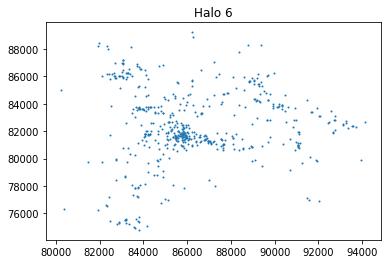

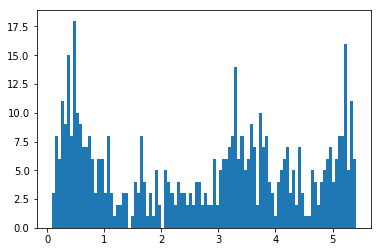

galaxies [1, 0, 8, 5, 12, 9, 19, 23, 19, 21, 15, 19, 9, 19, 16, 26, 31, 86, 74, 102]
blue galaxies counted [1, 0, 0, 0, 2, 1, 4, 11, 3, 7, 4, 9, 6, 14, 15, 22, 28, 54, 66, 71]
red galaxies counted [0, 0, 3, 1, 1, 3, 2, 4, 2, 4, 0, 2, 1, 3, 1, 3, 2, 18, 7, 16]
red galaxies counted [0, 0, 5, 4, 9, 5, 13, 8, 14, 10, 11, 8, 2, 2, 0, 1, 1, 14, 1, 15]
sum of galaxies: 514

Halo: 7
Halo Mass: 31613.166
N Subhalos from Illustris Algorithm: 2444 16.978147745132446
R500c, R200c, R200m: 0.5982765232247936 0.8834512886354261 1.0688772558241793
before dev loop: 16.986093044281006
True
232118 232118 time 17.011682987213135
N Subhalos within 5*R200m: 460 17.04763174057007


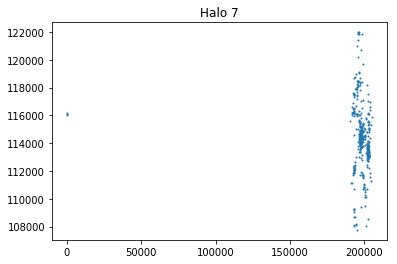

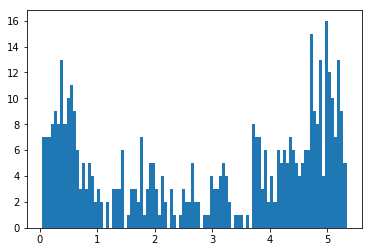

galaxies [2, 4, 4, 6, 9, 7, 18, 17, 20, 13, 11, 9, 7, 15, 25, 15, 21, 26, 71, 150]
blue galaxies counted [0, 1, 1, 1, 0, 1, 2, 4, 4, 4, 5, 4, 5, 11, 16, 14, 19, 16, 46, 73]
red galaxies counted [1, 2, 2, 1, 3, 2, 5, 6, 8, 0, 2, 1, 0, 3, 5, 1, 1, 4, 15, 25]
red galaxies counted [1, 1, 1, 4, 6, 4, 11, 7, 8, 9, 4, 4, 2, 1, 4, 0, 1, 6, 10, 52]
sum of galaxies: 450

Halo: 8
Halo Mass: 31110.195
N Subhalos from Illustris Algorithm: 2420 18.422278881072998
R500c, R200c, R200m: 0.5895938914387969 0.9054767224886232 1.1040761059806872
before dev loop: 18.446583032608032
True
232118 232118 time 18.4697527885437
N Subhalos within 5*R200m: 337 18.518619775772095


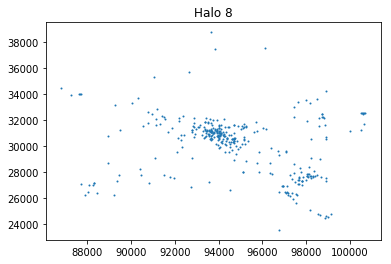

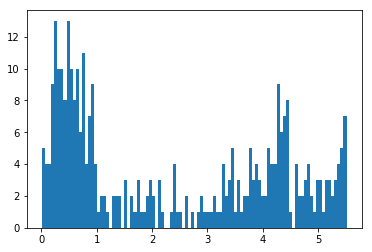

galaxies [5, 2, 6, 5, 14, 10, 12, 20, 19, 23, 21, 6, 7, 7, 13, 11, 9, 27, 63, 52]
blue galaxies counted [1, 0, 0, 1, 2, 1, 3, 7, 6, 8, 7, 2, 7, 6, 12, 10, 8, 18, 40, 40]
red galaxies counted [2, 1, 0, 1, 3, 3, 1, 2, 2, 4, 1, 1, 0, 1, 1, 1, 1, 5, 7, 9]
red galaxies counted [2, 1, 6, 3, 9, 6, 8, 11, 11, 11, 13, 3, 0, 0, 0, 0, 0, 4, 16, 3]
sum of galaxies: 332

Halo: 9
Halo Mass: 30706.139
N Subhalos from Illustris Algorithm: 2098 19.197017908096313
R500c, R200c, R200m: 0.5962877718168602 0.8789393258933192 1.0832641163495382
before dev loop: 19.203770875930786
True
232118 232118 time 19.23359489440918
N Subhalos within 5*R200m: 295 19.2707998752594


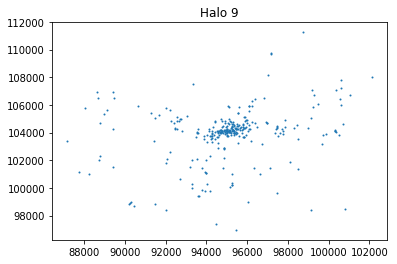

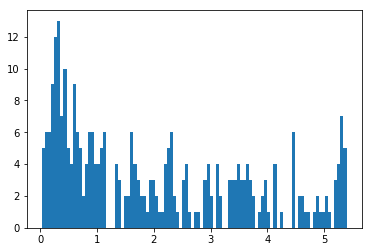

galaxies [3, 0, 6, 9, 9, 15, 12, 11, 14, 11, 16, 18, 7, 16, 14, 22, 17, 31, 18, 38]
blue galaxies counted [0, 0, 1, 1, 3, 2, 1, 5, 5, 3, 3, 6, 4, 11, 11, 19, 16, 30, 18, 35]
red galaxies counted [1, 0, 3, 3, 0, 5, 5, 2, 3, 3, 5, 3, 1, 3, 1, 2, 1, 1, 0, 3]
red galaxies counted [2, 0, 2, 5, 6, 8, 6, 4, 6, 5, 8, 9, 2, 2, 2, 1, 0, 0, 0, 0]
sum of galaxies: 287

Halo: 10
Halo Mass: 30121.426
N Subhalos from Illustris Algorithm: 1684 19.922724723815918
R500c, R200c, R200m: 0.5949337266014821 0.8930961484609122 1.0910091012492074
before dev loop: 19.93130588531494
True
232118 232118 time 19.95476770401001
N Subhalos within 5*R200m: 371 19.998616695404053


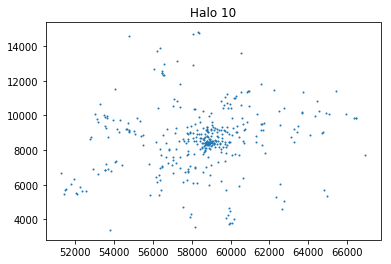

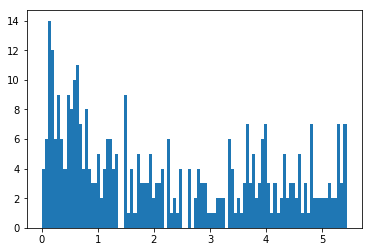

galaxies [1, 9, 9, 9, 7, 7, 8, 16, 20, 15, 15, 13, 22, 15, 23, 22, 17, 29, 50, 55]
blue galaxies counted [0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 3, 2, 4, 8, 13, 16, 10, 27, 46, 50]
red galaxies counted [1, 2, 3, 5, 0, 2, 3, 1, 2, 4, 2, 2, 4, 1, 4, 2, 4, 2, 3, 3]
red galaxies counted [0, 7, 6, 4, 6, 4, 4, 13, 16, 10, 10, 9, 14, 6, 6, 4, 3, 0, 1, 2]
sum of galaxies: 362

Halo: 11
Halo Mass: 29552.848
N Subhalos from Illustris Algorithm: 1911 20.637571811676025
R500c, R200c, R200m: 0.5660555156326001 0.8945970400440394 1.0926228899852932
before dev loop: 20.642762899398804
True
232118 232118 time 20.66118288040161
N Subhalos within 5*R200m: 443 20.719247817993164


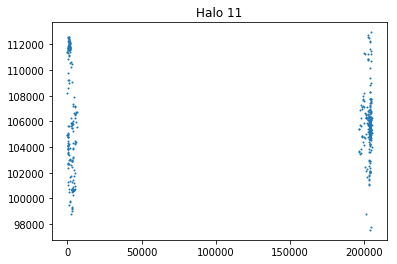

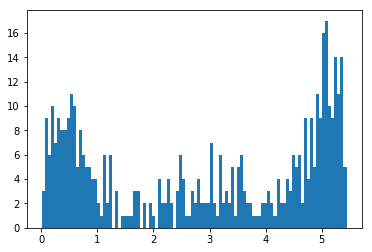

galaxies [3, 2, 4, 8, 11, 10, 8, 17, 18, 17, 14, 13, 11, 6, 9, 22, 27, 40, 31, 161]
blue galaxies counted [0, 0, 0, 0, 0, 0, 2, 4, 4, 4, 0, 6, 5, 5, 9, 16, 22, 35, 27, 91]
red galaxies counted [1, 0, 1, 1, 3, 6, 0, 1, 4, 6, 1, 1, 3, 1, 0, 5, 4, 5, 2, 29]
red galaxies counted [2, 2, 3, 7, 8, 4, 6, 12, 10, 7, 13, 6, 3, 0, 0, 1, 1, 0, 2, 41]
sum of galaxies: 432

Halo: 12
Halo Mass: 29994.932
N Subhalos from Illustris Algorithm: 1923 21.397665977478027
R500c, R200c, R200m: 0.5770362450325272 0.8675239024200502 1.07320081643798
before dev loop: 21.401763677597046
True
232118 232118 time 21.418615102767944
N Subhalos within 5*R200m: 251 21.874059915542603


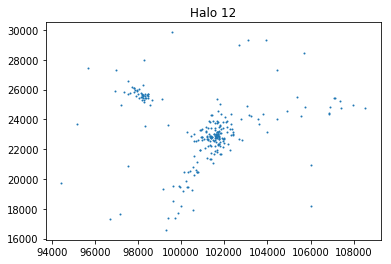

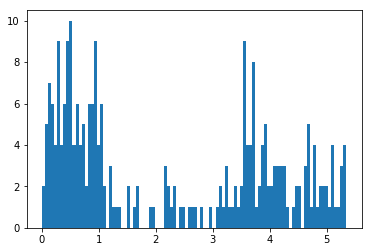

galaxies [4, 3, 5, 3, 6, 7, 8, 15, 13, 11, 14, 21, 6, 3, 4, 9, 6, 27, 42, 38]
blue galaxies counted [0, 0, 0, 0, 1, 1, 1, 3, 5, 1, 3, 6, 1, 3, 4, 9, 5, 14, 22, 35]
red galaxies counted [1, 2, 1, 1, 1, 2, 3, 4, 2, 1, 2, 5, 1, 0, 0, 0, 1, 1, 8, 3]
red galaxies counted [3, 1, 4, 2, 4, 4, 4, 8, 6, 9, 9, 10, 4, 0, 0, 0, 0, 12, 12, 0]
sum of galaxies: 245

Halo: 13
Halo Mass: 27343.611
N Subhalos from Illustris Algorithm: 1930 22.502164840698242
R500c, R200c, R200m: 0.493707176709387 0.7360678987552932 0.9043717716298794
before dev loop: 22.5155987739563
True
232118 232118 time 22.544378757476807
N Subhalos within 5*R200m: 283 22.620712995529175


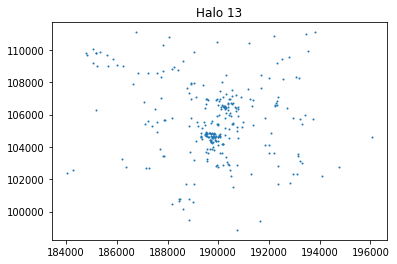

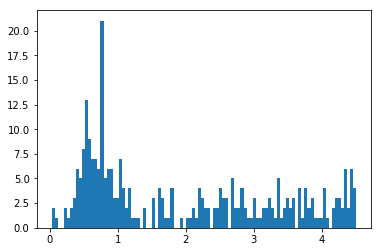

galaxies [0, 1, 0, 0, 2, 1, 2, 8, 14, 24, 32, 26, 17, 9, 10, 9, 20, 28, 33, 45]
blue galaxies counted [0, 1, 0, 0, 1, 1, 2, 2, 4, 5, 11, 12, 8, 4, 6, 8, 15, 27, 28, 40]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 2, 8, 8, 5, 2, 2, 2, 0, 5, 0, 5, 4]
red galaxies counted [0, 0, 0, 0, 1, 0, 0, 5, 8, 11, 13, 9, 7, 3, 2, 1, 0, 1, 0, 1]
sum of galaxies: 281

Halo: 14
Halo Mass: 25908.443
N Subhalos from Illustris Algorithm: 1733 23.20129084587097
R500c, R200c, R200m: 0.5403272153001663 0.8218303411036568 1.0292258540514474
before dev loop: 23.21869683265686
True
232118 232118 time 23.236163854599
N Subhalos within 5*R200m: 383 23.32462787628174


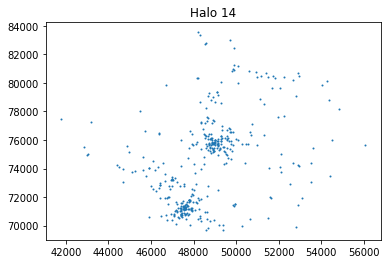

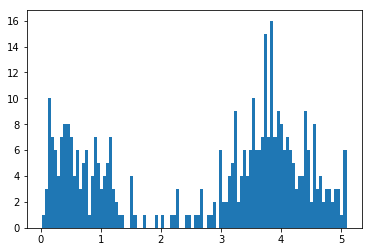

galaxies [2, 6, 7, 4, 5, 5, 11, 12, 11, 14, 11, 17, 19, 7, 2, 6, 9, 48, 119, 66]
blue galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 2, 8, 1, 2, 3, 8, 23, 37, 48]
red galaxies counted [2, 2, 1, 1, 0, 1, 5, 2, 2, 2, 2, 4, 2, 0, 0, 2, 1, 10, 27, 8]
red galaxies counted [0, 4, 6, 3, 4, 4, 5, 9, 7, 11, 8, 11, 9, 6, 0, 1, 0, 15, 55, 10]
sum of galaxies: 381

Halo: 15
Halo Mass: 25923.64
N Subhalos from Illustris Algorithm: 1930 24.252829790115356
R500c, R200c, R200m: 0.5543512035580016 0.8399260732759634 1.0439992872395611
before dev loop: 24.273106813430786
True
232118 232118 time 24.29607391357422
N Subhalos within 5*R200m: 427 24.340093851089478


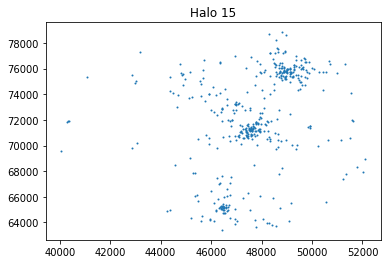

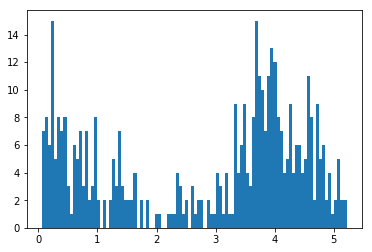

galaxies [4, 4, 5, 5, 13, 9, 9, 10, 7, 15, 12, 13, 9, 19, 8, 9, 16, 45, 127, 83]
blue galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 2, 4, 2, 7, 5, 11, 2, 8, 11, 16, 27, 44]
red galaxies counted [2, 2, 1, 0, 3, 3, 2, 3, 2, 2, 2, 4, 1, 3, 3, 0, 2, 11, 24, 12]
red galaxies counted [2, 2, 4, 5, 9, 6, 6, 6, 3, 9, 8, 2, 3, 5, 3, 1, 3, 18, 76, 27]
sum of galaxies: 422

Halo: 16
Halo Mass: 24286.85
N Subhalos from Illustris Algorithm: 1685 25.10065984725952
R500c, R200c, R200m: 0.46906364987218946 0.713824997762071 0.8579366121356826
before dev loop: 25.11174201965332
True
232118 232118 time 25.144752740859985
N Subhalos within 5*R200m: 323 25.25975775718689


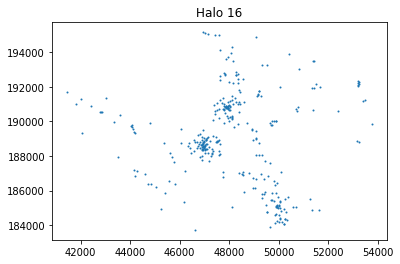

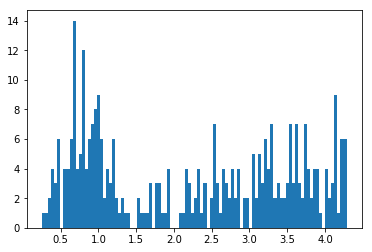

galaxies [0, 0, 0, 0, 0, 1, 2, 4, 10, 7, 25, 25, 34, 16, 8, 16, 17, 35, 51, 72]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 7, 1, 6, 4, 4, 12, 13, 29, 41, 46]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 5, 10, 8, 2, 2, 2, 2, 3, 5, 11]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 2, 8, 5, 13, 14, 20, 10, 2, 2, 2, 3, 5, 15]
sum of galaxies: 323

Halo: 17
Halo Mass: 24397.488
N Subhalos from Illustris Algorithm: 2019 25.976569890975952
R500c, R200c, R200m: 0.38384803809554985 0.6399654383672685 0.8183489452095857
before dev loop: 25.98473811149597
True
232118 232118 time 26.014819860458374
N Subhalos within 5*R200m: 223 26.066571950912476


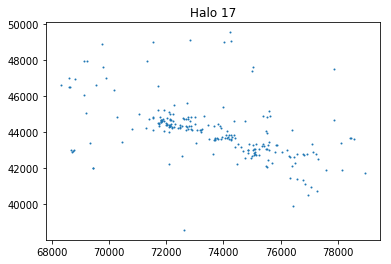

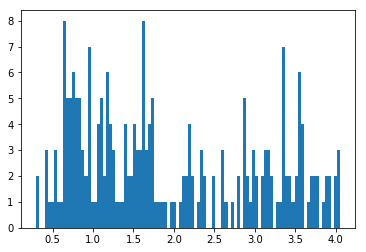

galaxies [0, 0, 0, 0, 0, 0, 2, 0, 4, 5, 14, 21, 14, 24, 15, 29, 14, 13, 30, 38]
blue galaxies counted [0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 4, 11, 5, 13, 6, 14, 9, 11, 25, 35]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 4, 3, 6, 2, 6, 3, 1, 5, 2]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 7, 6, 6, 5, 7, 9, 2, 1, 0, 1]
sum of galaxies: 223

Halo: 18
Halo Mass: 22562.018
N Subhalos from Illustris Algorithm: 1709 26.732913970947266
R500c, R200c, R200m: 0.4253113591043646 0.7370002210595841 0.9218522543530128
before dev loop: 26.74403190612793
True
232118 232118 time 26.76920485496521
N Subhalos within 5*R200m: 253 26.82647395133972


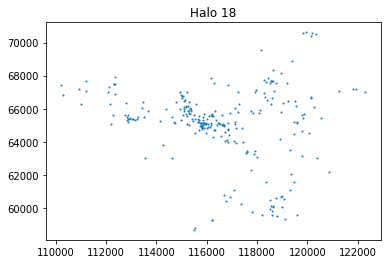

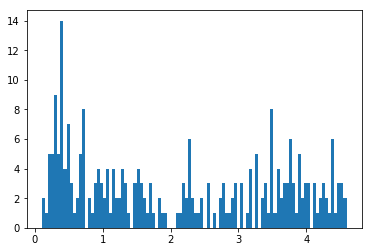

galaxies [1, 0, 2, 0, 7, 7, 8, 17, 11, 6, 12, 10, 12, 14, 16, 5, 22, 16, 44, 43]
blue galaxies counted [0, 0, 0, 0, 1, 1, 1, 4, 1, 2, 3, 4, 8, 9, 16, 5, 17, 15, 37, 36]
red galaxies counted [1, 0, 0, 0, 2, 2, 3, 3, 3, 0, 6, 0, 2, 3, 0, 0, 4, 1, 3, 3]
red galaxies counted [0, 0, 2, 0, 4, 4, 4, 10, 7, 4, 3, 6, 2, 2, 0, 0, 1, 0, 4, 4]
sum of galaxies: 253

Halo: 19
Halo Mass: 21426.482
N Subhalos from Illustris Algorithm: 1324 27.453144788742065
R500c, R200c, R200m: 0.5051613134971634 0.7625853581937981 0.9242370265542321
before dev loop: 27.461740970611572
True
232118 232118 time 27.494447708129883
N Subhalos within 5*R200m: 232 27.536799907684326


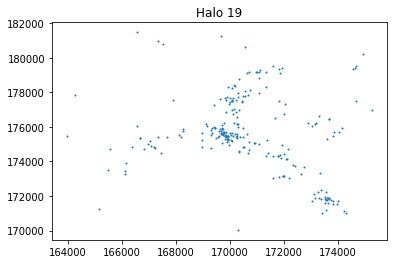

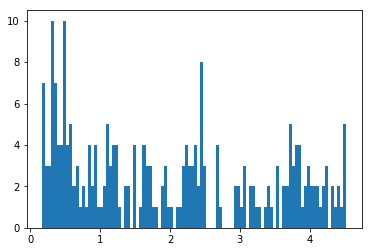

galaxies [0, 0, 0, 5, 3, 4, 15, 8, 15, 9, 7, 10, 12, 12, 16, 9, 32, 13, 27, 35]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 3, 0, 1, 3, 3, 4, 13, 8, 23, 9, 19, 30]
red galaxies counted [0, 0, 0, 3, 1, 2, 7, 2, 5, 3, 2, 1, 3, 1, 1, 1, 5, 3, 2, 3]
red galaxies counted [0, 0, 0, 2, 2, 2, 7, 4, 7, 6, 4, 6, 6, 7, 2, 0, 4, 1, 6, 2]
sum of galaxies: 232

Halo: 20
Halo Mass: 21198.576
N Subhalos from Illustris Algorithm: 1366 28.242945909500122
R500c, R200c, R200m: 0.5098278492561403 0.7919591156021559 0.9746404809404726
before dev loop: 28.254450798034668
True
232118 232118 time 28.291136026382446
N Subhalos within 5*R200m: 234 28.33753275871277


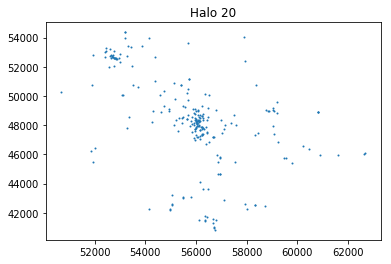

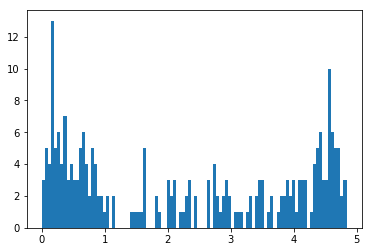

galaxies [1, 2, 7, 10, 2, 9, 7, 7, 6, 13, 11, 8, 4, 2, 9, 10, 11, 18, 26, 63]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 1, 2, 7, 9, 10, 16, 22, 37]
red galaxies counted [0, 1, 2, 2, 1, 4, 2, 1, 1, 4, 4, 0, 0, 0, 2, 1, 1, 1, 2, 10]
red galaxies counted [1, 1, 5, 8, 1, 5, 5, 5, 3, 9, 5, 6, 3, 0, 0, 0, 0, 1, 2, 16]
sum of galaxies: 226

Halo: 21
Halo Mass: 21375.77
N Subhalos from Illustris Algorithm: 1918 29.847364902496338
R500c, R200c, R200m: 0.3859845166291631 0.5961379628997073 0.7614576677666569
before dev loop: 29.860651969909668
True
232118 232118 time 29.885754823684692
N Subhalos within 5*R200m: 167 30.075010061264038


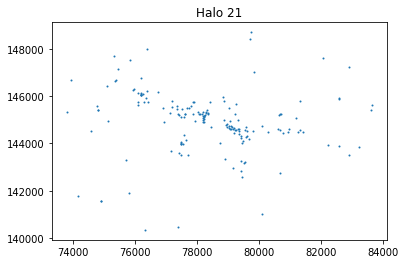

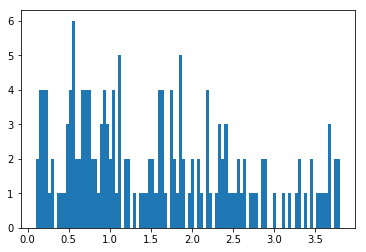

galaxies [0, 1, 1, 4, 4, 4, 3, 0, 2, 7, 11, 14, 11, 14, 7, 15, 19, 20, 12, 18]
blue galaxies counted [0, 0, 0, 1, 1, 3, 1, 0, 1, 0, 6, 7, 5, 11, 4, 7, 10, 15, 12, 17]
red galaxies counted [0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 4, 2, 2, 1, 1, 2, 3, 5, 0, 0]
red galaxies counted [0, 0, 1, 3, 3, 1, 2, 0, 0, 5, 1, 5, 4, 2, 2, 6, 6, 0, 0, 1]
sum of galaxies: 167

Halo: 22
Halo Mass: 20983.459
N Subhalos from Illustris Algorithm: 1514 31.223489999771118
R500c, R200c, R200m: 0.4878136250493363 0.7551455158827285 0.940224784722325
before dev loop: 31.241445779800415
True
232118 232118 time 31.27004599571228
N Subhalos within 5*R200m: 213 31.3262939453125


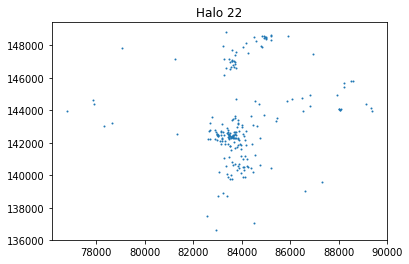

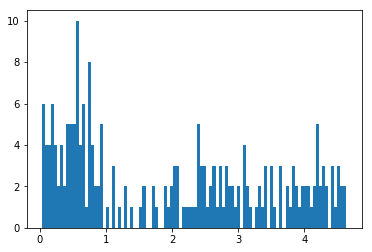

galaxies [1, 3, 3, 3, 6, 3, 5, 6, 10, 19, 14, 9, 4, 4, 5, 12, 20, 24, 20, 35]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 3, 2, 9, 5, 4, 0, 2, 4, 9, 15, 9, 15, 27]
red galaxies counted [0, 1, 0, 1, 2, 1, 1, 0, 2, 2, 1, 0, 2, 2, 1, 3, 1, 5, 4, 2]
red galaxies counted [1, 2, 3, 2, 4, 1, 4, 3, 6, 8, 8, 5, 2, 0, 0, 0, 4, 10, 1, 6]
sum of galaxies: 206

Halo: 23
Halo Mass: 20621.312
N Subhalos from Illustris Algorithm: 1371 31.919657945632935
R500c, R200c, R200m: 0.47307574245406897 0.7178864928569827 0.8942206361319411
before dev loop: 31.931034803390503
True
232118 232118 time 31.97434902191162
N Subhalos within 5*R200m: 183 32.0369610786438


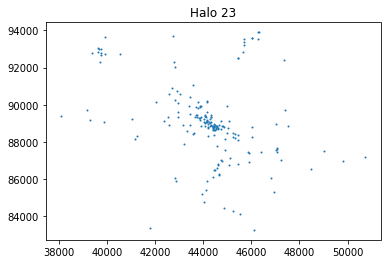

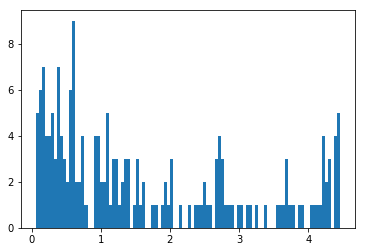

galaxies [1, 2, 5, 6, 4, 4, 7, 9, 6, 16, 9, 4, 15, 12, 10, 9, 5, 19, 8, 28]
blue galaxies counted [0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 2, 3, 8, 5, 7, 9, 4, 19, 8, 20]
red galaxies counted [0, 2, 3, 0, 0, 2, 0, 0, 3, 2, 2, 0, 2, 4, 3, 0, 1, 0, 0, 3]
red galaxies counted [1, 0, 2, 5, 4, 2, 6, 8, 3, 12, 5, 1, 5, 3, 0, 0, 0, 0, 0, 5]
sum of galaxies: 179

Halo: 24
Halo Mass: 20336.56
N Subhalos from Illustris Algorithm: 1775 32.672536849975586
R500c, R200c, R200m: 0.4536866172602611 0.6847010553304727 0.827884350844934
before dev loop: 32.68286681175232
True
232118 232118 time 32.70632195472717
N Subhalos within 5*R200m: 271 32.86373782157898


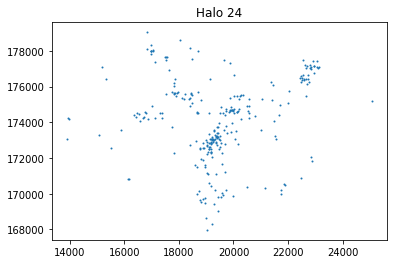

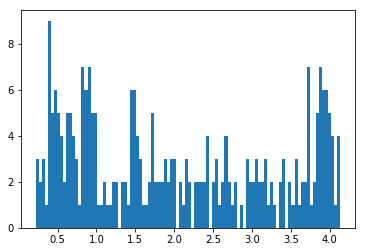

galaxies [0, 0, 0, 0, 1, 3, 1, 11, 10, 12, 16, 14, 21, 9, 21, 21, 18, 27, 26, 60]
blue galaxies counted [0, 0, 0, 0, 0, 2, 1, 3, 1, 1, 9, 4, 8, 3, 15, 12, 11, 23, 24, 25]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 0, 3, 3, 2, 2, 2, 2, 3, 1, 12]
red galaxies counted [0, 0, 0, 0, 1, 1, 0, 6, 9, 7, 7, 7, 10, 4, 4, 7, 5, 1, 1, 23]
sum of galaxies: 271

Halo: 25
Halo Mass: 19065.426
N Subhalos from Illustris Algorithm: 1228 33.47553086280823
R500c, R200c, R200m: 0.5023776780566084 0.7649002302428666 0.9437094634414113
before dev loop: 33.48192477226257
True
232118 232118 time 33.51629686355591
N Subhalos within 5*R200m: 282 33.65591788291931


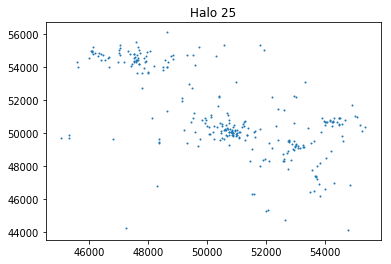

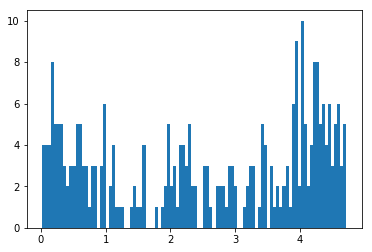

galaxies [3, 3, 2, 7, 4, 7, 6, 3, 7, 10, 8, 11, 9, 4, 7, 17, 24, 17, 32, 96]
blue galaxies counted [0, 0, 0, 1, 0, 1, 1, 0, 2, 2, 2, 2, 3, 2, 5, 12, 11, 16, 17, 35]
red galaxies counted [0, 1, 0, 3, 1, 0, 1, 2, 1, 2, 2, 0, 3, 1, 1, 2, 3, 0, 7, 16]
red galaxies counted [3, 2, 2, 3, 3, 6, 4, 1, 4, 6, 4, 9, 3, 1, 1, 3, 10, 1, 8, 45]
sum of galaxies: 277

Halo: 26
Halo Mass: 18821.283
N Subhalos from Illustris Algorithm: 1328 34.31430697441101
R500c, R200c, R200m: 0.47668837127984176 0.7524419893794323 0.9314922299754277
before dev loop: 34.32409071922302
True
232118 232118 time 34.35336184501648
N Subhalos within 5*R200m: 320 34.48796081542969


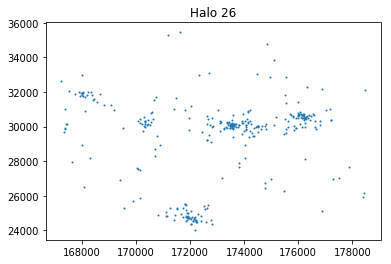

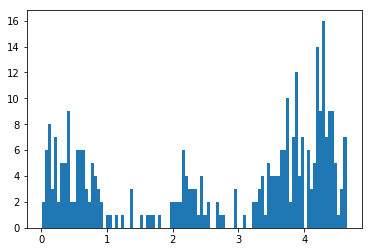

galaxies [3, 5, 4, 2, 7, 2, 7, 14, 5, 15, 10, 9, 3, 4, 4, 9, 27, 8, 57, 120]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 3, 1, 4, 3, 1, 1, 3, 4, 8, 22, 6, 20, 69]
red galaxies counted [1, 1, 1, 0, 2, 0, 1, 2, 2, 1, 3, 3, 0, 0, 0, 1, 3, 1, 10, 18]
red galaxies counted [2, 4, 3, 2, 5, 1, 6, 9, 2, 10, 4, 5, 2, 1, 0, 0, 2, 1, 27, 33]
sum of galaxies: 315

Halo: 27
Halo Mass: 19014.826
N Subhalos from Illustris Algorithm: 1508 35.059231996536255
R500c, R200c, R200m: 0.45071321852005225 0.7242356365740082 0.9230487239676657
before dev loop: 35.069751024246216
True
232118 232118 time 35.09831881523132
N Subhalos within 5*R200m: 228 35.1786527633667


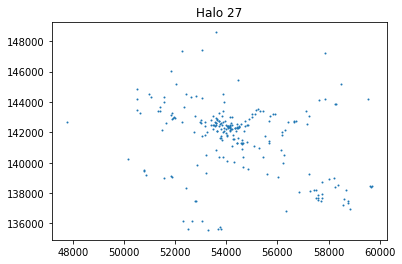

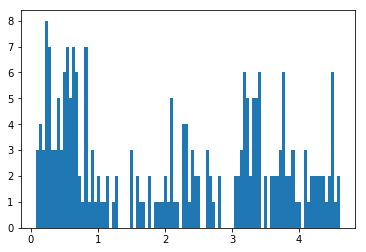

galaxies [1, 1, 4, 3, 8, 7, 3, 9, 10, 15, 11, 12, 6, 3, 7, 13, 18, 12, 49, 35]
blue galaxies counted [0, 1, 0, 0, 1, 0, 0, 2, 2, 1, 2, 7, 3, 3, 6, 11, 18, 12, 35, 33]
red galaxies counted [1, 0, 1, 1, 4, 2, 0, 0, 2, 3, 3, 0, 1, 0, 1, 1, 0, 0, 9, 2]
red galaxies counted [0, 0, 3, 2, 3, 5, 3, 7, 6, 11, 6, 5, 2, 0, 0, 1, 0, 0, 5, 0]
sum of galaxies: 227

Halo: 28
Halo Mass: 18303.37
N Subhalos from Illustris Algorithm: 1259 35.77528977394104
R500c, R200c, R200m: 0.47005714481822525 0.7368807582565953 0.9160478994506897
before dev loop: 35.79150581359863
True
232118 232118 time 35.81652498245239
N Subhalos within 5*R200m: 158 35.87255787849426


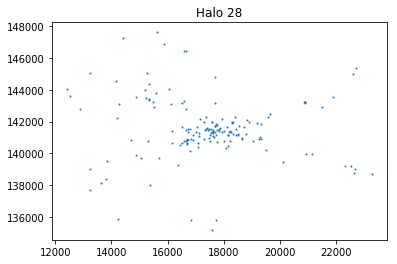

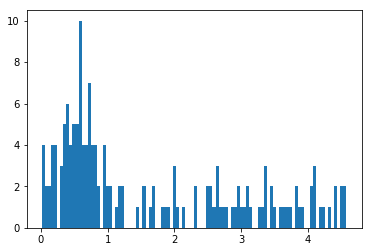

galaxies [0, 1, 2, 3, 4, 0, 6, 8, 10, 17, 16, 10, 5, 4, 6, 7, 6, 16, 13, 18]
blue galaxies counted [0, 0, 0, 0, 0, 0, 3, 2, 1, 3, 3, 3, 2, 2, 4, 7, 6, 11, 13, 16]
red galaxies counted [0, 0, 1, 1, 1, 0, 2, 1, 2, 4, 4, 1, 0, 1, 2, 0, 0, 4, 0, 1]
red galaxies counted [0, 1, 1, 2, 3, 0, 1, 5, 7, 10, 9, 6, 3, 1, 0, 0, 0, 1, 0, 1]
sum of galaxies: 152

Halo: 29
Halo Mass: 18336.77
N Subhalos from Illustris Algorithm: 1211 36.66729283332825
R500c, R200c, R200m: 0.37254839425574054 0.582633141407676 0.7267309038611021
before dev loop: 36.68753480911255
True
232118 232118 time 36.723531007766724
N Subhalos within 5*R200m: 201 36.81932282447815


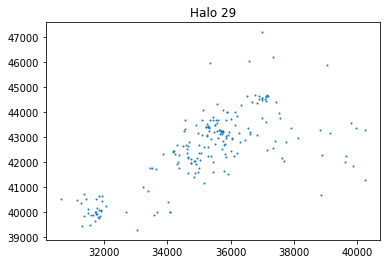

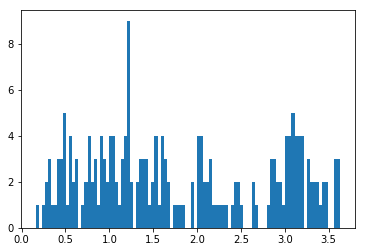

galaxies [0, 0, 0, 0, 1, 0, 3, 3, 3, 10, 8, 5, 14, 15, 23, 22, 11, 21, 16, 46]
blue galaxies counted [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 5, 10, 9, 14, 14, 28]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 6, 1, 0, 4, 8, 2, 3, 1, 4, 1, 12]
red galaxies counted [0, 0, 0, 0, 1, 0, 1, 3, 2, 4, 7, 3, 8, 5, 16, 9, 1, 3, 1, 6]
sum of galaxies: 201

Halo: 30
Halo Mass: 17775.602
N Subhalos from Illustris Algorithm: 1246 37.40833783149719
R500c, R200c, R200m: 0.49212849818718246 0.7397235245818736 0.9071572886896503
before dev loop: 37.417661905288696
True
232118 232118 time 37.44373083114624
N Subhalos within 5*R200m: 181 37.548532009124756


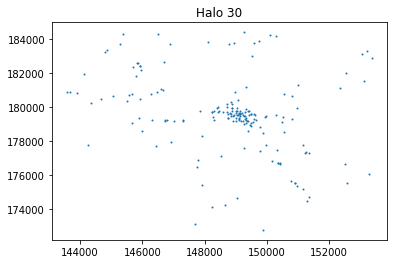

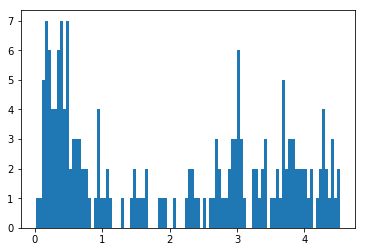

galaxies [3, 2, 3, 5, 7, 4, 7, 11, 9, 8, 7, 4, 7, 1, 8, 3, 8, 25, 23, 35]
blue galaxies counted [0, 1, 0, 1, 0, 0, 1, 4, 2, 1, 3, 1, 0, 1, 8, 3, 7, 20, 21, 33]
red galaxies counted [1, 1, 0, 0, 2, 1, 2, 1, 4, 2, 1, 1, 1, 0, 0, 0, 1, 4, 2, 1]
red galaxies counted [2, 0, 3, 4, 5, 3, 4, 6, 3, 5, 3, 2, 6, 0, 0, 0, 0, 1, 0, 1]
sum of galaxies: 180

Halo: 31
Halo Mass: 17812.344
N Subhalos from Illustris Algorithm: 1331 38.12535500526428
R500c, R200c, R200m: 0.4590839418951622 0.6922596398244059 0.8449716151863796
before dev loop: 38.13770389556885
True
232118 232118 time 38.165727853775024
N Subhalos within 5*R200m: 183 38.23635983467102


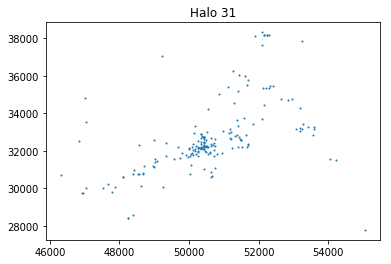

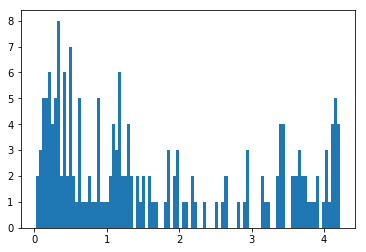

galaxies [2, 1, 5, 3, 5, 6, 9, 6, 9, 9, 7, 5, 9, 19, 9, 9, 9, 6, 18, 34]
blue galaxies counted [0, 0, 0, 0, 1, 1, 1, 1, 2, 4, 3, 1, 1, 9, 4, 7, 7, 6, 13, 27]
red galaxies counted [1, 0, 0, 3, 1, 2, 2, 2, 2, 1, 0, 0, 1, 2, 3, 1, 1, 0, 2, 6]
red galaxies counted [1, 1, 5, 0, 3, 3, 6, 3, 5, 4, 4, 4, 7, 8, 2, 1, 1, 0, 3, 1]
sum of galaxies: 180

Halo: 32
Halo Mass: 16644.68
N Subhalos from Illustris Algorithm: 1245 38.84787082672119
R500c, R200c, R200m: 0.44874424413111236 0.7253563610066053 0.8944798992392319
before dev loop: 38.85471487045288
True
232118 232118 time 38.88464879989624
N Subhalos within 5*R200m: 288 38.94597601890564


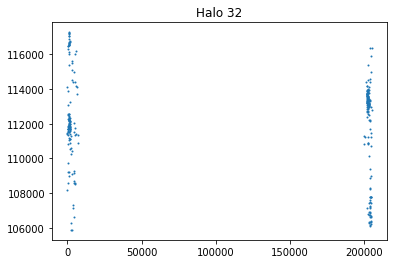

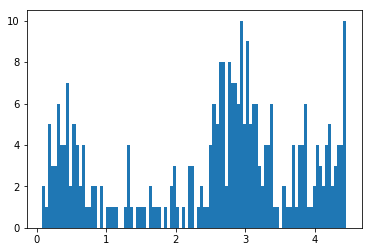

galaxies [0, 1, 1, 5, 1, 5, 6, 8, 9, 10, 7, 5, 4, 7, 6, 9, 13, 76, 51, 63]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 4, 2, 3, 4, 3, 6, 4, 8, 8, 35, 22, 39]
red galaxies counted [0, 0, 0, 1, 0, 2, 3, 1, 3, 1, 1, 0, 0, 0, 1, 1, 2, 14, 5, 11]
red galaxies counted [0, 1, 1, 4, 1, 3, 3, 6, 2, 7, 3, 1, 1, 1, 1, 0, 3, 27, 24, 13]
sum of galaxies: 287

Halo: 33
Halo Mass: 16789.268
N Subhalos from Illustris Algorithm: 1276 39.554178953170776
R500c, R200c, R200m: 0.3685475113202541 0.5917288486632567 0.7387652599530732
before dev loop: 39.570136070251465
True
232118 232118 time 39.59851789474487
N Subhalos within 5*R200m: 181 39.648634910583496


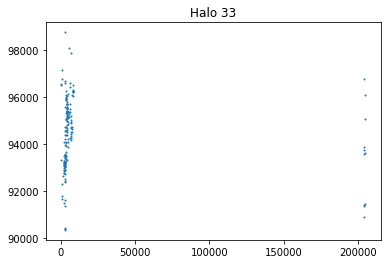

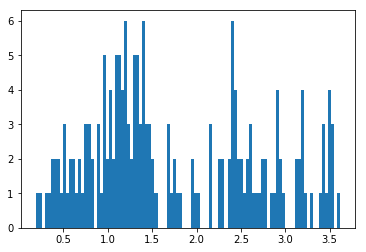

galaxies [0, 0, 0, 0, 1, 0, 1, 2, 4, 4, 7, 7, 9, 22, 29, 18, 9, 21, 24, 23]
blue galaxies counted [0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 3, 2, 5, 5, 11, 7, 6, 15, 19, 12]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 3, 9, 2, 1, 5, 4, 6]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 3, 5, 2, 14, 9, 9, 2, 1, 1, 5]
sum of galaxies: 181

Halo: 34
Halo Mass: 16846.766
N Subhalos from Illustris Algorithm: 1203 40.22581386566162
R500c, R200c, R200m: 0.2652465563114473 0.4380927180250786 0.6004946320048191
before dev loop: 40.233821868896484
True
232118 232118 time 40.258317947387695
N Subhalos within 5*R200m: 145 40.306973934173584


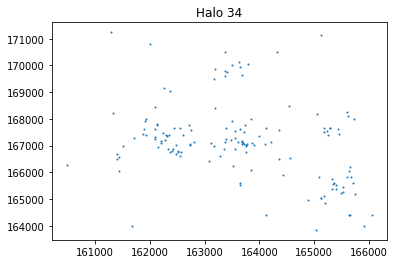

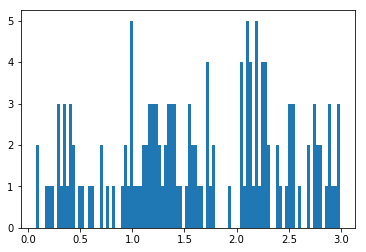

galaxies [0, 1, 1, 0, 0, 1, 2, 1, 5, 5, 3, 3, 3, 3, 12, 20, 17, 8, 34, 26]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 3, 1, 3, 8, 4, 3, 22, 18]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 6, 1, 1, 3, 5]
red galaxies counted [0, 1, 1, 0, 0, 1, 2, 1, 3, 3, 1, 2, 0, 2, 6, 6, 12, 4, 9, 3]
sum of galaxies: 145

Halo: 35
Halo Mass: 16756.076
N Subhalos from Illustris Algorithm: 1139 40.996695041656494
R500c, R200c, R200m: 0.44621634876612454 0.6812038057936455 0.8524268307267884
before dev loop: 41.0074028968811
True
232118 232118 time 41.04854488372803
N Subhalos within 5*R200m: 227 41.1657600402832


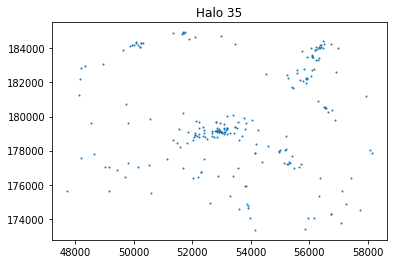

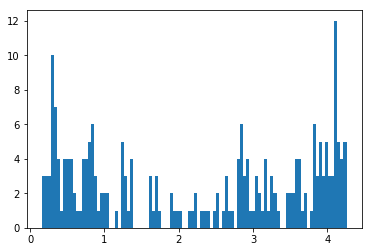

galaxies [0, 0, 0, 2, 3, 4, 11, 10, 5, 9, 6, 19, 7, 9, 5, 10, 9, 21, 28, 69]
blue galaxies counted [0, 0, 0, 0, 0, 1, 1, 2, 2, 3, 1, 4, 2, 4, 4, 2, 7, 16, 19, 35]
red galaxies counted [0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 5, 0, 1, 1, 2, 1, 0, 5, 14]
red galaxies counted [0, 0, 0, 2, 3, 2, 8, 8, 3, 6, 4, 10, 5, 4, 0, 6, 1, 5, 4, 20]
sum of galaxies: 227

Halo: 36
Halo Mass: 16702.426
N Subhalos from Illustris Algorithm: 1269 42.955317974090576
R500c, R200c, R200m: 0.4376716756996652 0.6661150612662756 0.8492032566997574
before dev loop: 42.97368502616882
True
232118 232118 time 43.013795137405396
N Subhalos within 5*R200m: 227 43.30315589904785


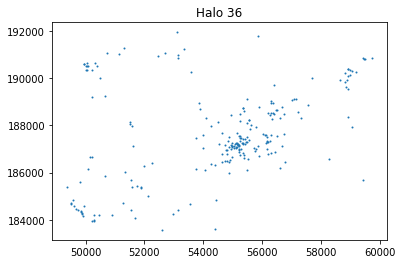

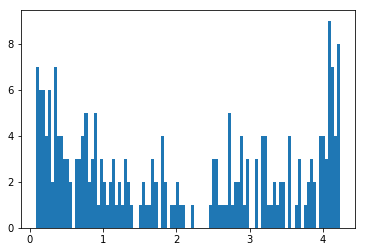

galaxies [5, 1, 4, 4, 8, 6, 3, 10, 7, 5, 9, 13, 10, 12, 7, 12, 7, 20, 28, 55]
blue galaxies counted [0, 0, 1, 0, 0, 0, 0, 3, 0, 1, 6, 5, 7, 7, 6, 12, 7, 17, 20, 28]
red galaxies counted [1, 0, 0, 0, 1, 3, 1, 0, 3, 1, 1, 4, 1, 2, 0, 0, 0, 1, 5, 12]
red galaxies counted [4, 1, 3, 4, 7, 3, 2, 7, 4, 3, 2, 4, 2, 3, 1, 0, 0, 2, 3, 15]
sum of galaxies: 226

Halo: 37
Halo Mass: 16608.855
N Subhalos from Illustris Algorithm: 1257 45.206063747406006
R500c, R200c, R200m: 0.4566091322127358 0.7167290968668999 0.8825100786829236
before dev loop: 45.2245659828186
True
232118 232118 time 45.26658892631531
N Subhalos within 5*R200m: 169 45.62093687057495


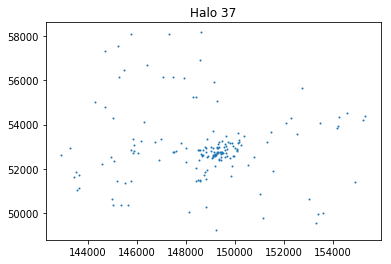

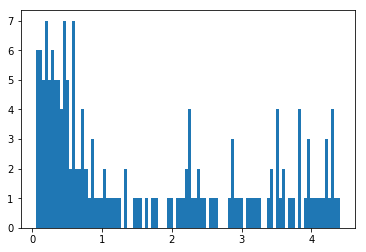

galaxies [1, 6, 1, 5, 8, 6, 6, 8, 15, 9, 10, 5, 5, 6, 4, 4, 14, 10, 16, 25]
blue galaxies counted [0, 0, 0, 1, 1, 1, 0, 2, 5, 3, 2, 3, 3, 4, 4, 3, 11, 9, 15, 23]
red galaxies counted [0, 0, 0, 1, 3, 2, 3, 1, 2, 1, 3, 0, 1, 2, 0, 0, 3, 1, 1, 2]
red galaxies counted [1, 6, 1, 3, 4, 3, 3, 5, 8, 5, 5, 2, 1, 0, 0, 1, 0, 0, 0, 0]
sum of galaxies: 164

Halo: 38
Halo Mass: 16264.685
N Subhalos from Illustris Algorithm: 1115 46.62324786186218
R500c, R200c, R200m: 0.4649485486468481 0.705506239104883 0.8694410722288736
before dev loop: 46.63417983055115
True
232118 232118 time 46.662139892578125
N Subhalos within 5*R200m: 158 47.28880310058594


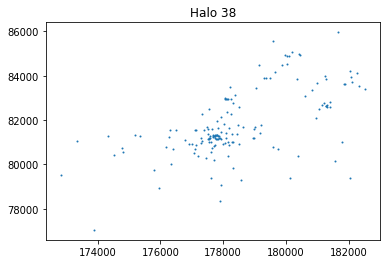

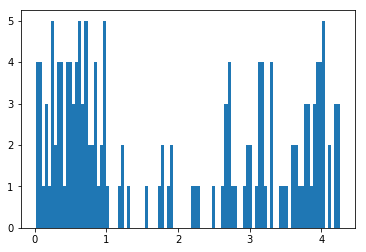

galaxies [3, 0, 1, 3, 1, 5, 5, 6, 5, 10, 14, 8, 8, 4, 1, 6, 3, 12, 21, 37]
blue galaxies counted [0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 4, 2, 2, 4, 1, 4, 3, 10, 17, 25]
red galaxies counted [1, 0, 1, 0, 1, 1, 1, 1, 1, 4, 3, 1, 2, 0, 0, 2, 0, 2, 1, 8]
red galaxies counted [2, 0, 0, 2, 0, 3, 3, 5, 3, 5, 7, 5, 4, 0, 0, 0, 0, 0, 3, 4]
sum of galaxies: 153

Halo: 39
Halo Mass: 16316.715
N Subhalos from Illustris Algorithm: 1359 48.314297914505005
R500c, R200c, R200m: 0.46365591627992336 0.6863511152795302 0.8386660289524813
before dev loop: 48.34846091270447
True
232118 232118 time 48.369972944259644
N Subhalos within 5*R200m: 194 48.48146200180054


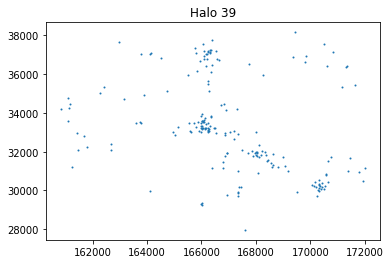

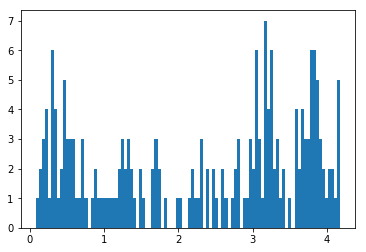

galaxies [0, 0, 1, 3, 2, 4, 6, 4, 8, 7, 7, 2, 6, 9, 10, 8, 10, 14, 42, 50]
blue galaxies counted [0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 3, 0, 3, 5, 8, 6, 9, 10, 25, 42]
red galaxies counted [0, 0, 0, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 3, 2, 1, 1, 3, 2, 6]
red galaxies counted [0, 0, 1, 0, 1, 3, 4, 3, 5, 4, 2, 1, 1, 1, 0, 1, 0, 1, 15, 2]
sum of galaxies: 193

Halo: 40
Halo Mass: 15832.792
N Subhalos from Illustris Algorithm: 1144 49.4848268032074
R500c, R200c, R200m: 0.4847836976637453 0.7167998777769817 0.8706583597582565
before dev loop: 49.51943874359131
True
232118 232118 time 49.54997396469116
N Subhalos within 5*R200m: 169 49.90736389160156


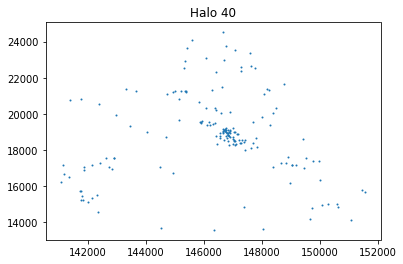

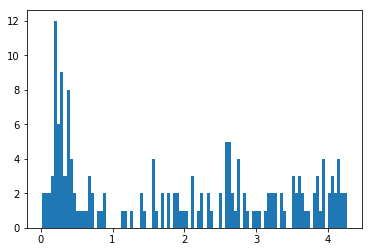

galaxies [1, 0, 3, 3, 11, 8, 9, 9, 6, 3, 6, 4, 0, 3, 8, 10, 10, 22, 18, 32]
blue galaxies counted [1, 0, 3, 2, 2, 1, 2, 1, 4, 1, 3, 2, 0, 2, 8, 7, 9, 17, 17, 28]
red galaxies counted [0, 0, 0, 0, 2, 3, 3, 2, 0, 2, 0, 1, 0, 1, 0, 3, 1, 4, 1, 3]
red galaxies counted [0, 0, 0, 1, 7, 4, 4, 6, 2, 0, 3, 1, 0, 0, 0, 0, 0, 1, 0, 1]
sum of galaxies: 166

Halo: 41
Halo Mass: 15685.505
N Subhalos from Illustris Algorithm: 1182 50.660003900527954
R500c, R200c, R200m: 0.4468006115499111 0.6785427958777402 0.8511478901422438
before dev loop: 50.688339948654175
True
232118 232118 time 50.720592737197876
N Subhalos within 5*R200m: 203 50.793314933776855


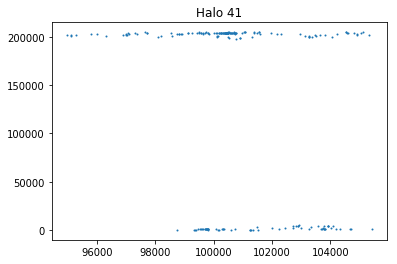

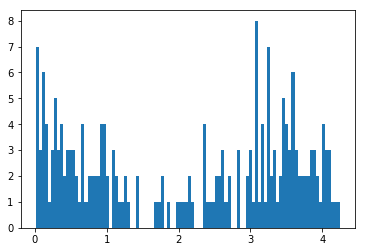

galaxies [3, 4, 3, 2, 1, 3, 7, 5, 7, 4, 8, 6, 12, 10, 2, 5, 9, 18, 41, 45]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 3, 1, 3, 1, 4, 3, 2, 5, 8, 15, 33, 29]
red galaxies counted [0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 3, 1, 3, 2, 0, 0, 1, 3, 4, 5]
red galaxies counted [3, 2, 3, 2, 0, 3, 5, 5, 3, 3, 2, 4, 5, 5, 0, 0, 0, 0, 4, 11]
sum of galaxies: 195

Halo: 42
Halo Mass: 15768.786
N Subhalos from Illustris Algorithm: 1214 51.55379509925842
R500c, R200c, R200m: 0.40733048577313546 0.6504043815363484 0.8165077607895266
before dev loop: 51.601478815078735
True
232118 232118 time 51.62906289100647
N Subhalos within 5*R200m: 227 51.71560192108154


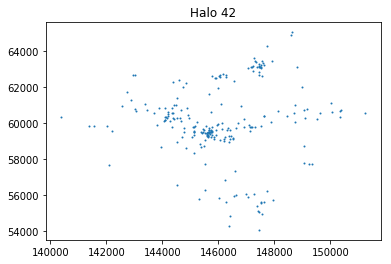

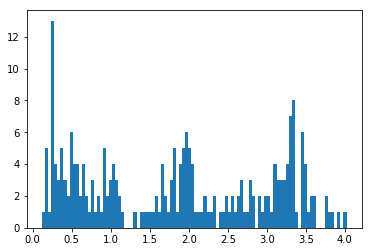

galaxies [0, 0, 1, 2, 3, 10, 9, 6, 6, 13, 9, 6, 15, 7, 5, 20, 30, 18, 45, 22]
blue galaxies counted [0, 0, 0, 1, 0, 3, 3, 0, 0, 4, 2, 2, 5, 3, 3, 16, 22, 15, 37, 19]
red galaxies counted [0, 0, 0, 0, 2, 1, 1, 3, 1, 5, 1, 4, 0, 3, 1, 1, 4, 3, 6, 2]
red galaxies counted [0, 0, 1, 1, 1, 6, 5, 3, 5, 4, 6, 0, 10, 1, 1, 3, 4, 0, 2, 1]
sum of galaxies: 227

Halo: 43
Halo Mass: 15200.831
N Subhalos from Illustris Algorithm: 1214 53.02200889587402
R500c, R200c, R200m: 0.4657102441192561 0.711563611740078 0.8754398344272135
before dev loop: 53.05220675468445
True
232118 232118 time 53.077234983444214
N Subhalos within 5*R200m: 295 53.13238787651062


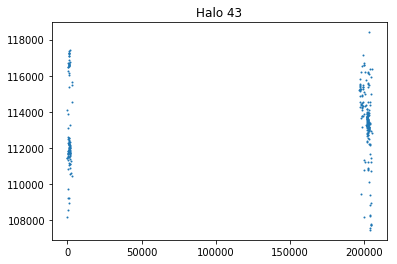

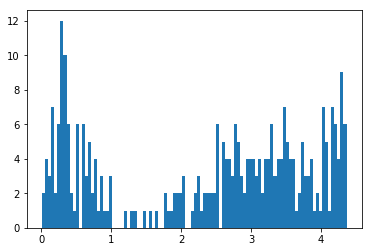

galaxies [0, 3, 2, 5, 2, 8, 17, 10, 5, 9, 10, 9, 4, 3, 2, 10, 15, 45, 59, 71]
blue galaxies counted [0, 0, 0, 1, 0, 2, 1, 1, 2, 1, 7, 4, 2, 3, 2, 9, 13, 15, 36, 51]
red galaxies counted [0, 1, 0, 1, 1, 0, 6, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 9, 5, 11]
red galaxies counted [0, 2, 2, 3, 1, 6, 10, 8, 2, 7, 2, 4, 1, 0, 0, 1, 1, 21, 18, 9]
sum of galaxies: 289

Halo: 44
Halo Mass: 14879.6455
N Subhalos from Illustris Algorithm: 1025 54.41490578651428
R500c, R200c, R200m: 0.4407996074222926 0.6726693415122941 0.8441294504666501
before dev loop: 54.46861696243286
True
232118 232118 time 54.50903391838074
N Subhalos within 5*R200m: 125 54.59873580932617


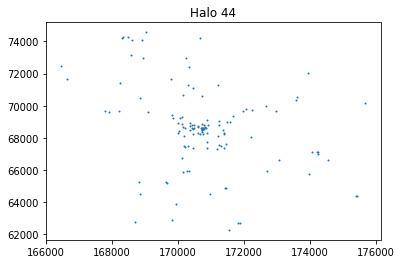

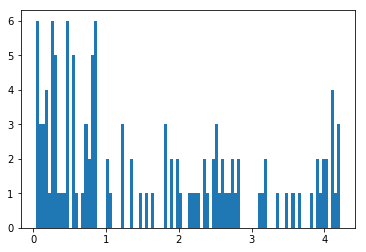

galaxies [3, 1, 2, 3, 1, 6, 7, 1, 6, 6, 4, 14, 3, 3, 4, 6, 7, 18, 6, 18]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 1, 4, 0, 3, 2, 4, 7, 17, 4, 12]
red galaxies counted [0, 0, 1, 1, 1, 2, 1, 0, 2, 1, 1, 4, 1, 0, 1, 2, 0, 1, 2, 2]
red galaxies counted [3, 1, 1, 2, 0, 4, 6, 0, 3, 2, 2, 6, 2, 0, 1, 0, 0, 0, 0, 4]
sum of galaxies: 119

Halo: 45
Halo Mass: 14590.398
N Subhalos from Illustris Algorithm: 1159 55.36869406700134
R500c, R200c, R200m: 0.4273328987279976 0.6585129593236665 0.8233019274683564
before dev loop: 55.37768292427063
True
232118 232118 time 55.40609884262085
N Subhalos within 5*R200m: 150 55.479984760284424


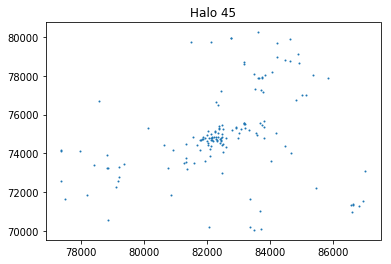

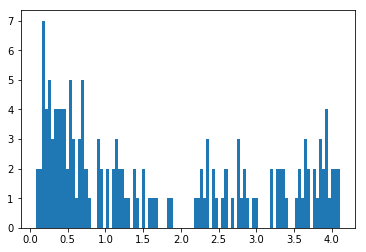

galaxies [1, 0, 2, 4, 5, 7, 3, 8, 8, 10, 7, 5, 7, 10, 6, 5, 4, 14, 14, 29]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 2, 2, 4, 0, 3, 3, 7, 3, 4, 2, 10, 12, 25]
red galaxies counted [0, 0, 0, 0, 1, 3, 1, 2, 1, 1, 3, 1, 2, 1, 1, 1, 1, 4, 1, 3]
red galaxies counted [1, 0, 2, 4, 4, 3, 2, 4, 5, 5, 4, 1, 2, 2, 2, 0, 1, 0, 1, 1]
sum of galaxies: 149

Halo: 46
Halo Mass: 14551.992
N Subhalos from Illustris Algorithm: 1044 56.247950077056885
R500c, R200c, R200m: 0.44943243635074304 0.702010991290626 0.8500623960268822
before dev loop: 56.26658391952515
True
232118 232118 time 56.29761290550232
N Subhalos within 5*R200m: 217 56.3702929019928


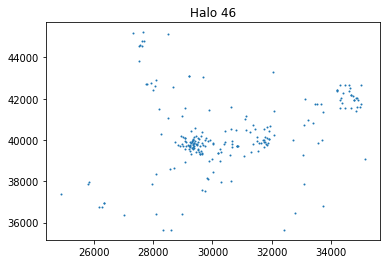

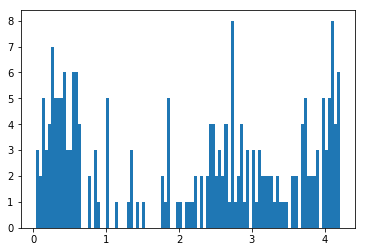

galaxies [2, 1, 4, 3, 3, 8, 5, 10, 10, 13, 5, 5, 6, 1, 6, 8, 9, 37, 25, 53]
blue galaxies counted [0, 0, 1, 2, 0, 2, 0, 1, 1, 1, 2, 3, 6, 0, 5, 5, 8, 21, 22, 25]
red galaxies counted [1, 0, 2, 0, 2, 2, 0, 2, 3, 4, 1, 1, 0, 1, 1, 2, 1, 9, 3, 13]
red galaxies counted [1, 1, 1, 1, 1, 4, 5, 7, 6, 8, 2, 1, 0, 0, 0, 1, 0, 7, 0, 15]
sum of galaxies: 214

Halo: 47
Halo Mass: 14482.507
N Subhalos from Illustris Algorithm: 1136 56.96074390411377
R500c, R200c, R200m: 0.45256265003710044 0.6874541444846066 0.8357311033200715
before dev loop: 56.972046852111816
True
232118 232118 time 57.00262403488159
N Subhalos within 5*R200m: 207 57.10550880432129


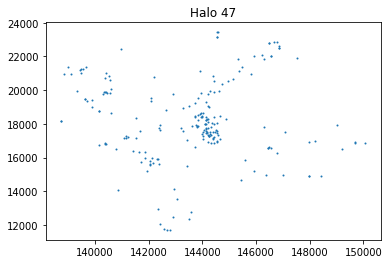

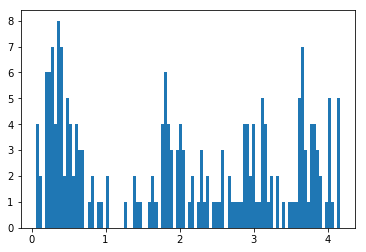

galaxies [2, 1, 1, 0, 6, 9, 8, 12, 6, 9, 11, 3, 4, 1, 4, 21, 17, 14, 32, 44]
blue galaxies counted [1, 0, 0, 0, 4, 2, 2, 4, 2, 4, 4, 3, 4, 0, 3, 14, 10, 14, 29, 37]
red galaxies counted [1, 1, 1, 0, 2, 3, 2, 1, 0, 2, 2, 0, 0, 0, 1, 4, 1, 0, 2, 7]
red galaxies counted [0, 0, 0, 0, 0, 4, 4, 7, 4, 3, 5, 0, 0, 1, 0, 3, 6, 0, 1, 0]
sum of galaxies: 205

Halo: 48
Halo Mass: 14301.584
N Subhalos from Illustris Algorithm: 1129 57.81400489807129
R500c, R200c, R200m: 0.4368544924776116 0.687337484093216 0.8566500650053713
before dev loop: 57.82637906074524
True
232118 232118 time 57.86055397987366
N Subhalos within 5*R200m: 182 58.17874884605408


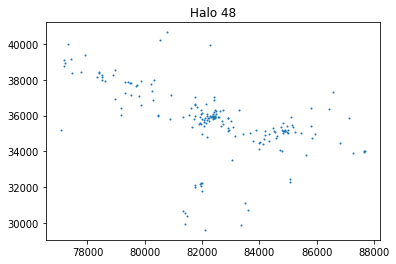

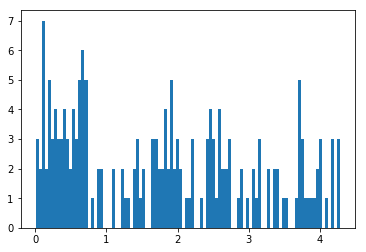

galaxies [2, 4, 2, 3, 4, 4, 5, 7, 4, 9, 16, 2, 3, 6, 8, 21, 13, 24, 15, 26]
blue galaxies counted [0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 9, 1, 2, 4, 5, 8, 9, 17, 14, 24]
red galaxies counted [0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 5, 2, 4, 0, 2]
red galaxies counted [2, 3, 1, 1, 4, 3, 3, 6, 2, 6, 7, 1, 1, 1, 2, 8, 2, 3, 1, 0]
sum of galaxies: 178

Halo: 49
Halo Mass: 14361.839
N Subhalos from Illustris Algorithm: 1337 58.88856482505798
R500c, R200c, R200m: 0.3768843255150251 0.5990511097905536 0.7415446917762308
before dev loop: 58.90287780761719
True
232118 232118 time 58.9305636882782
N Subhalos within 5*R200m: 176 59.02279186248779


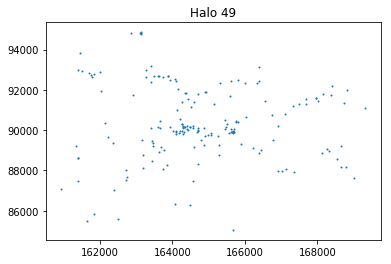

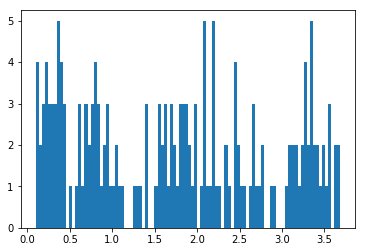

galaxies [0, 1, 3, 2, 3, 4, 4, 5, 10, 3, 4, 7, 14, 7, 3, 16, 18, 24, 12, 36]
blue galaxies counted [0, 1, 0, 1, 1, 2, 0, 3, 2, 3, 1, 2, 4, 6, 3, 15, 16, 19, 11, 30]
red galaxies counted [0, 0, 2, 1, 1, 0, 1, 1, 3, 0, 1, 1, 3, 1, 0, 1, 2, 4, 1, 5]
red galaxies counted [0, 0, 1, 0, 1, 2, 3, 1, 5, 0, 2, 4, 7, 0, 0, 0, 0, 1, 0, 1]
sum of galaxies: 176

Halo: 50
Halo Mass: 13977.665
N Subhalos from Illustris Algorithm: 1162 60.147711992263794
R500c, R200c, R200m: 0.40147216443032 0.6469831173882855 0.8314299619990567
before dev loop: 60.158990144729614
True
232118 232118 time 60.18970704078674
N Subhalos within 5*R200m: 190 60.28233075141907


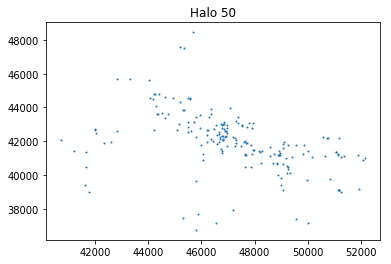

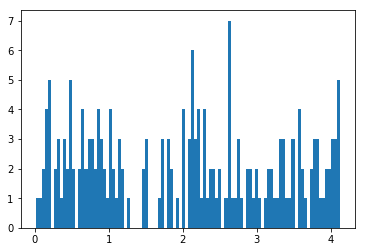

galaxies [1, 1, 3, 1, 5, 1, 4, 1, 7, 5, 8, 12, 11, 8, 5, 9, 24, 24, 21, 37]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 3, 7, 4, 5, 4, 5, 14, 17, 12, 35]
red galaxies counted [1, 0, 0, 1, 1, 0, 1, 0, 1, 3, 3, 1, 2, 1, 1, 2, 5, 3, 6, 1]
red galaxies counted [0, 1, 3, 0, 4, 1, 2, 1, 5, 2, 2, 4, 5, 2, 0, 2, 5, 4, 3, 1]
sum of galaxies: 188

Halo: 51
Halo Mass: 14048.193
N Subhalos from Illustris Algorithm: 1003 61.15633988380432
R500c, R200c, R200m: 0.42710033859979313 0.6468001999798217 0.7990631489348509
before dev loop: 61.17114496231079
True
232118 232118 time 61.20419502258301
N Subhalos within 5*R200m: 167 61.30262088775635


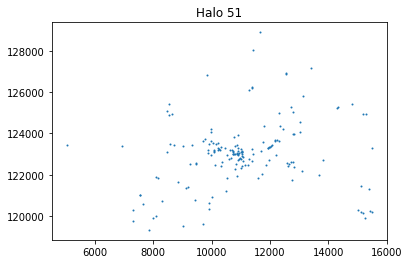

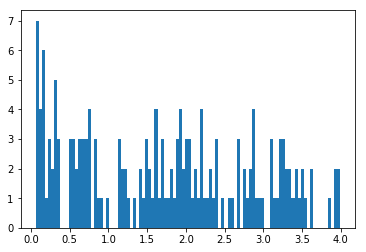

galaxies [3, 0, 6, 4, 1, 3, 5, 5, 0, 5, 9, 9, 4, 7, 8, 15, 24, 14, 22, 19]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 5, 2, 1, 1, 8, 7, 11, 11, 21, 16]
red galaxies counted [0, 0, 2, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 5, 5, 3, 0, 2]
red galaxies counted [3, 0, 4, 3, 1, 2, 2, 3, 0, 2, 3, 6, 2, 5, 0, 3, 8, 0, 1, 1]
sum of galaxies: 163

Halo: 52
Halo Mass: 13769.684
N Subhalos from Illustris Algorithm: 917 61.89811396598816
R500c, R200c, R200m: 0.41704704730108577 0.6642341226359727 0.8275377325646801
before dev loop: 61.91573977470398
True
232118 232118 time 61.94278383255005
N Subhalos within 5*R200m: 198 62.020954847335815


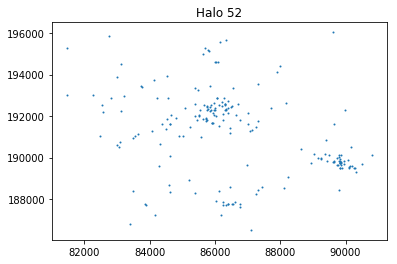

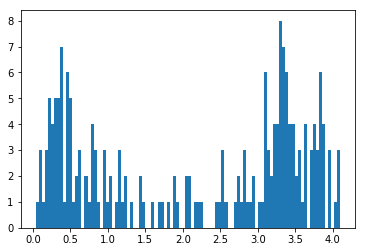

galaxies [2, 1, 0, 2, 3, 5, 8, 11, 8, 8, 4, 9, 7, 7, 4, 6, 8, 10, 49, 45]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 5, 0, 4, 1, 2, 1, 3, 4, 5, 6, 9, 25, 29]
red galaxies counted [1, 0, 0, 1, 1, 2, 4, 1, 2, 3, 1, 1, 1, 1, 0, 1, 2, 1, 9, 3]
red galaxies counted [1, 1, 0, 1, 2, 3, 3, 5, 6, 1, 2, 6, 5, 3, 0, 0, 0, 0, 15, 13]
sum of galaxies: 197

Halo: 53
Halo Mass: 13625.6455
N Subhalos from Illustris Algorithm: 958 62.690190076828
R500c, R200c, R200m: 0.4059635494644054 0.6272828444381676 0.7807677249189424
before dev loop: 62.70794987678528
True
232118 232118 time 62.741328954696655
N Subhalos within 5*R200m: 148 62.82272005081177


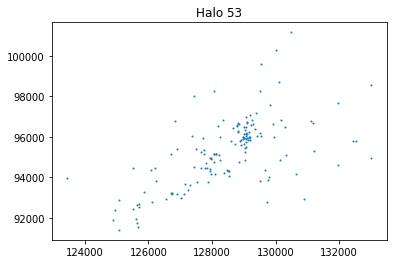

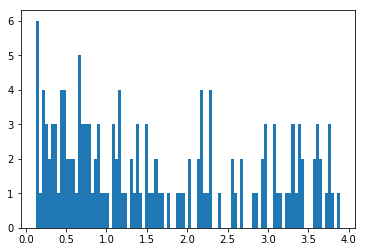

galaxies [0, 0, 2, 4, 4, 1, 5, 5, 6, 7, 8, 10, 8, 11, 8, 10, 8, 13, 14, 24]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 1, 0, 4, 3, 3, 3, 4, 5, 9, 6, 11, 14, 23]
red galaxies counted [0, 0, 0, 1, 3, 1, 1, 3, 2, 1, 1, 2, 1, 3, 1, 0, 2, 2, 0, 1]
red galaxies counted [0, 0, 2, 2, 1, 0, 4, 1, 4, 2, 4, 5, 4, 4, 2, 1, 0, 0, 0, 0]
sum of galaxies: 148

Halo: 54
Halo Mass: 13448.043
N Subhalos from Illustris Algorithm: 1050 63.51546502113342
R500c, R200c, R200m: 0.4276346383882278 0.6553686935448664 0.8081837976536561
before dev loop: 63.52390694618225
True
232118 232118 time 63.561771869659424
N Subhalos within 5*R200m: 138 63.61925983428955


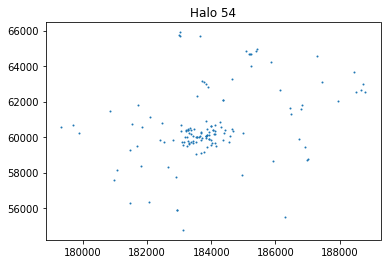

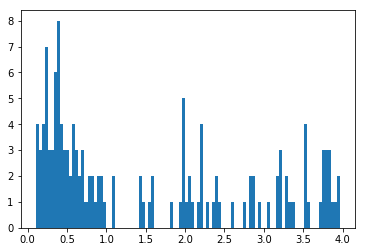

galaxies [0, 2, 2, 2, 5, 7, 4, 8, 14, 7, 8, 8, 6, 2, 3, 4, 15, 6, 15, 20]
blue galaxies counted [0, 1, 0, 0, 0, 0, 1, 1, 3, 1, 3, 2, 2, 2, 3, 4, 13, 5, 10, 16]
red galaxies counted [0, 0, 1, 1, 2, 3, 2, 0, 3, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 3]
red galaxies counted [0, 1, 1, 1, 3, 4, 1, 7, 8, 5, 4, 5, 3, 0, 0, 0, 1, 0, 4, 1]
sum of galaxies: 138

Halo: 55
Halo Mass: 13161.834
N Subhalos from Illustris Algorithm: 952 64.8867347240448
R500c, R200c, R200m: 0.43555845718231756 0.675873859140457 0.8280938911635812
before dev loop: 64.91865396499634
True
232118 232118 time 64.95235395431519
N Subhalos within 5*R200m: 282 65.14803791046143


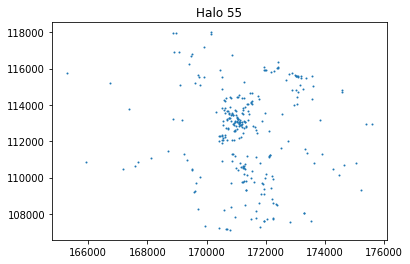

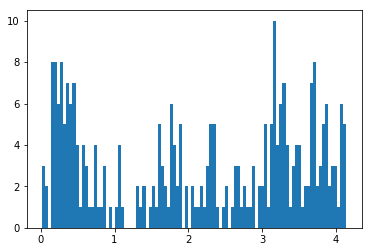

galaxies [1, 0, 1, 6, 9, 6, 10, 10, 14, 7, 6, 8, 4, 4, 8, 28, 14, 23, 53, 66]
blue galaxies counted [0, 0, 0, 0, 0, 0, 2, 2, 10, 2, 3, 2, 4, 3, 5, 14, 13, 18, 36, 43]
red galaxies counted [1, 0, 0, 1, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 8, 0, 5, 10, 11]
red galaxies counted [0, 0, 1, 5, 7, 4, 7, 7, 4, 3, 2, 4, 0, 1, 2, 6, 1, 0, 7, 12]
sum of galaxies: 278

Halo: 56
Halo Mass: 12963.17
N Subhalos from Illustris Algorithm: 931 66.05951595306396
R500c, R200c, R200m: 0.4484811777509382 0.6669694765281348 0.8227694692646863
before dev loop: 66.07641291618347
True
232118 232118 time 66.14750003814697
N Subhalos within 5*R200m: 159 66.20176577568054


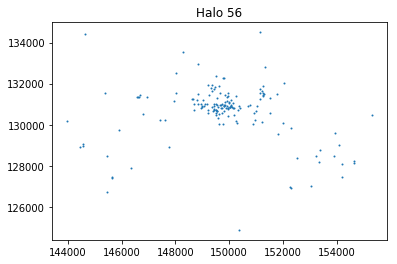

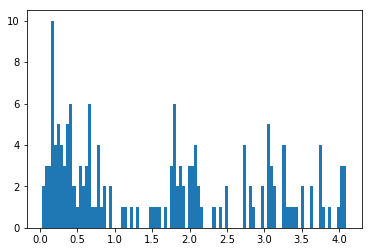

galaxies [2, 1, 3, 5, 7, 7, 6, 6, 8, 4, 11, 9, 2, 3, 3, 16, 16, 8, 21, 19]
blue galaxies counted [1, 0, 0, 0, 1, 4, 1, 3, 4, 1, 1, 1, 1, 2, 3, 8, 11, 7, 20, 18]
red galaxies counted [1, 0, 1, 1, 3, 1, 1, 0, 0, 1, 2, 2, 0, 0, 0, 2, 3, 1, 1, 1]
red galaxies counted [0, 1, 2, 4, 3, 2, 4, 3, 4, 2, 8, 6, 1, 1, 0, 6, 2, 0, 0, 0]
sum of galaxies: 157

Halo: 57
Halo Mass: 12960.73
N Subhalos from Illustris Algorithm: 877 67.83747100830078
R500c, R200c, R200m: 0.4228998839240589 0.6364812800960504 0.7824358003711316
before dev loop: 67.86361503601074
True
232118 232118 time 67.89439392089844
N Subhalos within 5*R200m: 147 67.95102787017822


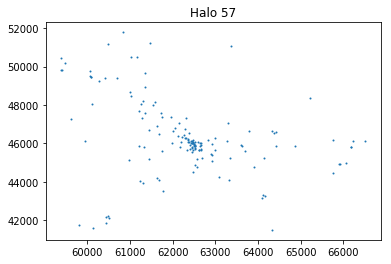

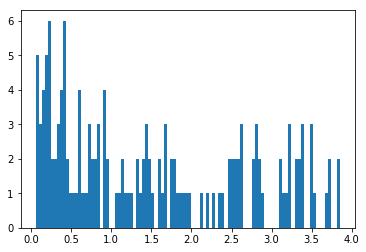

galaxies [2, 0, 3, 3, 6, 7, 2, 7, 8, 3, 7, 7, 9, 6, 9, 11, 8, 15, 13, 18]
blue galaxies counted [0, 0, 0, 0, 1, 0, 1, 2, 3, 0, 2, 2, 2, 3, 8, 7, 8, 12, 11, 16]
red galaxies counted [1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 5, 0, 2, 1, 1, 2, 0, 3, 1, 1]
red galaxies counted [1, 0, 3, 3, 4, 5, 1, 5, 5, 2, 0, 5, 5, 2, 0, 2, 0, 0, 1, 1]
sum of galaxies: 144

Halo: 58
Halo Mass: 13182.956
N Subhalos from Illustris Algorithm: 965 68.98976373672485
R500c, R200c, R200m: 0.3595163396003362 0.5518689875020656 0.701436496912982
before dev loop: 68.99830603599548
True
232118 232118 time 69.03845882415771
N Subhalos within 5*R200m: 133 69.1142749786377


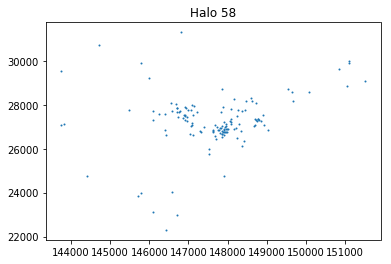

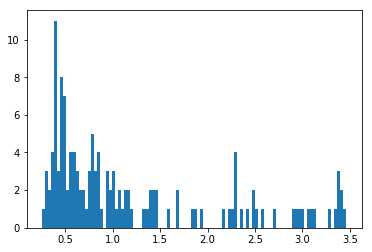

galaxies [0, 0, 0, 0, 0, 0, 1, 5, 10, 19, 14, 8, 16, 11, 6, 9, 5, 8, 6, 15]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 2, 7, 6, 1, 6, 5, 6, 6, 13]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 1, 4, 1, 2, 2, 0, 0, 2, 0, 2, 0, 2]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 3, 8, 12, 10, 4, 7, 5, 5, 1, 0, 0, 0, 0]
sum of galaxies: 133

Halo: 59
Halo Mass: 13078.665
N Subhalos from Illustris Algorithm: 1076 70.18039298057556
R500c, R200c, R200m: 0.3768838851360597 0.5819397447093628 0.7190154643865688
before dev loop: 70.20070767402649
True
232118 232118 time 70.22747087478638
N Subhalos within 5*R200m: 119 70.26643300056458


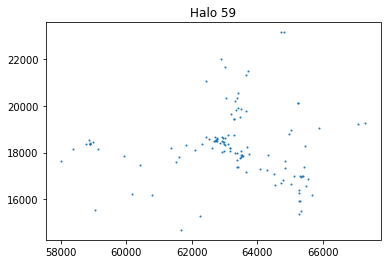

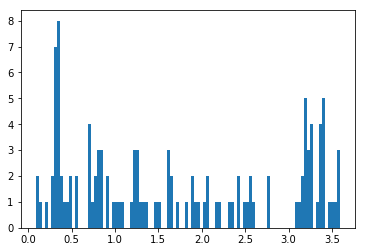

galaxies [0, 1, 1, 1, 0, 1, 1, 11, 8, 3, 2, 5, 9, 5, 9, 7, 7, 9, 7, 32]
blue galaxies counted [0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 1, 8, 3, 6, 5, 7, 9, 7, 27]
red galaxies counted [0, 0, 1, 0, 0, 0, 0, 6, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 3]
red galaxies counted [0, 1, 0, 1, 0, 0, 0, 3, 5, 1, 0, 2, 0, 2, 3, 1, 0, 0, 0, 2]
sum of galaxies: 119

Halo: 60
Halo Mass: 13212.502
N Subhalos from Illustris Algorithm: 1004 71.30558681488037
R500c, R200c, R200m: 0.3776427781968694 0.5875990547942501 0.7484706518690818
before dev loop: 71.31452178955078
True
232118 232118 time 71.35074877738953
N Subhalos within 5*R200m: 187 71.42253684997559


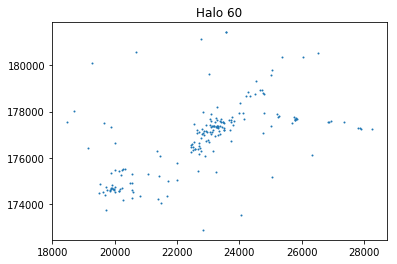

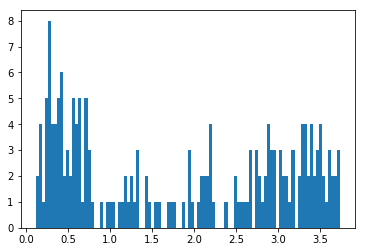

galaxies [0, 0, 2, 1, 3, 2, 12, 8, 9, 8, 13, 12, 1, 5, 9, 6, 8, 15, 29, 44]
blue galaxies counted [0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 4, 5, 1, 1, 8, 6, 8, 11, 18, 28]
red galaxies counted [0, 0, 0, 1, 0, 1, 3, 1, 2, 2, 2, 1, 0, 2, 0, 0, 0, 2, 6, 7]
red galaxies counted [0, 0, 1, 0, 2, 1, 8, 6, 5, 4, 7, 6, 0, 2, 1, 0, 0, 2, 5, 9]
sum of galaxies: 187

Halo: 61
Halo Mass: 12851.317
N Subhalos from Illustris Algorithm: 940 72.41086101531982
R500c, R200c, R200m: 0.44482178868592587 0.6774657890660761 0.8176854942809225
before dev loop: 72.43341898918152
True
232118 232118 time 72.48683500289917
N Subhalos within 5*R200m: 136 72.56916093826294


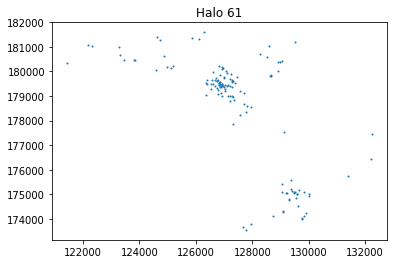

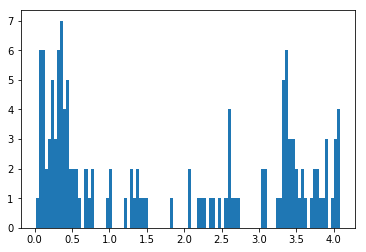

galaxies [2, 3, 4, 1, 3, 5, 6, 12, 8, 5, 3, 3, 3, 1, 8, 1, 5, 11, 13, 34]
blue galaxies counted [2, 1, 2, 0, 0, 3, 2, 5, 4, 2, 1, 1, 1, 1, 8, 1, 5, 9, 8, 22]
red galaxies counted [0, 1, 0, 1, 2, 1, 3, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 3]
red galaxies counted [0, 1, 2, 0, 1, 1, 1, 6, 4, 2, 2, 2, 0, 0, 0, 0, 0, 0, 5, 9]
sum of galaxies: 131

Halo: 62
Halo Mass: 13000.34
N Subhalos from Illustris Algorithm: 1047 73.64817786216736
R500c, R200c, R200m: 0.4069041589001368 0.6331709514128275 0.782193111526722
before dev loop: 73.66973781585693
True
232118 232118 time 73.72380900382996
N Subhalos within 5*R200m: 103 73.77302503585815


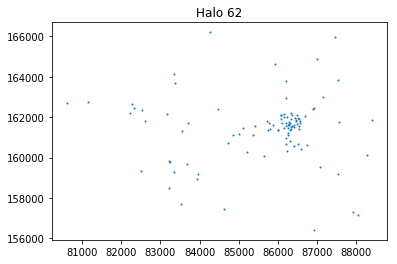

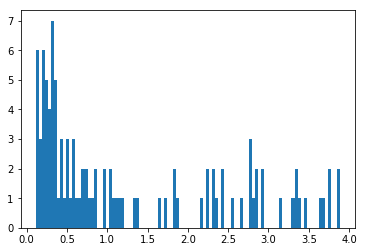

galaxies [0, 1, 4, 3, 4, 7, 6, 11, 4, 5, 5, 6, 4, 6, 2, 2, 4, 8, 10, 11]
blue galaxies counted [0, 0, 1, 0, 1, 2, 1, 5, 3, 1, 2, 1, 0, 5, 2, 2, 3, 8, 9, 10]
red galaxies counted [0, 0, 1, 1, 0, 3, 1, 2, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 1, 1]
red galaxies counted [0, 1, 2, 2, 3, 2, 4, 4, 1, 3, 3, 4, 2, 1, 0, 0, 0, 0, 0, 0]
sum of galaxies: 103

Halo: 63
Halo Mass: 12791.595
N Subhalos from Illustris Algorithm: 1053 74.78266286849976
R500c, R200c, R200m: 0.3190893103661079 0.4831797173682535 0.6043714081409539
before dev loop: 74.79072189331055
True
232118 232118 time 74.82171273231506
N Subhalos within 5*R200m: 110 74.87173080444336


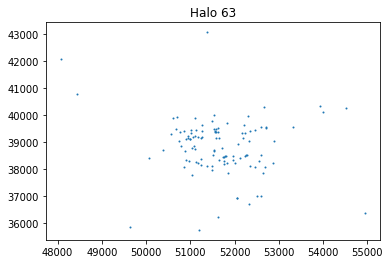

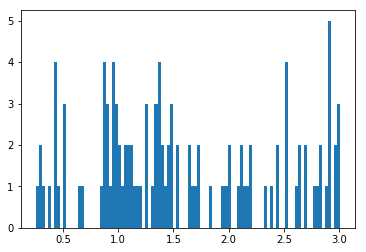

galaxies [0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 6, 2, 2, 9, 16, 13, 14, 8, 11, 24]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 2, 4, 9, 7, 10, 20]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 3, 1, 2, 0, 1, 4]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 5, 11, 8, 3, 1, 0, 0]
sum of galaxies: 110

Halo: 64
Halo Mass: 12665.866
N Subhalos from Illustris Algorithm: 1018 76.43690586090088
R500c, R200c, R200m: 0.367235702451107 0.5818826155472097 0.7505591691299134
before dev loop: 76.4492928981781
True
232118 232118 time 76.48804998397827
N Subhalos within 5*R200m: 177 76.55044102668762


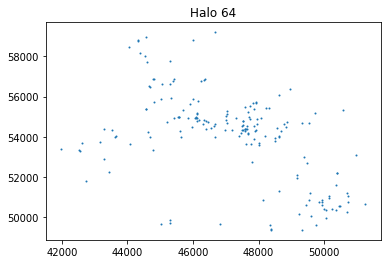

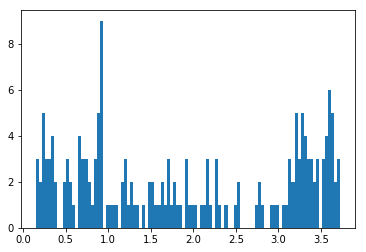

galaxies [0, 0, 0, 2, 2, 4, 5, 6, 3, 3, 5, 11, 19, 4, 10, 13, 12, 13, 8, 57]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 3, 7, 2, 7, 11, 10, 11, 6, 38]
red galaxies counted [0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 0, 3, 0, 3, 1, 1, 1, 1, 7]
red galaxies counted [0, 0, 0, 0, 0, 4, 3, 3, 2, 1, 3, 8, 9, 2, 0, 1, 1, 1, 1, 12]
sum of galaxies: 177

Halo: 65
Halo Mass: 12642.344
N Subhalos from Illustris Algorithm: 959 77.4223427772522
R500c, R200c, R200m: 0.439799586860678 0.6577448183045825 0.8080822702848962
before dev loop: 77.44109988212585
True
232118 232118 time 77.47291398048401
N Subhalos within 5*R200m: 176 77.52740097045898


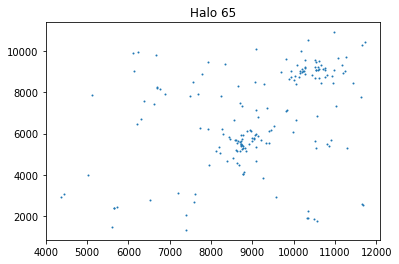

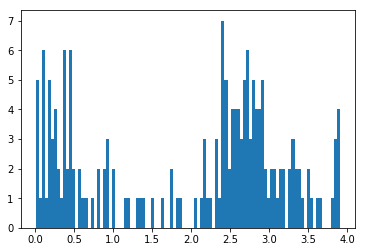

galaxies [0, 3, 4, 0, 7, 2, 4, 6, 9, 3, 4, 3, 7, 2, 4, 4, 7, 45, 38, 18]
blue galaxies counted [0, 0, 0, 0, 1, 1, 2, 3, 1, 0, 2, 0, 5, 2, 4, 4, 6, 24, 24, 17]
red galaxies counted [0, 1, 1, 0, 4, 0, 1, 1, 5, 0, 2, 1, 1, 0, 0, 0, 0, 9, 5, 1]
red galaxies counted [0, 2, 3, 0, 2, 1, 1, 2, 3, 3, 0, 2, 1, 0, 0, 0, 1, 12, 9, 0]
sum of galaxies: 170

Halo: 66
Halo Mass: 12543.711
N Subhalos from Illustris Algorithm: 988 78.49435591697693
R500c, R200c, R200m: 0.4270170669408733 0.6657589147865878 0.8070997447785451
before dev loop: 78.50710201263428
True
232118 232118 time 78.54198980331421
N Subhalos within 5*R200m: 142 78.61465978622437


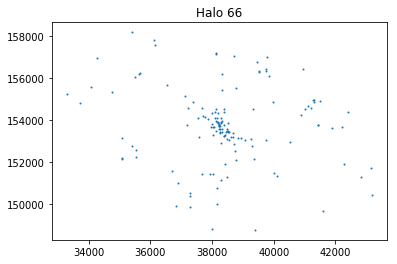

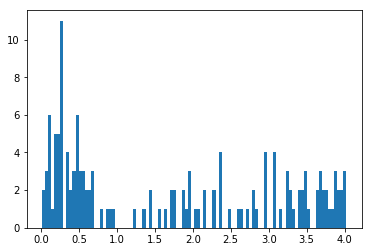

galaxies [1, 3, 3, 1, 5, 5, 11, 4, 6, 11, 7, 1, 3, 1, 3, 6, 10, 10, 17, 30]
blue galaxies counted [0, 2, 1, 1, 2, 0, 2, 1, 2, 1, 2, 1, 1, 0, 3, 5, 8, 9, 15, 25]
red galaxies counted [0, 0, 1, 0, 0, 3, 2, 0, 4, 2, 1, 0, 2, 1, 0, 1, 2, 1, 2, 3]
red galaxies counted [1, 1, 1, 0, 3, 2, 7, 3, 0, 8, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2]
sum of galaxies: 138

Halo: 67
Halo Mass: 12368.131
N Subhalos from Illustris Algorithm: 844 79.503173828125
R500c, R200c, R200m: 0.4156237825192306 0.6333442205185029 0.7830733890441879
before dev loop: 79.51316094398499
True
232118 232118 time 79.53641176223755
N Subhalos within 5*R200m: 135 80.90784883499146


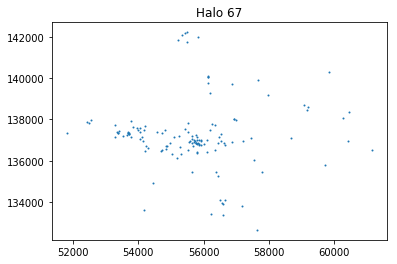

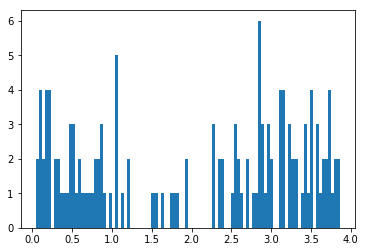

galaxies [0, 4, 0, 3, 5, 2, 2, 2, 3, 7, 4, 5, 6, 7, 1, 5, 3, 14, 28, 32]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 2, 3, 1, 3, 3, 11, 22, 29]
red galaxies counted [0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 0, 2, 0, 3, 3, 3]
red galaxies counted [0, 3, 0, 2, 4, 1, 1, 1, 3, 5, 0, 2, 3, 2, 0, 0, 0, 0, 3, 0]
sum of galaxies: 133

Halo: 68
Halo Mass: 12416.961
N Subhalos from Illustris Algorithm: 1120 81.58994197845459
R500c, R200c, R200m: 0.3187205930686792 0.495798416312914 0.6181949038661593
before dev loop: 81.59635996818542
True
232118 232118 time 81.62739491462708
N Subhalos within 5*R200m: 163 81.7014389038086


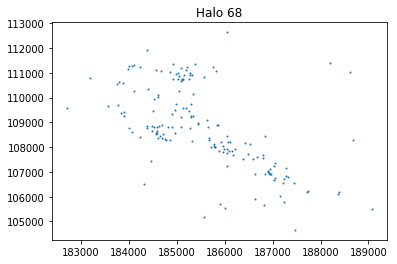

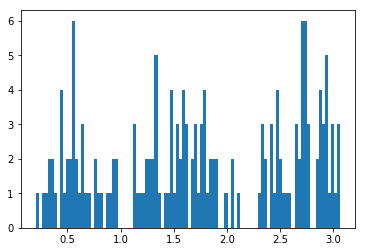

galaxies [0, 0, 0, 0, 0, 0, 1, 1, 4, 2, 7, 11, 8, 6, 5, 14, 24, 18, 18, 44]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 6, 5, 3, 2, 8, 10, 15, 16, 29]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 4, 11, 1, 2, 6]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 4, 4, 3, 3, 2, 2, 3, 2, 0, 9]
sum of galaxies: 163

Halo: 69
Halo Mass: 12028.139
N Subhalos from Illustris Algorithm: 983 82.37997889518738
R500c, R200c, R200m: 0.35397525125044416 0.5804813296791751 0.7596806185377467
before dev loop: 82.38845682144165
True
232118 232118 time 82.41664981842041
N Subhalos within 5*R200m: 166 82.49207091331482


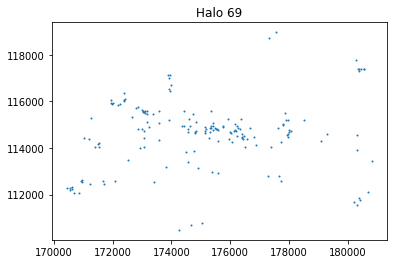

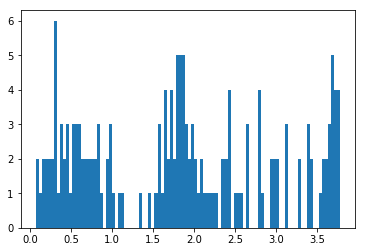

galaxies [1, 0, 1, 2, 2, 2, 3, 6, 5, 5, 9, 8, 8, 5, 1, 16, 30, 15, 16, 30]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 1, 4, 1, 3, 4, 1, 1, 6, 12, 12, 13, 22]
red galaxies counted [1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 3, 2, 1, 2, 0, 3, 11, 0, 2, 4]
red galaxies counted [0, 0, 0, 1, 1, 2, 2, 3, 3, 1, 5, 3, 3, 2, 0, 7, 7, 3, 1, 4]
sum of galaxies: 165

Halo: 70
Halo Mass: 12261.962
N Subhalos from Illustris Algorithm: 1030 83.19733190536499
R500c, R200c, R200m: 0.3723632749524496 0.6190568456048823 0.7651054468407622
before dev loop: 83.20362687110901
True
232118 232118 time 83.2336220741272
N Subhalos within 5*R200m: 188 83.32806301116943


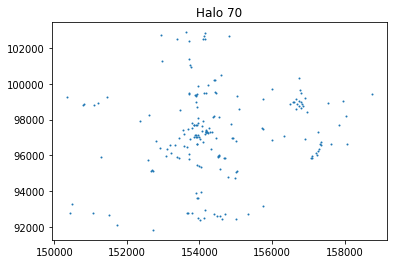

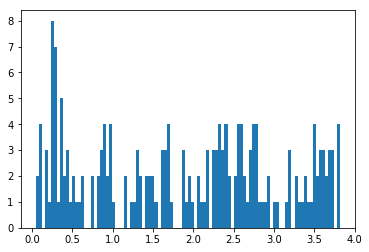

galaxies [0, 3, 1, 1, 2, 2, 11, 8, 6, 3, 4, 2, 13, 5, 9, 16, 10, 31, 23, 36]
blue galaxies counted [0, 0, 0, 0, 0, 0, 10, 3, 2, 0, 1, 2, 3, 3, 8, 10, 8, 23, 20, 30]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 0, 3, 0, 1, 4, 1, 5, 1, 0]
red galaxies counted [0, 3, 1, 1, 2, 1, 1, 4, 2, 3, 1, 0, 7, 2, 0, 2, 1, 3, 2, 6]
sum of galaxies: 186

Halo: 71
Halo Mass: 11755.467
N Subhalos from Illustris Algorithm: 834 84.18990278244019
R500c, R200c, R200m: 0.4091707894352637 0.6354831811881032 0.7798752769282498
before dev loop: 84.20389604568481
True
232118 232118 time 84.22943377494812
N Subhalos within 5*R200m: 174 84.31640195846558


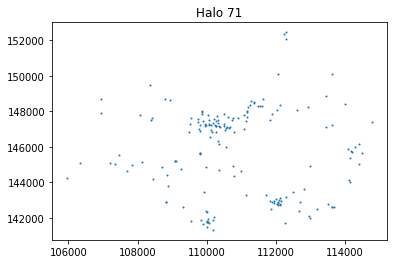

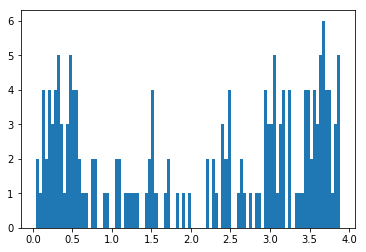

galaxies [1, 0, 2, 3, 1, 4, 7, 7, 3, 13, 5, 5, 2, 5, 5, 10, 3, 17, 27, 52]
blue galaxies counted [0, 0, 1, 1, 0, 1, 2, 4, 0, 2, 1, 2, 1, 1, 4, 10, 3, 14, 16, 43]
red galaxies counted [1, 0, 1, 0, 0, 1, 2, 2, 1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 2, 6]
red galaxies counted [0, 0, 0, 2, 1, 2, 3, 1, 2, 11, 3, 3, 1, 2, 1, 0, 0, 2, 9, 3]
sum of galaxies: 172

Halo: 72
Halo Mass: 11179.371
N Subhalos from Illustris Algorithm: 744 84.95779585838318
R500c, R200c, R200m: 0.43359148451594787 0.6481700187690529 0.7958097092070726
before dev loop: 84.98277497291565
True
232118 232118 time 85.00707674026489
N Subhalos within 5*R200m: 135 85.08259677886963


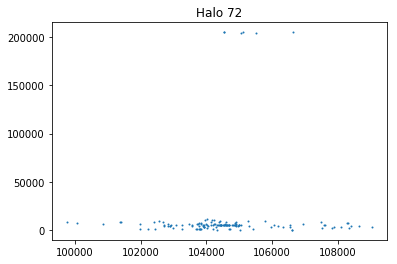

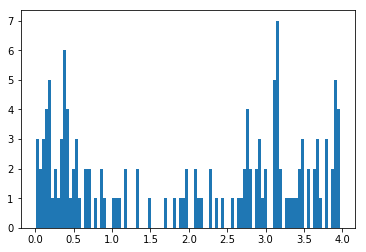

galaxies [1, 2, 1, 3, 5, 2, 2, 7, 7, 5, 4, 2, 4, 4, 3, 2, 8, 7, 30, 31]
blue galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 0, 1, 0, 3, 2, 7, 7, 24, 26]
red galaxies counted [0, 1, 0, 0, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 5, 3]
red galaxies counted [1, 1, 1, 3, 3, 2, 1, 5, 2, 2, 3, 2, 3, 4, 0, 0, 0, 0, 1, 2]
sum of galaxies: 130

Halo: 73
Halo Mass: 11412.425
N Subhalos from Illustris Algorithm: 955 85.76122379302979
R500c, R200c, R200m: 0.38442537491924356 0.5967422829436472 0.7624553262956387
before dev loop: 85.77535676956177
True
232118 232118 time 85.81350588798523
N Subhalos within 5*R200m: 152 85.87292385101318


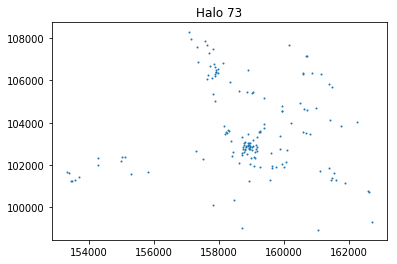

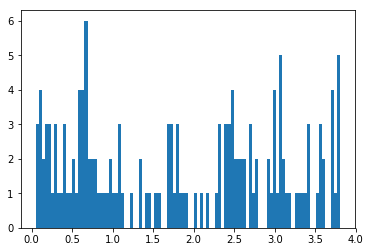

galaxies [1, 2, 3, 1, 3, 3, 2, 3, 5, 3, 9, 10, 7, 7, 3, 10, 9, 19, 25, 25]
blue galaxies counted [0, 0, 1, 0, 1, 0, 0, 1, 3, 1, 5, 2, 3, 6, 2, 6, 6, 11, 19, 22]
red galaxies counted [1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 2, 3, 2, 1, 0, 3, 1, 2, 4, 2]
red galaxies counted [0, 1, 1, 1, 2, 3, 2, 1, 1, 2, 2, 5, 2, 0, 1, 1, 2, 6, 2, 1]
sum of galaxies: 150

Halo: 74
Halo Mass: 11098.631
N Subhalos from Illustris Algorithm: 859 86.47544693946838
R500c, R200c, R200m: 0.38206606462911696 0.60605365578894 0.755542977916265
before dev loop: 86.49417281150818
True
232118 232118 time 86.52603387832642
N Subhalos within 5*R200m: 130 86.62110090255737


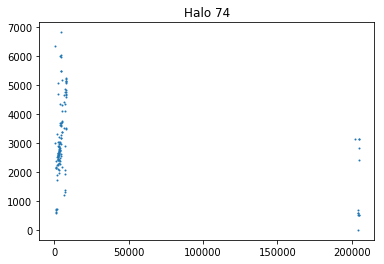

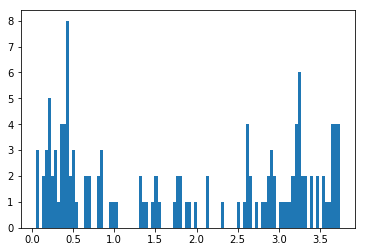

galaxies [0, 0, 2, 0, 4, 5, 3, 4, 10, 10, 0, 5, 5, 2, 4, 5, 7, 4, 20, 37]
blue galaxies counted [0, 0, 0, 0, 1, 0, 0, 1, 3, 4, 0, 2, 3, 2, 3, 2, 7, 4, 17, 30]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 1, 1, 0, 0, 2, 0, 0, 3, 4]
red galaxies counted [0, 0, 2, 0, 3, 5, 2, 2, 5, 4, 0, 2, 1, 0, 1, 1, 0, 0, 0, 3]
sum of galaxies: 127

Halo: 75
Halo Mass: 11098.97
N Subhalos from Illustris Algorithm: 766 87.2205970287323
R500c, R200c, R200m: 0.38077923725764584 0.5870507829822756 0.7396862925420682
before dev loop: 87.22844171524048
True
232118 232118 time 87.25697302818298
N Subhalos within 5*R200m: 201 87.32689309120178


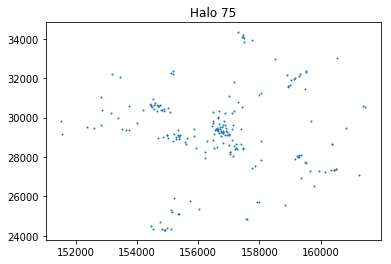

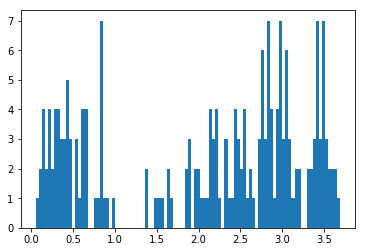

galaxies [0, 2, 1, 3, 2, 4, 5, 8, 7, 4, 8, 5, 10, 1, 2, 6, 10, 27, 47, 48]
blue galaxies counted [0, 0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 1, 6, 0, 2, 5, 6, 13, 29, 33]
red galaxies counted [0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 3, 0, 0, 0, 1, 0, 9, 7, 7]
red galaxies counted [0, 1, 1, 2, 2, 1, 3, 6, 3, 1, 4, 1, 4, 1, 0, 0, 4, 5, 11, 8]
sum of galaxies: 200

Halo: 76
Halo Mass: 11053.76
N Subhalos from Illustris Algorithm: 749 88.22898411750793
R500c, R200c, R200m: 0.4207121212581975 0.6474206539076773 0.7837246694996244
before dev loop: 88.26157283782959
True
232118 232118 time 88.3082480430603
N Subhalos within 5*R200m: 110 88.37619495391846


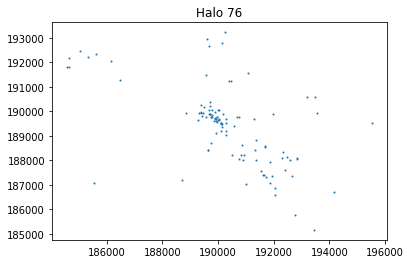

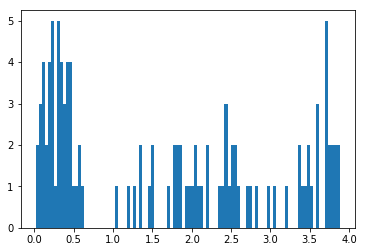

galaxies [1, 3, 1, 2, 3, 6, 4, 7, 7, 5, 3, 0, 0, 2, 3, 6, 11, 13, 6, 23]
blue galaxies counted [1, 1, 0, 0, 1, 2, 0, 2, 4, 2, 2, 0, 0, 2, 3, 5, 10, 12, 6, 19]
red galaxies counted [0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 3]
red galaxies counted [0, 2, 1, 1, 1, 4, 3, 4, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
sum of galaxies: 106

Halo: 77
Halo Mass: 11230.451
N Subhalos from Illustris Algorithm: 867 89.09072089195251
R500c, R200c, R200m: 0.33468521132386064 0.5361607498736738 0.7291663596777985
before dev loop: 89.11150693893433
True
232118 232118 time 89.12842893600464
N Subhalos within 5*R200m: 90 89.2242980003357


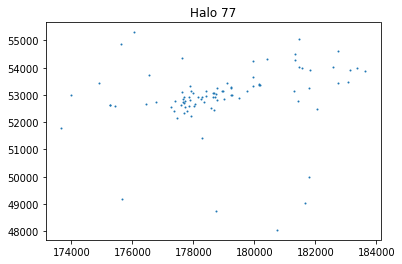

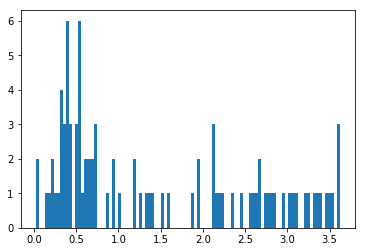

galaxies [0, 0, 0, 1, 1, 2, 1, 6, 8, 6, 8, 8, 1, 3, 4, 4, 3, 8, 10, 14]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 4, 2, 0, 1, 3, 4, 3, 7, 8, 14]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0]
red galaxies counted [0, 0, 0, 1, 1, 2, 1, 4, 4, 4, 3, 5, 1, 2, 1, 0, 0, 0, 0, 0]
sum of galaxies: 88

Halo: 78
Halo Mass: 11066.363
N Subhalos from Illustris Algorithm: 995 90.05860185623169
R500c, R200c, R200m: 0.3372438131130751 0.5315203966459151 0.6709240396033471
before dev loop: 90.07483291625977
True
232118 232118 time 90.10163187980652
N Subhalos within 5*R200m: 138 90.14492893218994


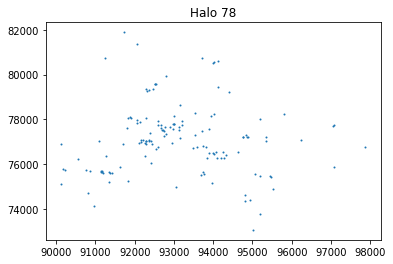

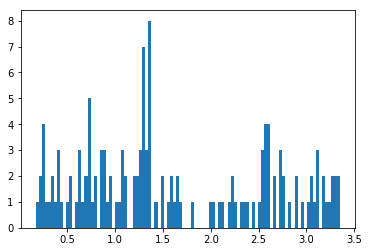

galaxies [0, 0, 0, 0, 1, 1, 4, 3, 3, 4, 3, 6, 10, 9, 11, 23, 8, 8, 21, 23]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 5, 7, 4, 7, 19, 6, 6, 16, 21]
red galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 2, 2, 1, 4, 2, 2, 2, 2]
red galaxies counted [0, 0, 0, 0, 0, 1, 3, 1, 2, 3, 2, 1, 1, 3, 3, 0, 0, 0, 3, 0]
sum of galaxies: 138

Halo: 79
Halo Mass: 10952.339
N Subhalos from Illustris Algorithm: 883 90.75423693656921
R500c, R200c, R200m: 0.39629094576409646 0.606416367918658 0.7594047811675748
before dev loop: 90.75991988182068
True
232118 232118 time 90.79197096824646
N Subhalos within 5*R200m: 219 90.83791780471802


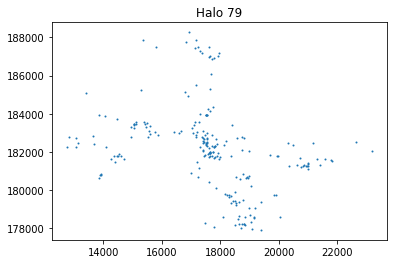

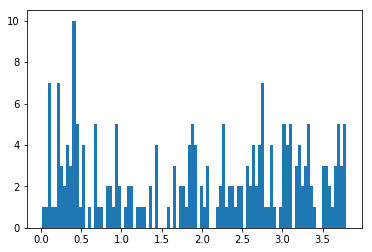

galaxies [1, 6, 1, 1, 1, 7, 4, 5, 14, 7, 3, 7, 11, 6, 7, 8, 22, 20, 42, 45]
blue galaxies counted [0, 0, 0, 0, 0, 2, 1, 2, 5, 2, 2, 1, 10, 6, 7, 7, 13, 11, 22, 35]
red galaxies counted [1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 0, 3, 0, 0, 0, 0, 6, 1, 11, 5]
red galaxies counted [0, 4, 1, 1, 1, 3, 3, 2, 7, 3, 1, 3, 1, 0, 0, 1, 3, 8, 9, 5]
sum of galaxies: 218

Halo: 80
Halo Mass: 10831.289
N Subhalos from Illustris Algorithm: 697 91.98829007148743
R500c, R200c, R200m: 0.42026813919212974 0.6430012508172159 0.7835522811518797
before dev loop: 92.02300906181335
True
232118 232118 time 92.04683685302734
N Subhalos within 5*R200m: 157 92.1168909072876


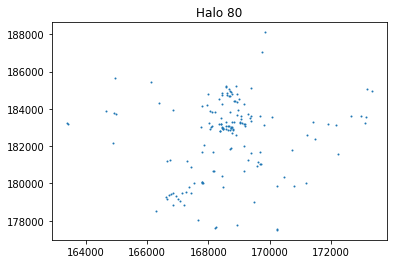

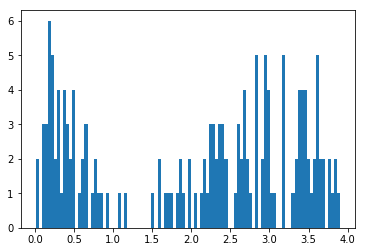

galaxies [0, 3, 2, 4, 3, 5, 6, 1, 7, 6, 6, 4, 2, 2, 0, 6, 10, 22, 31, 35]
blue galaxies counted [0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 2, 3, 1, 2, 0, 4, 8, 16, 17, 30]
red galaxies counted [0, 1, 0, 0, 1, 1, 3, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 3, 4, 4]
red galaxies counted [0, 2, 2, 4, 2, 2, 1, 0, 5, 4, 3, 1, 1, 0, 0, 1, 2, 3, 10, 1]
sum of galaxies: 155

Halo: 81
Halo Mass: 10947.885
N Subhalos from Illustris Algorithm: 951 92.8801589012146
R500c, R200c, R200m: 0.3222296327514448 0.5805903434903475 0.7313154090291526
before dev loop: 92.90670490264893
True
232118 232118 time 92.94036889076233
N Subhalos within 5*R200m: 178 93.02886891365051


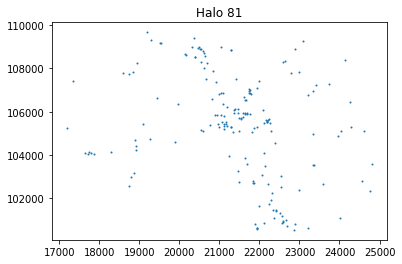

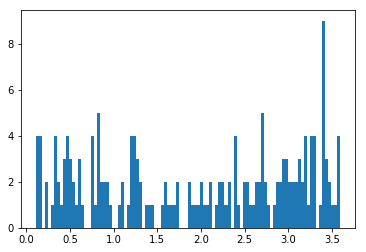

galaxies [0, 1, 2, 2, 3, 2, 0, 4, 4, 8, 8, 3, 14, 4, 15, 7, 11, 16, 29, 45]
blue galaxies counted [0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 6, 3, 11, 4, 6, 6, 8, 14, 21, 30]
red galaxies counted [0, 1, 0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 2, 0, 2, 0, 1, 1, 5, 9]
red galaxies counted [0, 0, 2, 0, 2, 2, 0, 2, 4, 3, 0, 0, 1, 0, 7, 1, 2, 1, 3, 6]
sum of galaxies: 178

Halo: 82
Halo Mass: 10597.636
N Subhalos from Illustris Algorithm: 766 94.86759877204895
R500c, R200c, R200m: 0.3803419009105111 0.5842685887819711 0.7219066723980457
before dev loop: 94.88529086112976
True
232118 232118 time 94.91362476348877
N Subhalos within 5*R200m: 119 94.98262405395508


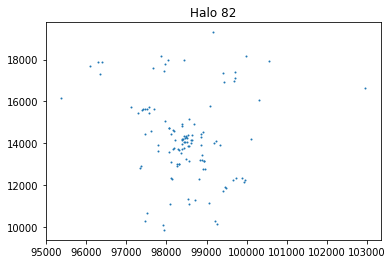

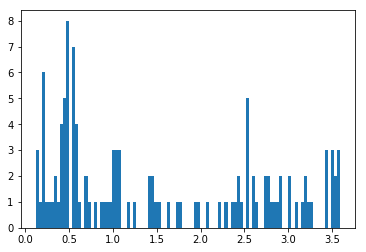

galaxies [0, 0, 2, 1, 1, 6, 2, 2, 6, 13, 11, 4, 3, 11, 2, 7, 4, 7, 18, 19]
blue galaxies counted [0, 0, 0, 1, 0, 1, 0, 0, 1, 6, 2, 3, 2, 4, 2, 7, 4, 5, 16, 15]
red galaxies counted [0, 0, 0, 0, 0, 2, 0, 0, 2, 3, 3, 1, 0, 4, 0, 0, 0, 2, 2, 4]
red galaxies counted [0, 0, 2, 0, 1, 3, 2, 2, 3, 4, 6, 0, 1, 3, 0, 0, 0, 0, 0, 0]
sum of galaxies: 119

Halo: 83
Halo Mass: 10720.226
N Subhalos from Illustris Algorithm: 963 95.7679717540741
R500c, R200c, R200m: 0.4020546256637934 0.6195930270125328 0.7640232355504157
before dev loop: 95.77540302276611
True
232118 232118 time 95.80069875717163
N Subhalos within 5*R200m: 124 95.89944791793823


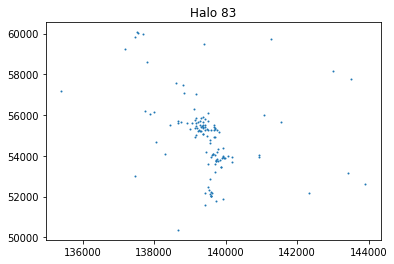

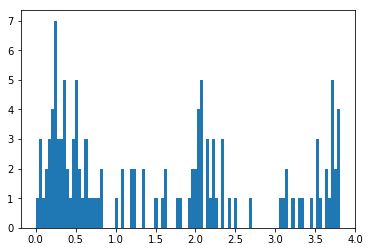

galaxies [0, 1, 1, 2, 3, 5, 8, 5, 5, 9, 6, 4, 2, 3, 6, 4, 16, 13, 5, 22]
blue galaxies counted [0, 0, 0, 0, 1, 2, 3, 1, 1, 1, 2, 1, 2, 3, 6, 4, 11, 11, 5, 19]
red galaxies counted [0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2]
red galaxies counted [0, 0, 0, 1, 2, 2, 5, 2, 3, 7, 3, 3, 0, 0, 0, 0, 3, 1, 0, 1]
sum of galaxies: 120

Halo: 84
Halo Mass: 10747.816
N Subhalos from Illustris Algorithm: 1066 96.7235038280487
R500c, R200c, R200m: 0.31855979469461604 0.5468023474357595 0.6873164259717777
before dev loop: 96.73126292228699
True
232118 232118 time 96.75889992713928
N Subhalos within 5*R200m: 143 96.86056709289551


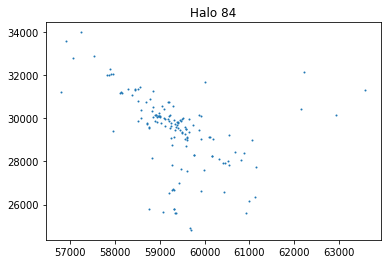

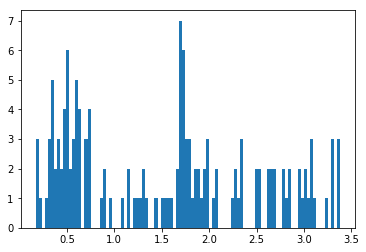

galaxies [0, 0, 0, 0, 1, 3, 0, 3, 8, 7, 13, 12, 5, 3, 6, 6, 28, 13, 15, 20]
blue galaxies counted [0, 0, 0, 0, 1, 2, 0, 2, 3, 2, 6, 6, 2, 3, 5, 4, 17, 11, 14, 19]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 2, 0, 1, 0, 6, 2, 0, 1]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 3, 4, 7, 4, 1, 0, 0, 2, 5, 0, 1, 0]
sum of galaxies: 143

Halo: 85
Halo Mass: 10718.444
N Subhalos from Illustris Algorithm: 786 98.22746276855469
R500c, R200c, R200m: 0.3747067315998202 0.600676668655352 0.7469546272633242
before dev loop: 98.23935794830322
True
232118 232118 time 98.29386496543884
N Subhalos within 5*R200m: 102 98.3592939376831


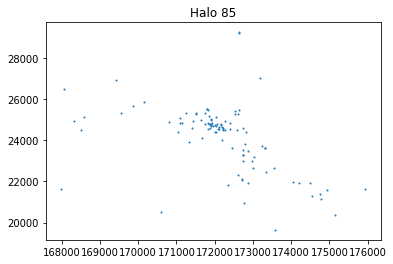

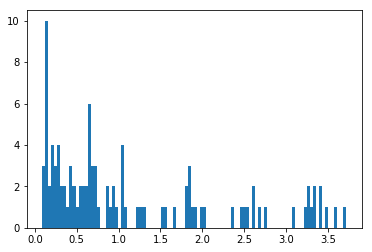

galaxies [1, 2, 2, 8, 2, 6, 5, 3, 4, 4, 6, 13, 5, 6, 3, 3, 9, 3, 5, 12]
blue galaxies counted [0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 4, 9, 3, 3, 2, 3, 7, 3, 5, 10]
red galaxies counted [0, 0, 0, 4, 1, 1, 2, 0, 2, 0, 2, 1, 1, 1, 1, 0, 1, 0, 0, 2]
red galaxies counted [1, 2, 1, 4, 1, 4, 3, 3, 0, 3, 0, 3, 1, 2, 0, 0, 1, 0, 0, 0]
sum of galaxies: 102

Halo: 86
Halo Mass: 10534.838
N Subhalos from Illustris Algorithm: 704 99.54894995689392
R500c, R200c, R200m: 0.3965638205848645 0.6349587699091653 0.7717709427927804
before dev loop: 99.57804274559021
True
232118 232118 time 99.62079787254333
N Subhalos within 5*R200m: 101 99.70453786849976


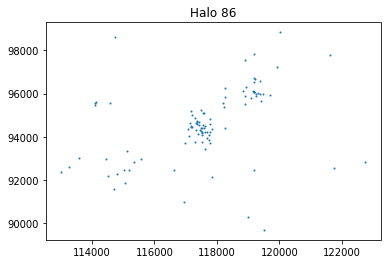

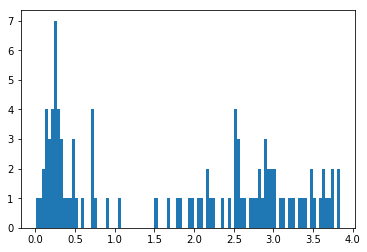

galaxies [0, 0, 4, 3, 3, 7, 7, 4, 1, 5, 1, 5, 1, 1, 0, 2, 6, 14, 18, 17]
blue galaxies counted [0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 1, 3, 1, 1, 0, 1, 4, 12, 9, 12]
red galaxies counted [0, 0, 0, 3, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 5, 5]
red galaxies counted [0, 0, 3, 0, 3, 4, 6, 3, 0, 3, 0, 2, 0, 0, 0, 0, 0, 1, 4, 0]
sum of galaxies: 99

Halo: 87
Halo Mass: 10492.637
N Subhalos from Illustris Algorithm: 867 100.47811102867126
R500c, R200c, R200m: 0.3733695408884831 0.5914074120529359 0.7435145469231016
before dev loop: 100.48793387413025
True
232118 232118 time 100.52173376083374
N Subhalos within 5*R200m: 191 100.5859477519989


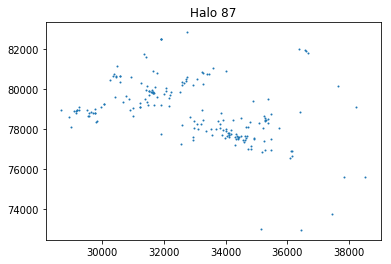

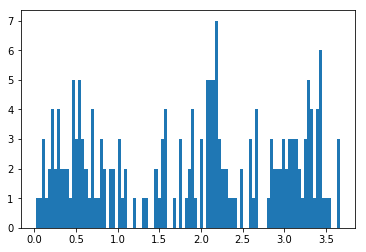

galaxies [1, 1, 2, 1, 1, 5, 3, 6, 3, 9, 10, 6, 8, 8, 3, 11, 16, 32, 24, 40]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 6, 1, 2, 3, 2, 9, 12, 23, 15, 26]
red galaxies counted [0, 1, 2, 1, 0, 2, 2, 2, 0, 2, 1, 0, 1, 0, 0, 1, 2, 4, 4, 8]
red galaxies counted [1, 0, 0, 0, 1, 3, 1, 3, 3, 6, 3, 5, 5, 5, 1, 1, 2, 5, 5, 6]
sum of galaxies: 190

Halo: 88
Halo Mass: 10377.713
N Subhalos from Illustris Algorithm: 915 101.23062086105347
R500c, R200c, R200m: 0.36927057354705745 0.5933709417564849 0.7523559153089142
before dev loop: 101.24091696739197
True
232118 232118 time 101.26176190376282
N Subhalos within 5*R200m: 181 101.33192491531372


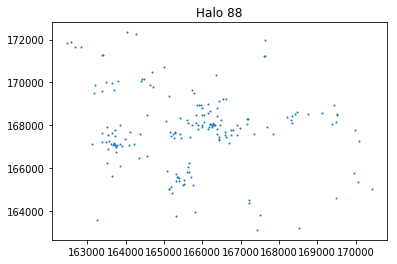

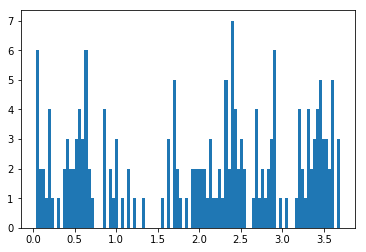

galaxies [1, 0, 2, 0, 2, 3, 1, 1, 6, 6, 13, 3, 6, 7, 2, 9, 15, 32, 23, 42]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 2, 5, 1, 6, 7, 17, 18, 23]
red galaxies counted [1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 4, 1, 1, 1, 0, 0, 2, 6, 4, 3]
red galaxies counted [0, 0, 2, 0, 1, 1, 1, 0, 2, 2, 6, 0, 3, 1, 1, 3, 6, 9, 1, 16]
sum of galaxies: 174

Halo: 89
Halo Mass: 10413.816
N Subhalos from Illustris Algorithm: 781 101.99125790596008
R500c, R200c, R200m: 0.3573148851520947 0.554265970210963 0.68595725634662
before dev loop: 102.00332498550415
True
232118 232118 time 102.03970575332642
N Subhalos within 5*R200m: 141 102.14736199378967


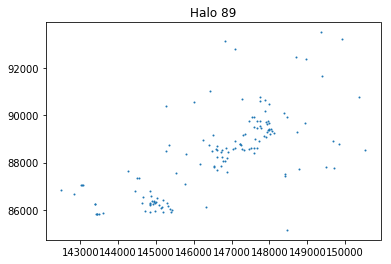

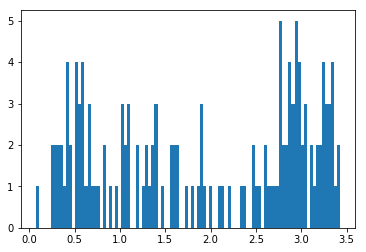

galaxies [1, 0, 0, 0, 0, 0, 2, 2, 5, 6, 8, 9, 3, 6, 8, 10, 8, 7, 19, 47]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 4, 4, 2, 0, 5, 7, 6, 7, 14, 35]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 2, 3, 1, 0, 3, 5]
red galaxies counted [1, 0, 0, 0, 0, 0, 1, 2, 3, 5, 3, 4, 0, 6, 1, 0, 1, 0, 2, 7]
sum of galaxies: 141

Halo: 90
Halo Mass: 10491.106
N Subhalos from Illustris Algorithm: 780 102.79189610481262
R500c, R200c, R200m: 0.37936257816027225 0.584745599270447 0.7141823452753009
before dev loop: 102.79801392555237
True
232118 232118 time 102.83021092414856
N Subhalos within 5*R200m: 158 102.89465808868408


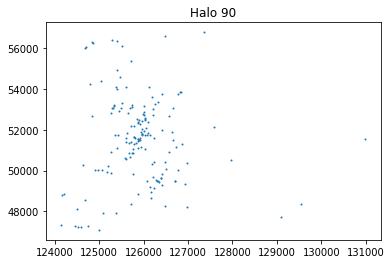

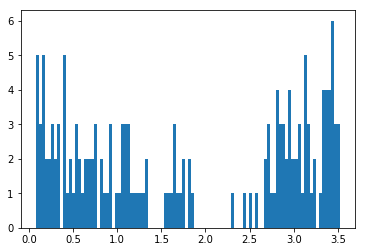

galaxies [1, 4, 1, 4, 5, 1, 4, 5, 4, 5, 5, 8, 7, 10, 9, 4, 10, 1, 21, 49]
blue galaxies counted [0, 0, 1, 4, 1, 0, 0, 1, 1, 2, 2, 2, 1, 7, 8, 4, 9, 1, 13, 34]
red galaxies counted [0, 3, 0, 0, 1, 0, 1, 2, 2, 1, 1, 0, 3, 1, 0, 0, 1, 0, 1, 7]
red galaxies counted [1, 1, 0, 0, 3, 1, 3, 2, 1, 2, 2, 6, 3, 2, 1, 0, 0, 0, 7, 8]
sum of galaxies: 158

Halo: 91
Halo Mass: 10381.131
N Subhalos from Illustris Algorithm: 842 103.53376984596252
R500c, R200c, R200m: 0.3844355837043515 0.6221703649250043 0.7644187759302848
before dev loop: 103.54791402816772
True
232118 232118 time 103.58429384231567
N Subhalos within 5*R200m: 123 103.63660073280334


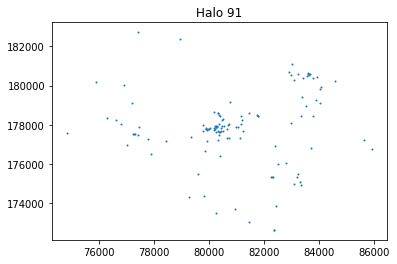

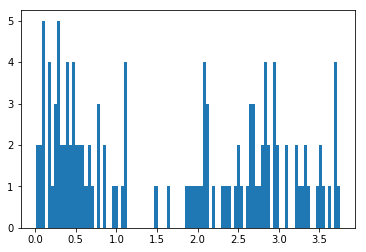

galaxies [0, 5, 0, 1, 3, 3, 5, 4, 6, 7, 6, 5, 3, 6, 0, 2, 11, 10, 25, 17]
blue galaxies counted [0, 1, 0, 0, 0, 0, 1, 1, 2, 4, 1, 2, 2, 4, 0, 2, 9, 7, 14, 17]
red galaxies counted [0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 2, 3, 0]
red galaxies counted [0, 3, 0, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1, 0, 0, 1, 1, 8, 0]
sum of galaxies: 119

Halo: 92
Halo Mass: 10326.346
N Subhalos from Illustris Algorithm: 947 104.49273085594177
R500c, R200c, R200m: 0.36435314188113327 0.5709463243883409 0.7234369492685032
before dev loop: 104.49987983703613
True
232118 232118 time 104.52516388893127
N Subhalos within 5*R200m: 185 104.5535900592804


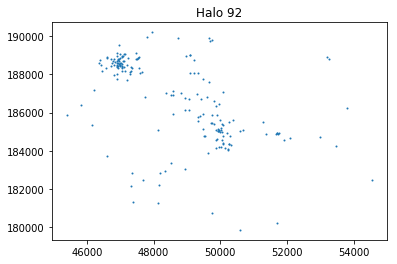

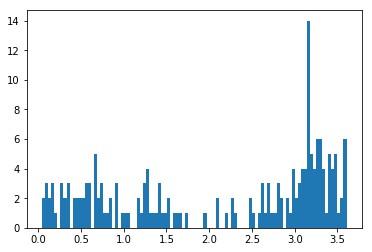

galaxies [4, 0, 0, 3, 2, 1, 3, 4, 3, 4, 8, 10, 4, 6, 12, 10, 3, 6, 21, 80]
blue galaxies counted [1, 0, 0, 0, 0, 0, 1, 2, 2, 4, 5, 4, 3, 1, 7, 6, 2, 6, 12, 27]
red galaxies counted [1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 3, 0, 2, 3, 2, 0, 0, 3, 18]
red galaxies counted [2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 3, 3, 1, 3, 2, 2, 1, 0, 6, 35]
sum of galaxies: 184

Halo: 93
Halo Mass: 10238.875
N Subhalos from Illustris Algorithm: 821 105.20512294769287
R500c, R200c, R200m: 0.4012219491090465 0.6205032903341002 0.7695008292603813
before dev loop: 105.21443772315979
True
232118 232118 time 105.24469089508057
N Subhalos within 5*R200m: 151 105.32442593574524


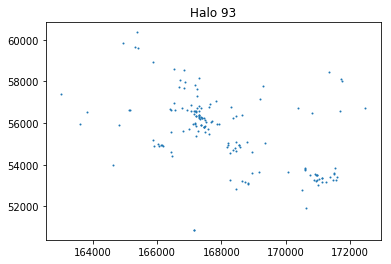

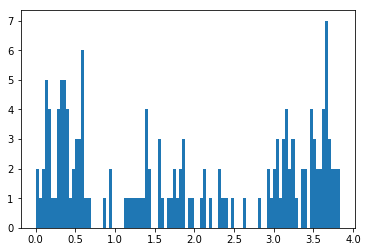

galaxies [1, 2, 2, 4, 4, 0, 5, 7, 7, 7, 10, 0, 3, 1, 12, 7, 12, 6, 15, 44]
blue galaxies counted [0, 0, 0, 0, 3, 0, 1, 3, 1, 2, 1, 0, 1, 0, 9, 6, 11, 6, 10, 23]
red galaxies counted [0, 0, 1, 2, 1, 0, 2, 0, 1, 1, 3, 0, 0, 0, 3, 1, 0, 0, 3, 14]
red galaxies counted [1, 2, 1, 2, 0, 0, 2, 4, 5, 4, 6, 0, 2, 1, 0, 0, 1, 0, 2, 7]
sum of galaxies: 149

Halo: 94
Halo Mass: 10289.019
N Subhalos from Illustris Algorithm: 856 106.12564301490784
R500c, R200c, R200m: 0.3173017320764785 0.5507157951293802 0.6841214365430489
before dev loop: 106.13697576522827
True
232118 232118 time 106.16529488563538
N Subhalos within 5*R200m: 139 106.36652493476868


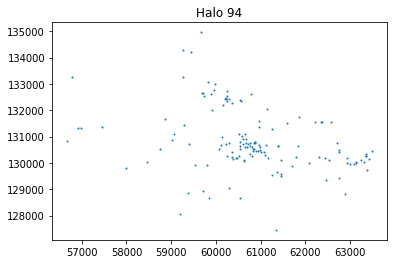

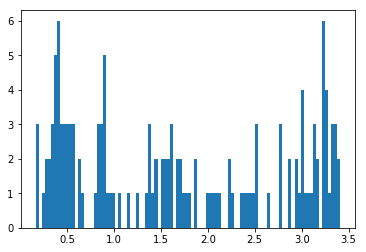

galaxies [0, 0, 0, 0, 1, 2, 2, 3, 8, 10, 11, 3, 6, 9, 3, 11, 14, 8, 12, 36]
blue galaxies counted [0, 0, 0, 0, 1, 0, 0, 0, 4, 5, 9, 3, 3, 4, 2, 6, 9, 8, 9, 22]
red galaxies counted [0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 1, 0, 2, 3, 0, 1, 2, 0, 3, 7]
red galaxies counted [0, 0, 0, 0, 0, 2, 0, 2, 3, 3, 1, 0, 1, 2, 1, 4, 3, 0, 0, 7]
sum of galaxies: 139

Halo: 95
Halo Mass: 10305.533
N Subhalos from Illustris Algorithm: 818 107.06460070610046
R500c, R200c, R200m: 0.3879188612176387 0.6091632116983731 0.7620091823691952
before dev loop: 107.07970571517944
True
232118 232118 time 107.12560296058655
N Subhalos within 5*R200m: 121 107.20181894302368


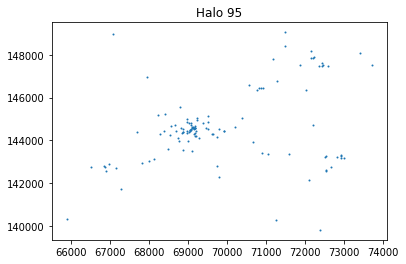

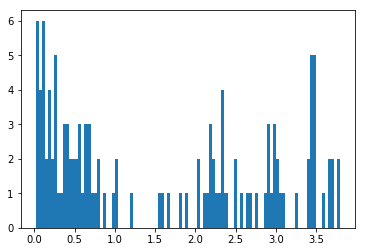

galaxies [2, 3, 3, 1, 5, 3, 4, 3, 6, 5, 6, 7, 2, 3, 1, 3, 4, 17, 15, 20]
blue galaxies counted [0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 4, 3, 1, 3, 1, 3, 3, 12, 14, 20]
red galaxies counted [1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 0, 0, 0, 1, 3, 1, 0]
red galaxies counted [1, 2, 3, 1, 2, 0, 1, 1, 5, 3, 2, 3, 1, 0, 0, 0, 0, 2, 0, 0]
sum of galaxies: 113

Halo: 96
Halo Mass: 10355.052
N Subhalos from Illustris Algorithm: 803 107.80855393409729
R500c, R200c, R200m: 0.38060488722178243 0.5781708614197612 0.7136957665529395
before dev loop: 107.81477284431458
True
232118 232118 time 107.84997606277466
N Subhalos within 5*R200m: 173 107.96500396728516


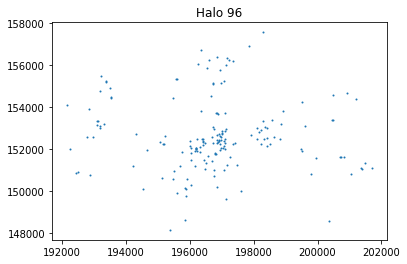

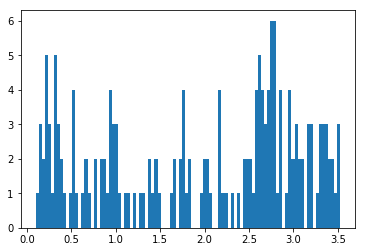

galaxies [0, 1, 0, 2, 3, 4, 4, 6, 5, 2, 5, 4, 7, 11, 5, 6, 13, 13, 45, 37]
blue galaxies counted [0, 0, 0, 0, 1, 0, 0, 2, 2, 1, 3, 1, 4, 5, 5, 2, 10, 12, 35, 28]
red galaxies counted [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 3, 2, 1, 4, 7]
red galaxies counted [0, 1, 0, 1, 1, 3, 3, 3, 2, 1, 2, 1, 2, 5, 0, 1, 1, 0, 6, 2]
sum of galaxies: 173

Halo: 97
Halo Mass: 10113.485
N Subhalos from Illustris Algorithm: 705 108.60029006004333
R500c, R200c, R200m: 0.36940857230104623 0.5926599699340055 0.7532871967174686
before dev loop: 108.60732388496399
True
232118 232118 time 108.63911294937134
N Subhalos within 5*R200m: 122 108.68607091903687


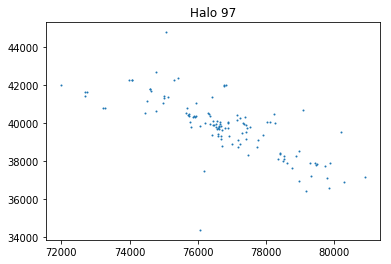

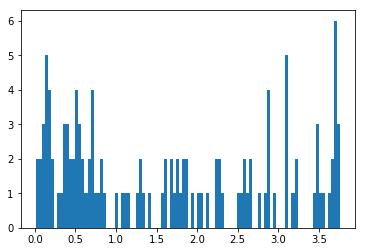

galaxies [1, 3, 2, 3, 4, 2, 0, 2, 6, 8, 6, 7, 4, 3, 5, 6, 11, 7, 16, 23]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 2, 3, 2, 5, 6, 9, 7, 15, 19]
red galaxies counted [0, 2, 1, 1, 2, 0, 0, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0, 1, 2]
red galaxies counted [1, 1, 1, 2, 2, 2, 0, 1, 4, 3, 3, 3, 0, 0, 0, 0, 1, 0, 0, 2]
sum of galaxies: 119

Halo: 98
Halo Mass: 9784.581
N Subhalos from Illustris Algorithm: 715 109.27200388908386
R500c, R200c, R200m: 0.4169802298016929 0.6143823029556247 0.7493065712143924
before dev loop: 109.27898502349854
True
232118 232118 time 109.36205387115479
N Subhalos within 5*R200m: 119 109.41837787628174


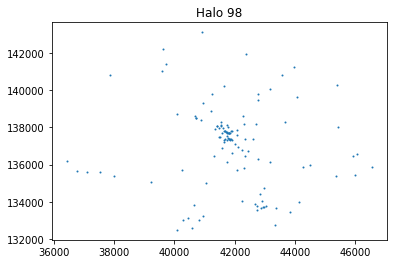

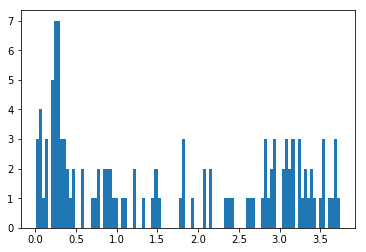

galaxies [2, 1, 1, 2, 0, 7, 10, 8, 3, 2, 2, 3, 7, 4, 3, 4, 7, 5, 16, 27]
blue galaxies counted [0, 0, 0, 2, 0, 4, 2, 4, 2, 1, 0, 0, 4, 4, 3, 4, 7, 5, 9, 24]
red galaxies counted [0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 3]
red galaxies counted [2, 1, 1, 0, 0, 3, 5, 4, 1, 1, 2, 2, 3, 0, 0, 0, 0, 0, 5, 0]
sum of galaxies: 114

Halo: 99
Halo Mass: 10072.03
N Subhalos from Illustris Algorithm: 806 110.23017072677612
R500c, R200c, R200m: 0.3623823259074288 0.5829880868538218 0.7284908183448114
before dev loop: 110.24718904495239
True
232118 232118 time 110.27271389961243
N Subhalos within 5*R200m: 154 110.31853699684143


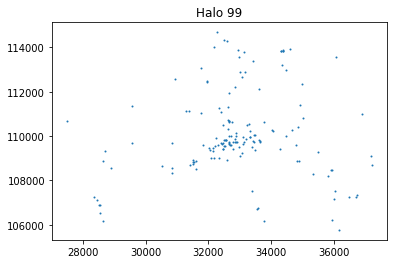

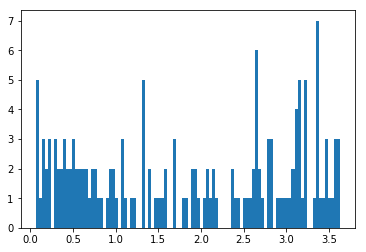

galaxies [2, 1, 1, 3, 1, 3, 1, 5, 5, 5, 8, 7, 3, 9, 7, 7, 10, 11, 23, 40]
blue galaxies counted [0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 2, 6, 1, 6, 7, 4, 10, 11, 21, 29]
red galaxies counted [1, 1, 0, 3, 0, 2, 0, 1, 1, 1, 2, 0, 0, 2, 0, 3, 0, 0, 2, 9]
red galaxies counted [1, 0, 1, 0, 0, 0, 0, 2, 3, 3, 4, 1, 2, 1, 0, 0, 0, 0, 0, 2]
sum of galaxies: 152

Halo: 100
Halo Mass: 9850.419
N Subhalos from Illustris Algorithm: 734 110.93965697288513
R500c, R200c, R200m: 0.4086667957265417 0.612058583292796 0.75188551050492
before dev loop: 110.95281195640564
True
232118 232118 time 110.9880120754242
N Subhalos within 5*R200m: 136 111.07268571853638


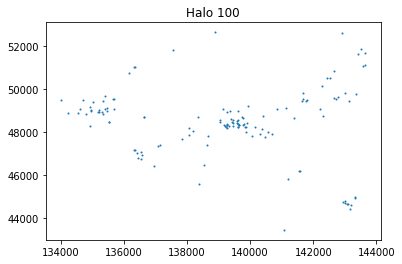

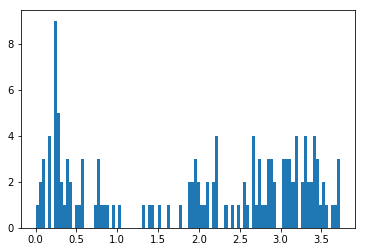

galaxies [0, 2, 1, 1, 3, 4, 10, 3, 5, 1, 4, 4, 3, 2, 2, 3, 12, 11, 26, 36]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 3, 1, 2, 3, 2, 1, 1, 3, 10, 9, 11, 27]
red galaxies counted [0, 0, 0, 1, 3, 1, 3, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 2, 4, 4]
red galaxies counted [0, 2, 1, 0, 0, 3, 6, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 11, 5]
sum of galaxies: 133

Halo: 101
Halo Mass: 10112.432
N Subhalos from Illustris Algorithm: 768 111.69421696662903
R500c, R200c, R200m: 0.3460304944382702 0.5217929457471829 0.6482427213328021
before dev loop: 111.71841311454773
True
232118 232118 time 111.74091172218323
N Subhalos within 5*R200m: 87 111.77955198287964


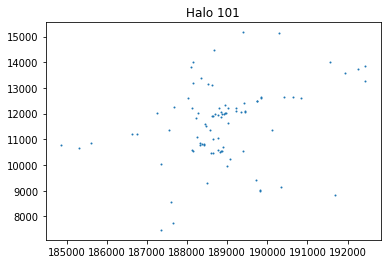

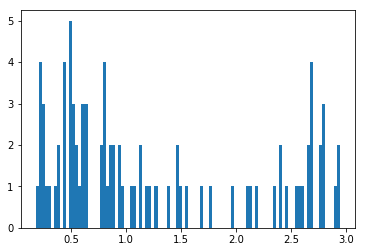

galaxies [0, 0, 0, 0, 0, 2, 4, 3, 2, 6, 9, 8, 7, 7, 5, 5, 4, 4, 8, 13]
blue galaxies counted [0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 4, 3, 3, 5, 5, 5, 4, 4, 8, 12]
red galaxies counted [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 1, 3, 4, 3, 2, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 87

Halo: 102
Halo Mass: 9930.823
N Subhalos from Illustris Algorithm: 783 112.37197494506836
R500c, R200c, R200m: 0.3890160854272616 0.5731047818357747 0.700963930248612
before dev loop: 112.38025093078613
True
232118 232118 time 112.41129970550537
N Subhalos within 5*R200m: 129 112.51592183113098


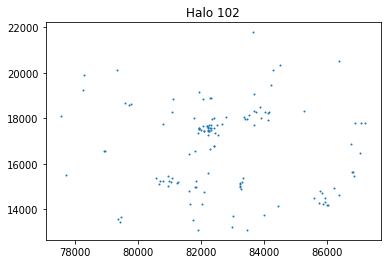

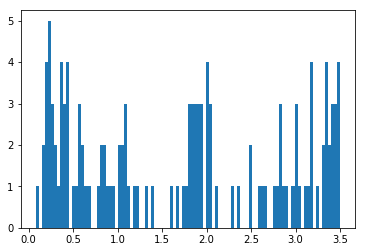

galaxies [1, 0, 0, 0, 2, 4, 8, 3, 5, 6, 5, 4, 6, 7, 5, 2, 18, 11, 11, 31]
blue galaxies counted [1, 0, 0, 0, 2, 2, 2, 0, 3, 5, 4, 0, 5, 4, 5, 2, 9, 8, 11, 25]
red galaxies counted [0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 2, 0, 0, 0, 0, 4, 3, 0, 3]
red galaxies counted [0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 2, 1, 3, 0, 0, 5, 0, 0, 3]
sum of galaxies: 129

Halo: 103
Halo Mass: 9901.212
N Subhalos from Illustris Algorithm: 770 113.14607000350952
R500c, R200c, R200m: 0.3732443131244922 0.569281451692264 0.7165775264338853
before dev loop: 113.15242910385132
True
232118 232118 time 113.18154382705688
N Subhalos within 5*R200m: 141 113.25831198692322


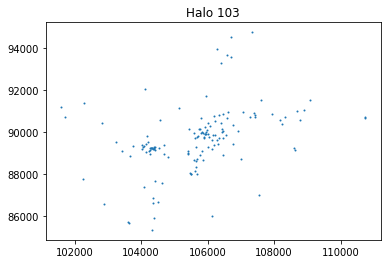

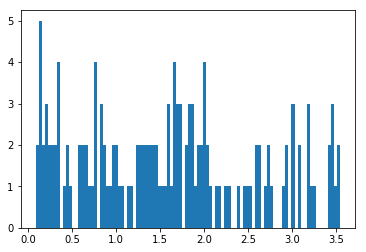

galaxies [1, 1, 2, 3, 2, 4, 3, 4, 3, 3, 2, 7, 9, 7, 10, 13, 23, 12, 12, 20]
blue galaxies counted [0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 2, 3, 2, 2, 6, 9, 7, 8, 8, 16]
red galaxies counted [1, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 2, 3, 3, 1, 2, 3, 1, 4, 4]
red galaxies counted [0, 0, 1, 2, 1, 1, 2, 3, 1, 1, 0, 2, 4, 2, 3, 2, 13, 3, 0, 0]
sum of galaxies: 141

Halo: 104
Halo Mass: 9909.864
N Subhalos from Illustris Algorithm: 826 113.87002491950989
R500c, R200c, R200m: 0.3668899649287841 0.5867572904190347 0.7274977237432897
before dev loop: 113.8789439201355
True
232118 232118 time 113.90503287315369
N Subhalos within 5*R200m: 168 114.1000108718872


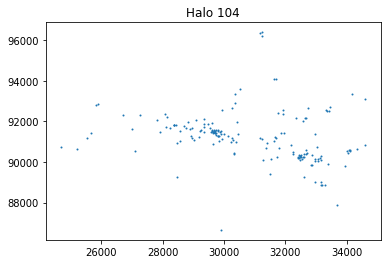

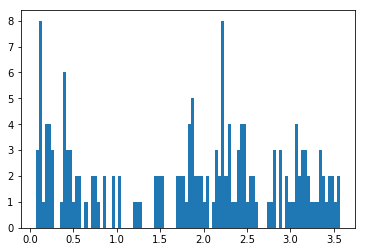

galaxies [0, 3, 7, 0, 4, 5, 3, 0, 7, 7, 4, 5, 3, 4, 3, 6, 23, 31, 21, 31]
blue galaxies counted [0, 0, 1, 0, 2, 0, 1, 0, 3, 2, 2, 4, 1, 4, 3, 5, 16, 16, 14, 27]
red galaxies counted [0, 2, 0, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 0, 1, 5, 5, 5, 2]
red galaxies counted [0, 1, 6, 0, 1, 5, 1, 0, 3, 2, 1, 1, 1, 0, 0, 0, 2, 10, 2, 2]
sum of galaxies: 167

Halo: 105
Halo Mass: 9441.806
N Subhalos from Illustris Algorithm: 794 114.6693708896637
R500c, R200c, R200m: 0.3609313572852022 0.5742569733471751 0.7234636922820409
before dev loop: 114.67594790458679
True
232118 232118 time 114.6997709274292
N Subhalos within 5*R200m: 195 114.78800678253174


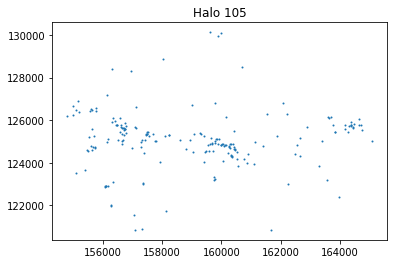

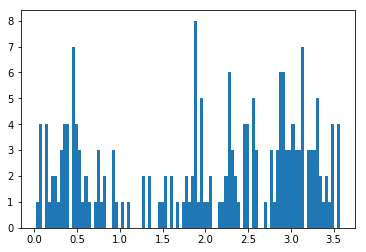

galaxies [3, 0, 1, 1, 3, 2, 3, 5, 6, 11, 6, 5, 4, 5, 3, 7, 22, 20, 38, 48]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 2, 2, 1, 1, 3, 7, 17, 7, 22, 33]
red galaxies counted [1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 1, 0, 1, 0, 0, 1, 2, 8, 4]
red galaxies counted [2, 0, 1, 0, 3, 2, 2, 3, 2, 7, 3, 2, 3, 3, 0, 0, 4, 11, 8, 11]
sum of galaxies: 193

Halo: 106
Halo Mass: 9582.273
N Subhalos from Illustris Algorithm: 627 115.62127494812012
R500c, R200c, R200m: 0.409483058156213 0.6119061321018505 0.7454023314445947
before dev loop: 115.6332528591156
True
232118 232118 time 115.6657829284668
N Subhalos within 5*R200m: 77 115.7511899471283


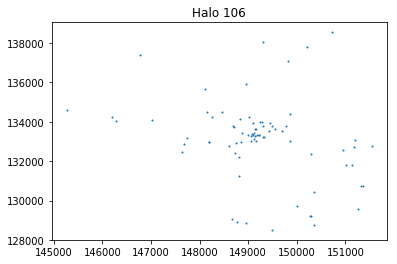

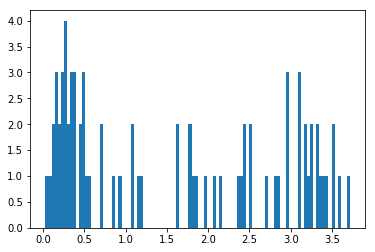

galaxies [0, 1, 1, 1, 5, 3, 4, 5, 3, 6, 1, 2, 2, 3, 1, 2, 5, 7, 7, 17]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 4, 0, 4, 0, 1, 1, 3, 1, 2, 5, 6, 6, 16]
red galaxies counted [0, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1]
red galaxies counted [0, 0, 1, 1, 3, 2, 3, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 76

Halo: 107
Halo Mass: 9395.793
N Subhalos from Illustris Algorithm: 604 116.35092687606812
R500c, R200c, R200m: 0.3827219890809162 0.5812259304408337 0.7123852788206888
before dev loop: 116.35633373260498
True
232118 232118 time 116.38901686668396
N Subhalos within 5*R200m: 98 116.45713472366333


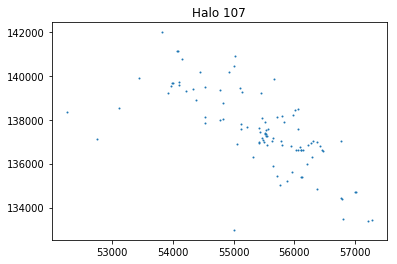

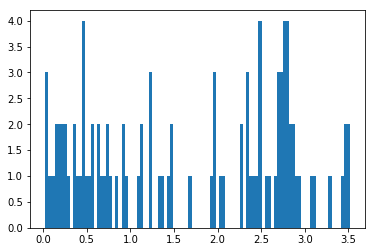

galaxies [1, 0, 1, 2, 0, 3, 3, 1, 3, 5, 4, 6, 3, 3, 6, 4, 5, 8, 29, 8]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 3, 3, 4, 7, 27, 8]
red galaxies counted [0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 2, 1, 1, 1, 2, 0]
red galaxies counted [1, 0, 0, 1, 0, 2, 3, 0, 3, 2, 2, 3, 1, 0, 1, 0, 0, 0, 0, 0]
sum of galaxies: 95

Halo: 108
Halo Mass: 9763.695
N Subhalos from Illustris Algorithm: 768 117.04330277442932
R500c, R200c, R200m: 0.267284029646739 0.4277241554215666 0.5814296257295761
before dev loop: 117.07200694084167
True
232118 232118 time 117.09497380256653
N Subhalos within 5*R200m: 108 117.16848587989807


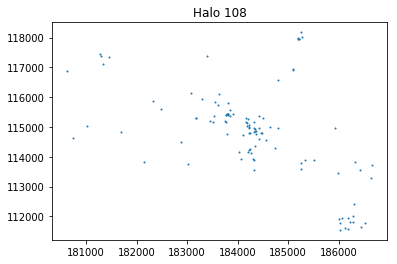

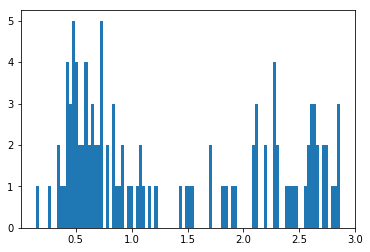

galaxies [0, 0, 0, 0, 1, 0, 0, 1, 0, 4, 14, 10, 14, 7, 7, 3, 4, 6, 14, 23]
blue galaxies counted [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 5, 2, 4, 4, 3, 3, 3, 5, 10, 16]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 2, 1, 1, 0, 1, 1, 3, 6]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 6, 7, 8, 2, 3, 0, 0, 0, 1, 1]
sum of galaxies: 108

Halo: 109
Halo Mass: 9206.317
N Subhalos from Illustris Algorithm: 698 117.80812191963196
R500c, R200c, R200m: 0.3922152784733877 0.5971815009099979 0.7320837502204935
before dev loop: 117.82075691223145
True
232118 232118 time 117.8482837677002
N Subhalos within 5*R200m: 145 117.95022988319397


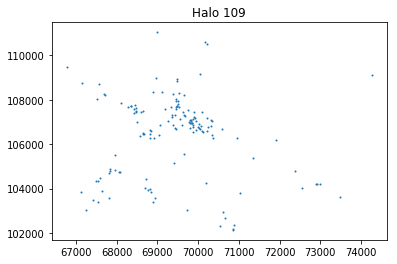

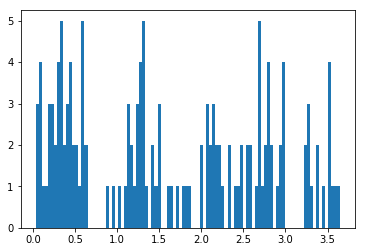

galaxies [0, 4, 0, 0, 2, 3, 4, 8, 3, 9, 9, 1, 1, 5, 17, 8, 6, 17, 28, 16]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 4, 0, 1, 4, 11, 7, 5, 12, 23, 14]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 2, 0, 1, 4, 4, 2]
red galaxies counted [0, 4, 0, 0, 2, 3, 2, 4, 0, 7, 5, 0, 0, 0, 4, 1, 0, 1, 1, 0]
sum of galaxies: 141

Halo: 110
Halo Mass: 9351.555
N Subhalos from Illustris Algorithm: 592 118.51477599143982
R500c, R200c, R200m: 0.39980837266443103 0.5988868884708953 0.7428289969772636
before dev loop: 118.52147388458252
True
232118 232118 time 118.556480884552
N Subhalos within 5*R200m: 119 118.74972009658813


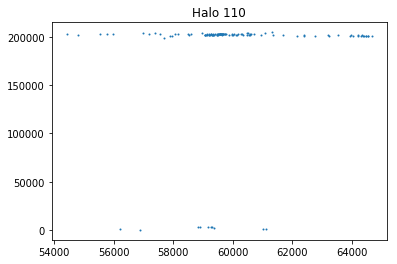

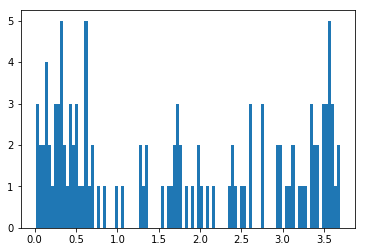

galaxies [0, 2, 1, 3, 2, 1, 5, 6, 5, 6, 7, 4, 1, 2, 5, 4, 11, 7, 11, 31]
blue galaxies counted [0, 1, 0, 0, 0, 0, 1, 1, 2, 1, 1, 2, 1, 2, 5, 3, 7, 6, 9, 21]
red galaxies counted [0, 0, 0, 0, 1, 1, 1, 2, 0, 3, 2, 0, 0, 0, 0, 1, 3, 1, 2, 3]
red galaxies counted [0, 1, 1, 3, 1, 0, 3, 3, 3, 2, 4, 2, 0, 0, 0, 0, 1, 0, 0, 7]
sum of galaxies: 114

Halo: 111
Halo Mass: 9310.482
N Subhalos from Illustris Algorithm: 632 119.28301286697388
R500c, R200c, R200m: 0.41250193603321655 0.6107573835532709 0.7427579758604733
before dev loop: 119.29536581039429
True
232118 232118 time 119.31723690032959
N Subhalos within 5*R200m: 109 119.36673784255981


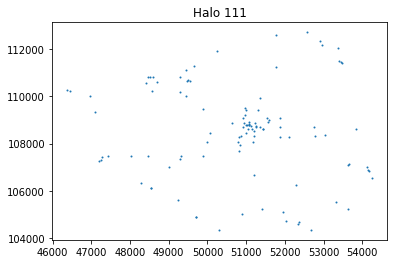

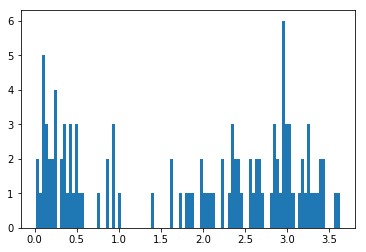

galaxies [0, 1, 6, 1, 2, 4, 2, 3, 4, 6, 2, 1, 4, 2, 0, 3, 8, 13, 27, 17]
blue galaxies counted [0, 0, 1, 0, 0, 1, 0, 1, 1, 4, 2, 0, 2, 2, 0, 3, 8, 10, 21, 15]
red galaxies counted [0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 4, 2]
red galaxies counted [0, 1, 5, 1, 1, 2, 1, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0]
sum of galaxies: 106

Halo: 112
Halo Mass: 9802.825
N Subhalos from Illustris Algorithm: 757 119.94395995140076
R500c, R200c, R200m: 0.2996138308606221 0.4969133757845088 0.6207533054831167
before dev loop: 119.95707178115845
True
232118 232118 time 119.98168706893921
N Subhalos within 5*R200m: 97 120.0390977859497


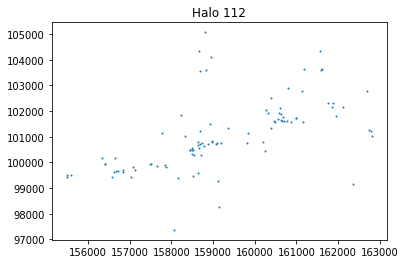

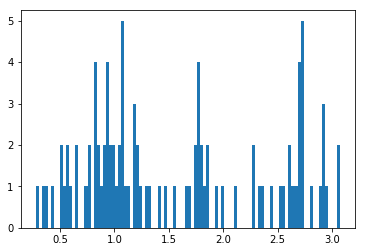

galaxies [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 4, 4, 4, 14, 13, 9, 4, 13, 8, 21]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 4, 4, 7, 3, 12, 5, 17]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 4, 3, 0, 1, 1, 2, 4]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 2, 1, 6, 6, 2, 0, 0, 1, 0]
sum of galaxies: 97

Halo: 113
Halo Mass: 9353.096
N Subhalos from Illustris Algorithm: 720 120.82926893234253
R500c, R200c, R200m: 0.3717452230916783 0.5889004547060323 0.7217228341971997
before dev loop: 120.83750891685486
True
232118 232118 time 120.86622095108032
N Subhalos within 5*R200m: 119 121.89185404777527


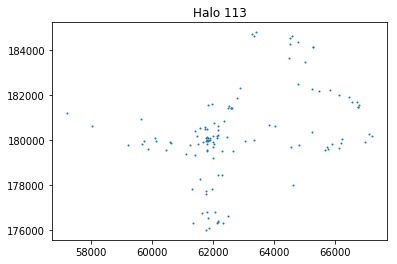

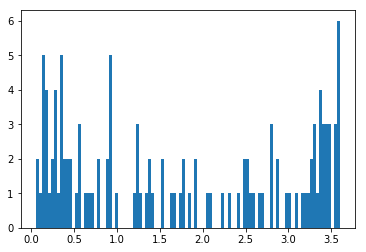

galaxies [0, 1, 1, 4, 4, 1, 5, 2, 7, 4, 4, 3, 7, 3, 6, 6, 7, 5, 13, 34]
blue galaxies counted [0, 0, 0, 0, 0, 0, 3, 2, 4, 0, 2, 2, 5, 1, 3, 6, 6, 4, 10, 23]
red galaxies counted [0, 0, 0, 1, 1, 1, 1, 0, 3, 1, 1, 1, 1, 0, 2, 0, 0, 1, 2, 3]
red galaxies counted [0, 1, 1, 3, 3, 0, 1, 0, 0, 3, 1, 0, 1, 2, 1, 0, 1, 0, 1, 8]
sum of galaxies: 117

Halo: 114
Halo Mass: 9329.943
N Subhalos from Illustris Algorithm: 820 122.45690083503723
R500c, R200c, R200m: 0.33081822361109403 0.5128441248938026 0.642101636659722
before dev loop: 122.4611349105835
True
232118 232118 time 122.49695491790771
N Subhalos within 5*R200m: 111 122.58552074432373


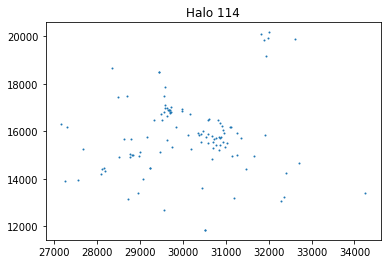

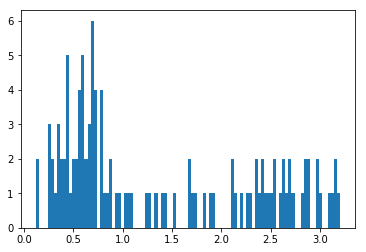

galaxies [0, 0, 0, 2, 0, 0, 2, 3, 4, 9, 6, 13, 15, 5, 3, 5, 5, 6, 16, 17]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 4, 2, 1, 4, 5, 6, 14, 11]
red galaxies counted [0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 2]
red galaxies counted [0, 0, 0, 2, 0, 0, 0, 1, 3, 9, 2, 9, 10, 3, 1, 1, 0, 0, 1, 4]
sum of galaxies: 111

Halo: 115
Halo Mass: 9228.84
N Subhalos from Illustris Algorithm: 667 123.13461399078369
R500c, R200c, R200m: 0.3409618926838454 0.587031286204442 0.7343132688191691
before dev loop: 123.14263081550598
True
232118 232118 time 123.17245483398438
N Subhalos within 5*R200m: 112 123.22831392288208


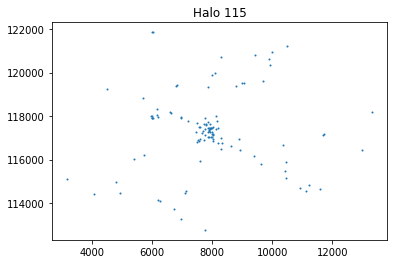

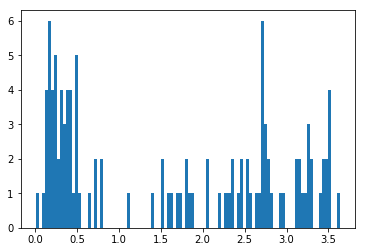

galaxies [0, 0, 2, 3, 6, 6, 4, 6, 9, 7, 2, 2, 2, 1, 0, 5, 6, 10, 19, 21]
blue galaxies counted [0, 0, 0, 2, 1, 3, 1, 1, 5, 3, 2, 1, 1, 1, 0, 4, 5, 10, 17, 16]
red galaxies counted [0, 0, 0, 0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 4]
red galaxies counted [0, 0, 2, 1, 3, 1, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
sum of galaxies: 111

Halo: 116
Halo Mass: 9338.046
N Subhalos from Illustris Algorithm: 841 123.76088881492615
R500c, R200c, R200m: 0.3755114240730359 0.5610683039178792 0.6936421095002806
before dev loop: 123.76772689819336
True
232118 232118 time 123.79794788360596
N Subhalos within 5*R200m: 115 123.84872698783875


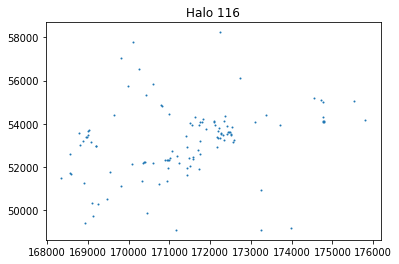

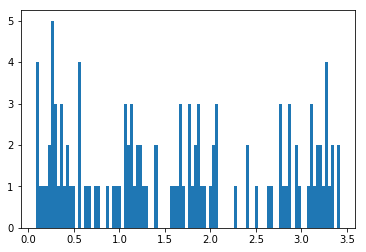

galaxies [1, 2, 1, 1, 1, 1, 5, 5, 5, 3, 5, 3, 2, 3, 14, 4, 16, 8, 9, 26]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 3, 3, 1, 3, 12, 4, 9, 7, 7, 24]
red galaxies counted [0, 2, 1, 1, 1, 0, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 5, 0, 1, 2]
red galaxies counted [1, 0, 0, 0, 0, 0, 4, 3, 3, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0]
sum of galaxies: 115

Halo: 117
Halo Mass: 9183.523
N Subhalos from Illustris Algorithm: 718 124.4236307144165
R500c, R200c, R200m: 0.372789681894351 0.5844826129591757 0.7274692192138902
before dev loop: 124.43157887458801
True
232118 232118 time 124.4619448184967
N Subhalos within 5*R200m: 111 124.52748990058899


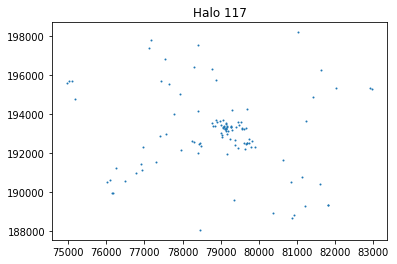

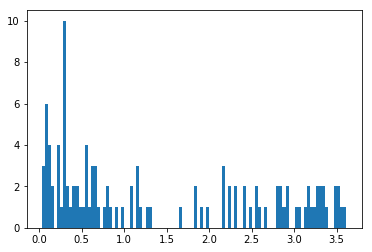

galaxies [3, 3, 3, 2, 1, 2, 5, 10, 3, 4, 7, 5, 4, 4, 6, 0, 5, 9, 12, 20]
blue galaxies counted [1, 0, 1, 0, 0, 1, 0, 4, 2, 3, 4, 5, 3, 2, 5, 0, 3, 9, 12, 17]
red galaxies counted [1, 1, 1, 0, 0, 1, 0, 3, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 3]
red galaxies counted [1, 2, 1, 2, 1, 0, 5, 3, 1, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0]
sum of galaxies: 108

Halo: 118
Halo Mass: 9247.675
N Subhalos from Illustris Algorithm: 803 125.07912969589233
R500c, R200c, R200m: 0.33114590559583384 0.5286454025872567 0.6554902381393282
before dev loop: 125.09357285499573
True
232118 232118 time 125.11560392379761
N Subhalos within 5*R200m: 124 125.19443774223328


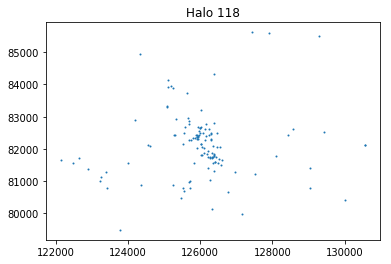

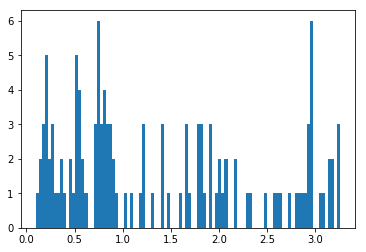

galaxies [0, 1, 0, 0, 5, 4, 3, 4, 3, 3, 10, 3, 16, 9, 5, 6, 9, 14, 6, 23]
blue galaxies counted [0, 0, 0, 0, 2, 2, 0, 2, 1, 1, 5, 2, 10, 4, 3, 3, 6, 11, 5, 20]
red galaxies counted [0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2]
red galaxies counted [0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 3, 1, 5, 4, 1, 1, 2, 2, 0, 1]
sum of galaxies: 124

Halo: 119
Halo Mass: 9019.702
N Subhalos from Illustris Algorithm: 565 125.74421787261963
R500c, R200c, R200m: 0.40419819029530507 0.5932503179544054 0.7243439697995069
before dev loop: 125.75224709510803
True
232118 232118 time 125.78327775001526
N Subhalos within 5*R200m: 105 125.83062076568604


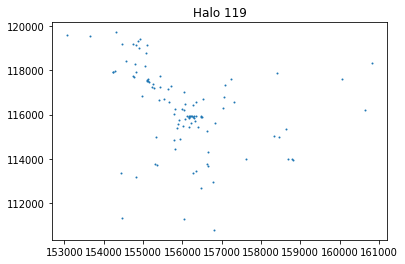

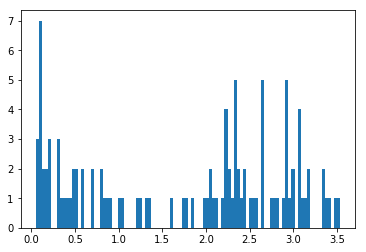

galaxies [2, 3, 4, 1, 2, 3, 0, 4, 2, 5, 2, 2, 5, 2, 4, 1, 5, 22, 18, 16]
blue galaxies counted [0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 3, 16, 14, 14]
red galaxies counted [2, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 4, 2]
red galaxies counted [0, 3, 3, 0, 1, 0, 0, 3, 1, 2, 0, 1, 4, 1, 2, 0, 1, 4, 0, 0]
sum of galaxies: 103

Halo: 120
Halo Mass: 9170.191
N Subhalos from Illustris Algorithm: 670 126.5811038017273
R500c, R200c, R200m: 0.37584631225902837 0.5920391556960873 0.7339435906949068
before dev loop: 126.59777879714966
True
232118 232118 time 126.63344311714172
N Subhalos within 5*R200m: 132 126.68102884292603


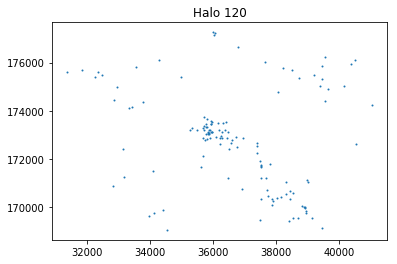

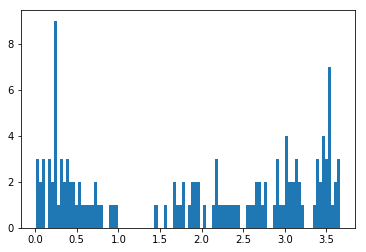

galaxies [2, 1, 1, 0, 3, 4, 8, 3, 5, 5, 4, 5, 2, 2, 0, 4, 12, 11, 17, 39]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 4, 10, 10, 13, 28]
red galaxies counted [1, 0, 0, 0, 0, 0, 3, 1, 1, 2, 1, 0, 0, 0, 0, 0, 2, 1, 1, 8]
red galaxies counted [1, 1, 1, 0, 3, 4, 4, 1, 4, 2, 3, 5, 2, 2, 0, 0, 0, 0, 3, 3]
sum of galaxies: 128

Halo: 121
Halo Mass: 9259.929
N Subhalos from Illustris Algorithm: 824 127.30868101119995
R500c, R200c, R200m: 0.3034331375417668 0.4711724645998827 0.601254726099171
before dev loop: 127.3191077709198
True
232118 232118 time 127.34463477134705
N Subhalos within 5*R200m: 73 127.39822387695312


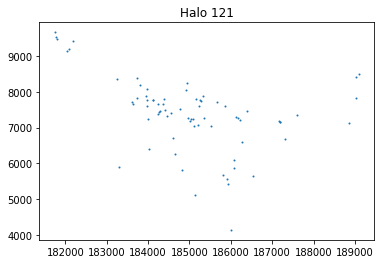

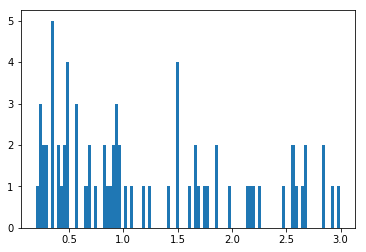

galaxies [0, 0, 0, 0, 0, 0, 3, 4, 2, 6, 7, 3, 4, 7, 6, 2, 8, 6, 4, 11]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 1, 0, 4, 4, 1, 5, 5, 3, 8]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2]
red galaxies counted [0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 4, 1, 4, 1, 1, 1, 1, 0, 0, 1]
sum of galaxies: 73

Halo: 122
Halo Mass: 9256.363
N Subhalos from Illustris Algorithm: 639 127.96075296401978
R500c, R200c, R200m: 0.34896570031183993 0.5320360403799955 0.6717327755561545
before dev loop: 127.96810793876648
True
232118 232118 time 127.99737596511841
N Subhalos within 5*R200m: 146 128.06140089035034


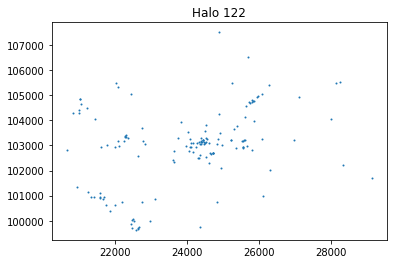

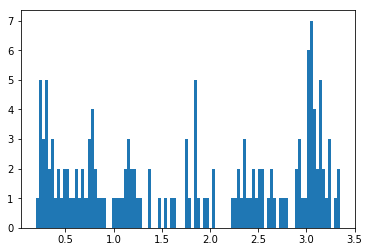

galaxies [0, 0, 0, 0, 0, 1, 6, 7, 5, 4, 5, 6, 11, 3, 13, 4, 12, 7, 21, 41]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 6, 0, 6, 1, 6, 5, 19, 30]
red galaxies counted [0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 1, 2, 2, 2, 1, 2, 8]
red galaxies counted [0, 0, 0, 0, 0, 0, 4, 5, 4, 2, 2, 5, 5, 2, 5, 1, 4, 1, 0, 3]
sum of galaxies: 146

Halo: 123
Halo Mass: 9079.802
N Subhalos from Illustris Algorithm: 753 128.6364107131958
R500c, R200c, R200m: 0.3533611227659105 0.5591400045315655 0.715194416206788
before dev loop: 128.64648294448853
True
232118 232118 time 128.67103099822998
N Subhalos within 5*R200m: 100 128.6966109275818


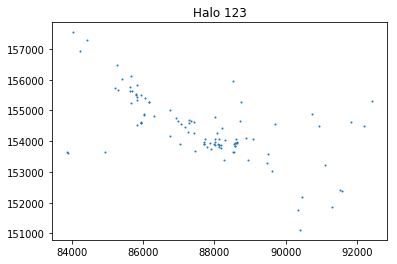

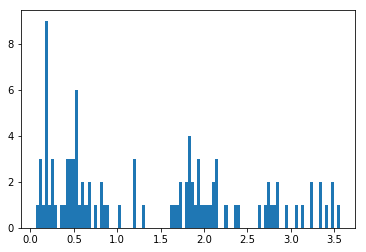

galaxies [0, 1, 2, 1, 7, 2, 4, 1, 2, 7, 10, 5, 4, 1, 4, 1, 17, 11, 8, 11]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 3, 0, 3, 1, 17, 9, 6, 9]
red galaxies counted [0, 0, 1, 0, 3, 1, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 2, 1, 2]
red galaxies counted [0, 1, 1, 1, 4, 1, 4, 0, 1, 6, 6, 3, 1, 1, 0, 0, 0, 0, 1, 0]
sum of galaxies: 99

Halo: 124
Halo Mass: 9097.682
N Subhalos from Illustris Algorithm: 812 129.23004794120789
R500c, R200c, R200m: 0.34309460797902663 0.5356989124422801 0.6703758878947268
before dev loop: 129.25367283821106
True
232118 232118 time 129.27945494651794
N Subhalos within 5*R200m: 145 129.31204199790955


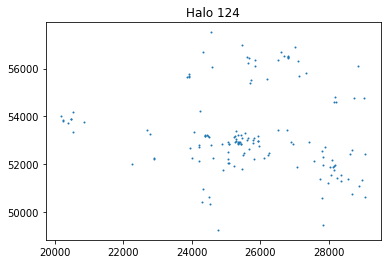

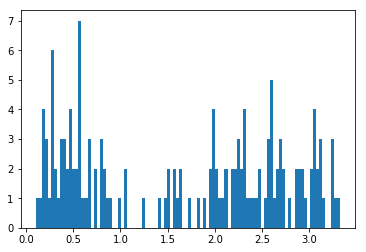

galaxies [0, 0, 1, 1, 2, 3, 3, 7, 5, 6, 12, 7, 7, 3, 3, 4, 7, 20, 29, 25]
blue galaxies counted [0, 0, 1, 0, 0, 0, 0, 2, 2, 4, 3, 2, 4, 2, 2, 4, 6, 13, 21, 18]
red galaxies counted [0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 3, 2, 0, 0, 0, 0, 1, 3, 5, 1]
red galaxies counted [0, 0, 0, 1, 2, 2, 2, 4, 1, 2, 6, 3, 3, 1, 1, 0, 0, 4, 3, 6]
sum of galaxies: 145

Halo: 125
Halo Mass: 8816.612
N Subhalos from Illustris Algorithm: 759 129.97303700447083
R500c, R200c, R200m: 0.313551705013488 0.5164751695672211 0.6795703201074692
before dev loop: 129.99293494224548
True
232118 232118 time 130.0174059867859
N Subhalos within 5*R200m: 104 130.05041694641113


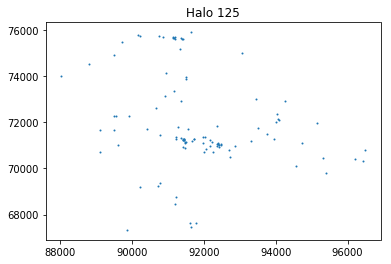

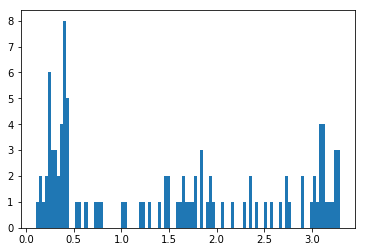

galaxies [0, 0, 1, 0, 3, 1, 7, 6, 6, 13, 2, 1, 3, 2, 2, 6, 12, 7, 9, 23]
blue galaxies counted [0, 0, 1, 0, 1, 0, 4, 1, 1, 9, 2, 1, 3, 2, 1, 5, 12, 6, 8, 17]
red galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 3]
red galaxies counted [0, 0, 0, 0, 1, 1, 2, 4, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]
sum of galaxies: 104

Halo: 126
Halo Mass: 8850.5205
N Subhalos from Illustris Algorithm: 574 130.7630536556244
R500c, R200c, R200m: 0.36687895545464805 0.5603562911996633 0.6950211362133347
before dev loop: 130.7811188697815
True
232118 232118 time 130.80944991111755
N Subhalos within 5*R200m: 91 130.86559987068176


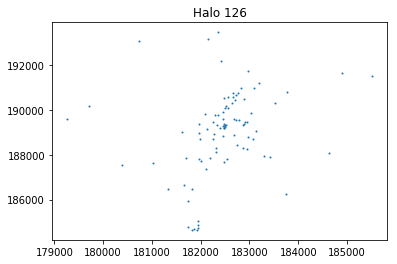

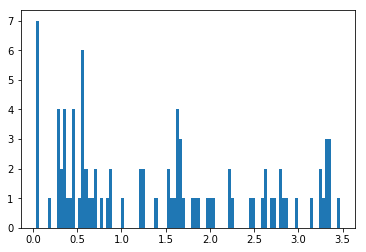

galaxies [0, 0, 0, 0, 0, 1, 0, 5, 6, 5, 9, 4, 4, 1, 4, 4, 12, 6, 10, 13]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 0, 3, 3, 6, 6, 9, 10]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 1, 0, 1, 0, 3, 0, 1, 0]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 2, 5, 3, 5, 3, 2, 1, 0, 1, 3, 0, 0, 3]
sum of galaxies: 84

Halo: 127
Halo Mass: 8859.751
N Subhalos from Illustris Algorithm: 780 131.69227290153503
R500c, R200c, R200m: 0.4007061452371604 0.6033504895957065 0.7303991005054232
before dev loop: 131.7120440006256
True
232118 232118 time 131.75370979309082
N Subhalos within 5*R200m: 142 131.796945810318


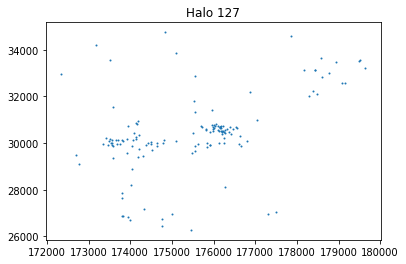

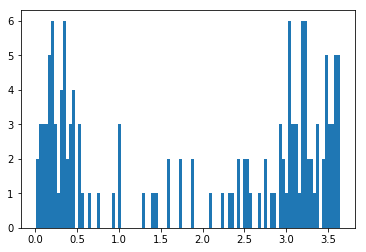

galaxies [1, 1, 2, 3, 5, 7, 2, 6, 8, 6, 3, 2, 0, 4, 1, 4, 4, 6, 16, 56]
blue galaxies counted [0, 0, 1, 0, 0, 2, 0, 2, 4, 1, 0, 2, 0, 4, 1, 4, 4, 6, 9, 20]
red galaxies counted [1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 8]
red galaxies counted [0, 1, 1, 3, 3, 4, 2, 4, 4, 4, 2, 0, 0, 0, 0, 0, 0, 0, 4, 28]
sum of galaxies: 137

Halo: 128
Halo Mass: 8926.37
N Subhalos from Illustris Algorithm: 792 132.3419258594513
R500c, R200c, R200m: 0.34657992724933545 0.5474611944025112 0.6935963100878747
before dev loop: 132.3500998020172
True
232118 232118 time 132.3784110546112
N Subhalos within 5*R200m: 97 132.42212510108948


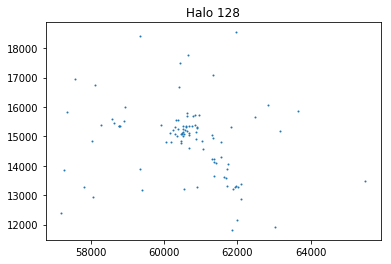

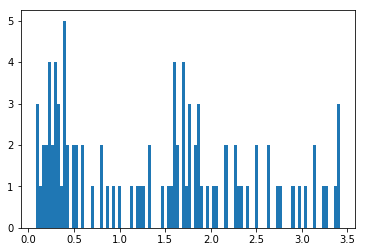

galaxies [1, 0, 2, 2, 1, 4, 3, 6, 6, 5, 4, 2, 3, 2, 4, 6, 19, 9, 7, 11]
blue galaxies counted [1, 0, 2, 1, 0, 0, 2, 2, 3, 4, 2, 1, 1, 1, 4, 5, 12, 9, 6, 9]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 3, 0, 1, 2]
red galaxies counted [0, 0, 0, 1, 1, 4, 0, 3, 1, 0, 1, 0, 1, 0, 0, 0, 4, 0, 0, 0]
sum of galaxies: 97

Halo: 129
Halo Mass: 8689.507
N Subhalos from Illustris Algorithm: 649 132.93734979629517
R500c, R200c, R200m: 0.3661112948489809 0.5652430564758122 0.6996918755897089
before dev loop: 132.9430639743805
True
232118 232118 time 132.97640585899353
N Subhalos within 5*R200m: 140 133.01286387443542


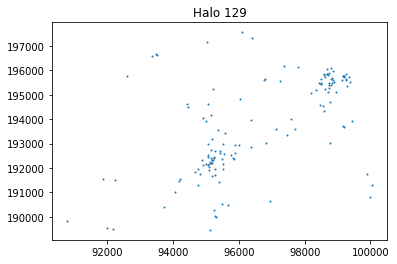

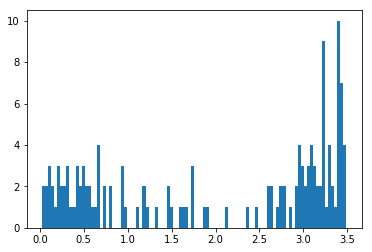

galaxies [2, 2, 1, 1, 2, 3, 3, 4, 2, 7, 6, 5, 4, 4, 5, 4, 7, 1, 12, 63]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 2, 3, 1, 4, 3, 7, 1, 10, 32]
red galaxies counted [1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0, 1, 15]
red galaxies counted [1, 1, 0, 1, 2, 3, 2, 3, 0, 3, 2, 1, 1, 2, 0, 1, 0, 0, 1, 16]
sum of galaxies: 138

Halo: 130
Halo Mass: 8864.545
N Subhalos from Illustris Algorithm: 724 133.54766583442688
R500c, R200c, R200m: 0.32361224254789944 0.5001646536519112 0.6144767842609375
before dev loop: 133.57490587234497
True
232118 232118 time 133.59917283058167
N Subhalos within 5*R200m: 99 133.66584300994873


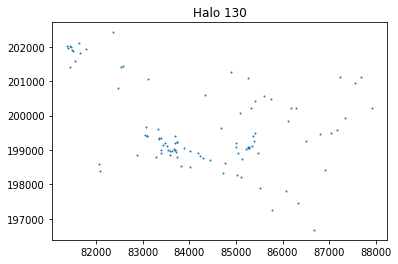

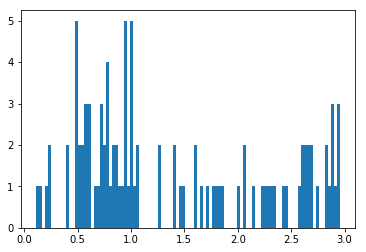

galaxies [0, 0, 1, 0, 1, 0, 2, 1, 0, 2, 7, 8, 11, 9, 12, 3, 6, 8, 8, 20]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 5, 1, 4, 2, 5, 8, 8, 19]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 3, 2, 1, 0, 0, 0, 1]
red galaxies counted [0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 3, 5, 4, 5, 6, 0, 1, 0, 0, 0]
sum of galaxies: 99

Halo: 131
Halo Mass: 8610.865
N Subhalos from Illustris Algorithm: 620 134.26122975349426
R500c, R200c, R200m: 0.3800983313081706 0.5802232676054265 0.7170685890148039
before dev loop: 134.29028987884521
True
232118 232118 time 134.3131458759308
N Subhalos within 5*R200m: 96 134.36060190200806


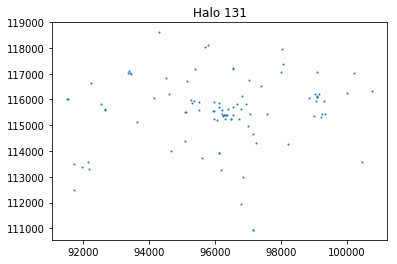

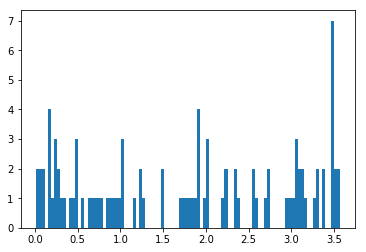

galaxies [2, 0, 1, 0, 4, 1, 5, 1, 2, 4, 1, 4, 3, 6, 4, 2, 11, 9, 6, 27]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 3, 2, 2, 8, 7, 5, 24]
red galaxies counted [0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 3]
red galaxies counted [2, 0, 0, 0, 3, 1, 3, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 1, 0, 0]
sum of galaxies: 93

Halo: 132
Halo Mass: 8506.837
N Subhalos from Illustris Algorithm: 660 134.926687002182
R500c, R200c, R200m: 0.3534979605208085 0.5626716036276971 0.7080698051660715
before dev loop: 134.93596601486206
True
232118 232118 time 134.9635488986969
N Subhalos within 5*R200m: 132 134.99991989135742


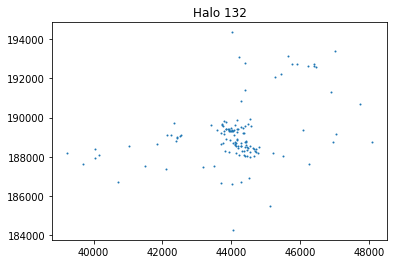

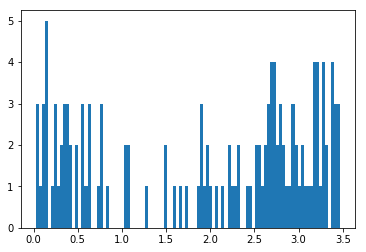

galaxies [1, 2, 1, 5, 0, 1, 3, 3, 7, 3, 4, 4, 4, 4, 1, 3, 7, 11, 29, 36]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 3, 2, 4, 1, 3, 7, 6, 15, 24]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 3, 6, 7]
red galaxies counted [1, 2, 1, 5, 0, 1, 3, 2, 3, 2, 2, 1, 1, 0, 0, 0, 0, 2, 8, 5]
sum of galaxies: 129

Halo: 133
Halo Mass: 8327.565
N Subhalos from Illustris Algorithm: 503 135.53980898857117
R500c, R200c, R200m: 0.37210877594487585 0.5734904737405987 0.7015678099135865
before dev loop: 135.54545783996582
True
232118 232118 time 135.5753538608551
N Subhalos within 5*R200m: 105 135.60017681121826


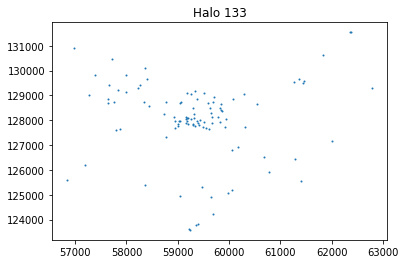

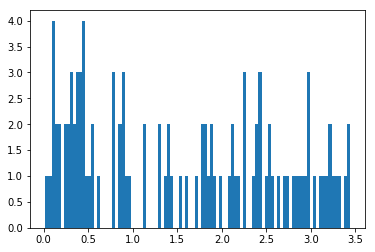

galaxies [0, 2, 2, 2, 2, 1, 2, 4, 6, 7, 3, 1, 7, 3, 4, 5, 10, 10, 15, 17]
blue galaxies counted [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 5, 10, 9, 12, 11]
red galaxies counted [0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 1, 3, 2]
red galaxies counted [0, 2, 1, 2, 1, 1, 2, 3, 4, 5, 3, 1, 3, 1, 2, 0, 0, 0, 0, 4]
sum of galaxies: 103

Halo: 134
Halo Mass: 9039.415
N Subhalos from Illustris Algorithm: 875 136.33100080490112
R500c, R200c, R200m: 0.20959902917027928 0.35189406029421955 0.4597316592844237
before dev loop: 136.34369587898254
True
232118 232118 time 136.36717009544373
N Subhalos within 5*R200m: 76 136.3894498348236


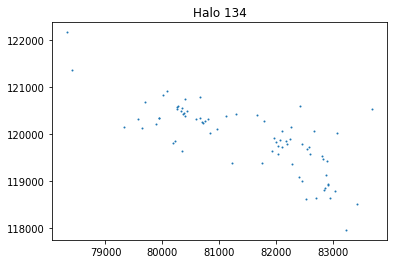

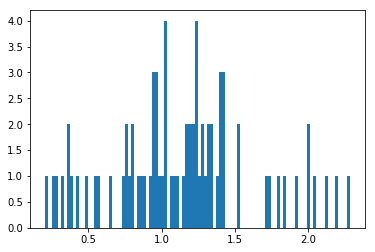

galaxies [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 4, 1, 3, 1, 8, 14, 15, 16, 4, 7]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 7, 8, 10, 10, 4, 6]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 3, 2, 1, 0, 1]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 3, 3, 5, 0, 0]
sum of galaxies: 76

Halo: 135
Halo Mass: 8747.786
N Subhalos from Illustris Algorithm: 812 136.92810702323914
R500c, R200c, R200m: 0.39101192293309345 0.589699101977086 0.7159501065114855
before dev loop: 136.93469285964966
True
232118 232118 time 136.96404671669006
N Subhalos within 5*R200m: 151 136.99510502815247


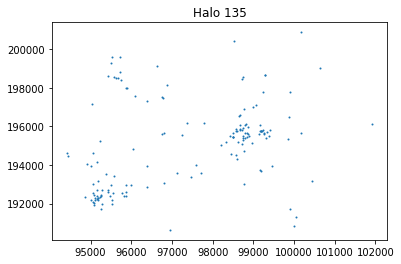

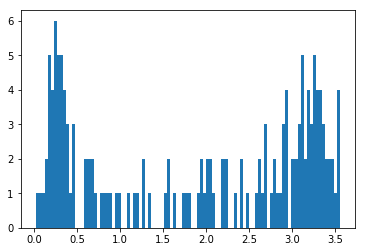

galaxies [0, 0, 1, 2, 4, 5, 9, 7, 7, 4, 2, 5, 4, 3, 5, 4, 7, 12, 19, 49]
blue galaxies counted [0, 0, 1, 0, 2, 1, 1, 2, 4, 2, 2, 3, 4, 2, 4, 4, 6, 10, 12, 23]
red galaxies counted [0, 0, 0, 1, 1, 1, 2, 3, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 4, 6]
red galaxies counted [0, 0, 0, 1, 1, 3, 6, 2, 2, 2, 0, 2, 0, 1, 0, 0, 1, 1, 3, 20]
sum of galaxies: 149

Halo: 136
Halo Mass: 8715.005
N Subhalos from Illustris Algorithm: 669 137.55939292907715
R500c, R200c, R200m: 0.3718167646563368 0.5763609038717971 0.715964038500574
before dev loop: 137.57115006446838
True
232118 232118 time 137.6014211177826
N Subhalos within 5*R200m: 140 137.62712597846985


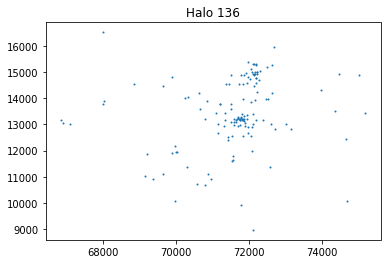

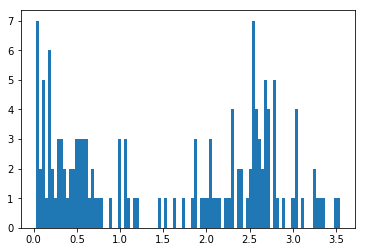

galaxies [2, 0, 5, 1, 6, 2, 2, 5, 3, 7, 8, 6, 2, 7, 2, 3, 7, 17, 35, 13]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 2, 3, 3, 0, 0, 3, 1, 3, 7, 11, 11, 10]
red galaxies counted [1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 3, 8, 2]
red galaxies counted [1, 0, 5, 1, 4, 2, 0, 5, 1, 4, 5, 5, 0, 2, 1, 0, 0, 3, 16, 1]
sum of galaxies: 133

Halo: 137
Halo Mass: 8702.109
N Subhalos from Illustris Algorithm: 666 138.16958689689636
R500c, R200c, R200m: 0.40050092863926473 0.5958553597072482 0.7231846521557567
before dev loop: 138.17544293403625
True
232118 232118 time 138.20063376426697
N Subhalos within 5*R200m: 73 138.22555899620056


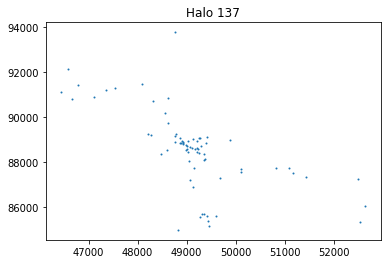

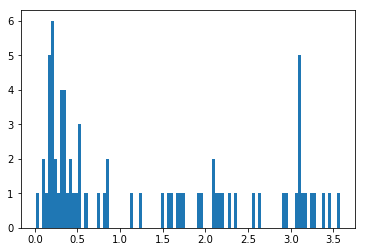

galaxies [0, 1, 1, 2, 4, 7, 2, 5, 5, 3, 4, 1, 3, 0, 2, 3, 5, 7, 4, 13]
blue galaxies counted [0, 0, 0, 1, 0, 1, 2, 2, 2, 1, 2, 0, 3, 0, 2, 3, 5, 4, 3, 12]
red galaxies counted [0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1]
red galaxies counted [0, 0, 1, 0, 2, 5, 0, 3, 3, 2, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0]
sum of galaxies: 72

Halo: 138
Halo Mass: 8484.707
N Subhalos from Illustris Algorithm: 536 138.7940309047699
R500c, R200c, R200m: 0.35872738066652227 0.5530849939290035 0.7087427842941688
before dev loop: 138.79992175102234
True
232118 232118 time 138.83367490768433
N Subhalos within 5*R200m: 128 138.86233186721802


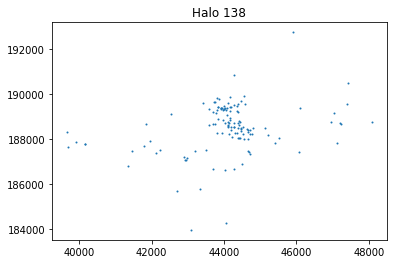

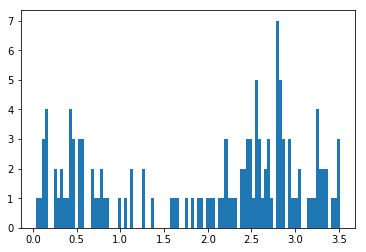

galaxies [1, 0, 2, 2, 3, 0, 2, 3, 2, 7, 6, 4, 4, 2, 4, 2, 6, 13, 39, 25]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 3, 3, 2, 2, 4, 1, 5, 9, 18, 18]
red galaxies counted [0, 0, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 2, 3]
red galaxies counted [1, 0, 1, 0, 3, 0, 2, 2, 0, 3, 2, 0, 1, 0, 0, 0, 0, 3, 19, 4]
sum of galaxies: 127

Halo: 139
Halo Mass: 8893.031
N Subhalos from Illustris Algorithm: 926 139.40072393417358
R500c, R200c, R200m: 0.2630793913708331 0.4094901042196601 0.5141267886823278
before dev loop: 139.40683889389038
True
232118 232118 time 139.43046402931213
N Subhalos within 5*R200m: 113 139.46703481674194


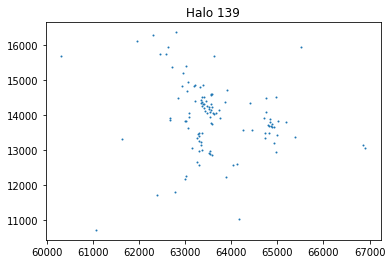

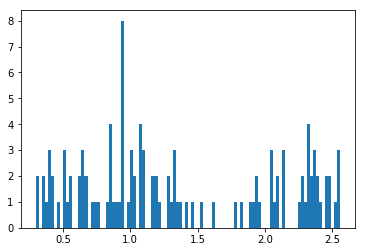

galaxies [0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 6, 4, 8, 5, 16, 14, 13, 3, 13, 27]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 5, 2, 12, 13, 9, 1, 10, 14]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 0, 2, 1, 1, 5]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 1, 2, 3, 1, 2, 1, 2, 8]
sum of galaxies: 113

Halo: 140
Halo Mass: 8741.43
N Subhalos from Illustris Algorithm: 759 140.0271599292755
R500c, R200c, R200m: 0.34085379966505525 0.5692274452173204 0.7142596117665102
before dev loop: 140.03335189819336
True
232118 232118 time 140.05920386314392
N Subhalos within 5*R200m: 117 140.09322905540466


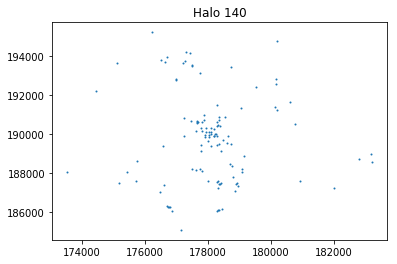

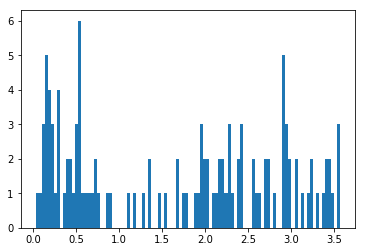

galaxies [0, 1, 2, 4, 4, 3, 3, 4, 3, 5, 8, 5, 3, 0, 3, 4, 11, 15, 19, 19]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 3, 1, 0, 0, 3, 4, 9, 12, 14, 15]
red galaxies counted [0, 0, 0, 2, 0, 0, 0, 2, 1, 2, 1, 2, 0, 0, 0, 0, 2, 3, 5, 3]
red galaxies counted [0, 1, 2, 2, 4, 2, 3, 1, 0, 2, 4, 2, 3, 0, 0, 0, 0, 0, 0, 1]
sum of galaxies: 116

Halo: 141
Halo Mass: 8617.786
N Subhalos from Illustris Algorithm: 608 140.79418897628784
R500c, R200c, R200m: 0.3631599951259469 0.5389215256424773 0.665320577578168
before dev loop: 140.80873894691467
True
232118 232118 time 140.83047199249268
N Subhalos within 5*R200m: 78 140.86573386192322


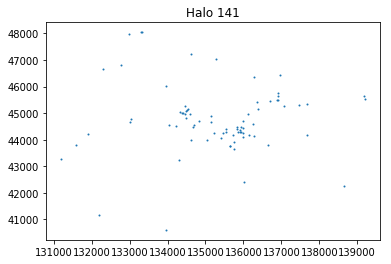

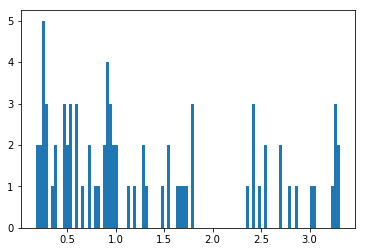

galaxies [0, 0, 0, 0, 1, 1, 7, 3, 3, 1, 7, 4, 4, 13, 2, 4, 9, 0, 9, 10]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 5, 2, 3, 2, 2, 3, 5, 0, 9, 7]
red galaxies counted [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 4, 0, 1, 4, 0, 0, 1]
red galaxies counted [0, 0, 0, 0, 1, 0, 6, 2, 3, 0, 2, 1, 1, 7, 0, 0, 0, 0, 0, 2]
sum of galaxies: 78

Halo: 142
Halo Mass: 8431.642
N Subhalos from Illustris Algorithm: 615 141.39624691009521
R500c, R200c, R200m: 0.37202514397589337 0.5725292065279429 0.7086753662780049
before dev loop: 141.40246772766113
True
232118 232118 time 141.4335618019104
N Subhalos within 5*R200m: 114 141.45764780044556


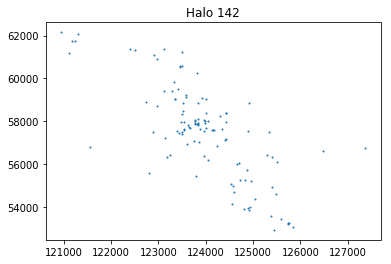

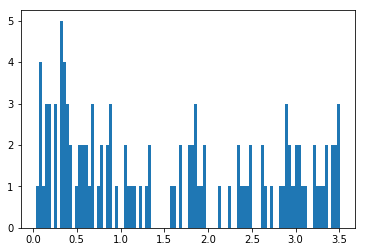

galaxies [0, 1, 1, 2, 3, 1, 3, 3, 9, 3, 4, 6, 8, 4, 5, 3, 12, 6, 12, 24]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 1, 3, 2, 1, 3, 4, 2, 4, 3, 9, 6, 10, 19]
red galaxies counted [0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 1, 1, 2, 1, 0, 0, 3, 0, 2, 1]
red galaxies counted [0, 1, 1, 0, 3, 1, 3, 1, 4, 0, 2, 2, 2, 1, 1, 0, 0, 0, 0, 4]
sum of galaxies: 110

Halo: 143
Halo Mass: 8346.669
N Subhalos from Illustris Algorithm: 612 142.0019109249115
R500c, R200c, R200m: 0.38814289400769414 0.5854102111982008 0.7205852952950131
before dev loop: 142.01661372184753
True
232118 232118 time 142.04354572296143
N Subhalos within 5*R200m: 122 142.07270789146423


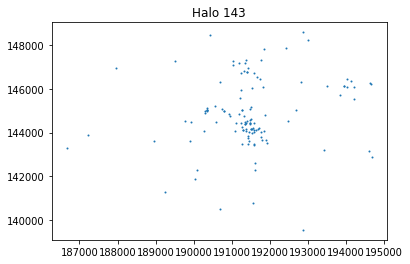

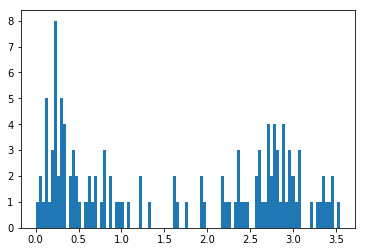

galaxies [1, 1, 2, 4, 3, 5, 5, 7, 4, 5, 3, 4, 6, 4, 3, 3, 4, 10, 30, 16]
blue galaxies counted [0, 0, 0, 0, 0, 2, 3, 0, 1, 3, 3, 0, 4, 2, 1, 3, 4, 8, 18, 13]
red galaxies counted [0, 1, 1, 2, 2, 0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 4, 1]
red galaxies counted [1, 0, 1, 2, 1, 3, 0, 7, 2, 2, 0, 3, 1, 2, 1, 0, 0, 1, 8, 2]
sum of galaxies: 120

Halo: 144
Halo Mass: 8499.036
N Subhalos from Illustris Algorithm: 620 142.6409788131714
R500c, R200c, R200m: 0.3314687434119538 0.5152220512038319 0.6360567147389136
before dev loop: 142.64651703834534
True
232118 232118 time 142.6764097213745
N Subhalos within 5*R200m: 64 142.7010498046875


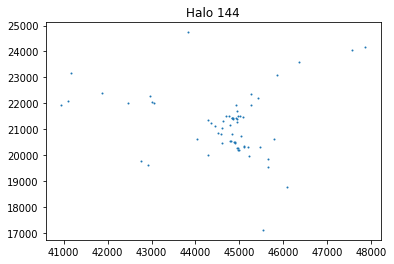

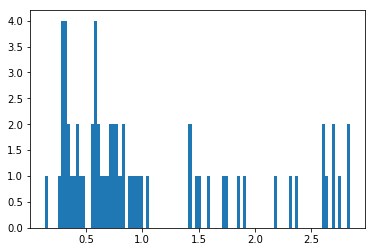

galaxies [0, 0, 0, 0, 1, 0, 0, 5, 7, 4, 1, 10, 8, 6, 2, 2, 5, 2, 4, 7]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 7, 1, 2, 2, 2, 5, 2, 4, 5]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 2]
red galaxies counted [0, 0, 0, 0, 1, 0, 0, 2, 5, 1, 0, 1, 5, 3, 0, 0, 0, 0, 0, 0]
sum of galaxies: 64

Halo: 145
Halo Mass: 8646.907
N Subhalos from Illustris Algorithm: 531 143.24010586738586
R500c, R200c, R200m: 0.3083741294823421 0.5314948947003709 0.6717699275270572
before dev loop: 143.24855971336365
True
232118 232118 time 143.27854204177856
N Subhalos within 5*R200m: 94 143.30244088172913


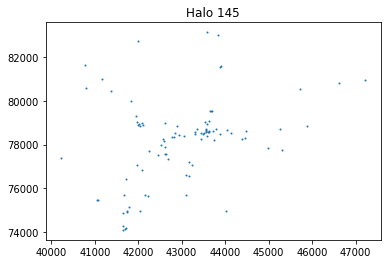

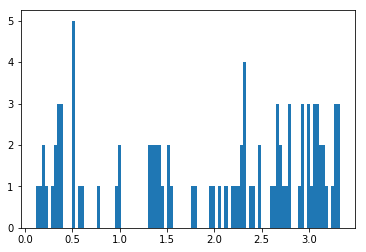

galaxies [0, 0, 1, 0, 1, 2, 1, 1, 6, 2, 5, 2, 1, 3, 0, 11, 3, 8, 17, 30]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 2, 1, 1, 0, 5, 3, 8, 13, 30]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 4, 0, 0, 0, 0, 3, 0, 0, 4, 0]
red galaxies counted [0, 0, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0]
sum of galaxies: 94

Halo: 146
Halo Mass: 8481.565
N Subhalos from Illustris Algorithm: 727 143.82635068893433
R500c, R200c, R200m: 0.355486231515325 0.5796645468016356 0.7114444692127003
before dev loop: 143.8319549560547
True
232118 232118 time 143.85755395889282
N Subhalos within 5*R200m: 149 143.88517093658447


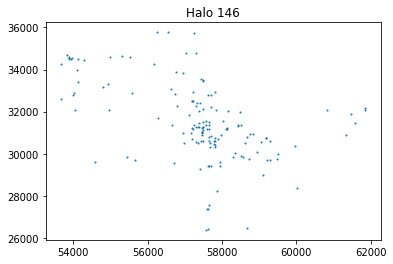

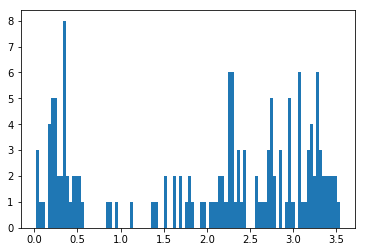

galaxies [1, 1, 0, 0, 4, 5, 6, 4, 9, 4, 4, 0, 2, 1, 1, 6, 8, 25, 22, 43]
blue galaxies counted [0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 2, 1, 1, 6, 5, 23, 21, 37]
red galaxies counted [1, 0, 0, 0, 1, 0, 3, 0, 2, 1, 1, 0, 0, 0, 0, 0, 3, 1, 1, 6]
red galaxies counted [0, 1, 0, 0, 2, 4, 3, 4, 5, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
sum of galaxies: 146

Halo: 147
Halo Mass: 8495.3
N Subhalos from Illustris Algorithm: 736 144.41179180145264
R500c, R200c, R200m: 0.23316514885129877 0.42072341097349336 0.573966443333338
before dev loop: 144.41756892204285
True
232118 232118 time 144.45227694511414
N Subhalos within 5*R200m: 101 144.4870457649231


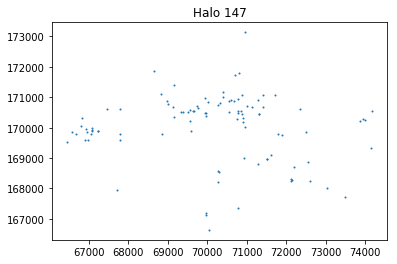

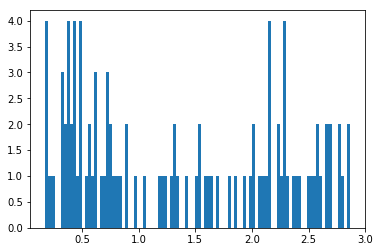

galaxies [0, 0, 0, 0, 0, 1, 4, 1, 3, 7, 9, 5, 5, 9, 3, 4, 8, 6, 18, 18]
blue galaxies counted [0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 3, 5, 3, 5, 3, 4, 7, 4, 11, 12]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 1, 4, 1, 0, 1, 2, 0, 0, 0, 0, 3, 2]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 5, 0, 1, 2, 0, 0, 1, 2, 4, 4]
sum of galaxies: 101

Halo: 148
Halo Mass: 8410.298
N Subhalos from Illustris Algorithm: 755 145.23191690444946
R500c, R200c, R200m: 0.3365799218054465 0.5395676416536827 0.6763263285102222
before dev loop: 145.24379897117615
True
232118 232118 time 145.27336978912354
N Subhalos within 5*R200m: 99 145.29445672035217


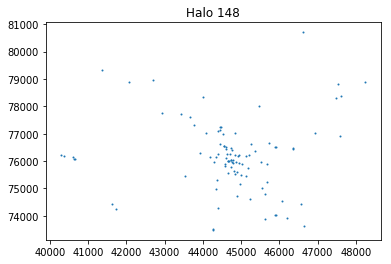

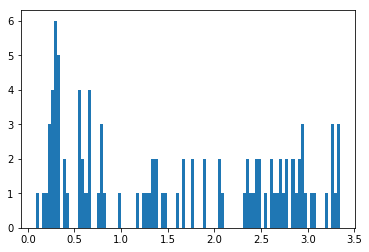

galaxies [0, 1, 0, 0, 0, 2, 6, 9, 4, 2, 5, 6, 5, 1, 3, 7, 5, 5, 19, 19]
blue galaxies counted [0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 1, 3, 4, 0, 1, 5, 5, 5, 17, 17]
red galaxies counted [0, 1, 0, 0, 0, 1, 2, 2, 2, 0, 1, 0, 0, 1, 0, 2, 0, 0, 2, 2]
red galaxies counted [0, 0, 0, 0, 0, 0, 2, 5, 2, 1, 3, 3, 1, 0, 2, 0, 0, 0, 0, 0]
sum of galaxies: 99

Halo: 149
Halo Mass: 8279.199
N Subhalos from Illustris Algorithm: 669 145.85129809379578
R500c, R200c, R200m: 0.3564033807625338 0.5670571776067224 0.7089757848013387
before dev loop: 145.8614478111267
True
232118 232118 time 145.88504791259766
N Subhalos within 5*R200m: 89 145.91152691841125


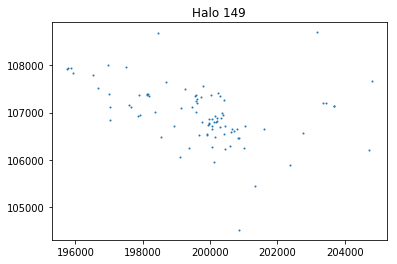

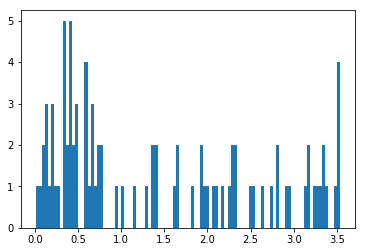

galaxies [0, 0, 2, 3, 1, 4, 0, 2, 6, 9, 5, 6, 3, 2, 2, 5, 5, 10, 6, 16]
blue galaxies counted [0, 0, 1, 0, 0, 2, 0, 0, 1, 2, 3, 2, 2, 2, 2, 4, 4, 6, 5, 16]
red galaxies counted [0, 0, 0, 2, 0, 1, 0, 0, 4, 0, 1, 0, 0, 0, 0, 1, 1, 2, 1, 0]
red galaxies counted [0, 0, 1, 1, 1, 1, 0, 2, 1, 7, 1, 4, 1, 0, 0, 0, 0, 2, 0, 0]
sum of galaxies: 87

Halo: 150
Halo Mass: 8197.111
N Subhalos from Illustris Algorithm: 712 146.4276978969574
R500c, R200c, R200m: 0.36818267736461163 0.5506671532709245 0.6832905615386152
before dev loop: 146.43493509292603
True
232118 232118 time 146.46626996994019
N Subhalos within 5*R200m: 77 146.4903438091278


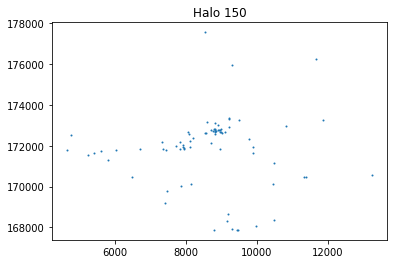

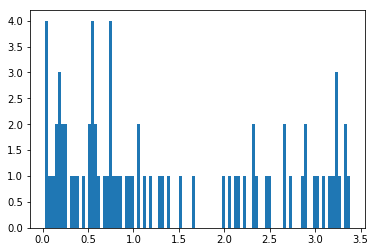

galaxies [1, 0, 1, 0, 3, 3, 3, 1, 2, 1, 7, 3, 8, 4, 3, 4, 1, 5, 8, 15]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 1, 2, 2, 3, 4, 1, 5, 8, 15]
red galaxies counted [0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 0, 0, 2, 2, 1, 1, 1, 1, 2, 2, 5, 2, 0, 0, 0, 0, 0, 0]
sum of galaxies: 73

Halo: 151
Halo Mass: 8536.564
N Subhalos from Illustris Algorithm: 750 147.0921869277954
R500c, R200c, R200m: 0.2833617852615874 0.45805337504712657 0.5768294270565753
before dev loop: 147.10117602348328
True
232118 232118 time 147.1269199848175
N Subhalos within 5*R200m: 62 147.14836883544922


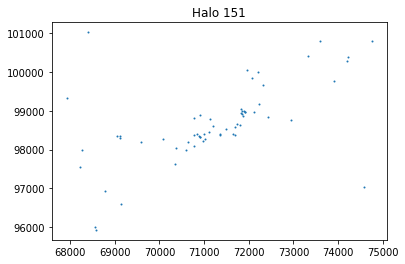

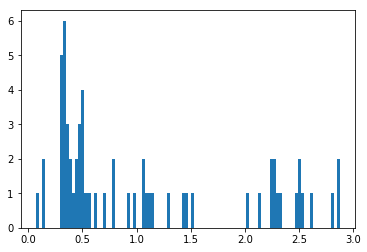

galaxies [1, 0, 0, 0, 2, 0, 0, 0, 10, 6, 6, 6, 2, 2, 4, 4, 3, 0, 8, 8]
blue galaxies counted [0, 0, 0, 0, 1, 0, 0, 0, 2, 3, 1, 1, 0, 1, 2, 3, 0, 0, 7, 7]
red galaxies counted [0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 0, 1, 1]
red galaxies counted [1, 0, 0, 0, 0, 0, 0, 0, 6, 2, 3, 4, 2, 1, 2, 1, 2, 0, 0, 0]
sum of galaxies: 62

Halo: 152
Halo Mass: 8128.882
N Subhalos from Illustris Algorithm: 566 147.73104000091553
R500c, R200c, R200m: 0.3697602349221769 0.5736313149406371 0.7048703318787857
before dev loop: 147.74306774139404
True
232118 232118 time 147.776624917984
N Subhalos within 5*R200m: 98 147.81219673156738


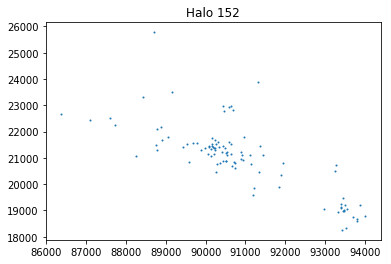

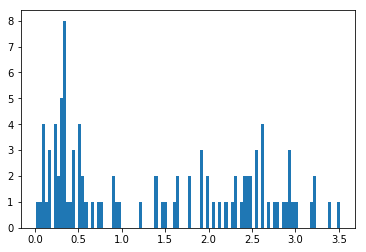

galaxies [0, 1, 3, 1, 3, 2, 2, 11, 5, 4, 7, 2, 1, 4, 1, 5, 7, 9, 17, 11]
blue galaxies counted [0, 0, 1, 0, 1, 0, 2, 5, 1, 2, 3, 0, 1, 2, 0, 5, 6, 5, 8, 6]
red galaxies counted [0, 0, 2, 1, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 2, 1, 0]
red galaxies counted [0, 1, 0, 0, 1, 0, 0, 5, 3, 1, 2, 2, 0, 2, 0, 0, 0, 2, 8, 5]
sum of galaxies: 96

Halo: 153
Halo Mass: 8169.5938
N Subhalos from Illustris Algorithm: 773 148.40218806266785
R500c, R200c, R200m: 0.29988005996245715 0.4897882042614727 0.6071339454256192
before dev loop: 148.4111397266388
True
232118 232118 time 148.43350076675415
N Subhalos within 5*R200m: 88 148.46888279914856


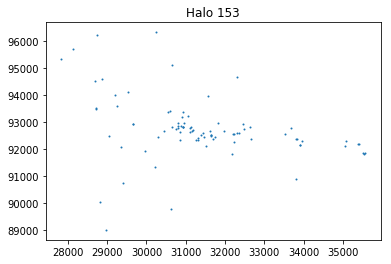

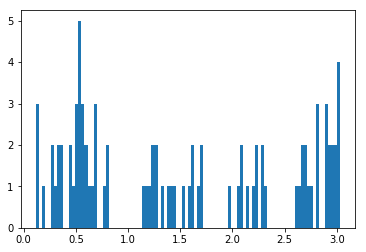

galaxies [0, 0, 0, 2, 1, 1, 0, 2, 4, 1, 6, 11, 4, 3, 0, 9, 7, 3, 10, 24]
blue galaxies counted [0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 2, 5, 2, 1, 0, 8, 5, 3, 9, 19]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 1, 2, 0, 1, 5]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 1, 3, 0, 2, 5, 2, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 88

Halo: 154
Halo Mass: 8177.6294
N Subhalos from Illustris Algorithm: 662 149.02272200584412
R500c, R200c, R200m: 0.3475424755644361 0.5690527348713943 0.7055134453061357
before dev loop: 149.03048086166382
True
232118 232118 time 149.05742692947388
N Subhalos within 5*R200m: 122 149.08145093917847


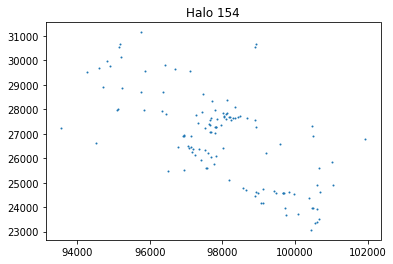

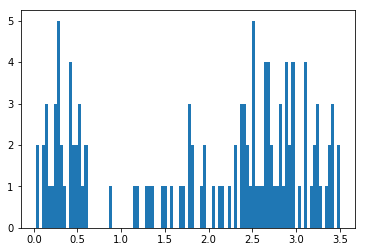

galaxies [0, 0, 2, 2, 2, 1, 4, 6, 2, 6, 6, 1, 1, 0, 3, 5, 9, 10, 32, 28]
blue galaxies counted [0, 0, 0, 0, 1, 0, 1, 2, 1, 3, 4, 1, 1, 0, 2, 4, 7, 8, 26, 21]
red galaxies counted [0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 2, 1, 4, 2]
red galaxies counted [0, 0, 0, 2, 1, 1, 3, 3, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 2, 5]
sum of galaxies: 120

Halo: 155
Halo Mass: 8149.402
N Subhalos from Illustris Algorithm: 772 149.83566904067993
R500c, R200c, R200m: 0.27335867714771467 0.5035693835715442 0.6768387694881904
before dev loop: 149.84591484069824
True
232118 232118 time 149.86975693702698
N Subhalos within 5*R200m: 156 149.9026689529419


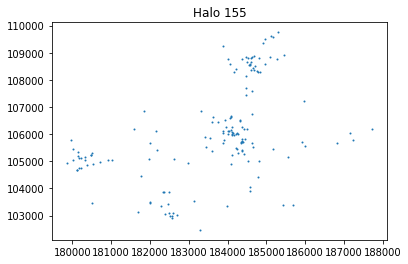

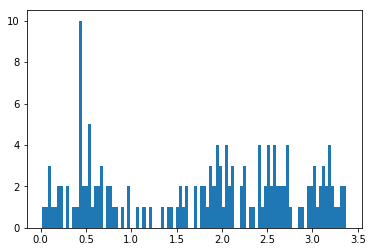

galaxies [0, 2, 1, 1, 1, 2, 2, 2, 1, 13, 8, 7, 6, 3, 3, 4, 15, 24, 30, 29]
blue galaxies counted [0, 1, 0, 0, 0, 1, 0, 1, 0, 5, 4, 5, 5, 2, 3, 3, 10, 18, 25, 17]
red galaxies counted [0, 0, 0, 1, 0, 0, 1, 0, 1, 3, 1, 1, 0, 1, 0, 1, 1, 2, 5, 5]
red galaxies counted [0, 1, 1, 0, 1, 1, 1, 1, 0, 5, 3, 1, 1, 0, 0, 0, 4, 4, 0, 7]
sum of galaxies: 154

Halo: 156
Halo Mass: 7945.6147
N Subhalos from Illustris Algorithm: 727 150.4822540283203
R500c, R200c, R200m: 0.3499973480900635 0.5359915242475901 0.6757679279820425
before dev loop: 150.48864889144897
True
232118 232118 time 150.5266330242157
N Subhalos within 5*R200m: 91 150.54976892471313


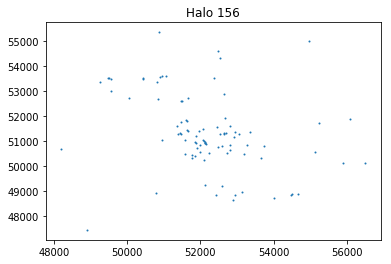

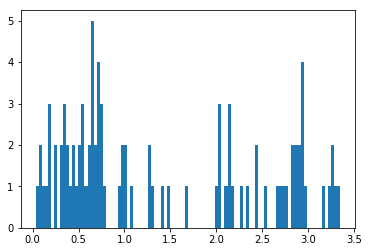

galaxies [1, 1, 1, 0, 2, 2, 2, 2, 5, 3, 7, 11, 6, 5, 2, 4, 1, 10, 8, 17]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 3, 7, 2, 2, 2, 3, 1, 7, 7, 15]
red galaxies counted [1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 0, 2, 1, 1]
red galaxies counted [0, 1, 1, 0, 2, 1, 2, 1, 4, 0, 3, 2, 4, 2, 0, 1, 0, 1, 0, 1]
sum of galaxies: 90

Halo: 157
Halo Mass: 8041.41
N Subhalos from Illustris Algorithm: 639 151.08055877685547
R500c, R200c, R200m: 0.3406907793789391 0.5433642688181072 0.6748474558753672
before dev loop: 151.1083948612213
True
232118 232118 time 151.1251277923584
N Subhalos within 5*R200m: 83 151.15511393547058


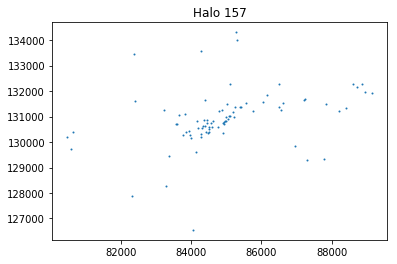

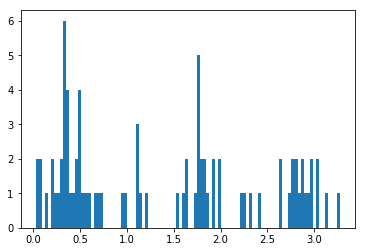

galaxies [0, 0, 0, 1, 0, 2, 2, 3, 9, 4, 6, 3, 1, 2, 5, 0, 14, 7, 7, 13]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 3, 3, 2, 1, 0, 0, 2, 4, 0, 10, 7, 6, 12]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 4, 0, 1, 1]
red galaxies counted [0, 0, 0, 1, 0, 2, 1, 0, 5, 2, 4, 2, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 79

Halo: 158
Halo Mass: 8053.81
N Subhalos from Illustris Algorithm: 703 151.67727208137512
R500c, R200c, R200m: 0.3107090988260152 0.4755271720168756 0.593834300497032
before dev loop: 151.68594098091125
True
232118 232118 time 151.71431708335876
N Subhalos within 5*R200m: 105 151.74331068992615


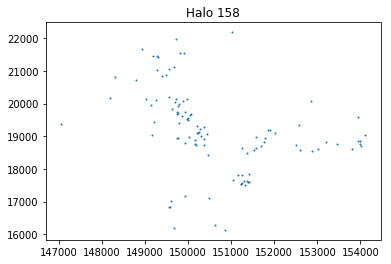

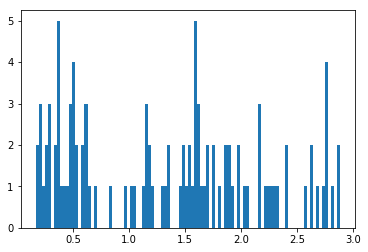

galaxies [0, 0, 0, 0, 0, 2, 3, 4, 4, 6, 8, 7, 3, 1, 3, 11, 15, 14, 12, 12]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 3, 3, 0, 0, 3, 11, 9, 10, 10, 8]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 0, 1, 0, 0, 2, 2, 2, 3]
red galaxies counted [0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 3, 3, 3, 0, 0, 0, 4, 2, 0, 1]
sum of galaxies: 105

Halo: 159
Halo Mass: 8084.0312
N Subhalos from Illustris Algorithm: 588 152.32150077819824
R500c, R200c, R200m: 0.3891170523137019 0.5873126082944562 0.706823292487164
before dev loop: 152.32831001281738
True
232118 232118 time 152.3561179637909
N Subhalos within 5*R200m: 88 152.38269782066345


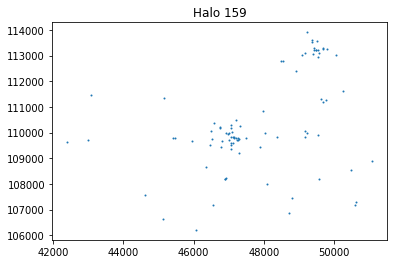

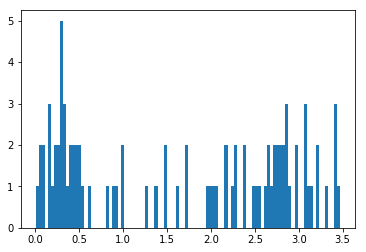

galaxies [1, 2, 0, 0, 3, 1, 4, 6, 4, 5, 4, 0, 2, 3, 1, 3, 3, 11, 18, 15]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 4, 1, 2, 3, 0, 2, 3, 1, 3, 2, 9, 11, 9]
red galaxies counted [0, 1, 0, 0, 1, 0, 3, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1]
red galaxies counted [1, 1, 0, 0, 2, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 5, 5]
sum of galaxies: 86

Halo: 160
Halo Mass: 7919.1826
N Subhalos from Illustris Algorithm: 555 152.9285318851471
R500c, R200c, R200m: 0.35579509730790504 0.5592189524697337 0.6984627378627105
before dev loop: 152.93435382843018
True
232118 232118 time 152.96696591377258
N Subhalos within 5*R200m: 105 152.99073004722595


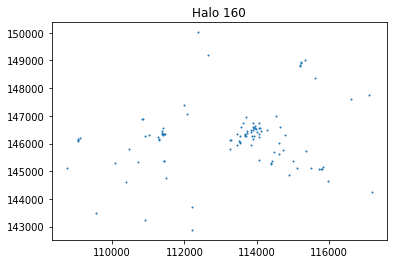

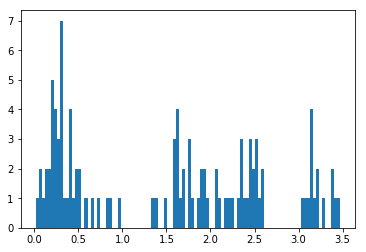

galaxies [2, 0, 1, 2, 1, 6, 6, 8, 2, 7, 3, 2, 2, 1, 0, 6, 15, 12, 13, 15]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 3, 2, 1, 0, 2, 2, 0, 0, 5, 14, 8, 8, 15]
red galaxies counted [1, 0, 0, 1, 0, 0, 3, 1, 0, 4, 2, 0, 0, 1, 0, 0, 1, 1, 4, 0]
red galaxies counted [1, 0, 1, 0, 1, 6, 3, 4, 0, 2, 1, 0, 0, 0, 0, 1, 0, 3, 1, 0]
sum of galaxies: 104

Halo: 161
Halo Mass: 8054.666
N Subhalos from Illustris Algorithm: 822 153.5127580165863
R500c, R200c, R200m: 0.3044565782574526 0.5034663348936309 0.6177706587846336
before dev loop: 153.52041792869568
True
232118 232118 time 153.55254197120667
N Subhalos within 5*R200m: 73 153.59192991256714


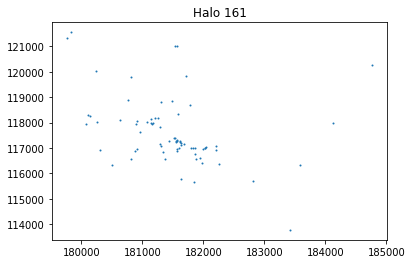

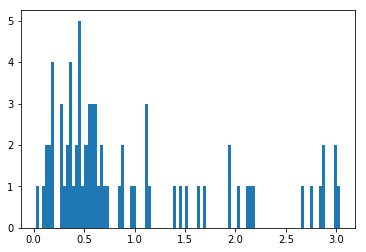

galaxies [0, 0, 1, 2, 1, 4, 1, 3, 4, 5, 9, 10, 4, 3, 6, 1, 4, 3, 3, 8]
blue galaxies counted [0, 0, 0, 2, 1, 3, 1, 0, 2, 3, 6, 5, 4, 3, 5, 0, 4, 3, 1, 6]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1]
red galaxies counted [0, 0, 1, 0, 0, 1, 0, 1, 2, 2, 2, 4, 0, 0, 0, 0, 0, 0, 0, 1]
sum of galaxies: 72

Halo: 162
Halo Mass: 7918.1523
N Subhalos from Illustris Algorithm: 662 154.4190866947174
R500c, R200c, R200m: 0.2918016080998203 0.5420416106126296 0.6729753648588245
before dev loop: 154.4312551021576
True
232118 232118 time 154.45407104492188
N Subhalos within 5*R200m: 107 154.4862756729126


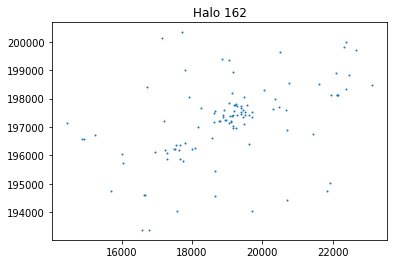

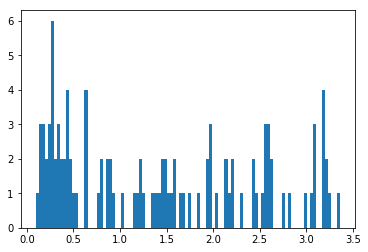

galaxies [0, 1, 0, 2, 2, 3, 4, 7, 6, 7, 3, 4, 3, 6, 5, 8, 7, 11, 14, 14]
blue galaxies counted [0, 0, 0, 1, 0, 0, 1, 3, 4, 1, 0, 2, 2, 3, 5, 4, 4, 9, 11, 12]
red galaxies counted [0, 0, 0, 1, 1, 3, 1, 1, 0, 1, 1, 0, 1, 1, 0, 3, 0, 1, 3, 1]
red galaxies counted [0, 1, 0, 0, 1, 0, 2, 3, 2, 5, 2, 2, 0, 2, 0, 1, 3, 1, 0, 1]
sum of galaxies: 107

Halo: 163
Halo Mass: 7904.2363
N Subhalos from Illustris Algorithm: 617 155.02437090873718
R500c, R200c, R200m: 0.36695089736382064 0.559705210916484 0.6892209448939575
before dev loop: 155.03332686424255
True
232118 232118 time 155.06200289726257
N Subhalos within 5*R200m: 95 155.09583282470703


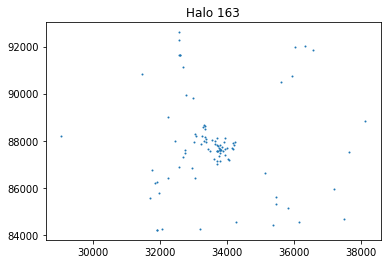

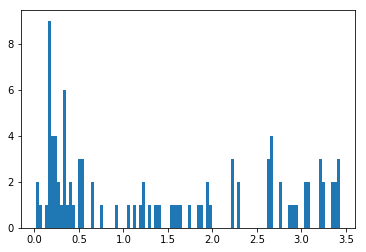

galaxies [1, 0, 0, 1, 8, 5, 6, 3, 5, 3, 6, 2, 1, 2, 4, 5, 5, 8, 9, 19]
blue galaxies counted [0, 0, 0, 1, 2, 3, 3, 1, 3, 0, 0, 1, 1, 2, 4, 4, 5, 8, 7, 15]
red galaxies counted [0, 0, 0, 0, 3, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 4]
red galaxies counted [1, 0, 0, 0, 3, 1, 2, 2, 1, 3, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 93

Halo: 164
Halo Mass: 7866.6455
N Subhalos from Illustris Algorithm: 695 155.63421273231506
R500c, R200c, R200m: 0.3497964952473708 0.5679393767778557 0.702229419257485
before dev loop: 155.64155077934265
True
232118 232118 time 155.67790699005127
N Subhalos within 5*R200m: 170 155.70482206344604


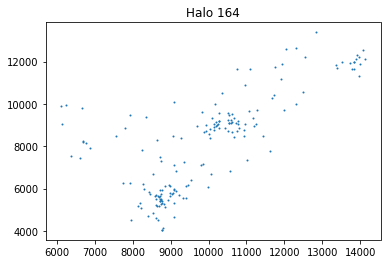

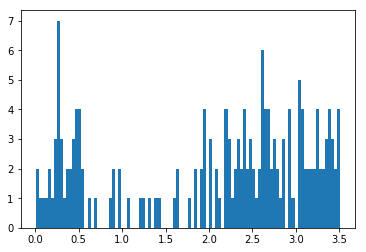

galaxies [0, 1, 0, 1, 2, 2, 4, 9, 4, 7, 6, 2, 2, 4, 2, 3, 10, 21, 41, 46]
blue galaxies counted [0, 0, 0, 0, 1, 0, 0, 3, 0, 1, 4, 1, 1, 4, 2, 3, 9, 15, 13, 21]
red galaxies counted [0, 1, 0, 0, 0, 0, 1, 2, 2, 2, 0, 1, 0, 0, 0, 0, 1, 2, 13, 10]
red galaxies counted [0, 0, 0, 1, 1, 2, 3, 4, 2, 4, 2, 0, 1, 0, 0, 0, 0, 4, 15, 15]
sum of galaxies: 167

Halo: 165
Halo Mass: 7690.5957
N Subhalos from Illustris Algorithm: 709 156.28225469589233
R500c, R200c, R200m: 0.27344559194171225 0.4430576305503677 0.5719358158892364
before dev loop: 156.29453372955322
True
232118 232118 time 156.31986689567566
N Subhalos within 5*R200m: 101 156.34739184379578


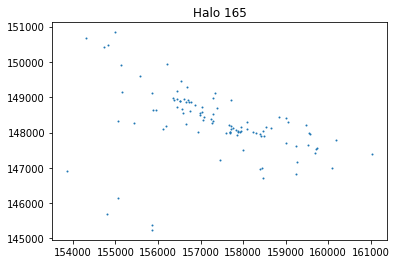

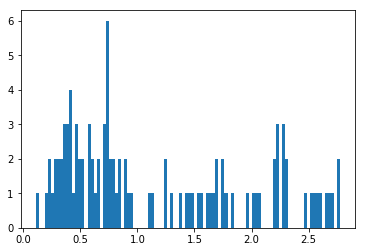

galaxies [0, 0, 0, 1, 0, 0, 1, 3, 4, 8, 8, 7, 9, 12, 4, 5, 6, 9, 14, 10]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2, 4, 8, 3, 5, 6, 6, 14, 9]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 2, 0, 0, 0, 2, 0, 1]
red galaxies counted [0, 0, 0, 1, 0, 0, 0, 1, 2, 6, 5, 5, 4, 2, 1, 0, 0, 1, 0, 0]
sum of galaxies: 101

Halo: 166
Halo Mass: 7621.157
N Subhalos from Illustris Algorithm: 633 156.90665078163147
R500c, R200c, R200m: 0.34932849251046083 0.5405197009425156 0.6716175163705631
before dev loop: 156.91237497329712
True
232118 232118 time 156.94682788848877
N Subhalos within 5*R200m: 126 156.98440074920654


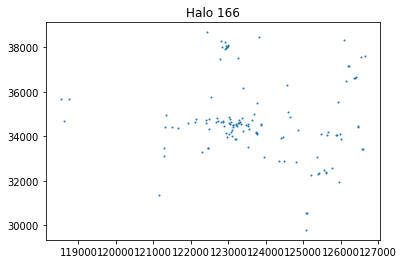

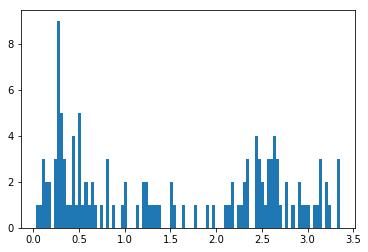

galaxies [1, 1, 2, 1, 2, 1, 3, 13, 5, 6, 7, 5, 4, 4, 6, 6, 2, 8, 29, 19]
blue galaxies counted [0, 0, 0, 0, 0, 1, 1, 4, 1, 1, 4, 5, 2, 4, 6, 6, 2, 8, 24, 13]
red galaxies counted [1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 4]
red galaxies counted [0, 1, 2, 1, 2, 0, 1, 7, 3, 5, 1, 0, 2, 0, 0, 0, 0, 0, 2, 2]
sum of galaxies: 125

Halo: 167
Halo Mass: 7800.9062
N Subhalos from Illustris Algorithm: 682 157.5345537662506
R500c, R200c, R200m: 0.30861151376194074 0.4945337680275205 0.6328721743020012
before dev loop: 157.54549193382263
True
232118 232118 time 157.57065892219543
N Subhalos within 5*R200m: 180 157.609210729599


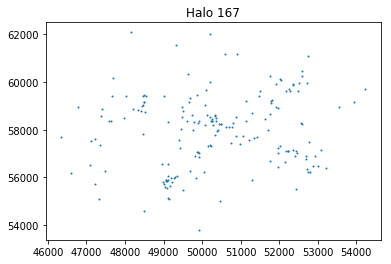

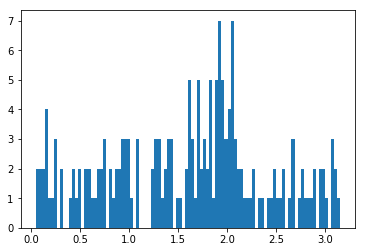

galaxies [1, 0, 2, 2, 1, 4, 4, 0, 2, 2, 4, 6, 7, 13, 7, 17, 20, 48, 16, 23]
blue galaxies counted [0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 3, 3, 11, 3, 12, 11, 27, 14, 20]
red galaxies counted [0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 2, 0, 1, 3, 4, 15, 2, 3]
red galaxies counted [1, 0, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 2, 2, 3, 2, 5, 6, 0, 0]
sum of galaxies: 179

Halo: 168
Halo Mass: 7575.211
N Subhalos from Illustris Algorithm: 598 158.18325400352478
R500c, R200c, R200m: 0.35806773301074246 0.5511675038445688 0.6865883594385488
before dev loop: 158.18845891952515
True
232118 232118 time 158.2202067375183
N Subhalos within 5*R200m: 127 158.24645495414734


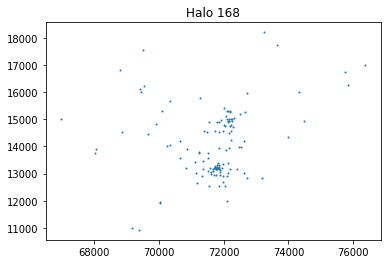

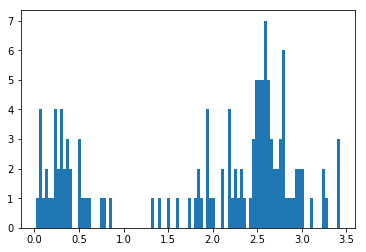

galaxies [3, 1, 0, 2, 1, 1, 5, 5, 6, 1, 5, 1, 3, 0, 0, 3, 6, 18, 48, 16]
blue galaxies counted [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 3, 0, 2, 0, 0, 2, 4, 8, 10, 11]
red galaxies counted [0, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 10, 2]
red galaxies counted [3, 0, 0, 0, 1, 0, 3, 3, 4, 1, 2, 1, 1, 0, 0, 0, 1, 8, 28, 3]
sum of galaxies: 125

Halo: 169
Halo Mass: 7585.1597
N Subhalos from Illustris Algorithm: 535 159.02972388267517
R500c, R200c, R200m: 0.3660795475290177 0.5467782867304658 0.6710545519149234
before dev loop: 159.04377794265747
True
232118 232118 time 159.0739619731903
N Subhalos within 5*R200m: 100 159.10927987098694


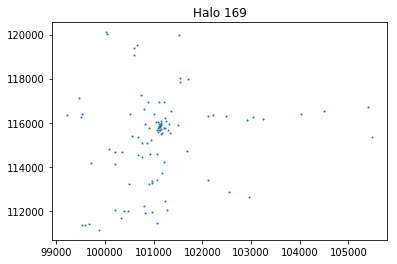

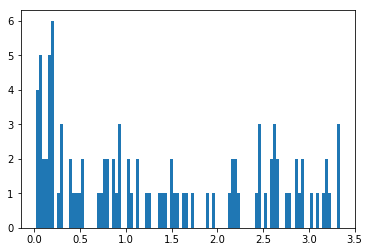

galaxies [4, 1, 3, 0, 5, 6, 0, 4, 0, 4, 3, 0, 6, 7, 6, 6, 4, 8, 12, 16]
blue galaxies counted [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 5, 4, 6, 2, 7, 10, 14]
red galaxies counted [3, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 2, 2]
red galaxies counted [1, 1, 1, 0, 3, 5, 0, 4, 0, 4, 3, 0, 3, 2, 0, 0, 1, 1, 0, 0]
sum of galaxies: 95

Halo: 170
Halo Mass: 7408.359
N Subhalos from Illustris Algorithm: 469 160.4421157836914
R500c, R200c, R200m: 0.36710967399808797 0.5581658862600092 0.6876218087670856
before dev loop: 160.59984469413757
True
232118 232118 time 160.67967796325684
N Subhalos within 5*R200m: 100 160.7745840549469


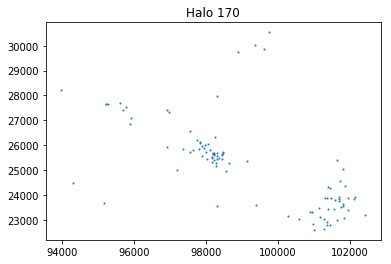

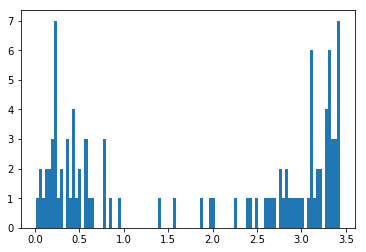

galaxies [0, 1, 1, 1, 3, 4, 5, 3, 4, 5, 5, 2, 4, 1, 0, 2, 1, 3, 10, 42]
blue galaxies counted [0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 3, 1, 2, 1, 0, 2, 1, 3, 10, 19]
red galaxies counted [0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5]
red galaxies counted [0, 1, 0, 0, 2, 3, 4, 1, 2, 3, 2, 1, 2, 0, 0, 0, 0, 0, 0, 18]
sum of galaxies: 97

Halo: 171
Halo Mass: 7560.329
N Subhalos from Illustris Algorithm: 603 161.53440880775452
R500c, R200c, R200m: 0.35118420943637946 0.5478741898031925 0.6800677081317096
before dev loop: 161.54315495491028
True
232118 232118 time 161.55982208251953
N Subhalos within 5*R200m: 88 161.58298182487488


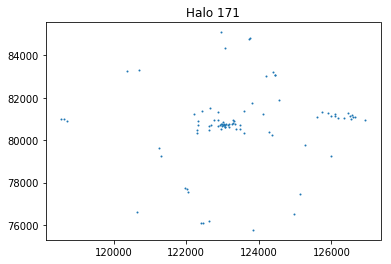

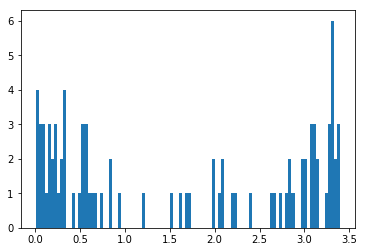

galaxies [3, 2, 0, 2, 2, 2, 4, 5, 1, 1, 7, 3, 3, 1, 1, 1, 3, 7, 4, 31]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 1, 1, 1, 1, 1, 3, 6, 3, 21]
red galaxies counted [0, 0, 0, 0, 0, 1, 2, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 4]
red galaxies counted [3, 2, 0, 2, 2, 1, 2, 1, 1, 1, 3, 2, 2, 0, 0, 0, 0, 0, 1, 6]
sum of galaxies: 83

Halo: 172
Halo Mass: 7533.9155
N Subhalos from Illustris Algorithm: 665 162.19937300682068
R500c, R200c, R200m: 0.32497323374059606 0.5160921199361899 0.6534526847351336
before dev loop: 162.20893096923828
True
232118 232118 time 162.22420287132263
N Subhalos within 5*R200m: 80 162.24899291992188


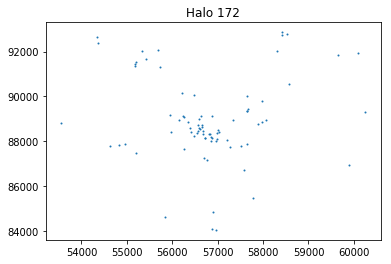

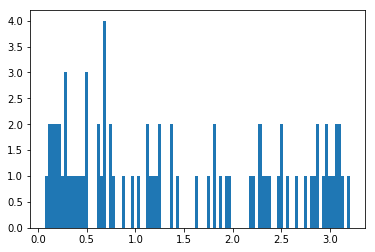

galaxies [1, 0, 0, 3, 1, 4, 1, 3, 3, 2, 4, 6, 4, 2, 6, 5, 2, 6, 11, 16]
blue galaxies counted [0, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 2, 3, 2, 5, 5, 1, 6, 9, 15]
red galaxies counted [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 1, 0, 2, 1]
red galaxies counted [0, 0, 0, 1, 0, 3, 0, 2, 3, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0]
sum of galaxies: 80

Halo: 173
Halo Mass: 7502.3345
N Subhalos from Illustris Algorithm: 778 162.89751386642456
R500c, R200c, R200m: 0.3020896414043336 0.49563915926522983 0.6211914425192795
before dev loop: 162.90537810325623
True
232118 232118 time 162.92599487304688
N Subhalos within 5*R200m: 95 162.9635829925537


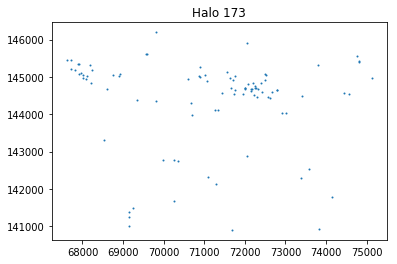

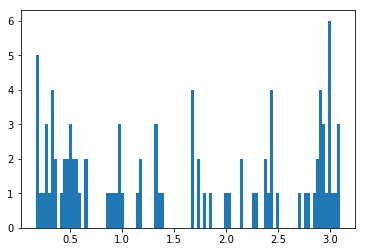

galaxies [0, 0, 0, 0, 0, 5, 2, 4, 4, 3, 8, 6, 0, 4, 5, 7, 6, 4, 12, 25]
blue galaxies counted [0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 7, 3, 0, 3, 1, 6, 5, 3, 10, 14]
red galaxies counted [0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 1, 3, 0, 1, 0, 2, 1]
red galaxies counted [0, 0, 0, 0, 0, 1, 1, 3, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 10]
sum of galaxies: 95

Halo: 174
Halo Mass: 7402.9487
N Subhalos from Illustris Algorithm: 673 163.90060806274414
R500c, R200c, R200m: 0.3185681618949594 0.4925385710729112 0.6168368552056408
before dev loop: 163.91187405586243
True
232118 232118 time 163.96998190879822
N Subhalos within 5*R200m: 194 164.03937101364136


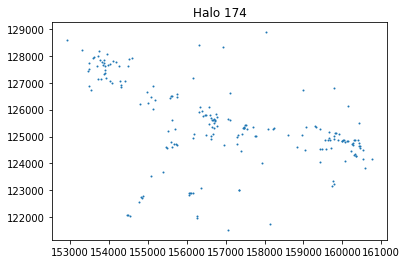

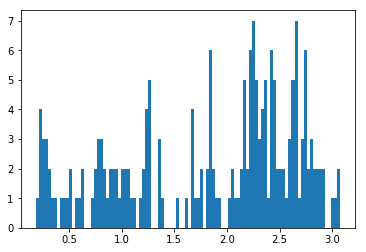

galaxies [0, 0, 0, 0, 0, 1, 4, 6, 3, 2, 4, 4, 6, 12, 9, 16, 7, 19, 56, 45]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 2, 6, 8, 6, 15, 5, 6, 16, 17]
red galaxies counted [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 2, 2, 11, 10]
red galaxies counted [0, 0, 0, 0, 0, 1, 2, 6, 2, 1, 0, 1, 0, 2, 3, 0, 0, 11, 29, 18]
sum of galaxies: 194

Halo: 175
Halo Mass: 7307.713
N Subhalos from Illustris Algorithm: 570 164.6726109981537
R500c, R200c, R200m: 0.3377961284046414 0.5293714673979153 0.6589734355837126
before dev loop: 164.68109798431396
True
232118 232118 time 164.70273900032043
N Subhalos within 5*R200m: 86 164.7384340763092


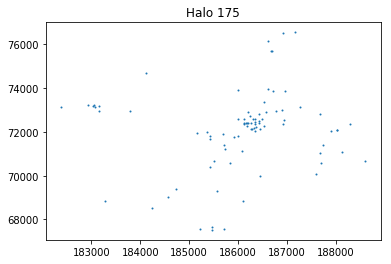

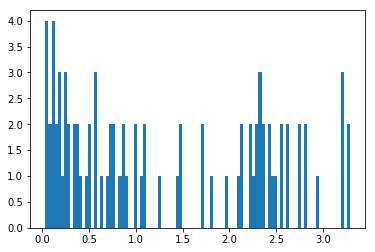

galaxies [0, 2, 4, 2, 1, 3, 3, 2, 4, 1, 6, 1, 6, 5, 3, 4, 3, 5, 17, 10]
blue galaxies counted [0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 2, 1, 2, 3, 3, 4, 3, 4, 15, 10]
red galaxies counted [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0]
red galaxies counted [0, 2, 4, 1, 1, 2, 2, 1, 1, 1, 3, 0, 4, 1, 0, 0, 0, 0, 0, 0]
sum of galaxies: 82

Halo: 176
Halo Mass: 7368.7236
N Subhalos from Illustris Algorithm: 581 165.91770482063293
R500c, R200c, R200m: 0.2980130733384683 0.4573430437758696 0.5743658670549934
before dev loop: 165.93148493766785
True
232118 232118 time 166.07383608818054
N Subhalos within 5*R200m: 106 166.1116819381714


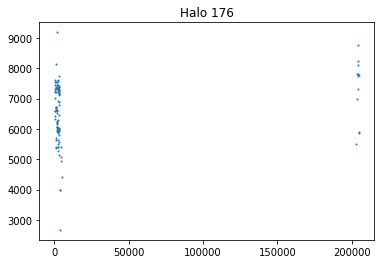

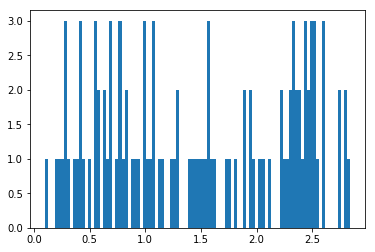

galaxies [0, 0, 0, 1, 0, 0, 1, 3, 3, 2, 4, 6, 6, 8, 8, 8, 9, 8, 15, 24]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 4, 1, 4, 7, 6, 8, 8, 11, 17]
red galaxies counted [0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 2, 1, 0, 2, 0, 0, 2, 2]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 1, 0, 1, 0, 2, 5]
sum of galaxies: 106

Halo: 177
Halo Mass: 7628.1685
N Subhalos from Illustris Algorithm: 820 167.3312919139862
R500c, R200c, R200m: 0.20972347626246787 0.35337053086199033 0.5297089177887976
before dev loop: 167.3368649482727
True
232118 232118 time 167.357519865036
N Subhalos within 5*R200m: 82 167.38925099372864


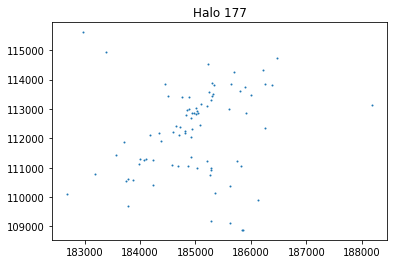

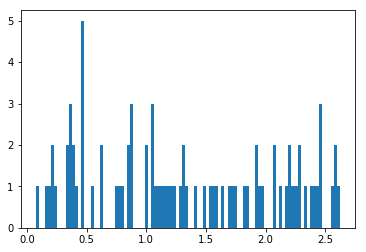

galaxies [0, 1, 0, 0, 0, 1, 2, 2, 0, 4, 4, 5, 3, 3, 5, 11, 6, 8, 10, 17]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 1, 3, 4, 7, 6, 8, 6, 14]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 3, 0, 0, 4, 1]
red galaxies counted [0, 1, 0, 0, 0, 0, 2, 0, 0, 3, 1, 2, 2, 0, 0, 1, 0, 0, 0, 2]
sum of galaxies: 82

Halo: 178
Halo Mass: 7203.893
N Subhalos from Illustris Algorithm: 573 168.10457491874695
R500c, R200c, R200m: 0.3506559548501068 0.5494880185737295 0.6718899508123657
before dev loop: 168.11196899414062
True
232118 232118 time 168.13309478759766
N Subhalos within 5*R200m: 94 168.18479108810425


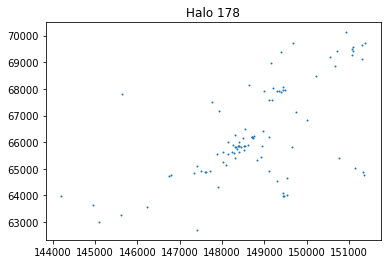

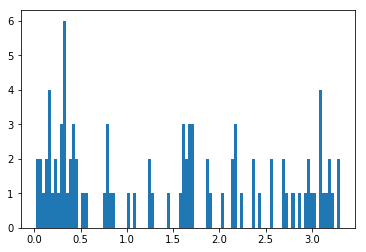

galaxies [1, 0, 2, 0, 4, 3, 2, 5, 6, 6, 2, 0, 6, 1, 3, 2, 12, 10, 8, 18]
blue galaxies counted [0, 0, 1, 0, 0, 2, 0, 2, 1, 3, 1, 0, 6, 1, 3, 2, 9, 7, 5, 18]
red galaxies counted [0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0]
red galaxies counted [1, 0, 1, 0, 3, 0, 1, 3, 4, 3, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0]
sum of galaxies: 91

Halo: 179
Halo Mass: 7369.969
N Subhalos from Illustris Algorithm: 663 168.8020191192627
R500c, R200c, R200m: 0.36381283692498806 0.5530233809082931 0.671854480288422
before dev loop: 168.80774784088135
True
232118 232118 time 168.82738304138184
N Subhalos within 5*R200m: 102 168.85068583488464


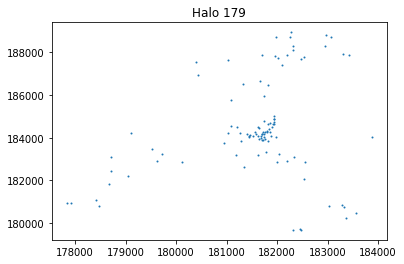

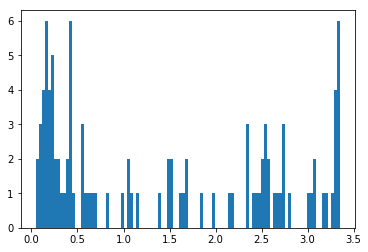

galaxies [0, 1, 3, 3, 6, 4, 5, 4, 4, 7, 3, 4, 1, 1, 4, 5, 5, 3, 19, 18]
blue galaxies counted [0, 1, 1, 2, 2, 4, 4, 3, 3, 5, 3, 2, 1, 0, 3, 5, 4, 3, 13, 12]
red galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 4, 2]
red galaxies counted [0, 0, 2, 1, 3, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 4]
sum of galaxies: 100

Halo: 180
Halo Mass: 7179.918
N Subhalos from Illustris Algorithm: 588 169.46747088432312
R500c, R200c, R200m: 0.3469176178469262 0.5528558367291683 0.6783286916316329
before dev loop: 169.47414088249207
True
232118 232118 time 169.489679813385
N Subhalos within 5*R200m: 85 169.51908493041992


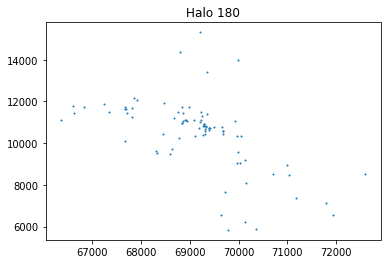

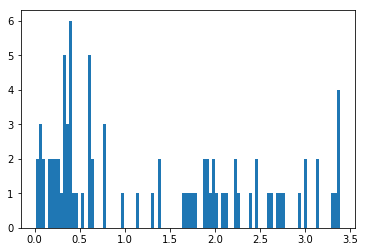

galaxies [1, 0, 2, 0, 2, 2, 3, 3, 10, 5, 1, 7, 3, 1, 1, 3, 5, 13, 8, 11]
blue galaxies counted [0, 0, 1, 0, 1, 1, 1, 1, 2, 3, 0, 5, 3, 1, 1, 1, 4, 12, 8, 11]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0]
red galaxies counted [1, 0, 1, 0, 1, 1, 2, 1, 7, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 81

Halo: 181
Halo Mass: 7203.806
N Subhalos from Illustris Algorithm: 487 170.0877947807312
R500c, R200c, R200m: 0.3417345175614866 0.5128303930769711 0.6381983977512092
before dev loop: 170.09340906143188
True
232118 232118 time 170.10926795005798
N Subhalos within 5*R200m: 74 170.13200211524963


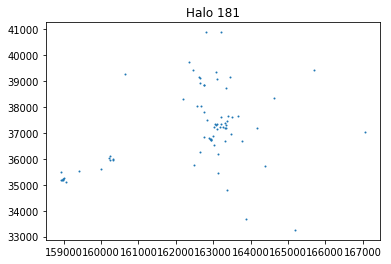

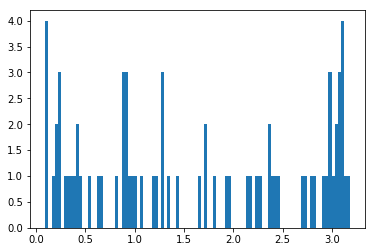

galaxies [0, 1, 2, 1, 1, 2, 3, 1, 2, 4, 1, 2, 0, 9, 3, 6, 3, 4, 8, 21]
blue galaxies counted [0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 0, 5, 3, 5, 3, 3, 8, 16]
red galaxies counted [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 3]
red galaxies counted [0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 3, 0, 1, 0, 0, 0, 2]
sum of galaxies: 74

Halo: 182
Halo Mass: 7302.4766
N Subhalos from Illustris Algorithm: 604 170.74633383750916
R500c, R200c, R200m: 0.3087313568922179 0.5232440745072151 0.6722466577743732
before dev loop: 170.75185990333557
True
232118 232118 time 170.76649594306946
N Subhalos within 5*R200m: 84 170.8005669116974


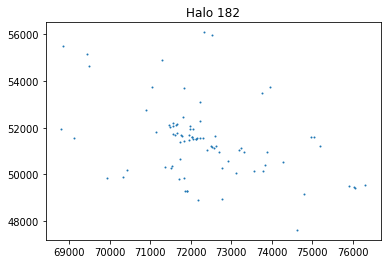

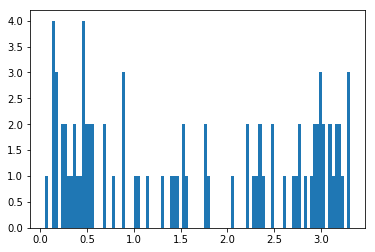

galaxies [0, 0, 0, 4, 3, 0, 4, 1, 3, 5, 7, 2, 1, 5, 1, 5, 5, 3, 12, 22]
blue galaxies counted [0, 0, 0, 0, 2, 0, 2, 1, 2, 3, 3, 0, 1, 5, 1, 5, 4, 3, 10, 18]
red galaxies counted [0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 4]
red galaxies counted [0, 0, 0, 2, 1, 0, 1, 0, 1, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0]
sum of galaxies: 83

Halo: 183
Halo Mass: 7346.276
N Subhalos from Illustris Algorithm: 734 171.56974482536316
R500c, R200c, R200m: 0.2908996118924678 0.4576553525312704 0.5979563276824663
before dev loop: 171.57930970191956
True
232118 232118 time 171.59647798538208
N Subhalos within 5*R200m: 64 171.6247959136963


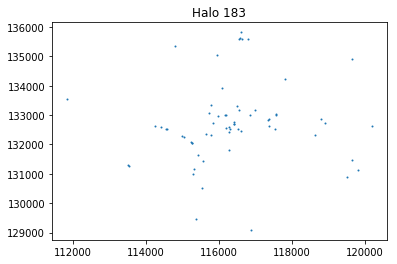

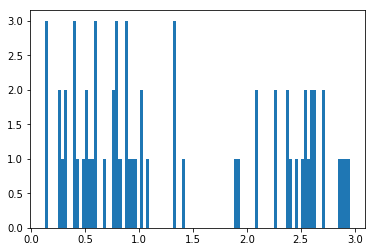

galaxies [0, 0, 0, 0, 3, 0, 0, 2, 3, 3, 3, 6, 1, 10, 5, 3, 1, 2, 8, 14]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 3, 1, 7, 3, 3, 0, 2, 7, 12]
red galaxies counted [0, 0, 0, 0, 2, 0, 0, 1, 1, 2, 0, 0, 0, 2, 1, 0, 1, 0, 1, 2]
red galaxies counted [0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 3, 0, 1, 1, 0, 0, 0, 0, 0]
sum of galaxies: 64

Halo: 184
Halo Mass: 7020.075
N Subhalos from Illustris Algorithm: 474 172.21254706382751
R500c, R200c, R200m: 0.37536689970346826 0.5554507097313546 0.6736600340467317
before dev loop: 172.21918272972107
True
232118 232118 time 172.2399308681488
N Subhalos within 5*R200m: 145 172.31026792526245


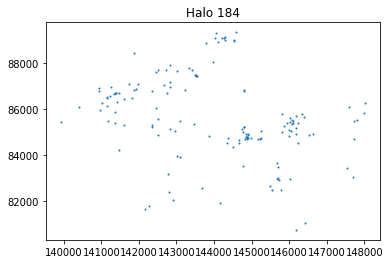

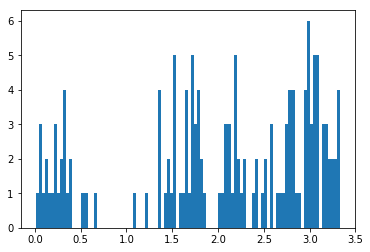

galaxies [0, 0, 2, 1, 2, 1, 3, 3, 6, 0, 2, 1, 0, 0, 2, 13, 22, 18, 16, 49]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 5, 0, 2, 1, 0, 0, 1, 7, 16, 17, 13, 26]
red galaxies counted [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 2, 0, 2, 11]
red galaxies counted [0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 4, 1, 1, 12]
sum of galaxies: 141

Halo: 185
Halo Mass: 6979.129
N Subhalos from Illustris Algorithm: 514 172.87851071357727
R500c, R200c, R200m: 0.3445578271433828 0.5305235788404128 0.6600431561252211
before dev loop: 172.8844940662384
True
232118 232118 time 172.90228509902954
N Subhalos within 5*R200m: 74 172.9311170578003


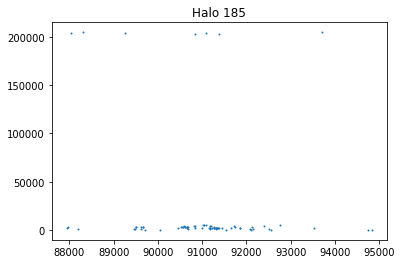

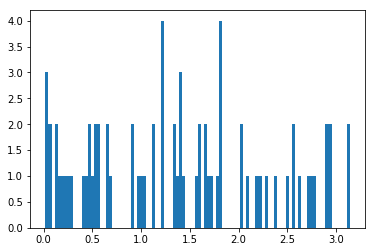

galaxies [1, 0, 0, 2, 1, 2, 1, 1, 0, 3, 4, 5, 0, 4, 7, 7, 12, 5, 7, 8]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 4, 5, 6, 9, 5, 6, 6]
red galaxies counted [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2]
red galaxies counted [0, 0, 0, 2, 1, 2, 0, 1, 0, 2, 1, 4, 0, 0, 1, 0, 2, 0, 0, 0]
sum of galaxies: 70

Halo: 186
Halo Mass: 6984.59
N Subhalos from Illustris Algorithm: 589 173.5008418560028
R500c, R200c, R200m: 0.33778992306467387 0.5325925192545079 0.6697879419414111
before dev loop: 173.50652384757996
True
232118 232118 time 173.52267599105835
N Subhalos within 5*R200m: 104 173.59406280517578


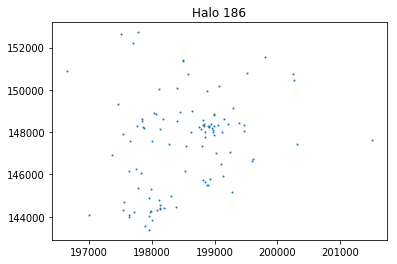

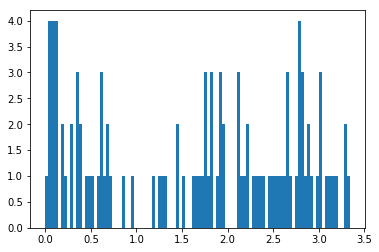

galaxies [3, 1, 3, 1, 1, 1, 1, 2, 4, 2, 2, 7, 2, 1, 2, 5, 11, 13, 15, 22]
blue galaxies counted [0, 0, 1, 0, 0, 0, 0, 0, 3, 1, 0, 2, 1, 1, 2, 4, 4, 8, 11, 20]
red galaxies counted [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 5, 3, 2, 2]
red galaxies counted [2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 2, 3, 0, 0, 0, 0, 2, 2, 2, 0]
sum of galaxies: 99

Halo: 187
Halo Mass: 7009.949
N Subhalos from Illustris Algorithm: 639 174.18546676635742
R500c, R200c, R200m: 0.35690369130172667 0.5465254691698511 0.6743829761701808
before dev loop: 174.1917519569397
True
232118 232118 time 174.2096917629242
N Subhalos within 5*R200m: 101 174.26518607139587


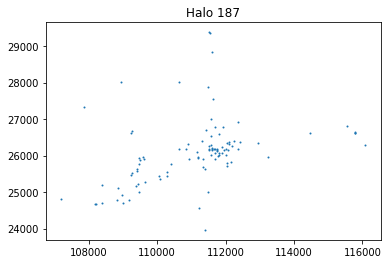

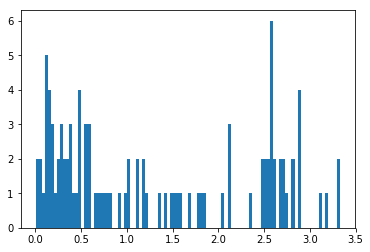

galaxies [2, 0, 3, 5, 3, 2, 3, 5, 3, 4, 9, 3, 4, 4, 5, 5, 5, 4, 20, 10]
blue galaxies counted [0, 0, 0, 2, 2, 1, 1, 1, 3, 4, 7, 1, 1, 4, 4, 4, 5, 4, 17, 9]
red galaxies counted [0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1]
red galaxies counted [2, 0, 3, 1, 0, 1, 2, 3, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 1, 0]
sum of galaxies: 99

Halo: 188
Halo Mass: 7141.079
N Subhalos from Illustris Algorithm: 649 174.85972094535828
R500c, R200c, R200m: 0.3429480818868889 0.5280316344127856 0.6601256671295643
before dev loop: 174.86701679229736
True
232118 232118 time 174.88563895225525
N Subhalos within 5*R200m: 116 175.2800109386444


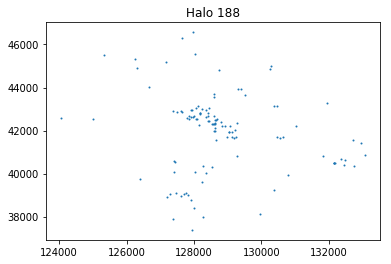

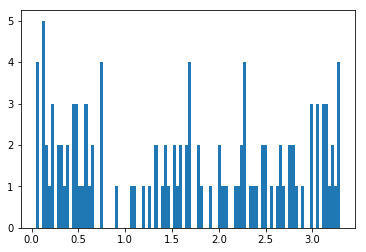

galaxies [0, 0, 0, 5, 2, 1, 3, 3, 2, 5, 5, 6, 4, 1, 3, 7, 14, 7, 18, 26]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 1, 3, 1, 3, 5, 7, 6, 14, 22]
red galaxies counted [0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 1, 2, 1, 3, 3]
red galaxies counted [0, 0, 0, 2, 2, 1, 2, 1, 2, 3, 1, 5, 1, 0, 0, 1, 5, 0, 1, 1]
sum of galaxies: 112

Halo: 189
Halo Mass: 6939.0034
N Subhalos from Illustris Algorithm: 551 175.8647711277008
R500c, R200c, R200m: 0.3542306710504002 0.5429497120738211 0.6699731012791534
before dev loop: 175.87401175498962
True
232118 232118 time 175.89153289794922
N Subhalos within 5*R200m: 62 175.95239973068237


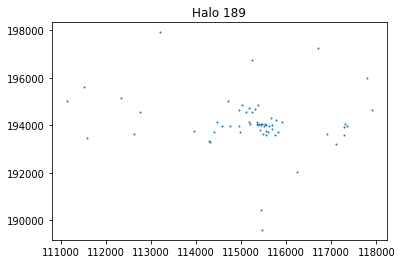

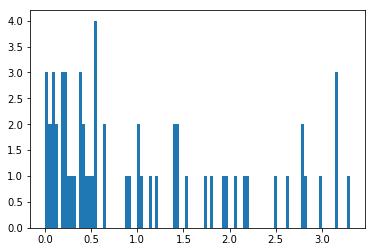

galaxies [2, 2, 1, 1, 1, 4, 1, 3, 3, 3, 6, 2, 0, 5, 2, 5, 2, 5, 2, 8]
blue galaxies counted [0, 0, 1, 1, 1, 1, 1, 2, 2, 1, 3, 2, 0, 4, 2, 3, 2, 3, 2, 7]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1]
red galaxies counted [2, 2, 0, 0, 0, 2, 0, 1, 1, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 58

Halo: 190
Halo Mass: 7046.362
N Subhalos from Illustris Algorithm: 669 176.74539804458618
R500c, R200c, R200m: 0.2690153194976947 0.45795633153692383 0.5738119503853708
before dev loop: 176.75722479820251
True
232118 232118 time 176.77484583854675
N Subhalos within 5*R200m: 81 176.83899998664856


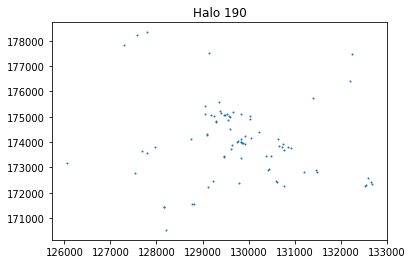

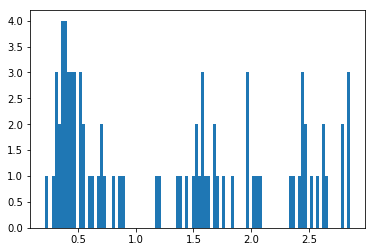

galaxies [0, 0, 0, 0, 0, 0, 1, 0, 4, 10, 9, 5, 5, 3, 1, 2, 11, 6, 7, 17]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 5, 3, 4, 2, 0, 2, 11, 6, 6, 12]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 1, 5]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 2, 7, 3, 2, 1, 1, 1, 0, 0, 0, 0, 0]
sum of galaxies: 81

Halo: 191
Halo Mass: 7042.9897
N Subhalos from Illustris Algorithm: 570 177.4289128780365
R500c, R200c, R200m: 0.33705493057135216 0.5325804688846353 0.6522088943989216
before dev loop: 177.43418383598328
True
232118 232118 time 177.45128393173218
N Subhalos within 5*R200m: 83 177.5390226840973


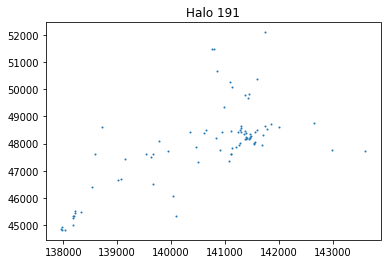

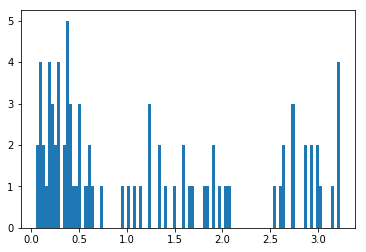

galaxies [0, 2, 2, 2, 1, 6, 2, 5, 4, 7, 4, 4, 1, 1, 3, 6, 5, 7, 4, 15]
blue galaxies counted [0, 2, 1, 0, 0, 1, 1, 3, 3, 4, 2, 4, 1, 1, 2, 5, 4, 7, 2, 6]
red galaxies counted [0, 0, 1, 1, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 2, 3]
red galaxies counted [0, 0, 0, 1, 1, 2, 1, 2, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6]
sum of galaxies: 81

Halo: 192
Halo Mass: 6880.6846
N Subhalos from Illustris Algorithm: 510 178.06564784049988
R500c, R200c, R200m: 0.3320443787714628 0.5399835996037677 0.6750545140580275
before dev loop: 178.0711350440979
True
232118 232118 time 178.08671474456787
N Subhalos within 5*R200m: 142 178.19108986854553


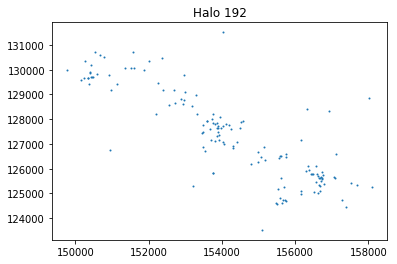

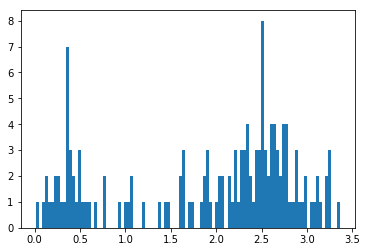

galaxies [0, 1, 2, 0, 1, 1, 2, 3, 10, 4, 5, 2, 2, 2, 4, 3, 9, 18, 50, 22]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 1, 4, 3, 8, 14, 24, 14]
red galaxies counted [0, 1, 0, 0, 1, 0, 0, 0, 3, 1, 1, 0, 0, 1, 0, 0, 1, 0, 11, 0]
red galaxies counted [0, 0, 2, 0, 0, 1, 2, 2, 6, 2, 4, 1, 0, 0, 0, 0, 0, 4, 15, 8]
sum of galaxies: 141

Halo: 193
Halo Mass: 7080.1284
N Subhalos from Illustris Algorithm: 633 178.7465808391571
R500c, R200c, R200m: 0.28340394153891557 0.43412106023911684 0.5369897032244402
before dev loop: 178.75387907028198
True
232118 232118 time 178.77197289466858
N Subhalos within 5*R200m: 58 178.85528087615967


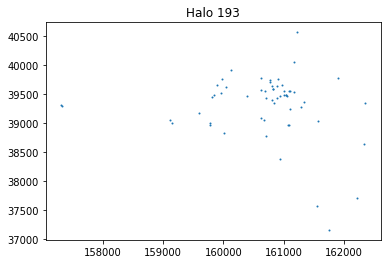

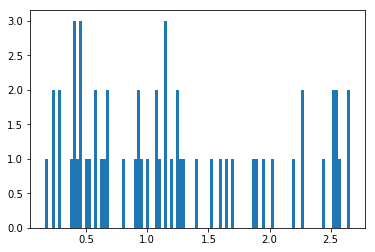

galaxies [0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 7, 2, 5, 2, 5, 7, 5, 4, 5, 10]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 3, 6, 1, 2, 5, 6]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 4]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 5, 1, 3, 1, 1, 0, 3, 1, 0, 0]
sum of galaxies: 58

Halo: 194
Halo Mass: 6876.453
N Subhalos from Illustris Algorithm: 499 179.38616800308228
R500c, R200c, R200m: 0.34884171361584243 0.5340309971278965 0.6646728601889065
before dev loop: 179.39185786247253
True
232118 232118 time 179.40769982337952
N Subhalos within 5*R200m: 79 179.4753930568695


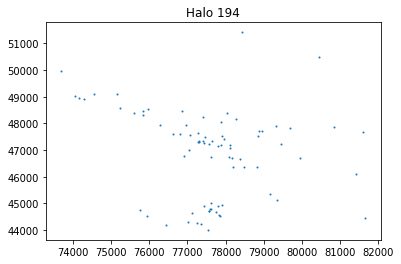

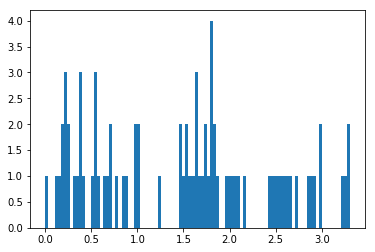

galaxies [0, 0, 1, 1, 0, 3, 4, 1, 1, 4, 5, 2, 4, 5, 1, 3, 18, 7, 9, 9]
blue galaxies counted [0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 2, 0, 0, 5, 1, 2, 11, 5, 7, 8]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 5, 0, 2, 1]
red galaxies counted [0, 0, 1, 0, 0, 2, 1, 1, 0, 2, 1, 1, 4, 0, 0, 1, 2, 2, 0, 0]
sum of galaxies: 78

Halo: 195
Halo Mass: 6984.233
N Subhalos from Illustris Algorithm: 554 180.05340385437012
R500c, R200c, R200m: 0.31986581858553526 0.5364848687922387 0.6667599762439389
before dev loop: 180.06050205230713
True
232118 232118 time 180.07537388801575
N Subhalos within 5*R200m: 124 180.1602509021759


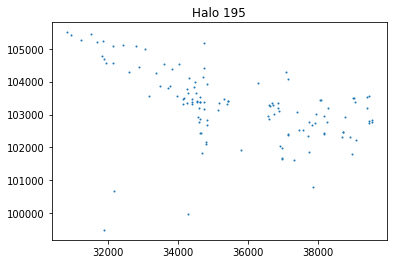

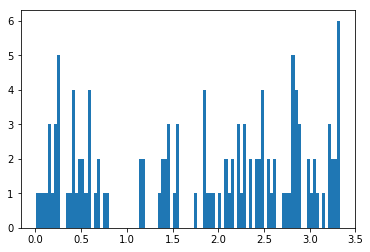

galaxies [2, 0, 1, 2, 1, 4, 4, 1, 1, 7, 4, 6, 3, 0, 4, 8, 5, 17, 19, 34]
blue galaxies counted [0, 0, 0, 0, 0, 3, 1, 0, 0, 2, 3, 2, 3, 0, 4, 4, 5, 16, 17, 29]
red galaxies counted [1, 0, 0, 0, 1, 0, 1, 0, 0, 3, 0, 1, 0, 0, 0, 2, 0, 1, 2, 3]
red galaxies counted [1, 0, 1, 2, 0, 1, 2, 1, 1, 2, 1, 3, 0, 0, 0, 2, 0, 0, 0, 2]
sum of galaxies: 123

Halo: 196
Halo Mass: 6886.1846
N Subhalos from Illustris Algorithm: 545 180.72727298736572
R500c, R200c, R200m: 0.34478286079472337 0.5249554272013718 0.6443699486418077
before dev loop: 180.73495507240295
True
232118 232118 time 180.74965500831604
N Subhalos within 5*R200m: 97 180.8002598285675


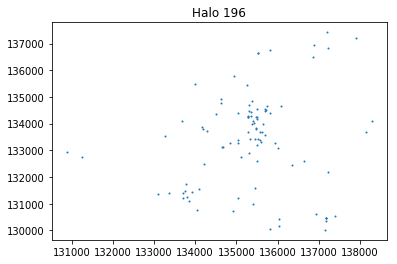

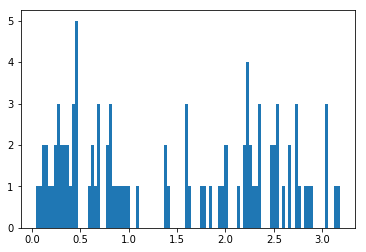

galaxies [0, 1, 1, 1, 2, 1, 2, 6, 4, 5, 4, 4, 7, 7, 1, 3, 6, 6, 21, 14]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 4, 1, 3, 6, 6, 16, 12]
red galaxies counted [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 4, 2]
red galaxies counted [0, 1, 1, 1, 1, 1, 0, 5, 3, 3, 3, 3, 4, 2, 0, 0, 0, 0, 1, 0]
sum of galaxies: 96

Halo: 197
Halo Mass: 6973.242
N Subhalos from Illustris Algorithm: 590 181.5768918991089
R500c, R200c, R200m: 0.277548582745504 0.4419752991566669 0.5548961525105097
before dev loop: 181.58514881134033
True
232118 232118 time 181.60050773620605
N Subhalos within 5*R200m: 89 181.63172388076782


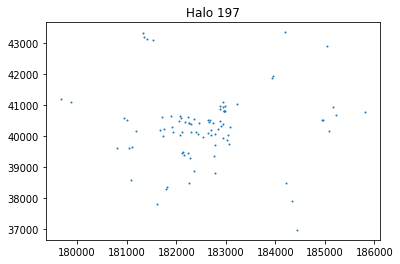

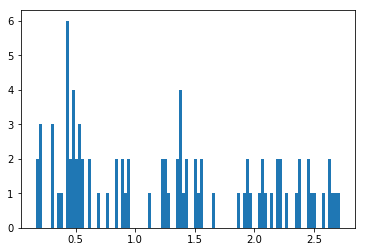

galaxies [0, 0, 0, 0, 0, 2, 3, 0, 3, 2, 9, 10, 3, 3, 5, 6, 12, 4, 13, 14]
blue galaxies counted [0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 6, 6, 1, 2, 5, 5, 10, 3, 11, 11]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 1, 2, 3]
red galaxies counted [0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 2, 4, 1, 0, 0, 0, 2, 0, 0, 0]
sum of galaxies: 89

Halo: 198
Halo Mass: 6816.1245
N Subhalos from Illustris Algorithm: 649 182.13277578353882
R500c, R200c, R200m: 0.30509052379543117 0.47337952387132076 0.5920286266353681
before dev loop: 182.1380739212036
True
232118 232118 time 182.15331292152405
N Subhalos within 5*R200m: 72 182.21307802200317


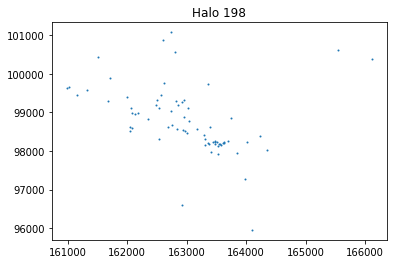

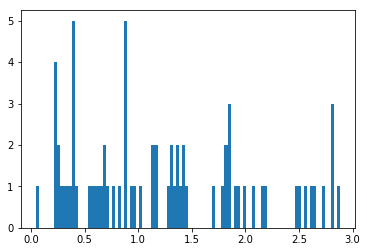

galaxies [0, 0, 0, 0, 0, 0, 1, 5, 2, 7, 1, 3, 5, 7, 3, 8, 6, 10, 3, 10]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 4, 1, 4, 4, 6, 2, 8]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1, 1]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 3, 1, 4, 0, 1, 3, 1, 2, 2, 2, 2, 0, 1]
sum of galaxies: 71

Halo: 199
Halo Mass: 6767.573
N Subhalos from Illustris Algorithm: 484 182.70620489120483
R500c, R200c, R200m: 0.34064257789944896 0.5200134944511885 0.646977112220575
before dev loop: 182.711651802063
True
232118 232118 time 182.72669792175293
N Subhalos within 5*R200m: 67 182.75253295898438


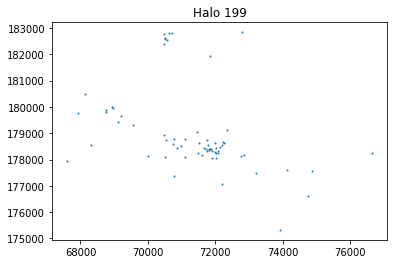

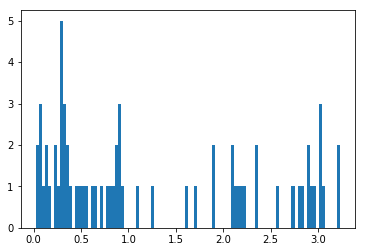

galaxies [2, 1, 1, 0, 2, 1, 2, 6, 4, 3, 3, 2, 3, 7, 1, 1, 2, 6, 5, 13]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 3, 1, 0, 2, 5, 5, 12]
red galaxies counted [2, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 2, 0, 3, 0, 1, 0, 1, 0, 1]
red galaxies counted [0, 1, 1, 0, 2, 1, 1, 2, 4, 1, 3, 0, 1, 1, 0, 0, 0, 0, 0, 0]
sum of galaxies: 65

Halo: 200
Halo Mass: 6673.2583
N Subhalos from Illustris Algorithm: 570 183.2580599784851
R500c, R200c, R200m: 0.3264750461161054 0.5364035187869862 0.6664983511040152
before dev loop: 183.26422786712646
True
232118 232118 time 183.27890467643738
N Subhalos within 5*R200m: 158 183.3459668159485


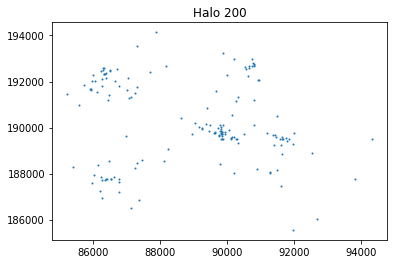

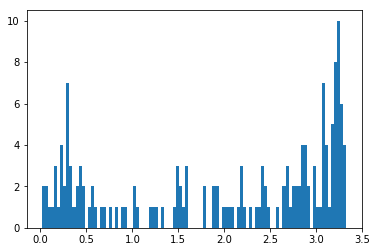

galaxies [1, 0, 1, 1, 3, 1, 4, 9, 4, 7, 3, 3, 2, 3, 4, 8, 6, 13, 16, 66]
blue galaxies counted [0, 0, 0, 1, 0, 0, 2, 4, 2, 2, 1, 1, 2, 2, 4, 7, 4, 8, 7, 26]
red galaxies counted [0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 1, 4, 1, 12]
red galaxies counted [1, 0, 0, 0, 3, 1, 1, 3, 2, 4, 2, 2, 0, 0, 0, 0, 1, 1, 8, 28]
sum of galaxies: 155

Halo: 201
Halo Mass: 7024.1543
N Subhalos from Illustris Algorithm: 670 183.8315668106079
R500c, R200c, R200m: 0.28051935922914595 0.4361574926786721 0.5500778461462612
before dev loop: 183.83660578727722
True
232118 232118 time 183.853129863739
N Subhalos within 5*R200m: 81 183.90555787086487


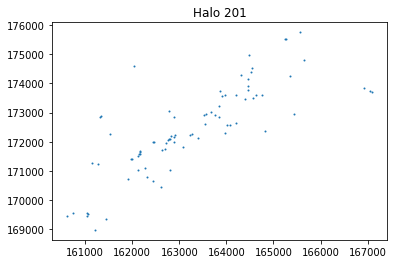

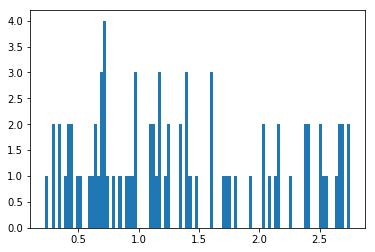

galaxies [0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 5, 2, 6, 9, 6, 11, 7, 7, 8, 15]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 5, 5, 3, 9, 6, 7, 7, 10]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 1, 4]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 3, 1, 0, 1, 0, 0, 1]
sum of galaxies: 81

Halo: 202
Halo Mass: 6825.4873
N Subhalos from Illustris Algorithm: 517 184.42068791389465
R500c, R200c, R200m: 0.35244809706719626 0.5348637537515462 0.6593945179435774
before dev loop: 184.4261498451233
True
232118 232118 time 184.441232919693
N Subhalos within 5*R200m: 110 184.48136496543884


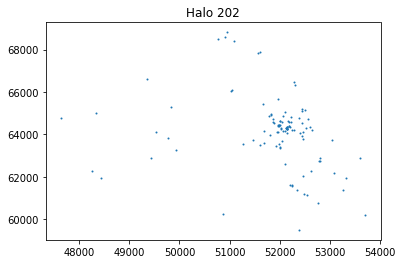

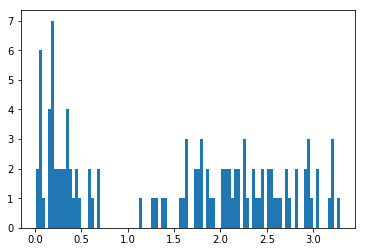

galaxies [1, 1, 0, 0, 5, 6, 3, 4, 6, 4, 1, 5, 0, 0, 1, 4, 12, 15, 18, 17]
blue galaxies counted [0, 1, 0, 0, 3, 3, 1, 2, 1, 4, 1, 2, 0, 0, 1, 4, 11, 12, 15, 12]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 3, 3, 3]
red galaxies counted [1, 0, 0, 0, 2, 2, 2, 2, 4, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2]
sum of galaxies: 103

Halo: 203
Halo Mass: 6652.271
N Subhalos from Illustris Algorithm: 496 185.02583980560303
R500c, R200c, R200m: 0.33719312949759794 0.5373048143914392 0.660456511835965
before dev loop: 185.03091502189636
True
232118 232118 time 185.04519295692444
N Subhalos within 5*R200m: 81 185.06639194488525


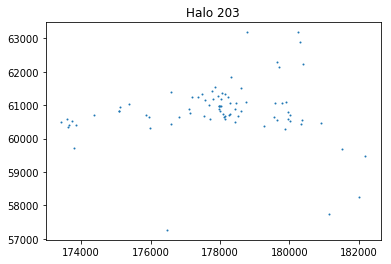

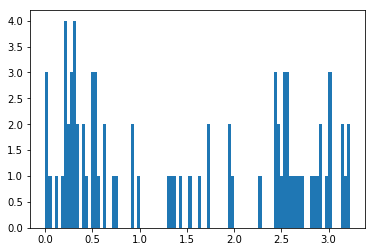

galaxies [0, 0, 1, 0, 0, 3, 4, 6, 3, 3, 6, 3, 2, 3, 0, 4, 4, 3, 17, 15]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 2, 2, 0, 4, 4, 3, 11, 13]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 3, 1]
red galaxies counted [0, 0, 1, 0, 0, 3, 3, 4, 2, 1, 3, 2, 0, 0, 0, 0, 0, 0, 3, 1]
sum of galaxies: 77

Halo: 204
Halo Mass: 6706.4194
N Subhalos from Illustris Algorithm: 525 185.76903700828552
R500c, R200c, R200m: 0.321439853111377 0.4772940124606779 0.5869305595247102
before dev loop: 185.77793312072754
True
232118 232118 time 185.79506468772888
N Subhalos within 5*R200m: 49 185.8371069431305


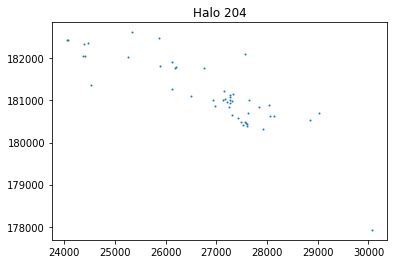

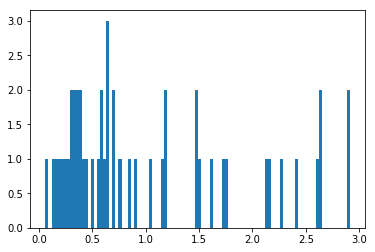

galaxies [1, 0, 0, 0, 1, 1, 2, 2, 4, 4, 3, 3, 7, 2, 1, 3, 4, 2, 4, 5]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 4, 2, 0, 3, 2, 2, 4, 5]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]
red galaxies counted [1, 0, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0]
sum of galaxies: 49

Halo: 205
Halo Mass: 6746.761
N Subhalos from Illustris Algorithm: 603 186.3373339176178
R500c, R200c, R200m: 0.31912099763439394 0.4939144350643043 0.618203110928697
before dev loop: 186.34243083000183
True
232118 232118 time 186.3591890335083
N Subhalos within 5*R200m: 81 186.38216590881348


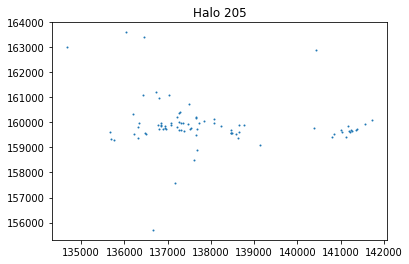

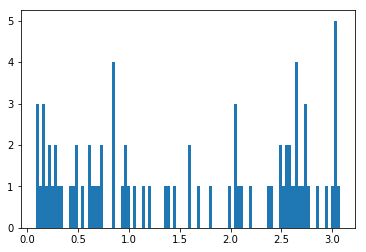

galaxies [0, 1, 2, 0, 4, 1, 3, 2, 2, 1, 3, 4, 4, 5, 5, 3, 4, 6, 7, 24]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 2, 1, 4, 3, 4, 6, 4, 12]
red galaxies counted [0, 0, 1, 0, 3, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 8]
red galaxies counted [0, 1, 1, 0, 1, 1, 3, 2, 1, 0, 0, 2, 2, 3, 1, 0, 0, 0, 2, 4]
sum of galaxies: 81

Halo: 206
Halo Mass: 6893.154
N Subhalos from Illustris Algorithm: 687 186.9062089920044
R500c, R200c, R200m: 0.24736909196819407 0.40411591949767034 0.5065515098221591
before dev loop: 186.9116129875183
True
232118 232118 time 186.92699074745178
N Subhalos within 5*R200m: 107 186.95005011558533


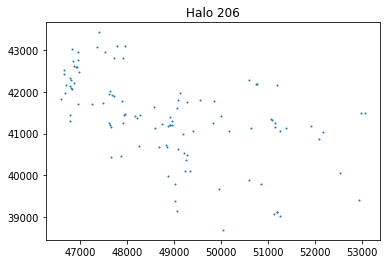

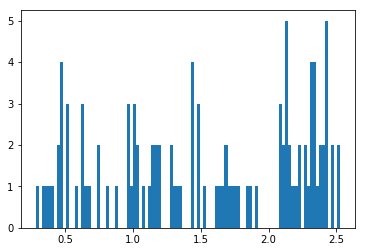

galaxies [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 9, 4, 4, 2, 13, 9, 13, 7, 41]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 3, 2, 0, 1, 8, 7, 11, 4, 17]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 2, 0, 3, 0, 1, 0, 9]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 1, 3, 15]
sum of galaxies: 107

Halo: 207
Halo Mass: 6543.4116
N Subhalos from Illustris Algorithm: 488 187.4372160434723
R500c, R200c, R200m: 0.3270789257810798 0.5212522004120723 0.6502222247824612
before dev loop: 187.44310784339905
True
232118 232118 time 187.45915293693542
N Subhalos within 5*R200m: 77 187.483069896698


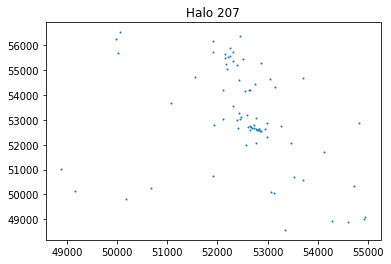

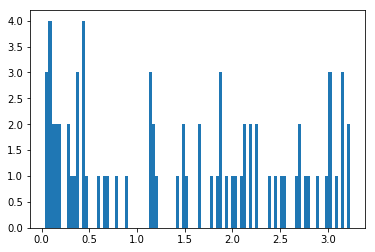

galaxies [2, 3, 0, 3, 1, 2, 0, 2, 4, 5, 1, 2, 2, 1, 6, 2, 5, 11, 8, 15]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 1, 4, 2, 4, 9, 4, 11]
red galaxies counted [1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 3, 2]
red galaxies counted [1, 3, 0, 1, 1, 2, 0, 1, 1, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2]
sum of galaxies: 75

Halo: 208
Halo Mass: 6570.345
N Subhalos from Illustris Algorithm: 476 188.26877784729004
R500c, R200c, R200m: 0.3649271958798118 0.5410014755307084 0.6619903117381459
before dev loop: 188.3071517944336
True
232118 232118 time 188.34783267974854
N Subhalos within 5*R200m: 63 188.43720197677612


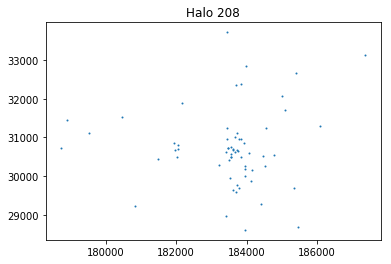

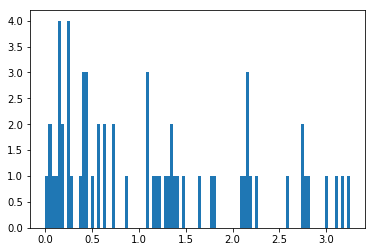

galaxies [1, 0, 1, 2, 4, 0, 2, 3, 0, 7, 2, 3, 2, 1, 6, 7, 3, 6, 2, 8]
blue galaxies counted [0, 0, 0, 2, 1, 0, 1, 2, 0, 3, 1, 3, 0, 1, 3, 7, 3, 6, 1, 7]
red galaxies counted [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1]
red galaxies counted [0, 0, 0, 0, 2, 0, 1, 1, 0, 4, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0]
sum of galaxies: 60

Halo: 209
Halo Mass: 6508.1846
N Subhalos from Illustris Algorithm: 523 189.1862769126892
R500c, R200c, R200m: 0.3555031660882688 0.5365006824005432 0.6607603332876681
before dev loop: 189.1943998336792
True
232118 232118 time 189.20953392982483
N Subhalos within 5*R200m: 50 189.2350468635559


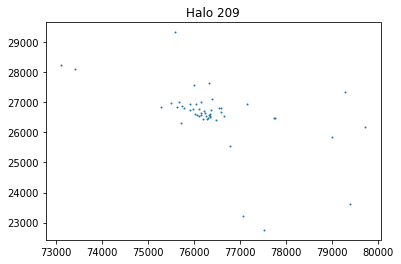

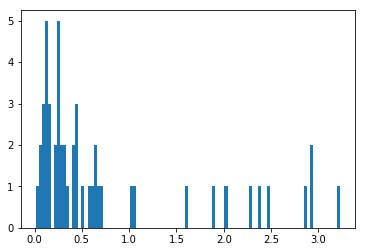

galaxies [1, 2, 1, 5, 3, 0, 7, 4, 1, 5, 1, 5, 1, 0, 2, 0, 1, 2, 3, 4]
blue galaxies counted [0, 0, 0, 0, 0, 0, 2, 1, 0, 4, 1, 4, 1, 0, 2, 0, 1, 2, 3, 4]
red galaxies counted [1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 4, 2, 0, 3, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 48

Halo: 210
Halo Mass: 6658.897
N Subhalos from Illustris Algorithm: 599 189.79805994033813
R500c, R200c, R200m: 0.28703044230209973 0.45941891015005754 0.5882327601255203
before dev loop: 189.80598187446594
True
232118 232118 time 189.82584190368652
N Subhalos within 5*R200m: 103 189.86575484275818


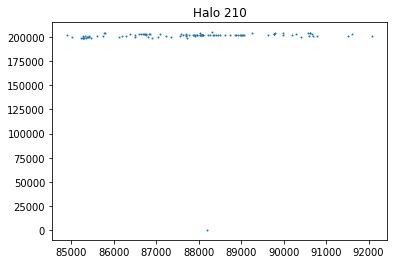

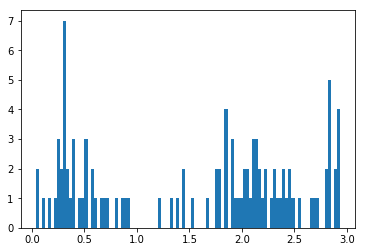

galaxies [0, 0, 0, 1, 0, 1, 0, 4, 10, 5, 2, 6, 3, 3, 1, 2, 4, 15, 23, 21]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 2, 3, 2, 1, 4, 1, 2, 1, 1, 4, 12, 19, 13]
red galaxies counted [0, 0, 0, 1, 0, 0, 0, 1, 3, 1, 0, 1, 1, 0, 0, 1, 0, 1, 2, 3]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 4, 2, 1, 1, 1, 1, 0, 0, 0, 2, 2, 5]
sum of galaxies: 101

Halo: 211
Halo Mass: 6654.555
N Subhalos from Illustris Algorithm: 593 190.59363985061646
R500c, R200c, R200m: 0.2847714783644167 0.45053278324757545 0.5769439656220414
before dev loop: 190.60098886489868
True
232118 232118 time 190.61703872680664
N Subhalos within 5*R200m: 94 190.6408886909485


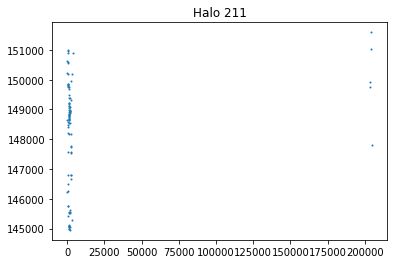

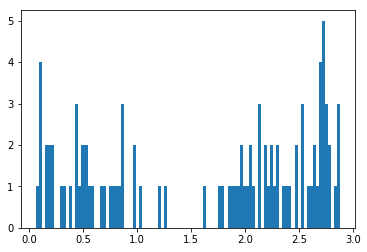

galaxies [1, 0, 2, 2, 0, 3, 3, 0, 2, 1, 6, 4, 2, 7, 3, 2, 0, 7, 19, 30]
blue galaxies counted [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 3, 3, 0, 4, 2, 2, 0, 6, 12, 21]
red galaxies counted [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 0, 0, 1, 4, 6]
red galaxies counted [0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 3, 3]
sum of galaxies: 94

Halo: 212
Halo Mass: 6530.6816
N Subhalos from Illustris Algorithm: 510 191.15810084342957
R500c, R200c, R200m: 0.3259620646730433 0.5007373865136935 0.6280111511781049
before dev loop: 191.1644778251648
True
232118 232118 time 191.17992687225342
N Subhalos within 5*R200m: 81 191.21187686920166


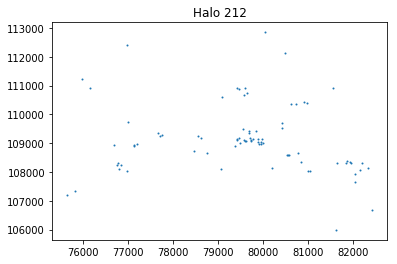

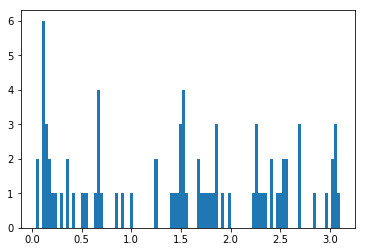

galaxies [1, 0, 3, 4, 3, 2, 1, 0, 3, 1, 2, 2, 4, 2, 1, 3, 14, 8, 15, 11]
blue galaxies counted [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 1, 1, 2, 9, 8, 15, 9]
red galaxies counted [1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 3, 0, 0, 1]
red galaxies counted [0, 0, 1, 2, 1, 2, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 2, 0, 0, 1]
sum of galaxies: 80

Halo: 213
Halo Mass: 6392.085
N Subhalos from Illustris Algorithm: 509 191.7232871055603
R500c, R200c, R200m: 0.3236201493520517 0.5226696201640225 0.6489194636993314
before dev loop: 191.72902607917786
True
232118 232118 time 191.7438588142395
N Subhalos within 5*R200m: 87 191.76864099502563


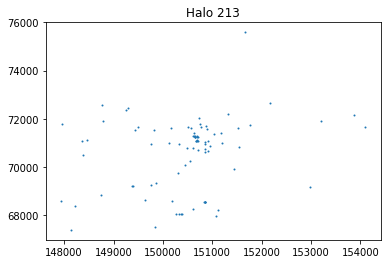

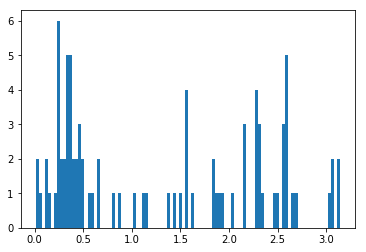

galaxies [1, 0, 0, 2, 1, 0, 7, 2, 11, 6, 5, 3, 1, 1, 3, 2, 6, 9, 19, 6]
blue galaxies counted [0, 0, 0, 1, 0, 0, 5, 0, 4, 5, 3, 2, 0, 0, 2, 2, 5, 6, 16, 6]
red galaxies counted [1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 3, 0]
red galaxies counted [0, 0, 0, 1, 1, 0, 0, 1, 5, 1, 2, 1, 1, 0, 1, 0, 1, 2, 0, 0]
sum of galaxies: 85

Halo: 214
Halo Mass: 6460.0522
N Subhalos from Illustris Algorithm: 532 192.29177284240723
R500c, R200c, R200m: 0.3344818162935038 0.5233007632904029 0.6472141562073367
before dev loop: 192.29702496528625
True
232118 232118 time 192.3118977546692
N Subhalos within 5*R200m: 82 192.33312582969666


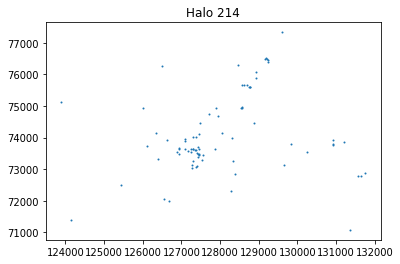

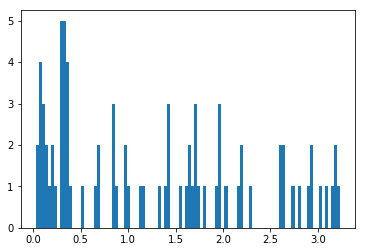

galaxies [1, 2, 3, 2, 0, 2, 2, 5, 9, 1, 1, 1, 2, 7, 2, 5, 9, 8, 6, 11]
blue galaxies counted [0, 1, 1, 1, 0, 0, 0, 1, 7, 1, 0, 0, 1, 6, 1, 5, 6, 7, 5, 8]
red galaxies counted [0, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0, 0, 1, 0, 1, 0, 2, 1, 1, 3]
red galaxies counted [1, 1, 1, 1, 0, 0, 2, 3, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0]
sum of galaxies: 79

Halo: 215
Halo Mass: 6548.455
N Subhalos from Illustris Algorithm: 502 192.88528895378113
R500c, R200c, R200m: 0.3102551281643222 0.4878854468551546 0.6428702981266742
before dev loop: 192.89193987846375
True
232118 232118 time 192.91181898117065
N Subhalos within 5*R200m: 68 192.94390296936035


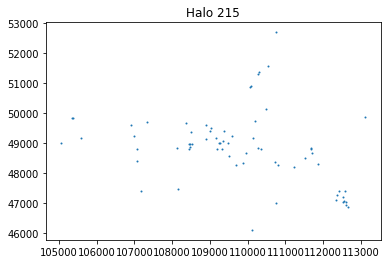

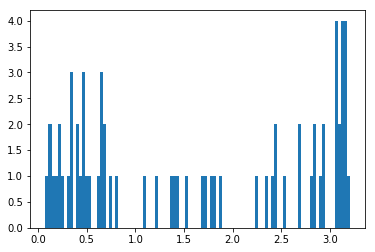

galaxies [1, 0, 1, 1, 1, 2, 2, 0, 4, 4, 4, 4, 4, 0, 1, 4, 4, 2, 6, 23]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 1, 3, 0, 1, 4, 0, 1, 4, 4, 1, 6, 15]
red galaxies counted [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 2]
red galaxies counted [0, 0, 1, 1, 1, 1, 2, 0, 2, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 6]
sum of galaxies: 68

Halo: 216
Halo Mass: 6460.399
N Subhalos from Illustris Algorithm: 578 193.8423228263855
R500c, R200c, R200m: 0.3440694869051597 0.5176669151166083 0.6262987976226632
before dev loop: 193.85808682441711
True
232118 232118 time 193.887375831604
N Subhalos within 5*R200m: 128 193.9450707435608


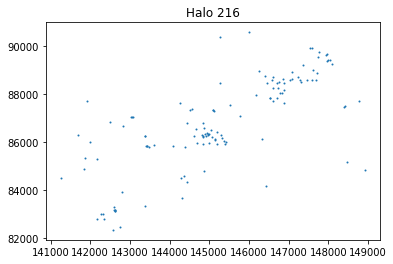

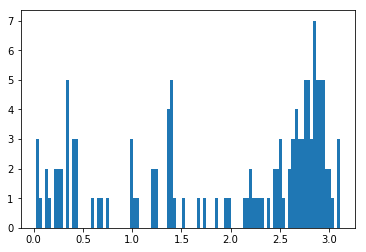

galaxies [1, 0, 0, 1, 2, 0, 2, 4, 5, 6, 0, 1, 3, 0, 5, 14, 3, 3, 17, 58]
blue galaxies counted [0, 0, 0, 0, 0, 0, 2, 1, 3, 5, 0, 1, 2, 0, 3, 14, 3, 2, 14, 24]
red galaxies counted [1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 10]
red galaxies counted [0, 0, 0, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 24]
sum of galaxies: 125

Halo: 217
Halo Mass: 6301.3247
N Subhalos from Illustris Algorithm: 430 194.6182758808136
R500c, R200c, R200m: 0.34407853469117694 0.5281512973880313 0.6543059790323534
before dev loop: 194.62402296066284
True
232118 232118 time 194.64159202575684
N Subhalos within 5*R200m: 56 194.68359184265137


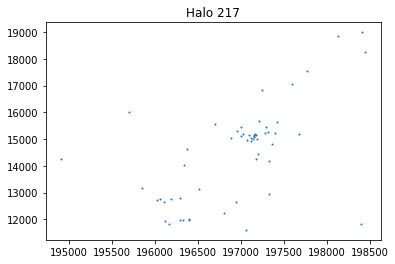

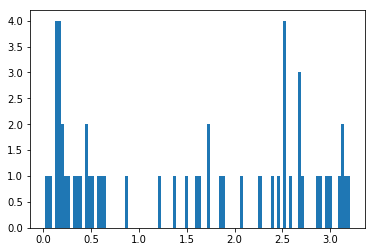

galaxies [1, 0, 0, 2, 5, 2, 2, 1, 2, 2, 3, 3, 0, 1, 1, 1, 5, 3, 10, 11]
blue galaxies counted [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 5, 3, 10, 8]
red galaxies counted [0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1]
red galaxies counted [1, 0, 0, 0, 2, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2]
sum of galaxies: 55

Halo: 218
Halo Mass: 6492.1763
N Subhalos from Illustris Algorithm: 561 195.5203619003296
R500c, R200c, R200m: 0.30844132730902335 0.47219562507440865 0.5923494627289179
before dev loop: 195.53152799606323
True
232118 232118 time 195.55028080940247
N Subhalos within 5*R200m: 55 195.58999490737915


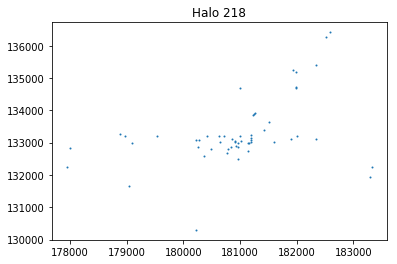

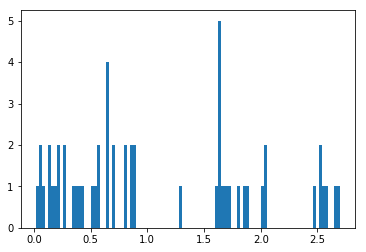

galaxies [1, 0, 1, 0, 2, 1, 3, 2, 0, 3, 2, 3, 6, 6, 0, 1, 6, 6, 3, 7]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 2, 3, 0, 1, 4, 6, 2, 7]
red galaxies counted [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0]
red galaxies counted [1, 0, 1, 0, 2, 0, 1, 2, 0, 2, 1, 3, 3, 2, 0, 0, 0, 0, 0, 0]
sum of galaxies: 53

Halo: 219
Halo Mass: 6306.617
N Subhalos from Illustris Algorithm: 425 196.1557698249817
R500c, R200c, R200m: 0.3360498656688607 0.5113882720685048 0.6433318553169082
before dev loop: 196.16086983680725
True
232118 232118 time 196.17766880989075
N Subhalos within 5*R200m: 79 196.25530791282654


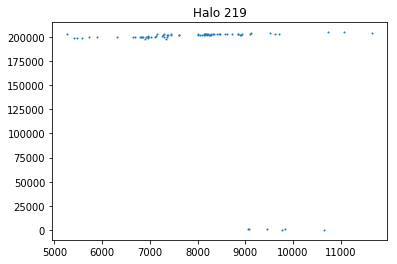

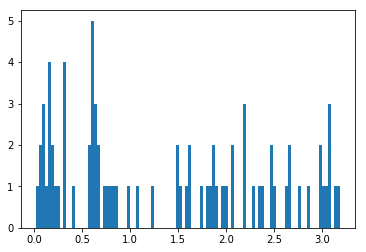

galaxies [0, 0, 3, 0, 5, 2, 1, 2, 3, 1, 0, 11, 5, 2, 1, 1, 7, 9, 9, 14]
blue galaxies counted [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 5, 3, 1, 1, 1, 5, 5, 9, 14]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0]
red galaxies counted [0, 0, 3, 0, 4, 1, 1, 2, 3, 0, 0, 5, 2, 1, 0, 0, 0, 3, 0, 0]
sum of galaxies: 76

Halo: 220
Halo Mass: 6206.4336
N Subhalos from Illustris Algorithm: 474 196.83095288276672
R500c, R200c, R200m: 0.34663489455111285 0.5180237021475187 0.6384376836672495
before dev loop: 196.83631992340088
True
232118 232118 time 196.85251569747925
N Subhalos within 5*R200m: 99 196.95767498016357


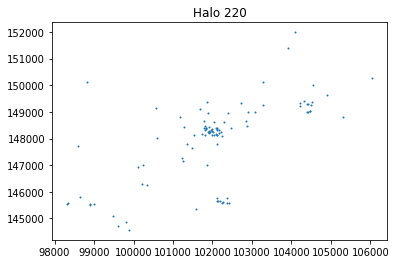

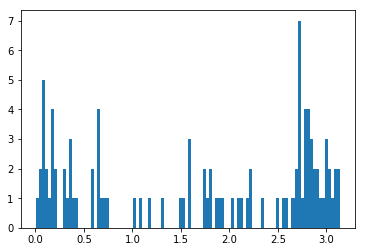

galaxies [2, 3, 1, 2, 2, 4, 1, 1, 5, 2, 0, 6, 3, 0, 3, 1, 8, 8, 7, 38]
blue galaxies counted [1, 1, 1, 0, 0, 1, 1, 0, 4, 1, 0, 1, 2, 0, 2, 0, 6, 5, 6, 30]
red galaxies counted [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 6]
red galaxies counted [1, 1, 0, 2, 1, 2, 0, 1, 1, 1, 0, 4, 1, 0, 1, 0, 0, 1, 1, 2]
sum of galaxies: 97

Halo: 221
Halo Mass: 6458.689
N Subhalos from Illustris Algorithm: 562 197.54325675964355
R500c, R200c, R200m: 0.27799194427757495 0.44422675663471173 0.5687975552781467
before dev loop: 197.5481300354004
True
232118 232118 time 197.56455397605896
N Subhalos within 5*R200m: 183 197.67504787445068


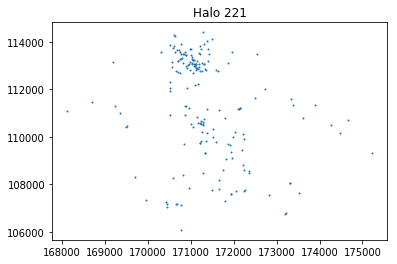

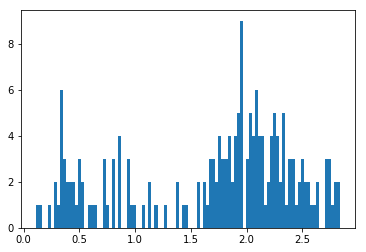

galaxies [0, 0, 0, 1, 1, 0, 0, 1, 3, 11, 5, 6, 5, 8, 5, 5, 6, 33, 57, 36]
blue galaxies counted [0, 0, 0, 1, 1, 0, 0, 1, 1, 5, 2, 4, 3, 6, 5, 3, 5, 16, 21, 21]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 1, 0, 0, 2, 0, 2, 1, 4, 9, 6]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 13, 27, 9]
sum of galaxies: 183

Halo: 222
Halo Mass: 6248.058
N Subhalos from Illustris Algorithm: 438 198.18040990829468
R500c, R200c, R200m: 0.33810691585088887 0.5101105725519537 0.6332734396084211
before dev loop: 198.1869969367981
True
232118 232118 time 198.20260977745056
N Subhalos within 5*R200m: 74 198.2566568851471


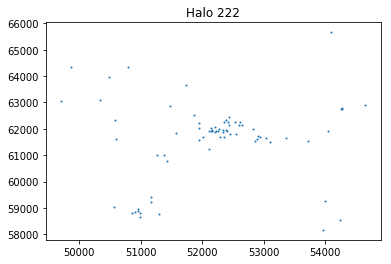

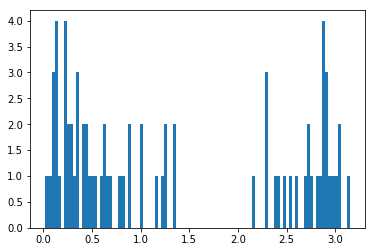

galaxies [0, 2, 2, 4, 1, 0, 5, 3, 4, 3, 4, 3, 3, 3, 3, 5, 0, 0, 8, 20]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 1, 0, 3, 1, 3, 0, 0, 8, 15]
red galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 0, 3, 1, 0, 0, 0, 0, 2, 0, 0, 0, 4]
red galaxies counted [0, 2, 2, 4, 0, 0, 3, 1, 2, 0, 1, 2, 3, 0, 2, 0, 0, 0, 0, 1]
sum of galaxies: 73

Halo: 223
Halo Mass: 6099.7847
N Subhalos from Illustris Algorithm: 524 198.84806776046753
R500c, R200c, R200m: 0.29669597992173596 0.4929715036303915 0.6178435214861884
before dev loop: 198.8553957939148
True
232118 232118 time 198.87049913406372
N Subhalos within 5*R200m: 103 198.94301581382751


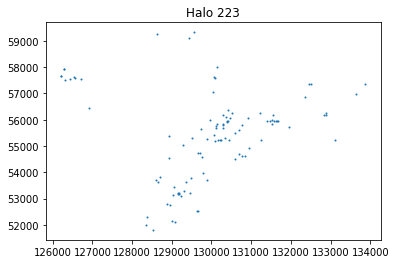

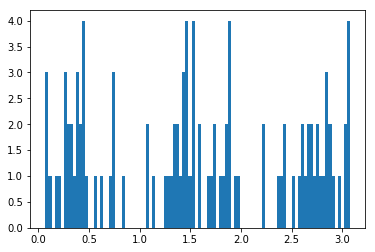

galaxies [1, 1, 1, 1, 0, 1, 1, 4, 3, 7, 4, 2, 4, 1, 3, 8, 16, 12, 7, 26]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 3, 3, 3, 2, 2, 3, 1, 2, 7, 9, 7, 5, 21]
red galaxies counted [0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 3, 1, 1, 5]
red galaxies counted [1, 0, 0, 0, 0, 1, 1, 0, 0, 3, 2, 0, 0, 0, 1, 0, 4, 4, 1, 0]
sum of galaxies: 103

Halo: 224
Halo Mass: 6104.093
N Subhalos from Illustris Algorithm: 499 199.5020728111267
R500c, R200c, R200m: 0.31905039687934345 0.4913570343086319 0.624103228238778
before dev loop: 199.50812578201294
True
232118 232118 time 199.53059792518616
N Subhalos within 5*R200m: 98 199.5797197818756


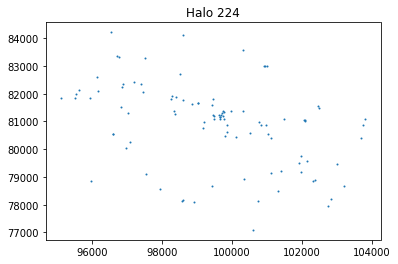

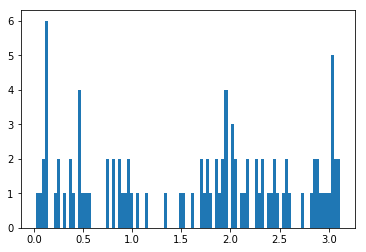

galaxies [0, 1, 2, 4, 2, 0, 2, 1, 1, 3, 6, 1, 2, 7, 4, 1, 5, 19, 15, 21]
blue galaxies counted [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 4, 1, 1, 3, 4, 1, 4, 12, 15, 20]
red galaxies counted [0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 6, 0, 1]
red galaxies counted [0, 0, 2, 3, 1, 0, 1, 0, 0, 1, 1, 0, 1, 4, 0, 0, 0, 1, 0, 0]
sum of galaxies: 97

Halo: 225
Halo Mass: 6161.1543
N Subhalos from Illustris Algorithm: 546 200.29308700561523
R500c, R200c, R200m: 0.3010629178636327 0.47783940179215134 0.6086834788672018
before dev loop: 200.30097579956055
True
232118 232118 time 200.31705689430237
N Subhalos within 5*R200m: 87 200.3529920578003


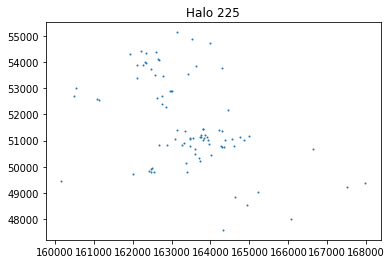

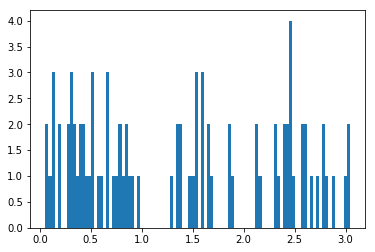

galaxies [1, 1, 0, 3, 0, 0, 2, 2, 5, 5, 3, 4, 5, 7, 1, 5, 10, 4, 15, 13]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 1, 2, 2, 3, 1, 4, 8, 4, 10, 13]
red galaxies counted [1, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 4, 0]
red galaxies counted [0, 0, 0, 1, 0, 0, 1, 1, 0, 4, 1, 2, 1, 3, 0, 0, 2, 0, 1, 0]
sum of galaxies: 86

Halo: 226
Halo Mass: 6017.781
N Subhalos from Illustris Algorithm: 532 200.9111578464508
R500c, R200c, R200m: 0.33531717515649473 0.507898589042993 0.6217982847336577
before dev loop: 200.91679000854492
True
232118 232118 time 200.93617582321167
N Subhalos within 5*R200m: 88 201.00307774543762


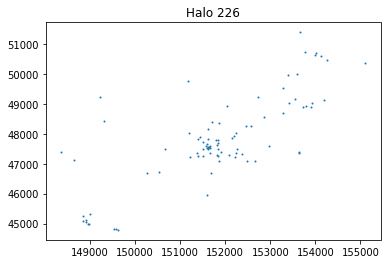

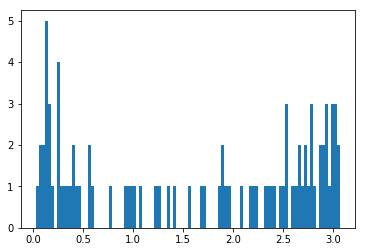

galaxies [1, 1, 1, 4, 3, 3, 1, 4, 2, 3, 2, 3, 1, 2, 3, 4, 3, 6, 12, 28]
blue galaxies counted [1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 2, 3, 4, 3, 5, 6, 24]
red galaxies counted [0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 4]
red galaxies counted [0, 0, 1, 1, 1, 3, 0, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0]
sum of galaxies: 87

Halo: 227
Halo Mass: 5872.5327
N Subhalos from Illustris Algorithm: 347 201.51472306251526
R500c, R200c, R200m: 0.3539511905451505 0.5181666651734815 0.6351285960520201
before dev loop: 201.52122378349304
True
232118 232118 time 201.5384488105774
N Subhalos within 5*R200m: 97 201.5711019039154


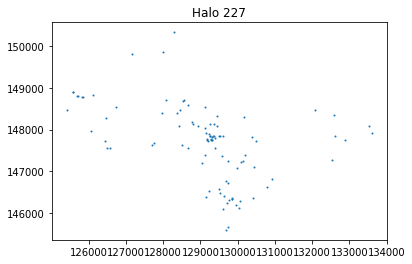

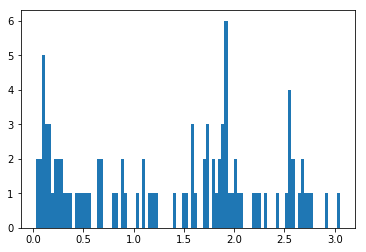

galaxies [1, 1, 4, 1, 4, 2, 2, 4, 3, 1, 3, 3, 3, 4, 5, 2, 11, 20, 12, 8]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 2, 2, 1, 2, 6, 16, 11, 6]
red galaxies counted [0, 0, 2, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 3, 1, 1, 2]
red galaxies counted [1, 1, 2, 0, 2, 2, 2, 3, 2, 0, 2, 0, 1, 1, 4, 0, 2, 3, 0, 0]
sum of galaxies: 94

Halo: 228
Halo Mass: 5981.5605
N Subhalos from Illustris Algorithm: 430 202.09050703048706
R500c, R200c, R200m: 0.3201286647762267 0.5126069207692353 0.6407156839865751
before dev loop: 202.0955159664154
True
232118 232118 time 202.110937833786
N Subhalos within 5*R200m: 97 202.15910601615906


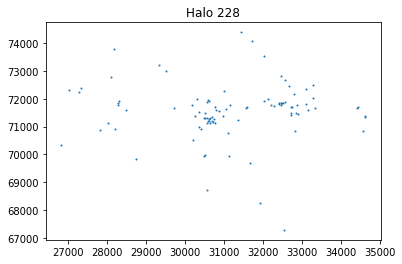

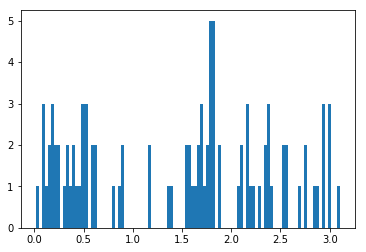

galaxies [0, 3, 0, 1, 2, 4, 2, 1, 3, 4, 7, 4, 1, 3, 2, 2, 14, 17, 14, 12]
blue galaxies counted [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 1, 1, 1, 1, 7, 10, 11, 9]
red galaxies counted [0, 1, 0, 1, 0, 3, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 3, 2, 2]
red galaxies counted [0, 1, 0, 0, 2, 1, 2, 1, 2, 3, 2, 0, 0, 2, 1, 0, 5, 4, 1, 1]
sum of galaxies: 96

Halo: 229
Halo Mass: 5935.54
N Subhalos from Illustris Algorithm: 408 202.6897840499878
R500c, R200c, R200m: 0.34547861952566933 0.5155939312229215 0.6285914505512025
before dev loop: 202.69659280776978
True
232118 232118 time 202.714745759964
N Subhalos within 5*R200m: 58 202.75317978858948


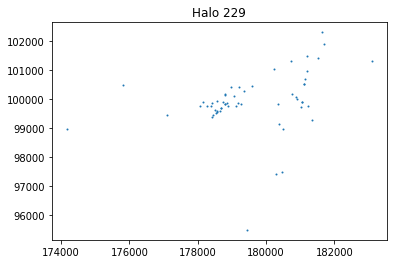

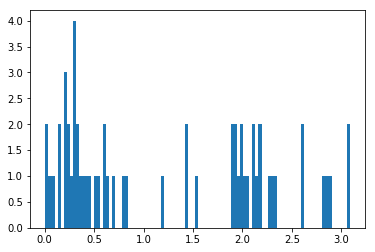

galaxies [1, 0, 0, 1, 1, 2, 3, 3, 5, 2, 2, 4, 1, 2, 0, 2, 2, 10, 7, 7]
blue galaxies counted [0, 0, 0, 0, 0, 1, 1, 3, 2, 1, 0, 1, 1, 0, 0, 2, 1, 7, 7, 7]
red galaxies counted [0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
red galaxies counted [1, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 3, 0, 2, 0, 0, 0, 2, 0, 0]
sum of galaxies: 55

Halo: 230
Halo Mass: 5808.349
N Subhalos from Illustris Algorithm: 398 203.2551770210266
R500c, R200c, R200m: 0.338700066282887 0.5111280080999289 0.6324279920636765
before dev loop: 203.26059794425964
True
232118 232118 time 203.27586674690247
N Subhalos within 5*R200m: 57 203.3110749721527


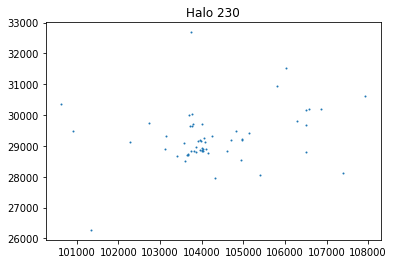

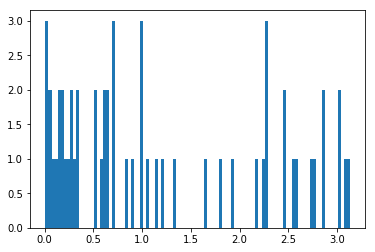

galaxies [0, 1, 1, 1, 1, 2, 2, 2, 3, 0, 2, 5, 3, 2, 5, 2, 1, 2, 9, 8]
blue galaxies counted [0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 4, 0, 1, 5, 2, 1, 2, 6, 8]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0]
red galaxies counted [0, 1, 1, 1, 1, 1, 0, 2, 2, 0, 1, 1, 3, 1, 0, 0, 0, 0, 0, 0]
sum of galaxies: 52

Halo: 231
Halo Mass: 5988.988
N Subhalos from Illustris Algorithm: 474 203.82238101959229
R500c, R200c, R200m: 0.32520951707278106 0.49848961220517773 0.626345677965257
before dev loop: 203.82752585411072
True
232118 232118 time 203.84311604499817
N Subhalos within 5*R200m: 74 203.90678882598877


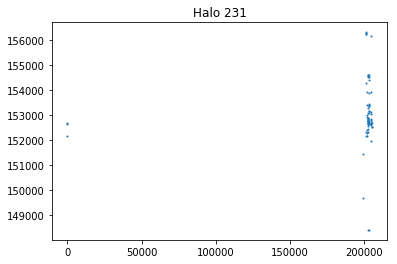

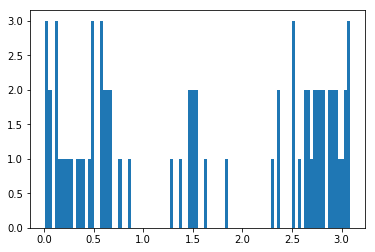

galaxies [0, 0, 1, 2, 1, 1, 2, 1, 2, 1, 4, 7, 3, 1, 0, 2, 7, 1, 7, 26]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 4, 1, 1, 0, 1, 6, 1, 7, 19]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 3]
red galaxies counted [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 4]
sum of galaxies: 69

Halo: 232
Halo Mass: 6047.211
N Subhalos from Illustris Algorithm: 410 204.58843183517456
R500c, R200c, R200m: 0.32095057206354594 0.48856094815369033 0.6087796416194736
before dev loop: 204.5958547592163
True
232118 232118 time 204.61038994789124
N Subhalos within 5*R200m: 91 204.64988493919373


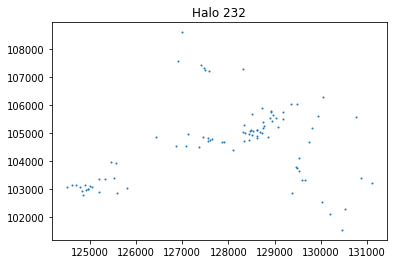

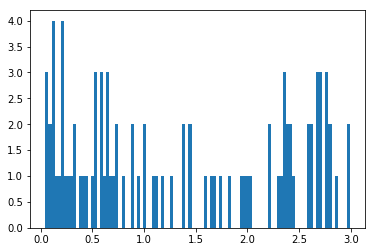

galaxies [1, 2, 0, 4, 1, 1, 5, 1, 3, 2, 2, 7, 7, 3, 5, 3, 6, 6, 12, 18]
blue galaxies counted [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 2, 1, 2, 2, 3, 6, 12, 11]
red galaxies counted [0, 1, 0, 3, 0, 0, 1, 0, 1, 0, 0, 1, 2, 1, 0, 1, 2, 0, 0, 3]
red galaxies counted [1, 0, 0, 1, 1, 1, 4, 1, 2, 1, 2, 2, 3, 1, 3, 0, 1, 0, 0, 4]
sum of galaxies: 89

Halo: 233
Halo Mass: 6026.4443
N Subhalos from Illustris Algorithm: 597 205.1640660762787
R500c, R200c, R200m: 0.27941981302134156 0.43607834456824685 0.5426424876937487
before dev loop: 205.1698911190033
True
232118 232118 time 205.18520188331604
N Subhalos within 5*R200m: 81 205.23091411590576


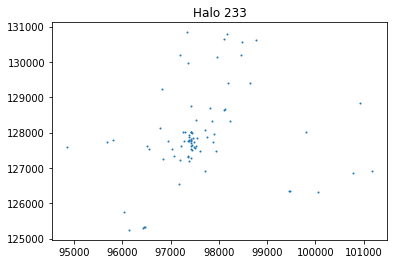

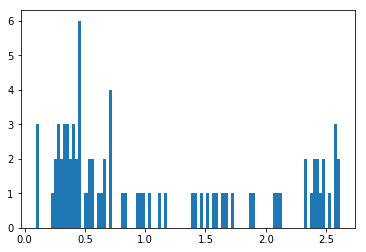

galaxies [0, 0, 1, 2, 0, 0, 0, 3, 4, 9, 9, 5, 6, 6, 3, 3, 3, 6, 5, 16]
blue galaxies counted [0, 0, 1, 2, 0, 0, 0, 2, 2, 5, 7, 5, 4, 5, 3, 3, 2, 6, 3, 11]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 0, 1, 0, 1, 2]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 3]
sum of galaxies: 81

Halo: 234
Halo Mass: 5898.1113
N Subhalos from Illustris Algorithm: 540 205.72973680496216
R500c, R200c, R200m: 0.27305015164797153 0.47641449559778865 0.6114901741517654
before dev loop: 205.73491501808167
True
232118 232118 time 205.75115585327148
N Subhalos within 5*R200m: 99 205.81598281860352


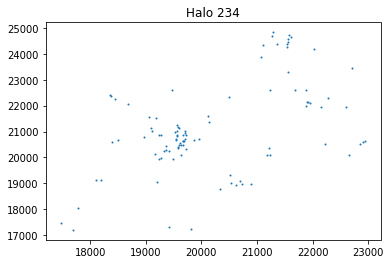

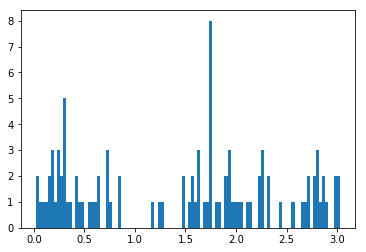

galaxies [0, 1, 1, 0, 3, 2, 3, 5, 5, 3, 2, 4, 5, 2, 0, 3, 10, 20, 10, 18]
blue galaxies counted [0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 3, 4, 2, 0, 3, 8, 16, 9, 8]
red galaxies counted [0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 3]
red galaxies counted [0, 1, 1, 0, 2, 1, 2, 4, 4, 0, 1, 1, 1, 0, 0, 0, 1, 2, 0, 7]
sum of galaxies: 97

Halo: 235
Halo Mass: 5762.2583
N Subhalos from Illustris Algorithm: 363 206.32366490364075
R500c, R200c, R200m: 0.3406499042040559 0.507056384288812 0.6250168144198118
before dev loop: 206.32959270477295
True
232118 232118 time 206.34676098823547
N Subhalos within 5*R200m: 41 206.36687207221985


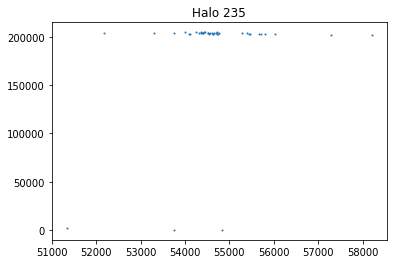

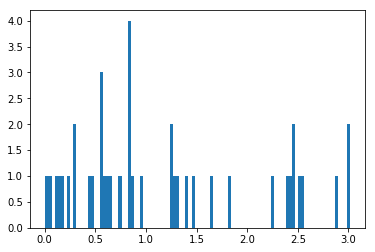

galaxies [0, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 6, 1, 6, 0, 5, 2, 1, 7, 3]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 5, 2, 1, 7, 3]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 1, 3, 1, 4, 0, 0, 0, 0, 0, 0]
sum of galaxies: 39

Halo: 236
Halo Mass: 5933.0864
N Subhalos from Illustris Algorithm: 460 206.8802638053894
R500c, R200c, R200m: 0.34137416746440136 0.5055807944789721 0.6240099079325558
before dev loop: 206.88545393943787
True
232118 232118 time 206.9020800590515
N Subhalos within 5*R200m: 51 206.9246950149536


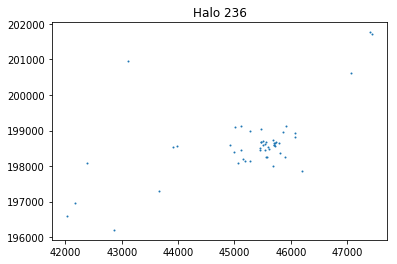

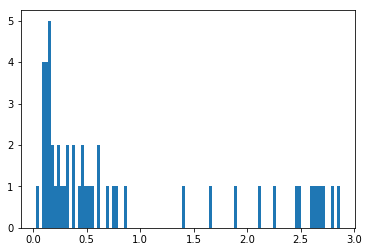

galaxies [0, 1, 3, 2, 6, 3, 3, 1, 3, 3, 4, 3, 3, 1, 0, 1, 1, 1, 4, 7]
blue galaxies counted [0, 0, 3, 1, 1, 0, 1, 0, 0, 1, 2, 1, 3, 1, 0, 1, 1, 1, 4, 5]
red galaxies counted [0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
red galaxies counted [0, 1, 0, 1, 4, 1, 2, 1, 3, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 50

Halo: 237
Halo Mass: 5817.067
N Subhalos from Illustris Algorithm: 352 207.4282989501953
R500c, R200c, R200m: 0.3329849481727428 0.49484647712743535 0.6126877647310576
before dev loop: 207.4333770275116
True
232118 232118 time 207.44932675361633
N Subhalos within 5*R200m: 83 207.47983384132385


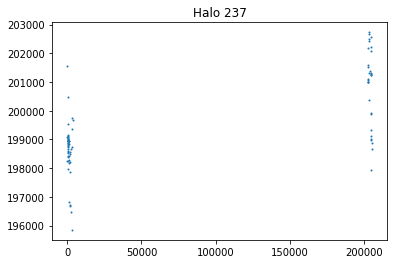

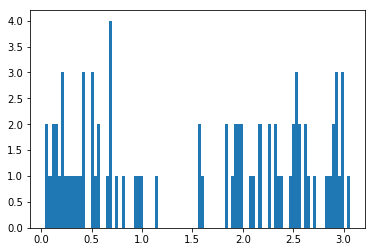

galaxies [0, 1, 1, 1, 2, 1, 3, 2, 2, 4, 4, 3, 6, 2, 3, 0, 3, 9, 13, 21]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 3, 1, 1, 0, 3, 9, 11, 18]
red galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 1, 2]
red galaxies counted [0, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 1, 1, 0, 0, 0, 0, 1, 1]
sum of galaxies: 81

Halo: 238
Halo Mass: 6075.759
N Subhalos from Illustris Algorithm: 483 207.9909029006958
R500c, R200c, R200m: 0.3247952205524292 0.5100236177235047 0.6267836548636141
before dev loop: 207.99778580665588
True
232118 232118 time 208.0134298801422
N Subhalos within 5*R200m: 52 208.03286290168762


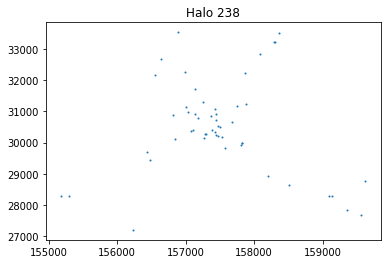

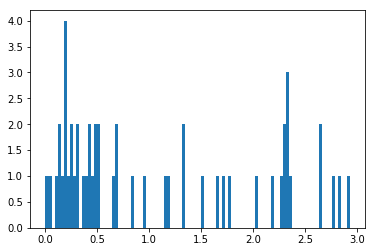

galaxies [0, 0, 1, 1, 2, 4, 2, 2, 2, 4, 5, 1, 2, 2, 1, 3, 3, 2, 8, 5]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 1, 3, 1, 1, 2, 1, 1, 2, 3, 1, 6, 4]
red galaxies counted [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1]
red galaxies counted [0, 0, 1, 1, 1, 3, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0]
sum of galaxies: 50

Halo: 239
Halo Mass: 5867.49
N Subhalos from Illustris Algorithm: 460 208.7295217514038
R500c, R200c, R200m: 0.3094656087481886 0.5116804434948494 0.6330491666116572
before dev loop: 208.73668789863586
True
232118 232118 time 208.75334405899048
N Subhalos within 5*R200m: 72 208.78361082077026


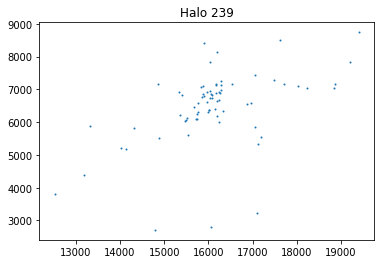

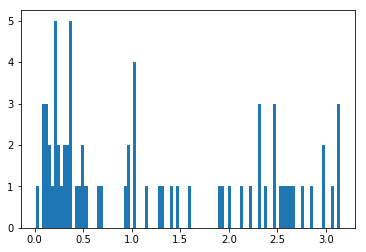

galaxies [0, 3, 1, 3, 1, 2, 4, 3, 5, 5, 4, 1, 1, 3, 5, 3, 2, 4, 10, 11]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 2, 4, 9, 9]
red galaxies counted [0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 3, 0, 0, 0, 0, 1]
red galaxies counted [0, 2, 1, 2, 1, 2, 3, 3, 4, 1, 4, 1, 1, 0, 1, 1, 0, 0, 1, 1]
sum of galaxies: 71

Halo: 240
Halo Mass: 5920.739
N Subhalos from Illustris Algorithm: 443 209.280131816864
R500c, R200c, R200m: 0.32248487239636947 0.4936577741963548 0.6292485360020924
before dev loop: 209.28547501564026
True
232118 232118 time 209.301696062088
N Subhalos within 5*R200m: 68 209.3352038860321


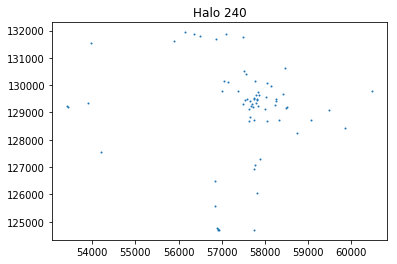

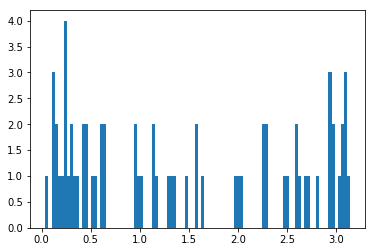

galaxies [0, 0, 1, 2, 2, 1, 4, 3, 3, 2, 3, 5, 0, 2, 5, 3, 4, 3, 7, 17]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 3, 3, 3, 3, 7, 15]
red galaxies counted [0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0]
red galaxies counted [0, 0, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 2]
sum of galaxies: 67

Halo: 241
Halo Mass: 5835.177
N Subhalos from Illustris Algorithm: 466 209.85974597930908
R500c, R200c, R200m: 0.34901314113675336 0.519944635194774 0.634574519244592
before dev loop: 209.8652379512787
True
232118 232118 time 209.87990975379944
N Subhalos within 5*R200m: 66 209.90750575065613


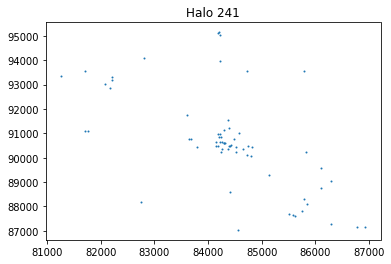

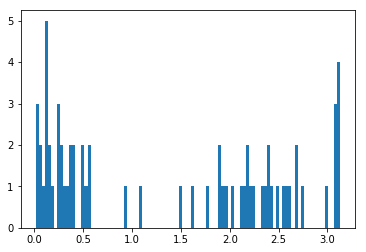

galaxies [0, 0, 2, 4, 2, 1, 3, 2, 2, 4, 3, 2, 0, 1, 1, 0, 2, 7, 13, 12]
blue galaxies counted [0, 0, 0, 3, 2, 1, 1, 1, 0, 3, 2, 2, 0, 1, 1, 0, 2, 7, 11, 12]
red galaxies counted [0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0]
red galaxies counted [0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 61

Halo: 242
Halo Mass: 5958.2607
N Subhalos from Illustris Algorithm: 521 210.41562294960022
R500c, R200c, R200m: 0.32684578515332996 0.5150684390137957 0.6334359794811204
before dev loop: 210.420964717865
True
232118 232118 time 210.43636298179626
N Subhalos within 5*R200m: 45 210.45821905136108


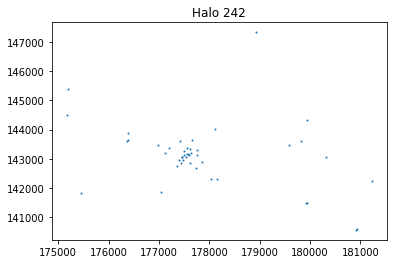

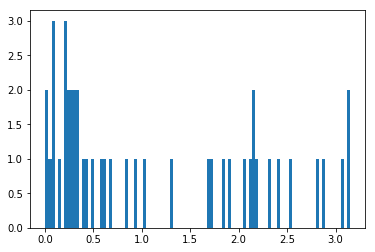

galaxies [0, 0, 3, 1, 0, 0, 4, 5, 2, 2, 1, 2, 1, 2, 1, 1, 2, 4, 6, 5]
blue galaxies counted [0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 2, 2, 5, 5]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0]
red galaxies counted [0, 0, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 42

Halo: 243
Halo Mass: 6006.727
N Subhalos from Illustris Algorithm: 547 210.96992373466492
R500c, R200c, R200m: 0.2796311148558506 0.43533446442671353 0.5498146596627328
before dev loop: 210.97494077682495
True
232118 232118 time 210.9903268814087
N Subhalos within 5*R200m: 123 211.02716493606567


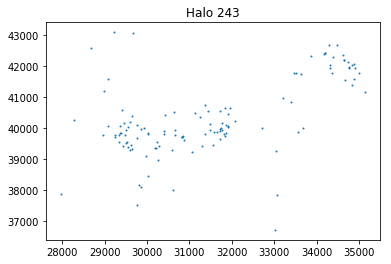

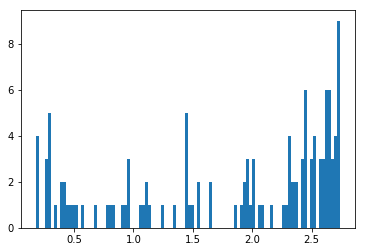

galaxies [0, 0, 0, 0, 0, 1, 3, 0, 8, 1, 5, 3, 2, 3, 5, 6, 8, 4, 14, 60]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 3, 2, 0, 2, 0, 6, 7, 3, 11, 17]
red galaxies counted [0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 1, 1, 1, 1, 3, 0, 1, 1, 2, 16]
red galaxies counted [0, 0, 0, 0, 0, 1, 1, 0, 3, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 27]
sum of galaxies: 123

Halo: 244
Halo Mass: 5836.6006
N Subhalos from Illustris Algorithm: 555 211.5128688812256
R500c, R200c, R200m: 0.2649184739821934 0.44493728807822575 0.5668882322217985
before dev loop: 211.51985478401184
True
232118 232118 time 211.53850078582764
N Subhalos within 5*R200m: 72 211.57142877578735


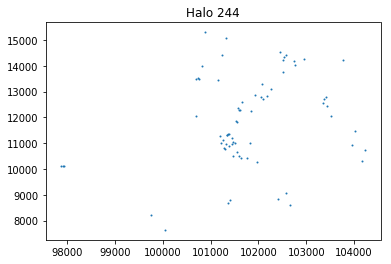

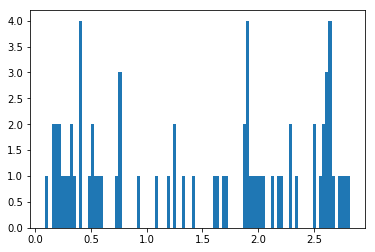

galaxies [0, 0, 1, 0, 2, 1, 3, 1, 4, 5, 0, 6, 0, 4, 1, 4, 2, 10, 10, 18]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 3, 0, 3, 1, 3, 2, 9, 9, 15]
red galaxies counted [0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 3]
red galaxies counted [0, 0, 0, 0, 0, 0, 3, 1, 3, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 72

Halo: 245
Halo Mass: 5983.657
N Subhalos from Illustris Algorithm: 609 212.12457084655762
R500c, R200c, R200m: 0.2623690400823504 0.408838463454161 0.5164104338593012
before dev loop: 212.131032705307
True
232118 232118 time 212.1470878124237
N Subhalos within 5*R200m: 61 212.16787099838257


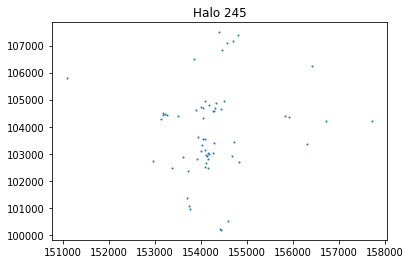

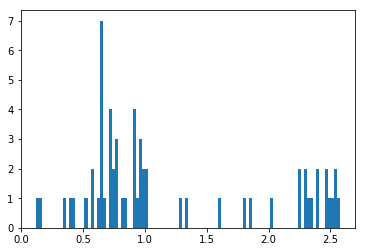

galaxies [0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 1, 10, 10, 9, 5, 2, 1, 3, 15]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 5, 4, 3, 1, 1, 3, 14]
red galaxies counted [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 3, 1, 1, 0, 1, 0, 0, 1]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 5, 4, 4, 2, 0, 0, 0, 0]
sum of galaxies: 61

Halo: 246
Halo Mass: 5942.5854
N Subhalos from Illustris Algorithm: 517 212.94065475463867
R500c, R200c, R200m: 0.23638431908867535 0.38892076339846926 0.5125963917085161
before dev loop: 212.95009088516235
True
232118 232118 time 212.96673583984375
N Subhalos within 5*R200m: 49 212.9982168674469


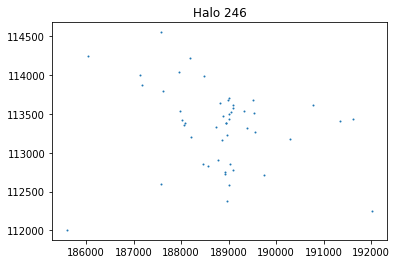

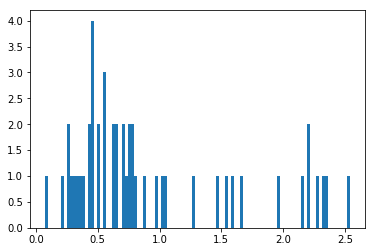

galaxies [0, 0, 1, 0, 0, 0, 0, 1, 3, 3, 3, 6, 6, 8, 2, 3, 1, 4, 1, 7]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 4, 3, 5, 1, 3, 0, 4, 1, 7]
red galaxies counted [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0]
sum of galaxies: 49

Halo: 247
Halo Mass: 5637.5234
N Subhalos from Illustris Algorithm: 445 213.54962587356567
R500c, R200c, R200m: 0.3296730381286894 0.5019103959398237 0.6218595774787569
before dev loop: 213.5584888458252
True
232118 232118 time 213.57986402511597
N Subhalos within 5*R200m: 90 213.61494183540344


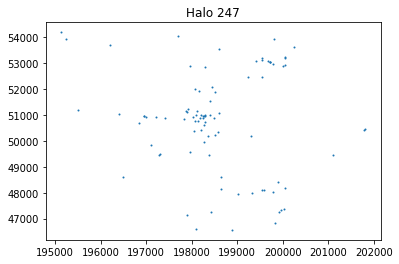

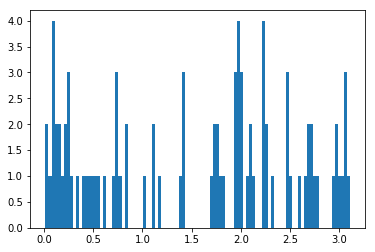

galaxies [1, 3, 1, 2, 2, 1, 4, 2, 1, 2, 3, 2, 5, 2, 3, 3, 3, 18, 13, 17]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 3, 2, 3, 10, 11, 16]
red galaxies counted [1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 3, 0, 1]
red galaxies counted [0, 2, 1, 2, 2, 0, 3, 2, 1, 1, 1, 1, 3, 0, 0, 1, 0, 5, 2, 0]
sum of galaxies: 88

Halo: 248
Halo Mass: 5912.9204
N Subhalos from Illustris Algorithm: 502 214.17769193649292
R500c, R200c, R200m: 0.3020246254552539 0.4751767904981899 0.5955262364822579
before dev loop: 214.18368792533875
True
232118 232118 time 214.19910287857056
N Subhalos within 5*R200m: 74 214.24147510528564


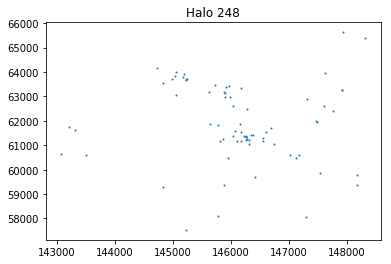

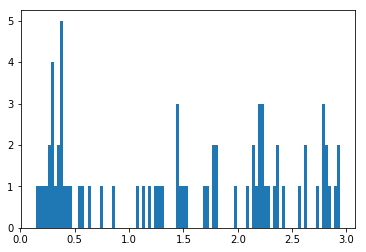

galaxies [0, 0, 0, 0, 1, 1, 1, 3, 5, 8, 2, 3, 1, 1, 1, 5, 6, 7, 16, 13]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 1, 1, 0, 2, 6, 6, 11, 12]
red galaxies counted [0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1]
red galaxies counted [0, 0, 0, 0, 1, 0, 0, 1, 3, 6, 2, 1, 0, 0, 0, 1, 0, 0, 4, 0]
sum of galaxies: 74

Halo: 249
Halo Mass: 5765.9287
N Subhalos from Illustris Algorithm: 430 214.74585390090942
R500c, R200c, R200m: 0.322365990092926 0.49229788395107177 0.6124717788657342
before dev loop: 214.75146389007568
True
232118 232118 time 214.7668149471283
N Subhalos within 5*R200m: 87 214.78956389427185


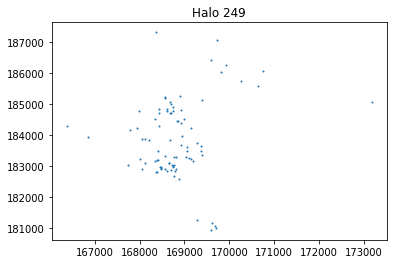

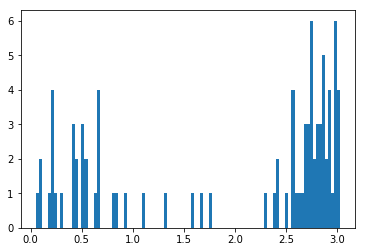

galaxies [0, 0, 2, 0, 0, 1, 5, 0, 1, 2, 6, 2, 5, 3, 1, 1, 2, 1, 5, 49]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 1, 4, 2, 1, 1, 2, 1, 3, 16]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 9]
red galaxies counted [0, 0, 2, 0, 0, 1, 4, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 24]
sum of galaxies: 86

Halo: 250
Halo Mass: 5850.727
N Subhalos from Illustris Algorithm: 512 215.32595992088318
R500c, R200c, R200m: 0.28499963470296674 0.47289826973099613 0.6134501808235908
before dev loop: 215.3324737548828
True
232118 232118 time 215.34737491607666
N Subhalos within 5*R200m: 98 215.37279272079468


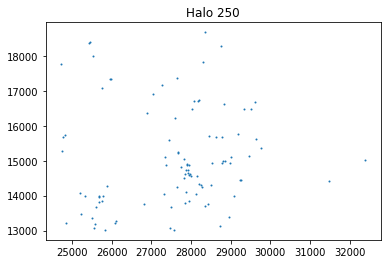

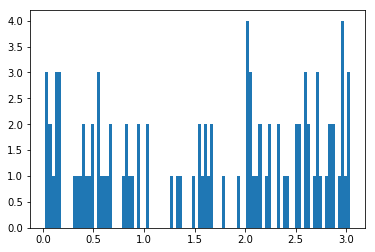

galaxies [1, 1, 1, 2, 4, 0, 0, 0, 2, 4, 3, 6, 2, 6, 3, 3, 9, 9, 13, 26]
blue galaxies counted [0, 1, 0, 1, 0, 0, 0, 0, 1, 3, 1, 0, 1, 4, 3, 3, 9, 9, 10, 23]
red galaxies counted [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1]
red galaxies counted [1, 0, 1, 1, 3, 0, 0, 0, 1, 1, 1, 4, 1, 2, 0, 0, 0, 0, 2, 2]
sum of galaxies: 95

Halo: 251
Halo Mass: 5730.689
N Subhalos from Illustris Algorithm: 498 215.94998502731323
R500c, R200c, R200m: 0.3173211888198607 0.46930289575377837 0.5729271890093477
before dev loop: 215.95559191703796
True
232118 232118 time 215.97048091888428
N Subhalos within 5*R200m: 78 215.9948308467865


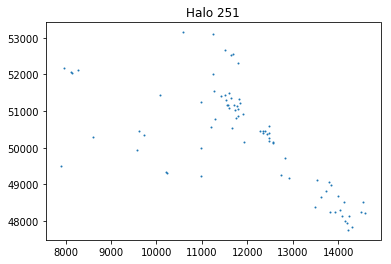

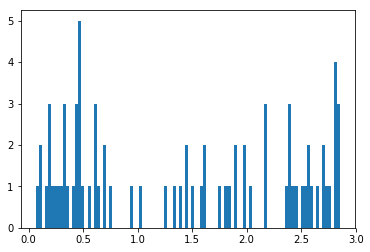

galaxies [1, 0, 1, 1, 1, 0, 4, 2, 3, 2, 9, 2, 6, 1, 2, 1, 6, 7, 6, 23]
blue galaxies counted [1, 0, 1, 1, 1, 0, 3, 1, 2, 0, 2, 2, 1, 0, 2, 1, 5, 7, 6, 18]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 1, 0, 0, 0, 1, 0, 0, 3]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 4, 0, 4, 1, 0, 0, 0, 0, 0, 2]
sum of galaxies: 78

Halo: 252
Halo Mass: 5580.8857
N Subhalos from Illustris Algorithm: 395 216.50389981269836
R500c, R200c, R200m: 0.32492627332909946 0.5057477381413258 0.6250326280281163
before dev loop: 216.51235103607178
True
232118 232118 time 216.5326189994812
N Subhalos within 5*R200m: 45 216.56723999977112


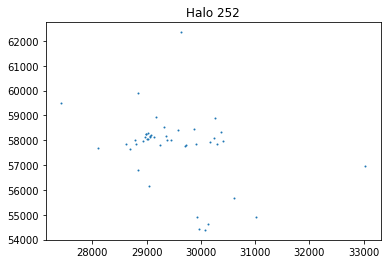

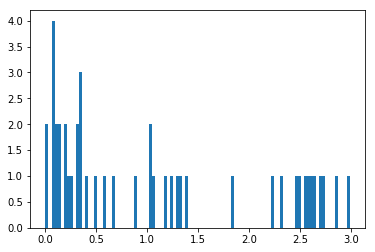

galaxies [2, 2, 2, 2, 0, 2, 2, 0, 5, 1, 1, 1, 1, 1, 3, 5, 0, 1, 5, 7]
blue galaxies counted [0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 4, 0, 1, 5, 7]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
red galaxies counted [2, 1, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
sum of galaxies: 43

Halo: 253
Halo Mass: 5553.335
N Subhalos from Illustris Algorithm: 329 217.28888487815857
R500c, R200c, R200m: 0.3330540476358657 0.5097209172364409 0.6290327503090262
before dev loop: 217.2963969707489
True
232118 232118 time 217.31201791763306
N Subhalos within 5*R200m: 107 217.34715580940247


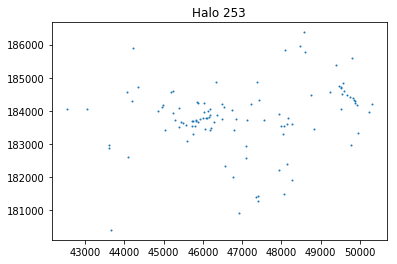

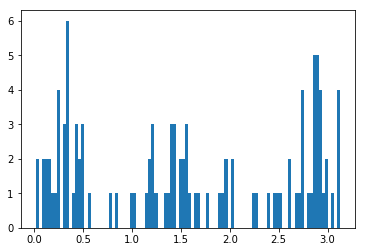

galaxies [0, 2, 1, 1, 2, 1, 2, 4, 8, 4, 5, 1, 1, 1, 3, 12, 12, 7, 6, 32]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 1, 9, 10, 6, 6, 17]
red galaxies counted [0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 2, 0, 0, 9]
red galaxies counted [0, 1, 1, 0, 1, 1, 2, 2, 4, 3, 4, 0, 1, 0, 1, 1, 0, 1, 0, 6]
sum of galaxies: 105

Halo: 254
Halo Mass: 5788.7324
N Subhalos from Illustris Algorithm: 548 217.9491138458252
R500c, R200c, R200m: 0.2366688839692533 0.3846282695189578 0.48656106716826675
before dev loop: 217.95629692077637
True
232118 232118 time 217.97811889648438
N Subhalos within 5*R200m: 74 218.00578093528748


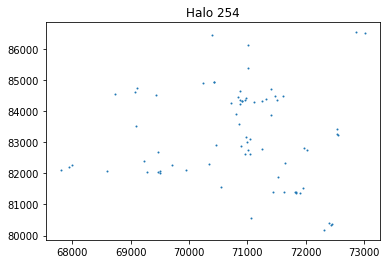

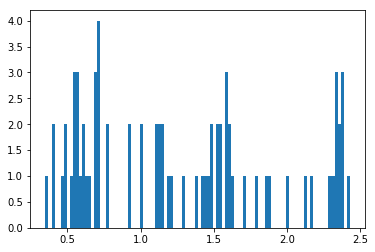

galaxies [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 10, 9, 2, 4, 9, 16, 4, 14]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 5, 6, 2, 4, 9, 14, 4, 12]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 2, 0, 2]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 1, 0, 0, 0, 0, 0, 0]
sum of galaxies: 74

Halo: 255
Halo Mass: 5561.3896
N Subhalos from Illustris Algorithm: 436 218.61785173416138
R500c, R200c, R200m: 0.3457409652857182 0.5098926650329629 0.6191966459091842
before dev loop: 218.6231129169464
True
232118 232118 time 218.6385200023651
N Subhalos within 5*R200m: 101 218.72652077674866


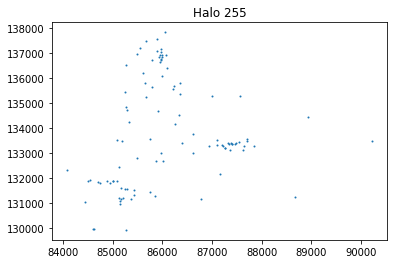

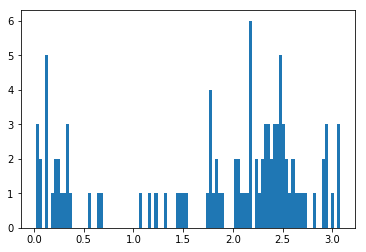

galaxies [1, 1, 0, 5, 0, 1, 3, 2, 4, 1, 0, 1, 2, 0, 1, 3, 4, 15, 36, 18]
blue galaxies counted [0, 0, 0, 2, 0, 0, 1, 2, 3, 0, 0, 1, 2, 0, 1, 3, 4, 15, 21, 12]
red galaxies counted [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 2]
red galaxies counted [1, 1, 0, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 8, 4]
sum of galaxies: 98

Halo: 256
Halo Mass: 5481.364
N Subhalos from Illustris Algorithm: 356 219.29477500915527
R500c, R200c, R200m: 0.32691584544328656 0.5017217135703578 0.6232241917893055
before dev loop: 219.30014371871948
True
232118 232118 time 219.31476998329163
N Subhalos within 5*R200m: 54 219.36468195915222


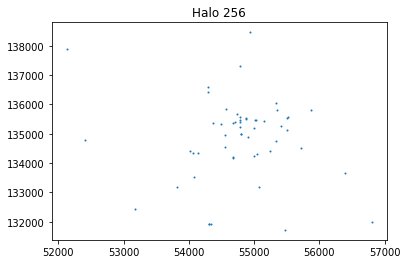

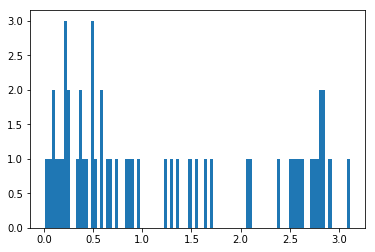

galaxies [0, 0, 2, 1, 1, 2, 2, 2, 1, 4, 3, 4, 2, 4, 0, 3, 4, 1, 5, 11]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 2, 2, 0, 2, 0, 3, 3, 1, 4, 9]
red galaxies counted [0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0]
red galaxies counted [0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2]
sum of galaxies: 52

Halo: 257
Halo Mass: 5675.715
N Subhalos from Illustris Algorithm: 517 219.94618582725525
R500c, R200c, R200m: 0.2682229776527371 0.4305267271576356 0.5354700755180561
before dev loop: 219.9527187347412
True
232118 232118 time 219.97134590148926
N Subhalos within 5*R200m: 96 220.0651319026947


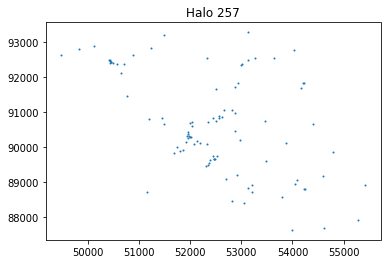

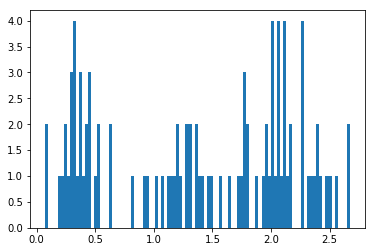

galaxies [0, 1, 1, 0, 0, 0, 1, 3, 4, 7, 7, 3, 2, 1, 2, 7, 11, 8, 23, 15]
blue galaxies counted [0, 1, 1, 0, 0, 0, 1, 2, 2, 4, 4, 1, 1, 1, 2, 7, 8, 6, 17, 11]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 3, 2, 2, 3]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 4, 1]
sum of galaxies: 96

Halo: 258
Halo Mass: 5698.162
N Subhalos from Illustris Algorithm: 417 220.63206887245178
R500c, R200c, R200m: 0.26058976894138725 0.4071157409758057 0.5266666197577229
before dev loop: 220.6416838169098
True
232118 232118 time 220.66572499275208
N Subhalos within 5*R200m: 40 220.70943093299866


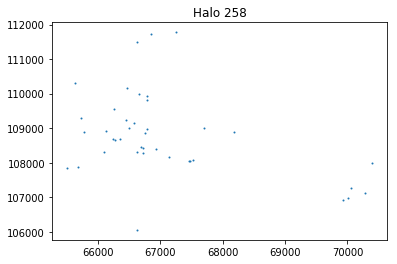

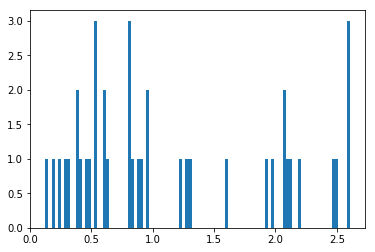

galaxies [0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 3, 5, 3, 3, 5, 0, 3, 1, 6, 6]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 3, 2, 2, 3, 0, 1, 1, 6, 3]
red galaxies counted [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2]
sum of galaxies: 40

Halo: 259
Halo Mass: 5570.5083
N Subhalos from Illustris Algorithm: 352 221.2979760169983
R500c, R200c, R200m: 0.32082688562593403 0.499689885092714 0.6198705858641151
before dev loop: 221.30423784255981
True
232118 232118 time 221.32278394699097
N Subhalos within 5*R200m: 34 221.34964084625244


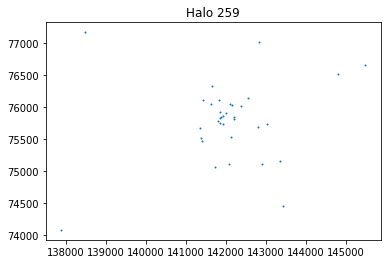

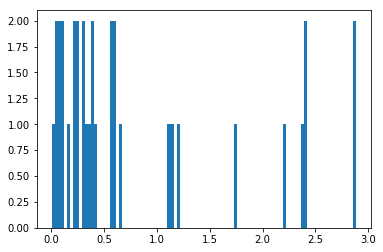

galaxies [0, 2, 2, 0, 0, 1, 2, 2, 4, 3, 0, 4, 1, 0, 2, 1, 0, 1, 4, 2]
blue galaxies counted [0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 0, 2, 1, 0, 1, 4, 2]
red galaxies counted [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 2, 0, 0, 1, 0, 2, 2, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 31

Halo: 260
Halo Mass: 5686.5054
N Subhalos from Illustris Algorithm: 460 222.18251180648804
R500c, R200c, R200m: 0.26082509144673854 0.4081524330949062 0.5256688010909355
before dev loop: 222.19108986854553
True
232118 232118 time 222.20857501029968
N Subhalos within 5*R200m: 44 222.27535676956177


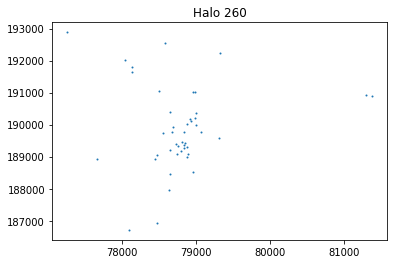

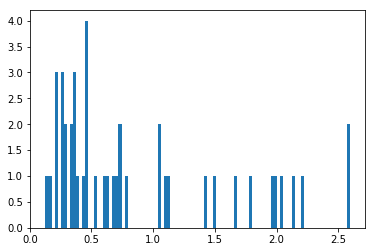

galaxies [0, 0, 0, 0, 1, 1, 2, 2, 4, 5, 3, 4, 2, 5, 0, 4, 1, 2, 5, 3]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 5, 3]
red galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 4, 5, 2, 3, 2, 2, 0, 2, 0, 0, 0, 0]
sum of galaxies: 44

Halo: 261
Halo Mass: 5498.938
N Subhalos from Illustris Algorithm: 455 222.89272594451904
R500c, R200c, R200m: 0.30720946723932957 0.498134866931289 0.6184671381357048
before dev loop: 222.90149402618408
True
232118 232118 time 222.91830611228943
N Subhalos within 5*R200m: 84 222.97610688209534


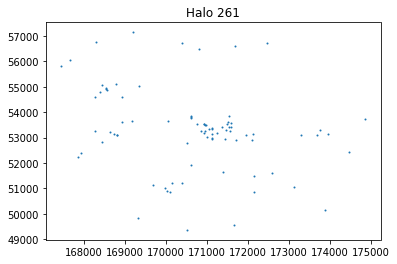

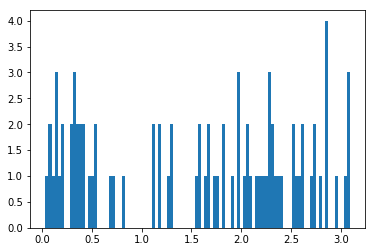

galaxies [1, 1, 0, 2, 3, 0, 2, 0, 6, 5, 2, 2, 2, 1, 2, 5, 7, 11, 14, 17]
blue galaxies counted [0, 0, 0, 0, 2, 0, 0, 0, 4, 2, 1, 1, 2, 1, 2, 3, 7, 8, 12, 13]
red galaxies counted [1, 0, 0, 1, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2]
red galaxies counted [0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2]
sum of galaxies: 83

Halo: 262
Halo Mass: 5504.6484
N Subhalos from Illustris Algorithm: 541 223.55676794052124
R500c, R200c, R200m: 0.2849685679686774 0.48359487462931056 0.5980243862498527
before dev loop: 223.56173992156982
True
232118 232118 time 223.577162027359
N Subhalos within 5*R200m: 62 223.59744095802307


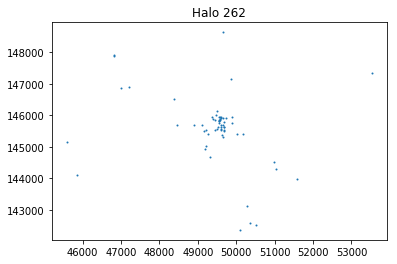

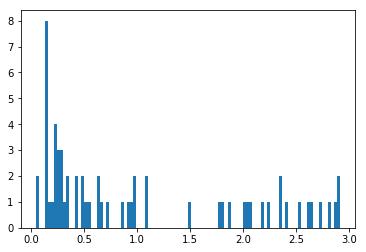

galaxies [0, 0, 0, 0, 8, 1, 5, 3, 6, 0, 5, 1, 4, 2, 5, 0, 1, 4, 7, 8]
blue galaxies counted [0, 0, 0, 0, 4, 0, 1, 1, 1, 0, 4, 1, 4, 2, 5, 0, 1, 3, 5, 8]
red galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
red galaxies counted [0, 0, 0, 0, 3, 1, 3, 1, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
sum of galaxies: 60

Halo: 263
Halo Mass: 5607.6855
N Subhalos from Illustris Algorithm: 481 224.176659822464
R500c, R200c, R200m: 0.3161559060428514 0.4853225613796399 0.6059943247319596
before dev loop: 224.1828339099884
True
232118 232118 time 224.19876885414124
N Subhalos within 5*R200m: 113 224.2568588256836


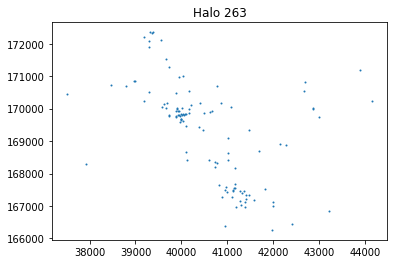

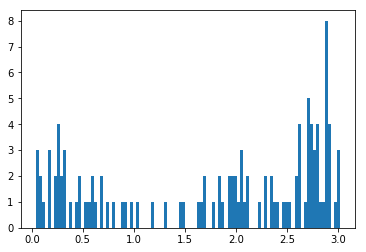

galaxies [2, 0, 1, 1, 0, 3, 1, 5, 5, 1, 3, 5, 3, 3, 2, 2, 4, 14, 13, 43]
blue galaxies counted [2, 0, 0, 0, 0, 0, 1, 2, 3, 1, 2, 3, 2, 3, 1, 2, 4, 11, 12, 26]
red galaxies counted [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 7]
red galaxies counted [0, 0, 0, 1, 0, 2, 0, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 10]
sum of galaxies: 111

Halo: 264
Halo Mass: 5323.262
N Subhalos from Illustris Algorithm: 300 224.77060890197754
R500c, R200c, R200m: 0.3351313352330785 0.5024352475977271 0.620847626650624
before dev loop: 224.77600574493408
True
232118 232118 time 224.7906150817871
N Subhalos within 5*R200m: 129 224.8382089138031


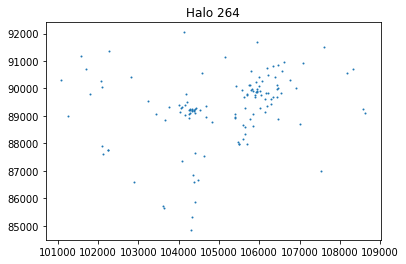

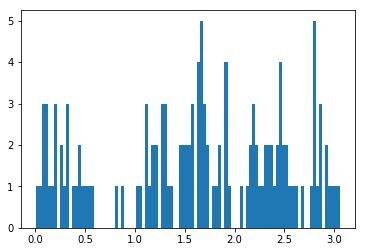

galaxies [2, 1, 2, 1, 1, 1, 3, 3, 3, 2, 4, 2, 0, 2, 6, 12, 25, 10, 27, 20]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 5, 11, 3, 17, 18]
red galaxies counted [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 3, 2, 8, 2, 6, 2]
red galaxies counted [1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 3, 1, 0, 1, 2, 5, 6, 5, 4, 0]
sum of galaxies: 127

Halo: 265
Halo Mass: 5447.433
N Subhalos from Illustris Algorithm: 480 225.3467357158661
R500c, R200c, R200m: 0.30706184019977817 0.4902807881515446 0.6108656367098667
before dev loop: 225.35162997245789
True
232118 232118 time 225.3670678138733
N Subhalos within 5*R200m: 75 225.40865898132324


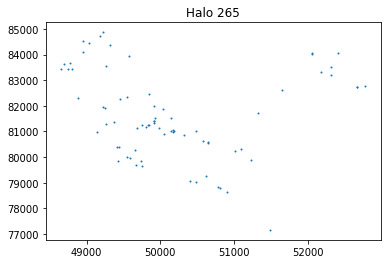

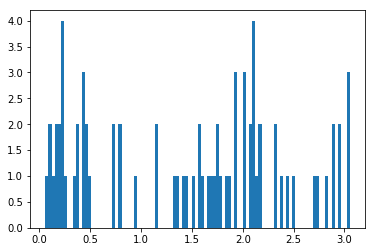

galaxies [0, 0, 2, 0, 2, 2, 5, 1, 1, 4, 4, 0, 2, 3, 0, 4, 7, 13, 14, 10]
blue galaxies counted [0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 1, 1, 0, 4, 6, 10, 12, 8]
red galaxies counted [0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1]
red galaxies counted [0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 3, 0, 1, 1, 0, 0, 0, 2, 0, 1]
sum of galaxies: 74

Halo: 266
Halo Mass: 5678.0728
N Subhalos from Illustris Algorithm: 463 225.92575192451477
R500c, R200c, R200m: 0.2737970543905859 0.4370054623938552 0.6025881535720761
before dev loop: 225.93174290657043
True
232118 232118 time 225.94631791114807
N Subhalos within 5*R200m: 76 226.0106806755066


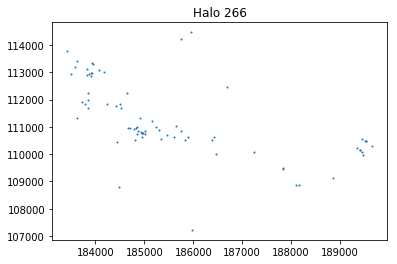

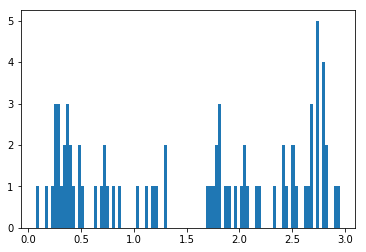

galaxies [1, 0, 0, 0, 0, 1, 1, 5, 4, 6, 2, 2, 4, 2, 2, 4, 0, 12, 9, 21]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 1, 4, 2, 2, 1, 2, 2, 2, 0, 5, 7, 15]
red galaxies counted [1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 3]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0, 0, 1, 0, 5, 2, 3]
sum of galaxies: 76

Halo: 267
Halo Mass: 5439.4043
N Subhalos from Illustris Algorithm: 462 226.69272589683533
R500c, R200c, R200m: 0.2880012977658667 0.46117582204991164 0.5695267027415635
before dev loop: 226.70028066635132
True
232118 232118 time 226.71631002426147
N Subhalos within 5*R200m: 135 226.75700187683105


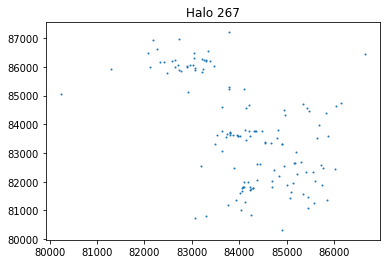

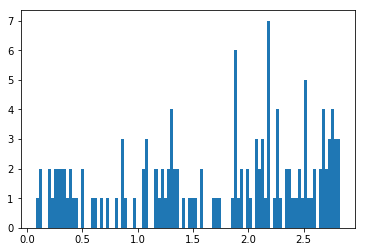

galaxies [0, 1, 0, 1, 1, 0, 3, 2, 4, 5, 2, 3, 3, 4, 4, 13, 12, 12, 26, 39]
blue galaxies counted [0, 0, 0, 1, 0, 0, 2, 0, 2, 4, 0, 2, 2, 4, 4, 8, 9, 9, 10, 21]
red galaxies counted [0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 3, 1, 1, 8, 5]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 2, 2, 2, 8, 13]
sum of galaxies: 135

Halo: 268
Halo Mass: 5499.5674
N Subhalos from Illustris Algorithm: 479 227.27792692184448
R500c, R200c, R200m: 0.30105579173128283 0.4960739734419261 0.6145166585745356
before dev loop: 227.28331995010376
True
232118 232118 time 227.29843497276306
N Subhalos within 5*R200m: 130 227.3749439716339


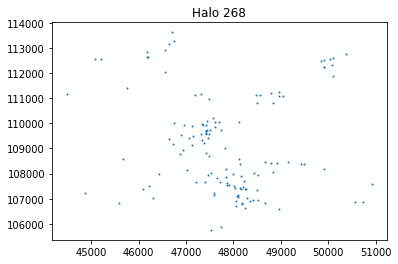

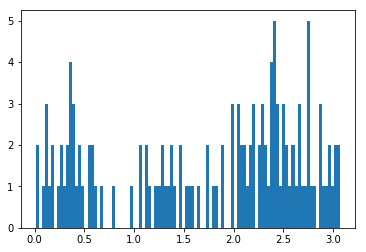

galaxies [0, 0, 1, 3, 1, 2, 1, 2, 5, 6, 3, 5, 1, 1, 5, 10, 6, 14, 32, 30]
blue galaxies counted [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 0, 4, 8, 6, 8, 28, 26]
red galaxies counted [0, 0, 0, 1, 0, 0, 1, 1, 2, 2, 2, 0, 0, 1, 0, 1, 0, 2, 2, 4]
red galaxies counted [0, 0, 0, 2, 1, 2, 0, 1, 2, 3, 0, 2, 0, 0, 1, 1, 0, 4, 2, 0]
sum of galaxies: 128

Halo: 269
Halo Mass: 5519.6943
N Subhalos from Illustris Algorithm: 448 227.88951706886292
R500c, R200c, R200m: 0.2781625911266835 0.4976824375959751 0.6182774949394052
before dev loop: 227.89480805397034
True
232118 232118 time 227.9096279144287
N Subhalos within 5*R200m: 76 227.94600796699524


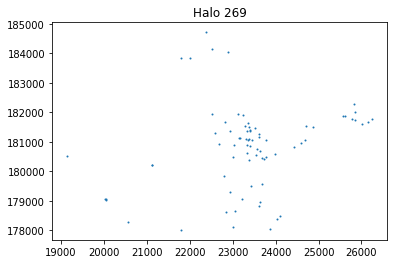

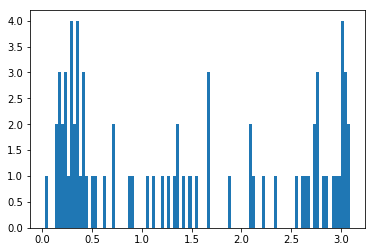

galaxies [0, 0, 0, 1, 2, 3, 4, 4, 6, 5, 2, 2, 2, 2, 2, 5, 6, 2, 4, 23]
blue galaxies counted [0, 0, 0, 1, 0, 2, 1, 1, 3, 4, 2, 1, 2, 0, 2, 5, 5, 2, 4, 19]
red galaxies counted [0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2]
red galaxies counted [0, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
sum of galaxies: 75

Halo: 270
Halo Mass: 5383.034
N Subhalos from Illustris Algorithm: 455 228.47383403778076
R500c, R200c, R200m: 0.31657816941903255 0.4779418499532936 0.6076007070945356
before dev loop: 228.47946286201477
True
232118 232118 time 228.4945888519287
N Subhalos within 5*R200m: 71 228.53947186470032


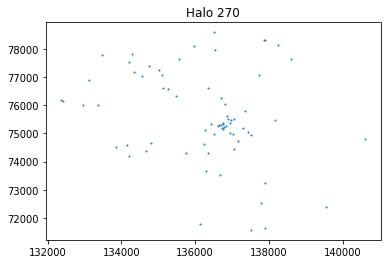

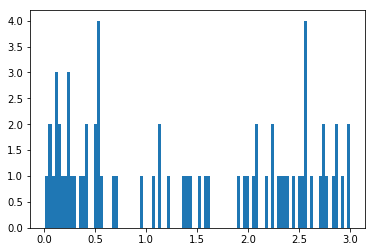

galaxies [1, 0, 2, 3, 1, 1, 2, 3, 1, 4, 2, 5, 2, 0, 3, 3, 5, 3, 11, 17]
blue galaxies counted [0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 5, 2, 0, 2, 3, 5, 3, 10, 16]
red galaxies counted [0, 0, 1, 2, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1]
red galaxies counted [1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 69

Halo: 271
Halo Mass: 5389.583
N Subhalos from Illustris Algorithm: 358 229.0376958847046
R500c, R200c, R200m: 0.3341747320340112 0.4989794337181028 0.6199474920452618
before dev loop: 229.0430269241333
True
232118 232118 time 229.05757784843445
N Subhalos within 5*R200m: 62 229.07729387283325


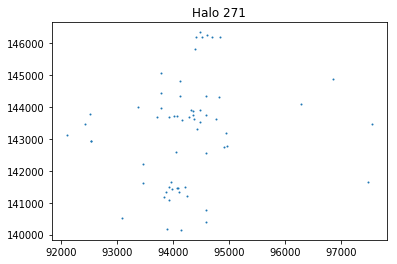

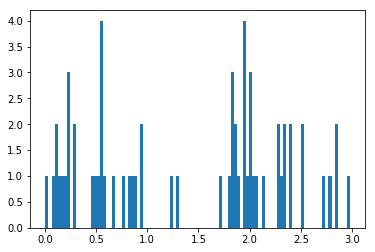

galaxies [1, 0, 1, 1, 1, 2, 3, 1, 1, 0, 2, 6, 2, 5, 0, 2, 1, 17, 10, 5]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 3, 1, 1, 0, 0, 0, 9, 5, 5]
red galaxies counted [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0]
red galaxies counted [1, 0, 1, 1, 0, 2, 3, 0, 1, 0, 0, 3, 1, 4, 0, 2, 0, 6, 5, 0]
sum of galaxies: 61

Halo: 272
Halo Mass: 5259.524
N Subhalos from Illustris Algorithm: 311 229.6133587360382
R500c, R200c, R200m: 0.33258084042027325 0.5004950579793465 0.6157250984901582
before dev loop: 229.6190037727356
True
232118 232118 time 229.6334400177002
N Subhalos within 5*R200m: 99 229.66747784614563


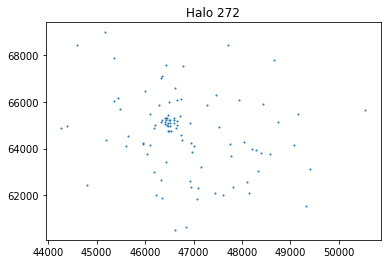

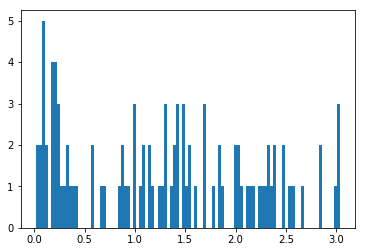

galaxies [2, 4, 2, 1, 0, 5, 3, 5, 2, 3, 0, 2, 2, 5, 8, 10, 12, 9, 14, 8]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 6, 8, 7, 7, 12, 7]
red galaxies counted [0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0]
red galaxies counted [2, 4, 2, 0, 0, 3, 2, 5, 2, 3, 0, 2, 0, 1, 2, 0, 5, 0, 1, 1]
sum of galaxies: 97

Halo: 273
Halo Mass: 5389.974
N Subhalos from Illustris Algorithm: 438 230.1656210422516
R500c, R200c, R200m: 0.29426496792914525 0.47707726594077793 0.6095587520782423
before dev loop: 230.17074584960938
True
232118 232118 time 230.18522191047668
N Subhalos within 5*R200m: 84 230.22762393951416


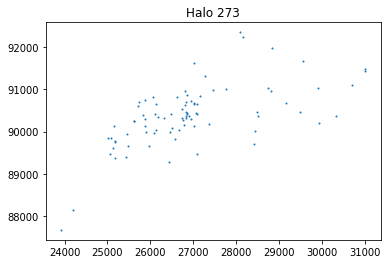

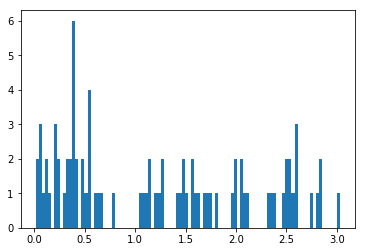

galaxies [2, 0, 2, 1, 1, 0, 4, 1, 3, 10, 2, 7, 1, 1, 3, 6, 10, 7, 8, 12]
blue galaxies counted [0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 6, 1, 1, 3, 4, 8, 6, 7, 9]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 1, 1]
red galaxies counted [2, 0, 1, 1, 1, 0, 2, 1, 3, 6, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2]
sum of galaxies: 81

Halo: 274
Halo Mass: 5345.135
N Subhalos from Illustris Algorithm: 356 230.9133698940277
R500c, R200c, R200m: 0.33844096331340184 0.5040789821034627 0.6168772900015586
before dev loop: 230.92111778259277
True
232118 232118 time 230.9365267753601
N Subhalos within 5*R200m: 43 230.96145105361938


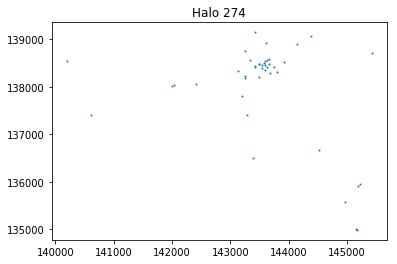

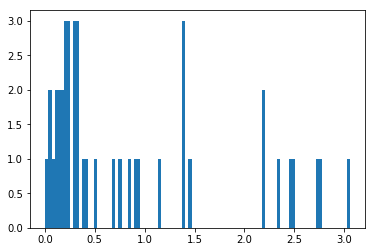

galaxies [0, 1, 1, 1, 2, 4, 2, 3, 5, 2, 1, 0, 2, 3, 1, 3, 1, 0, 5, 3]
blue galaxies counted [0, 0, 0, 0, 0, 2, 0, 1, 3, 0, 1, 0, 1, 2, 1, 1, 0, 0, 4, 3]
red galaxies counted [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0]
red galaxies counted [0, 0, 1, 1, 2, 1, 2, 2, 1, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0]
sum of galaxies: 40

Halo: 275
Halo Mass: 5376.894
N Subhalos from Illustris Algorithm: 465 231.4546399116516
R500c, R200c, R200m: 0.2992797033292063 0.45184551290910485 0.5596323081804776
before dev loop: 231.45971775054932
True
232118 232118 time 231.4750850200653
N Subhalos within 5*R200m: 72 231.51410484313965


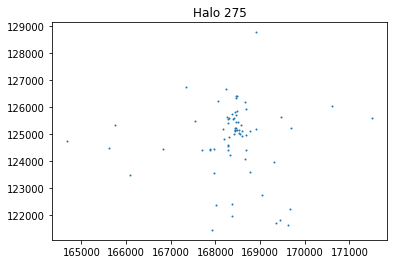

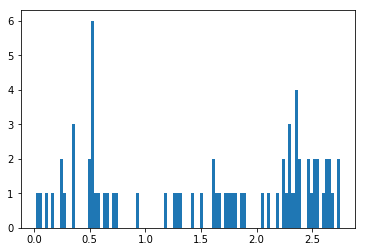

galaxies [1, 0, 0, 1, 0, 1, 0, 3, 0, 3, 0, 10, 3, 1, 1, 2, 4, 9, 9, 23]
blue galaxies counted [1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 8, 1, 1, 1, 2, 4, 7, 9, 21]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2]
red galaxies counted [0, 0, 0, 1, 0, 0, 0, 1, 0, 3, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 71

Halo: 276
Halo Mass: 5381.3813
N Subhalos from Illustris Algorithm: 398 232.02025389671326
R500c, R200c, R200m: 0.33402358196273635 0.5072069938949929 0.625016334006395
before dev loop: 232.02562880516052
True
232118 232118 time 232.04159212112427
N Subhalos within 5*R200m: 68 232.0615849494934


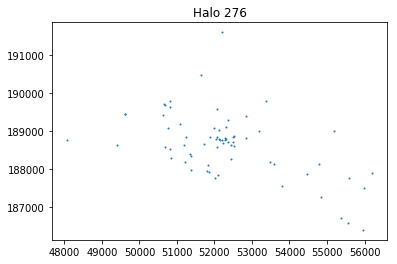

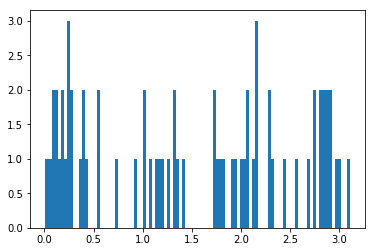

galaxies [0, 2, 1, 1, 1, 2, 4, 2, 1, 3, 0, 2, 1, 1, 5, 6, 2, 9, 8, 15]
blue galaxies counted [0, 1, 1, 0, 0, 0, 2, 0, 1, 1, 0, 1, 1, 1, 3, 5, 2, 8, 6, 12]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 2, 3]
red galaxies counted [0, 1, 0, 1, 1, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]
sum of galaxies: 66

Halo: 277
Halo Mass: 5600.926
N Subhalos from Illustris Algorithm: 518 232.58300590515137
R500c, R200c, R200m: 0.2993254226727094 0.4693956155432295 0.5845258101322403
before dev loop: 232.58994102478027
True
232118 232118 time 232.60408806800842
N Subhalos within 5*R200m: 123 232.64483880996704


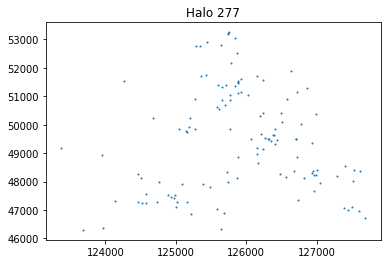

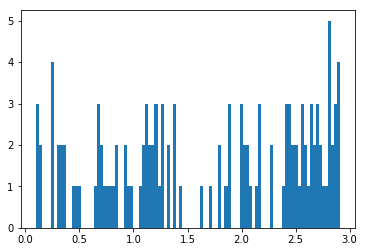

galaxies [0, 0, 1, 2, 2, 0, 0, 4, 3, 3, 2, 1, 7, 5, 7, 16, 4, 8, 15, 43]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 4, 1, 5, 11, 4, 8, 11, 25]
red galaxies counted [0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 2, 7]
red galaxies counted [0, 0, 0, 2, 0, 0, 0, 3, 1, 2, 1, 0, 3, 3, 1, 2, 0, 0, 2, 11]
sum of galaxies: 123

Halo: 278
Halo Mass: 5279.9526
N Subhalos from Illustris Algorithm: 422 233.1413938999176
R500c, R200c, R200m: 0.32317306461600015 0.4898204720293041 0.6010592378729663
before dev loop: 233.14679884910583
True
232118 232118 time 233.1621150970459
N Subhalos within 5*R200m: 57 233.18196296691895


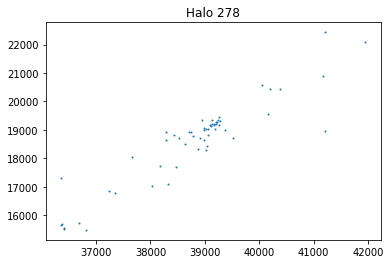

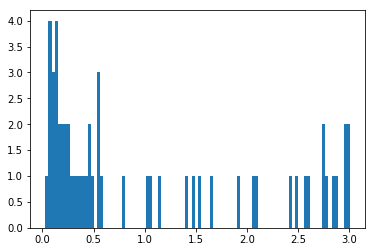

galaxies [4, 0, 2, 1, 4, 2, 3, 4, 2, 2, 4, 4, 0, 1, 2, 1, 4, 1, 3, 12]
blue galaxies counted [0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 3, 0, 0, 2, 1, 3, 1, 3, 9]
red galaxies counted [0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3]
red galaxies counted [4, 0, 2, 1, 3, 0, 1, 2, 0, 0, 3, 1, 0, 1, 0, 0, 0, 0, 0, 0]
sum of galaxies: 56

Halo: 279
Halo Mass: 5378.4937
N Subhalos from Illustris Algorithm: 429 233.72185397148132
R500c, R200c, R200m: 0.3139084920443983 0.4986738507505379 0.618305438986485
before dev loop: 233.72859597206116
True
232118 232118 time 233.7510049343109
N Subhalos within 5*R200m: 69 233.77999997138977


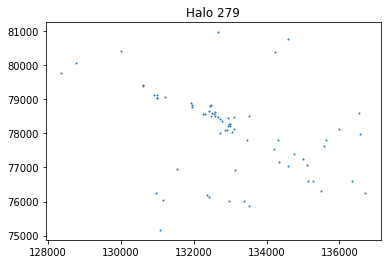

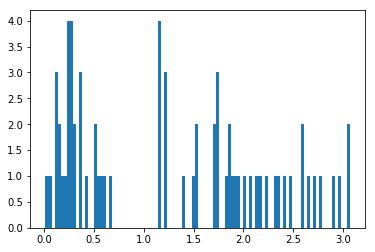

galaxies [0, 0, 0, 3, 2, 1, 3, 7, 3, 2, 2, 3, 1, 0, 2, 6, 5, 11, 7, 9]
blue galaxies counted [0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 4, 5, 9, 6, 9]
red galaxies counted [0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0]
red galaxies counted [0, 0, 0, 2, 1, 0, 2, 5, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 67

Halo: 280
Halo Mass: 5505.645
N Subhalos from Illustris Algorithm: 588 234.28015208244324
R500c, R200c, R200m: 0.19791375347732323 0.32895834310222943 0.4712515326414051
before dev loop: 234.2854208946228
True
232118 232118 time 234.3018078804016
N Subhalos within 5*R200m: 78 234.32626390457153


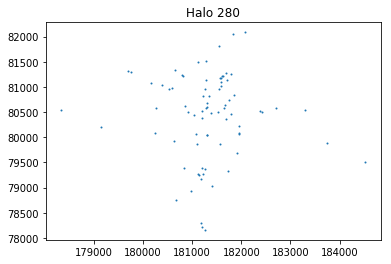

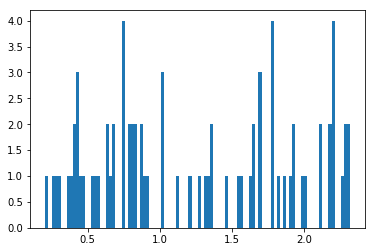

galaxies [0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 7, 3, 5, 13, 4, 3, 7, 15, 15]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 4, 1, 5, 10, 3, 2, 6, 14, 13]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 2, 0, 0, 1, 1, 0, 1, 1]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1]
sum of galaxies: 78

Halo: 281
Halo Mass: 5205.5664
N Subhalos from Illustris Algorithm: 444 235.06408500671387
R500c, R200c, R200m: 0.2867492803498911 0.4828415463572459 0.6001194691607145
before dev loop: 235.07333183288574
True
232118 232118 time 235.09296369552612
N Subhalos within 5*R200m: 78 235.1272168159485


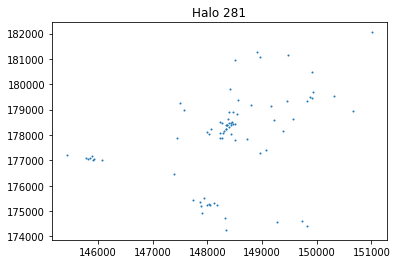

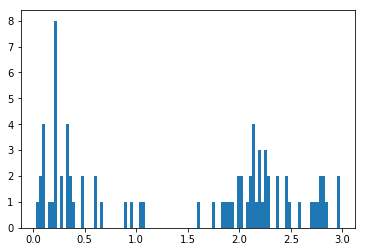

galaxies [2, 0, 3, 1, 1, 0, 9, 1, 4, 4, 2, 2, 1, 1, 3, 0, 1, 9, 19, 14]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 3, 0, 1, 7, 13, 11]
red galaxies counted [2, 0, 0, 0, 0, 0, 3, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 2, 4, 2]
red galaxies counted [0, 0, 3, 1, 1, 0, 5, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1]
sum of galaxies: 77

Halo: 282
Halo Mass: 5251.289
N Subhalos from Illustris Algorithm: 438 235.67720484733582
R500c, R200c, R200m: 0.30190490242833096 0.47583920053111656 0.5949590283747693
before dev loop: 235.68596291542053
True
232118 232118 time 235.7031078338623
N Subhalos within 5*R200m: 104 235.73036074638367


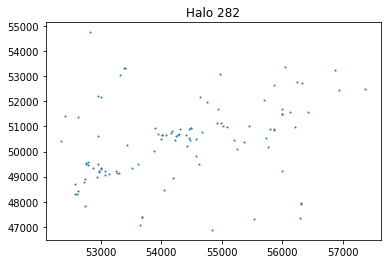

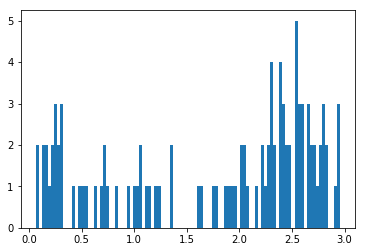

galaxies [1, 1, 0, 0, 2, 3, 2, 4, 4, 1, 2, 1, 4, 2, 6, 4, 2, 8, 23, 34]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 4, 4, 2, 6, 17, 25]
red galaxies counted [1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 2, 3]
red galaxies counted [0, 1, 0, 0, 2, 2, 1, 2, 3, 1, 1, 1, 1, 2, 1, 0, 0, 1, 4, 6]
sum of galaxies: 104

Halo: 283
Halo Mass: 5127.922
N Subhalos from Illustris Algorithm: 363 236.25818395614624
R500c, R200c, R200m: 0.32971091071971736 0.48550876161311884 0.5897912612842174
before dev loop: 236.26477694511414
True
232118 232118 time 236.281662940979
N Subhalos within 5*R200m: 32 236.30489897727966


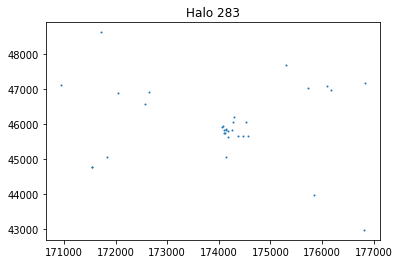

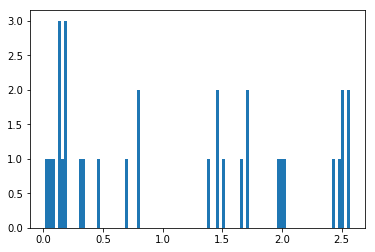

galaxies [1, 1, 0, 1, 3, 3, 0, 0, 2, 0, 1, 0, 1, 2, 0, 0, 4, 4, 3, 5]
blue galaxies counted [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 4, 1, 3, 3]
red galaxies counted [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1]
red galaxies counted [1, 0, 0, 1, 1, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1]
sum of galaxies: 31

Halo: 284
Halo Mass: 5596.1426
N Subhalos from Illustris Algorithm: 556 236.829087972641
R500c, R200c, R200m: 0.22499283621734584 0.3673609702495494 0.46257502612647317
before dev loop: 236.8343150615692
True
232118 232118 time 236.85007882118225
N Subhalos within 5*R200m: 57 236.87483477592468


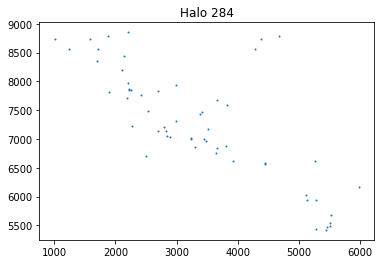

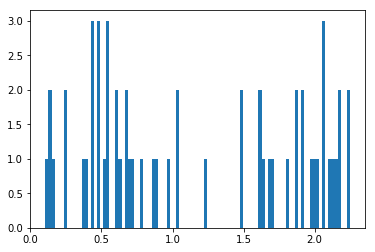

galaxies [0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 1, 7, 4, 7, 2, 4, 1, 2, 8, 15]
blue galaxies counted [0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 5, 1, 3, 2, 4, 1, 1, 8, 12]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 3]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 3, 3, 0, 0, 0, 0, 0, 0]
sum of galaxies: 57

Halo: 285
Halo Mass: 5178.5127
N Subhalos from Illustris Algorithm: 436 237.37118697166443
R500c, R200c, R200m: 0.30751144710626815 0.48629928189053756 0.6035193148772762
before dev loop: 237.37631678581238
True
232118 232118 time 237.39435172080994
N Subhalos within 5*R200m: 115 237.42841291427612


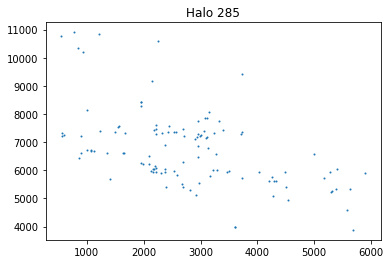

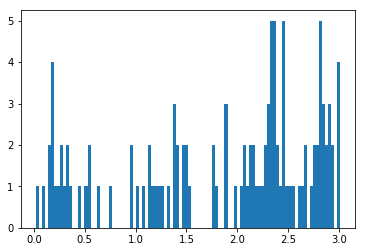

galaxies [0, 0, 1, 0, 2, 3, 2, 3, 3, 1, 1, 3, 2, 0, 6, 5, 10, 8, 33, 31]
blue galaxies counted [0, 0, 0, 0, 1, 1, 0, 2, 1, 1, 1, 3, 2, 0, 5, 4, 5, 6, 17, 20]
red galaxies counted [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 2, 7, 5]
red galaxies counted [0, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 9, 6]
sum of galaxies: 114

Halo: 286
Halo Mass: 5479.643
N Subhalos from Illustris Algorithm: 466 237.9332196712494
R500c, R200c, R200m: 0.34696918222033424 0.512538381788432 0.6223428333416517
before dev loop: 237.9393630027771
True
232118 232118 time 237.9554088115692
N Subhalos within 5*R200m: 101 237.98165893554688


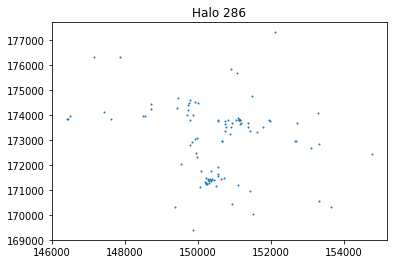

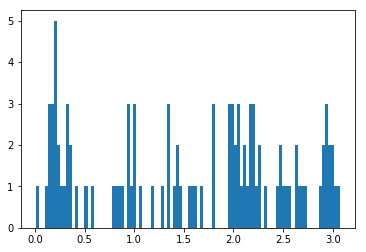

galaxies [0, 0, 0, 2, 2, 5, 5, 2, 4, 2, 1, 1, 0, 7, 5, 6, 7, 16, 17, 18]
blue galaxies counted [0, 0, 0, 0, 0, 3, 4, 2, 1, 2, 1, 1, 0, 7, 5, 5, 7, 11, 14, 15]
red galaxies counted [0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 3]
red galaxies counted [0, 0, 0, 1, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0]
sum of galaxies: 100

Halo: 287
Halo Mass: 5378.2646
N Subhalos from Illustris Algorithm: 462 238.4912440776825
R500c, R200c, R200m: 0.3080054722365906 0.47901721535245007 0.5991632462889356
before dev loop: 238.49609899520874
True
232118 232118 time 238.51138305664062
N Subhalos within 5*R200m: 63 238.54369688034058


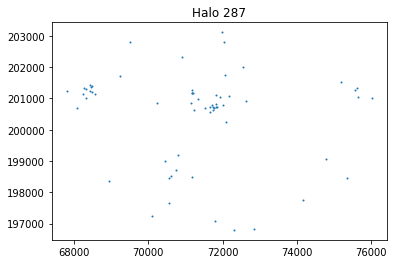

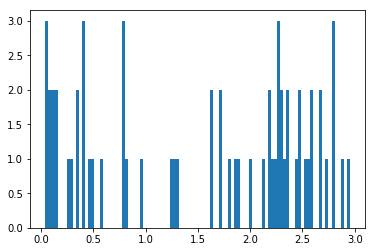

galaxies [0, 2, 0, 2, 2, 0, 0, 2, 1, 4, 2, 1, 0, 4, 1, 3, 2, 6, 15, 13]
blue galaxies counted [0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 4, 11, 13]
red galaxies counted [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 3, 0]
red galaxies counted [0, 0, 0, 1, 1, 0, 0, 0, 1, 3, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0]
sum of galaxies: 60

Halo: 288
Halo Mass: 5408.1255
N Subhalos from Illustris Algorithm: 479 239.24063372612
R500c, R200c, R200m: 0.2760909884215701 0.4315185406567124 0.5462356197416879
before dev loop: 239.24828481674194
True
232118 232118 time 239.26366686820984
N Subhalos within 5*R200m: 54 239.2834348678589


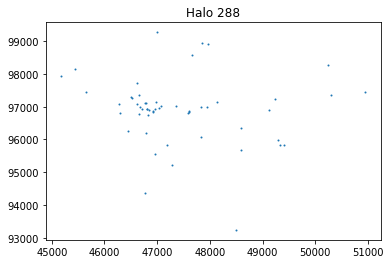

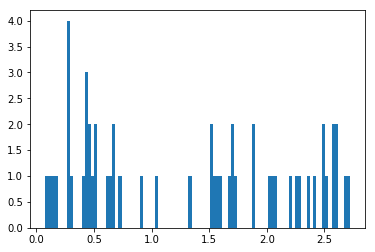

galaxies [0, 1, 0, 0, 1, 2, 0, 0, 5, 0, 6, 3, 4, 1, 1, 1, 3, 7, 7, 12]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 3, 1, 1, 1, 3, 7, 6, 11]
red galaxies counted [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1]
red galaxies counted [0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 54

Halo: 289
Halo Mass: 5268.219
N Subhalos from Illustris Algorithm: 453 239.8035318851471
R500c, R200c, R200m: 0.2947966054265615 0.4896038456127583 0.6121466590858843
before dev loop: 239.80903387069702
True
232118 232118 time 239.8236711025238
N Subhalos within 5*R200m: 63 239.84415483474731


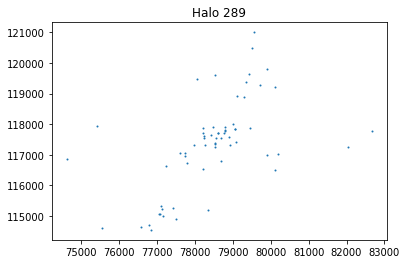

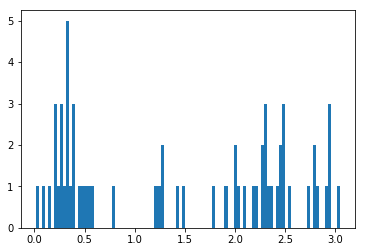

galaxies [0, 1, 0, 0, 1, 0, 4, 3, 6, 4, 3, 2, 0, 1, 0, 4, 2, 5, 16, 10]
blue galaxies counted [0, 1, 0, 0, 0, 0, 1, 1, 4, 2, 2, 2, 0, 1, 0, 4, 1, 3, 10, 10]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 5, 0]
red galaxies counted [0, 0, 0, 0, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]
sum of galaxies: 62

Halo: 290
Halo Mass: 5283.744
N Subhalos from Illustris Algorithm: 381 240.35895085334778
R500c, R200c, R200m: 0.3402003973836944 0.5073458333724612 0.615679259043301
before dev loop: 240.36403894424438
True
232118 232118 time 240.38012886047363
N Subhalos within 5*R200m: 68 240.4160671234131


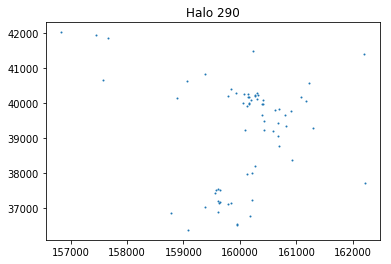

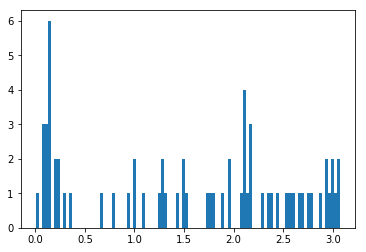

galaxies [1, 2, 1, 3, 5, 1, 3, 0, 2, 0, 0, 0, 1, 2, 3, 4, 4, 6, 13, 16]
blue galaxies counted [0, 1, 0, 3, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 3, 4, 4, 5, 8, 12]
red galaxies counted [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 2]
red galaxies counted [0, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2]
sum of galaxies: 67

Halo: 291
Halo Mass: 5222.8936
N Subhalos from Illustris Algorithm: 367 240.91671872138977
R500c, R200c, R200m: 0.3321537528926979 0.49330671209199517 0.6024639266693702
before dev loop: 240.92197680473328
True
232118 232118 time 240.93702507019043
N Subhalos within 5*R200m: 55 240.95685386657715


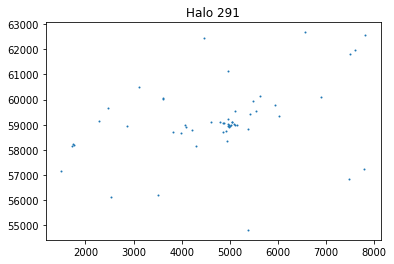

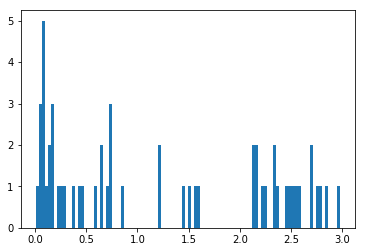

galaxies [1, 2, 3, 1, 1, 3, 1, 2, 0, 1, 2, 1, 6, 1, 0, 2, 4, 0, 11, 9]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 2, 4, 0, 9, 8]
red galaxies counted [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1]
red galaxies counted [1, 1, 3, 0, 1, 2, 1, 1, 0, 1, 2, 0, 5, 0, 0, 0, 0, 0, 1, 0]
sum of galaxies: 51

Halo: 292
Halo Mass: 5284.3813
N Subhalos from Illustris Algorithm: 461 241.47146797180176
R500c, R200c, R200m: 0.2685630703174121 0.42750556731690204 0.5359166598234651
before dev loop: 241.47752690315247
True
232118 232118 time 241.49191284179688
N Subhalos within 5*R200m: 84 241.5235960483551


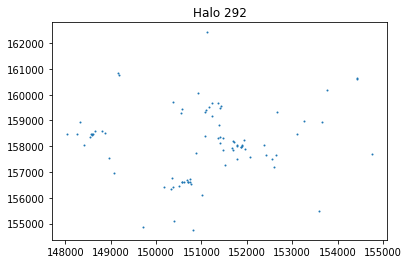

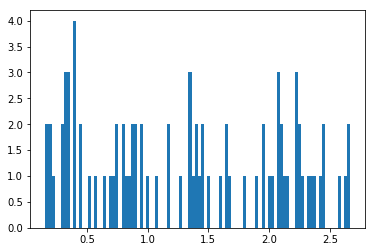

galaxies [0, 0, 0, 0, 0, 1, 3, 1, 3, 5, 6, 1, 2, 7, 7, 4, 10, 6, 12, 16]
blue galaxies counted [0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 5, 4, 4, 7, 4, 7, 13]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 2, 1, 0, 2, 1, 3, 2]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 3, 1, 1, 0, 2, 0, 1, 1, 2, 1]
sum of galaxies: 84

Halo: 293
Halo Mass: 5212.3135
N Subhalos from Illustris Algorithm: 381 242.05340695381165
R500c, R200c, R200m: 0.3334798540609961 0.5058882991002044 0.6142056309215799
before dev loop: 242.05886888504028
True
232118 232118 time 242.07410407066345
N Subhalos within 5*R200m: 40 242.09381771087646


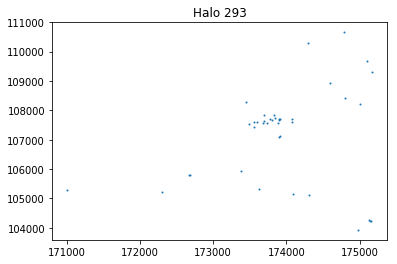

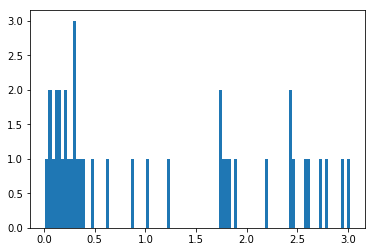

galaxies [2, 1, 1, 1, 2, 1, 2, 5, 2, 1, 1, 1, 0, 1, 1, 1, 0, 6, 4, 6]
blue galaxies counted [0, 0, 0, 0, 0, 1, 1, 3, 0, 1, 1, 1, 0, 1, 1, 1, 0, 4, 1, 5]
red galaxies counted [1, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
red galaxies counted [1, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0]
sum of galaxies: 39

Halo: 294
Halo Mass: 5394.892
N Subhalos from Illustris Algorithm: 482 242.59645986557007
R500c, R200c, R200m: 0.25684166353206417 0.3954064646292331 0.4942719026808885
before dev loop: 242.60217094421387
True
232118 232118 time 242.61674809455872
N Subhalos within 5*R200m: 71 242.67106199264526


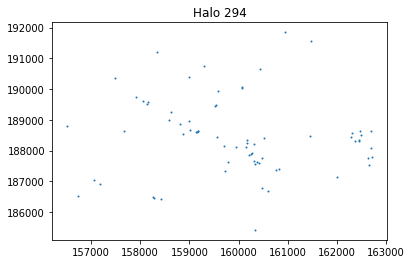

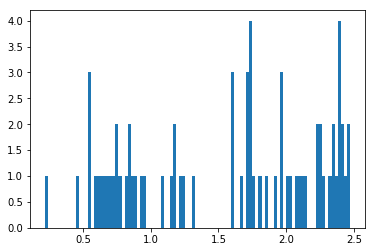

galaxies [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 5, 7, 7, 2, 6, 3, 17, 22]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 3, 0, 5, 3, 12, 17]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 3, 4]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 3, 2, 1, 0, 2, 1]
sum of galaxies: 71

Halo: 295
Halo Mass: 5240.626
N Subhalos from Illustris Algorithm: 432 243.35490775108337
R500c, R200c, R200m: 0.3013897391076673 0.47613821784865124 0.5945560415869391
before dev loop: 243.36297178268433
True
232118 232118 time 243.38100790977478
N Subhalos within 5*R200m: 44 243.40263390541077


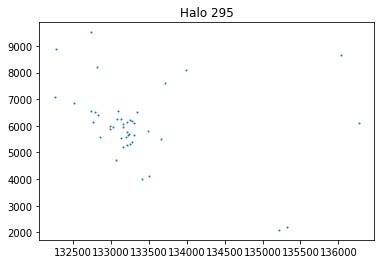

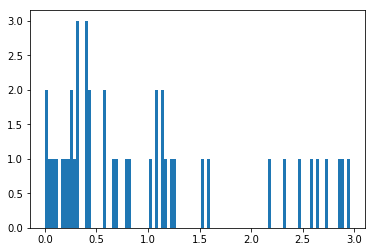

galaxies [0, 0, 2, 0, 1, 0, 2, 2, 4, 4, 1, 2, 2, 2, 3, 5, 2, 0, 2, 7]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 1, 1, 5, 2, 0, 2, 7]
red galaxies counted [0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 4, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0]
sum of galaxies: 41

Halo: 296
Halo Mass: 5273.228
N Subhalos from Illustris Algorithm: 498 243.92347288131714
R500c, R200c, R200m: 0.26815423849967684 0.4309768745292195 0.5593085495719754
before dev loop: 243.92841291427612
True
232118 232118 time 243.94531679153442
N Subhalos within 5*R200m: 68 243.9682378768921


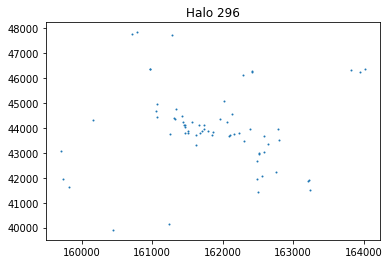

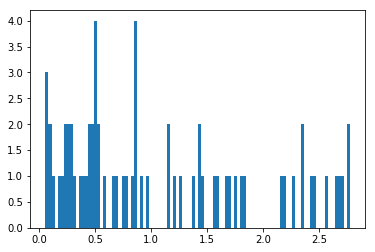

galaxies [1, 2, 1, 1, 1, 0, 2, 4, 3, 2, 4, 7, 3, 4, 5, 4, 4, 7, 3, 10]
blue galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 4, 2, 3, 4, 3, 4, 5, 3, 10]
red galaxies counted [1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 2, 0, 0]
red galaxies counted [0, 2, 1, 0, 0, 0, 1, 2, 2, 2, 1, 3, 1, 0, 0, 1, 0, 0, 0, 0]
sum of galaxies: 68

Halo: 297
Halo Mass: 5298.513
N Subhalos from Illustris Algorithm: 557 244.46821403503418
R500c, R200c, R200m: 0.27672573464857675 0.43936801547454546 0.5491229043769272
before dev loop: 244.47315287590027
True
232118 232118 time 244.4880838394165
N Subhalos within 5*R200m: 62 244.52274775505066


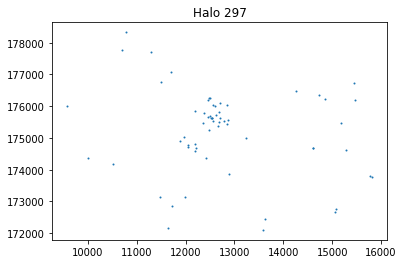

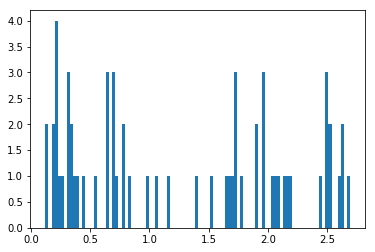

galaxies [0, 0, 0, 0, 2, 0, 5, 3, 3, 3, 2, 1, 4, 6, 1, 2, 1, 8, 11, 10]
blue galaxies counted [0, 0, 0, 0, 1, 0, 2, 0, 2, 3, 1, 0, 3, 3, 1, 1, 1, 4, 10, 6]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 2, 0, 1, 0, 3, 1, 4]
red galaxies counted [0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0]
sum of galaxies: 62

Halo: 298
Halo Mass: 5065.933
N Subhalos from Illustris Algorithm: 387 245.03627490997314
R500c, R200c, R200m: 0.2990328909363021 0.4725223862667662 0.6032335089287048
before dev loop: 245.0415177345276
True
232118 232118 time 245.05690479278564
N Subhalos within 5*R200m: 86 245.08870887756348


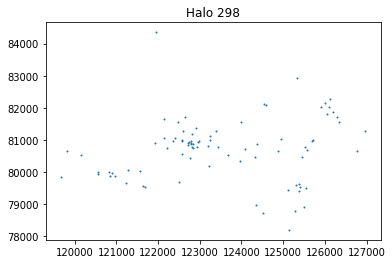

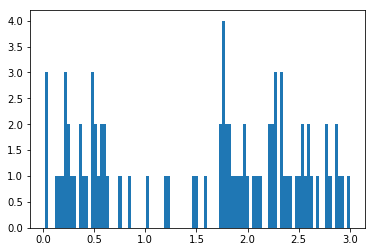

galaxies [0, 0, 0, 1, 0, 2, 3, 3, 1, 3, 6, 5, 2, 1, 1, 2, 3, 17, 16, 17]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 1, 1, 1, 0, 2, 3, 14, 13, 14]
red galaxies counted [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 2, 0]
red galaxies counted [0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 3, 1, 0, 1, 0, 0, 2, 1, 3]
sum of galaxies: 83

Halo: 299
Halo Mass: 5121.6265
N Subhalos from Illustris Algorithm: 392 245.60602807998657
R500c, R200c, R200m: 0.3265473683525663 0.49782311865820794 0.6106951700157894
before dev loop: 245.61163902282715
True
232118 232118 time 245.62790989875793
N Subhalos within 5*R200m: 49 245.64806199073792


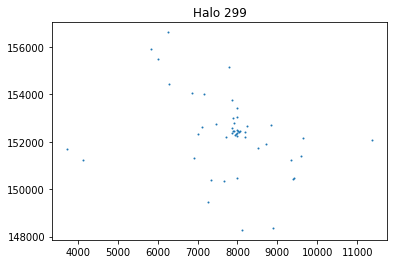

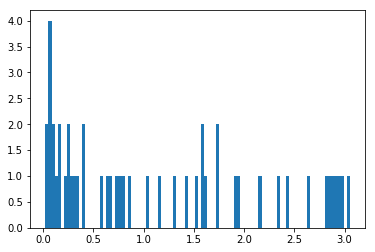

galaxies [2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 4, 2, 2, 1, 5, 4, 3, 8]
blue galaxies counted [0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 1, 2, 1, 1, 5, 4, 2, 8]
red galaxies counted [1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]
red galaxies counted [1, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0]
sum of galaxies: 46

Halo: 300
Halo Mass: 5181.306
N Subhalos from Illustris Algorithm: 481 246.15185570716858
R500c, R200c, R200m: 0.31654187818883506 0.4970549376046725 0.6108734834623418
before dev loop: 246.1571488380432
True
232118 232118 time 246.17265582084656
N Subhalos within 5*R200m: 63 246.1924169063568


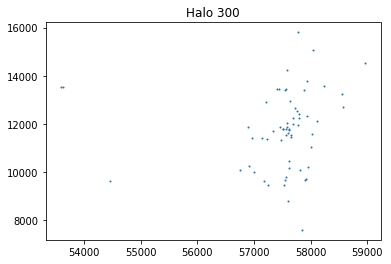

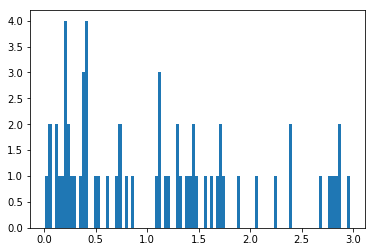

galaxies [0, 0, 1, 1, 1, 1, 5, 3, 1, 7, 1, 2, 3, 2, 4, 6, 8, 4, 3, 7]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 0, 3, 1, 1, 3, 2, 4, 5, 8, 4, 2, 7]
red galaxies counted [0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
red galaxies counted [0, 0, 1, 1, 1, 1, 2, 1, 1, 3, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
sum of galaxies: 60

Halo: 301
Halo Mass: 5123.1665
N Subhalos from Illustris Algorithm: 416 246.6994481086731
R500c, R200c, R200m: 0.3234787276524679 0.4974740182419671 0.603429157292715
before dev loop: 246.7053461074829
True
232118 232118 time 246.72097897529602
N Subhalos within 5*R200m: 62 246.74897575378418


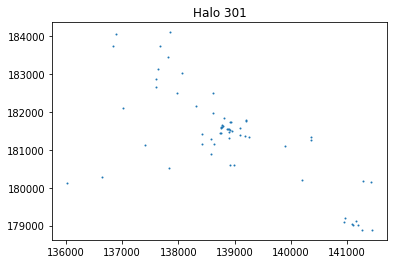

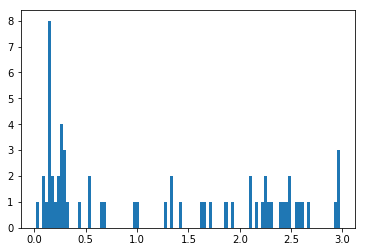

galaxies [0, 0, 3, 0, 8, 2, 1, 7, 3, 0, 1, 2, 2, 0, 2, 3, 3, 3, 12, 9]
blue galaxies counted [0, 0, 1, 0, 3, 1, 1, 6, 3, 0, 1, 1, 2, 0, 2, 3, 3, 3, 8, 8]
red galaxies counted [0, 0, 0, 0, 3, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
red galaxies counted [0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0]
sum of galaxies: 61

Halo: 302
Halo Mass: 5081.5635
N Subhalos from Illustris Algorithm: 305 247.48452997207642
R500c, R200c, R200m: 0.31142261283615874 0.48302834710749587 0.6019721835027778
before dev loop: 247.49248003959656
True
232118 232118 time 247.50832796096802
N Subhalos within 5*R200m: 46 247.53376483917236


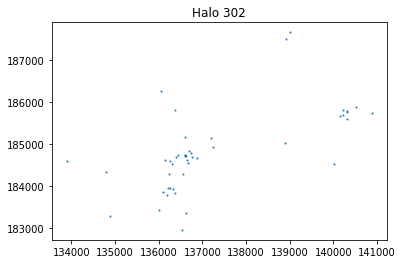

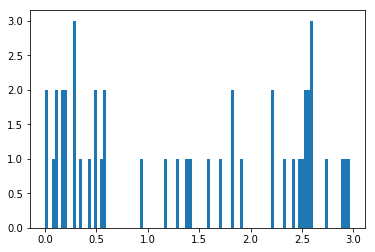

galaxies [0, 1, 1, 1, 0, 4, 0, 1, 2, 1, 3, 3, 0, 0, 1, 3, 2, 4, 5, 12]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 2, 0, 0, 1, 2, 2, 4, 4, 9]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1]
red galaxies counted [0, 1, 1, 0, 0, 4, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2]
sum of galaxies: 44

Halo: 304
Halo Mass: 5006.5566
N Subhalos from Illustris Algorithm: 427 248.03956079483032
R500c, R200c, R200m: 0.30545521763049377 0.46346975608089586 0.5816454514570938
before dev loop: 248.04485607147217
True
232118 232118 time 248.06113290786743
N Subhalos within 5*R200m: 84 248.08472800254822


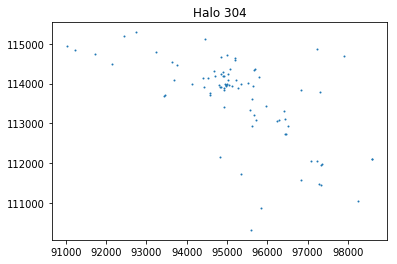

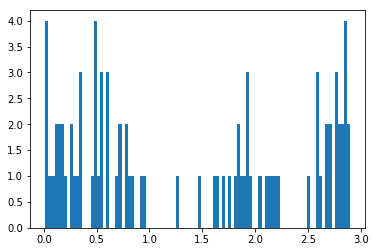

galaxies [0, 1, 0, 2, 2, 2, 1, 3, 1, 3, 4, 6, 5, 4, 2, 1, 2, 11, 7, 22]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 3, 4, 2, 1, 2, 9, 5, 20]
red galaxies counted [0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2]
red galaxies counted [0, 0, 0, 2, 2, 1, 0, 2, 0, 2, 1, 3, 2, 0, 0, 0, 0, 2, 1, 0]
sum of galaxies: 79

Halo: 305
Halo Mass: 5160.0137
N Subhalos from Illustris Algorithm: 485 248.65801978111267
R500c, R200c, R200m: 0.3141987418170756 0.47801114958867347 0.5914917646420437
before dev loop: 248.66381096839905
True
232118 232118 time 248.67963075637817
N Subhalos within 5*R200m: 55 248.6995940208435


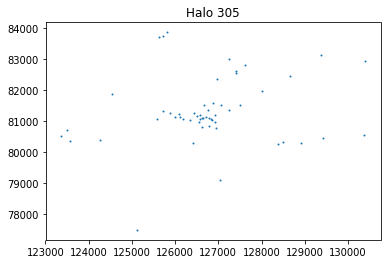

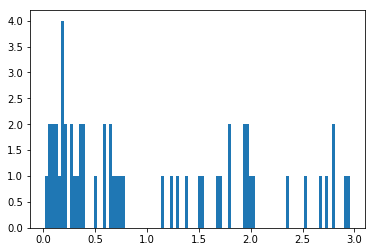

galaxies [1, 3, 0, 1, 2, 4, 2, 2, 2, 4, 1, 2, 5, 1, 0, 3, 3, 8, 3, 7]
blue galaxies counted [0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 0, 4, 1, 0, 3, 2, 5, 3, 5]
red galaxies counted [0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 3, 0, 1]
red galaxies counted [1, 1, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]
sum of galaxies: 54

Halo: 307
Halo Mass: 5225.4937
N Subhalos from Illustris Algorithm: 486 249.2695279121399
R500c, R200c, R200m: 0.269387419706267 0.40838515336091624 0.5023708721998698
before dev loop: 249.2750849723816
True
232118 232118 time 249.2905740737915
N Subhalos within 5*R200m: 45 249.31995487213135


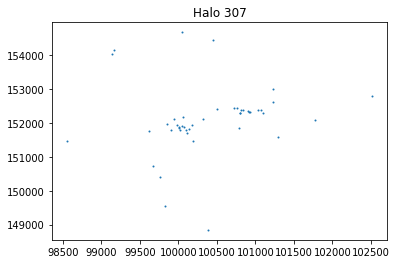

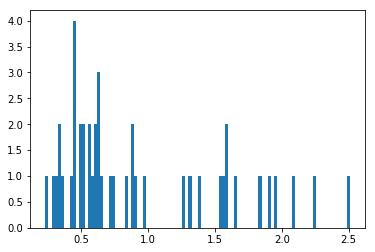

galaxies [0, 0, 0, 0, 0, 0, 0, 1, 0, 5, 1, 8, 7, 4, 4, 1, 3, 5, 3, 3]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 2, 3, 1, 3, 5, 2, 3]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 1, 0, 0, 0, 0, 1, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 5, 0, 4, 1, 1, 1, 0, 0, 0, 0, 0]
sum of galaxies: 45

Halo: 308
Halo Mass: 5136.8716
N Subhalos from Illustris Algorithm: 435 249.83560299873352
R500c, R200c, R200m: 0.2952849256475589 0.46705720323673566 0.5810940169234583
before dev loop: 249.84102296829224
True
232118 232118 time 249.85679006576538
N Subhalos within 5*R200m: 65 249.89774894714355


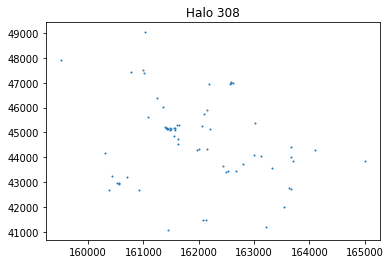

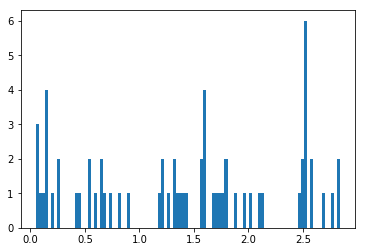

galaxies [2, 0, 1, 0, 4, 1, 1, 2, 0, 0, 2, 3, 4, 1, 1, 6, 10, 7, 4, 15]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 3, 0, 1, 5, 6, 4, 4, 14]
red galaxies counted [2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 3, 0, 1]
red galaxies counted [0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0]
sum of galaxies: 64

Halo: 309
Halo Mass: 5126.7944
N Subhalos from Illustris Algorithm: 337 250.39532089233398
R500c, R200c, R200m: 0.32850757519664875 0.506117696506748 0.6120615458422
before dev loop: 250.4010968208313
True
232118 232118 time 250.41601586341858
N Subhalos within 5*R200m: 88 250.45460987091064


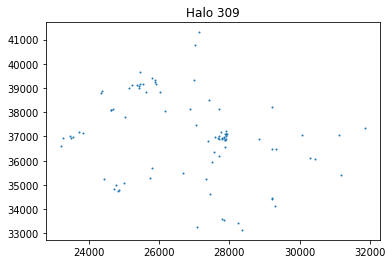

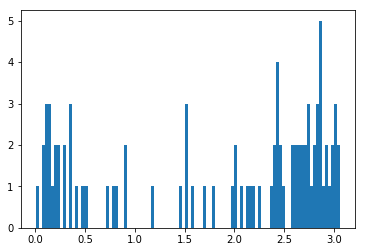

galaxies [0, 0, 3, 4, 1, 1, 4, 1, 1, 4, 2, 0, 1, 4, 0, 1, 5, 6, 14, 35]
blue galaxies counted [0, 0, 2, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 4, 0, 1, 5, 6, 11, 25]
red galaxies counted [0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 7]
red galaxies counted [0, 0, 1, 2, 0, 1, 2, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3]
sum of galaxies: 87

Halo: 310
Halo Mass: 5014.9004
N Subhalos from Illustris Algorithm: 357 251.00888395309448
R500c, R200c, R200m: 0.31482696242850344 0.4744959646176175 0.5871187214463078
before dev loop: 251.01600885391235
True
232118 232118 time 251.03040194511414
N Subhalos within 5*R200m: 48 251.05088472366333


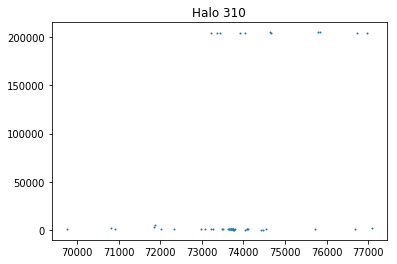

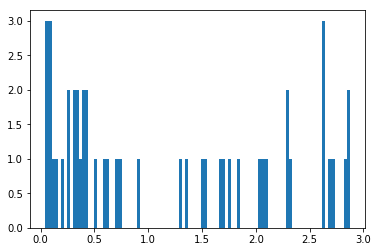

galaxies [1, 2, 1, 1, 1, 1, 0, 2, 4, 3, 3, 1, 3, 1, 0, 1, 3, 4, 6, 8]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 4, 6, 6]
red galaxies counted [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 2]
red galaxies counted [1, 1, 1, 1, 1, 1, 0, 1, 4, 2, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0]
sum of galaxies: 46

Halo: 312
Halo Mass: 5100.026
N Subhalos from Illustris Algorithm: 445 251.78053402900696
R500c, R200c, R200m: 0.3023280665796687 0.4729642865413609 0.5866553627057607
before dev loop: 251.78831386566162
True
232118 232118 time 251.80412888526917
N Subhalos within 5*R200m: 65 251.83376789093018


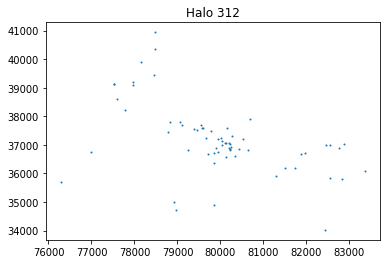

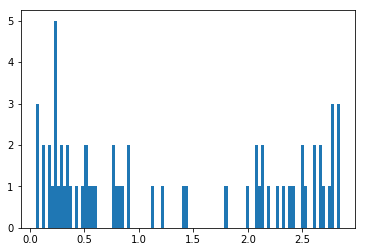

galaxies [1, 0, 0, 2, 0, 0, 7, 2, 3, 3, 3, 4, 0, 7, 0, 2, 2, 1, 11, 15]
blue galaxies counted [0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 5, 0, 1, 1, 1, 11, 14]
red galaxies counted [1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 1, 0, 0, 4, 2, 1, 3, 1, 2, 0, 1, 0, 0, 1, 0, 0, 1]
sum of galaxies: 63

Halo: 313
Halo Mass: 5041.0957
N Subhalos from Illustris Algorithm: 372 252.33788180351257
R500c, R200c, R200m: 0.3145623947564017 0.4915561656699143 0.6083072751273606
before dev loop: 252.34319281578064
True
232118 232118 time 252.35778093338013
N Subhalos within 5*R200m: 56 252.378338098526


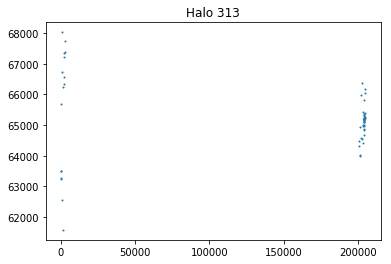

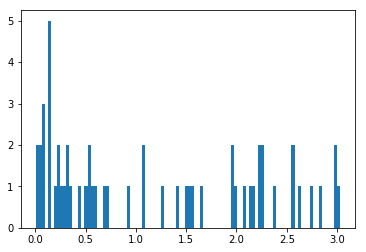

galaxies [1, 2, 1, 0, 5, 1, 1, 3, 3, 0, 2, 4, 2, 1, 2, 1, 5, 3, 8, 8]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 1, 5, 3, 8, 8]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 2, 1, 0, 5, 0, 1, 3, 1, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 53

Halo: 316
Halo Mass: 5059.3677
N Subhalos from Illustris Algorithm: 497 252.890695810318
R500c, R200c, R200m: 0.25635150172630217 0.3992787168723593 0.5044309650002046
before dev loop: 252.89655184745789
True
232118 232118 time 252.91178178787231
N Subhalos within 5*R200m: 50 252.93206596374512


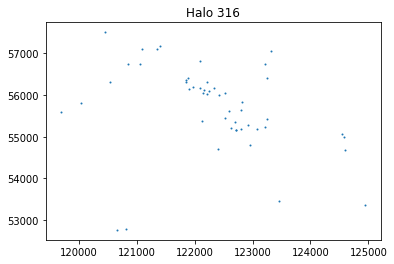

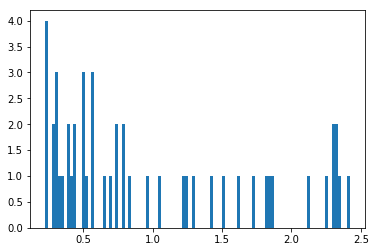

galaxies [0, 0, 0, 0, 0, 0, 0, 3, 3, 5, 3, 6, 3, 5, 2, 2, 3, 3, 4, 8]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 3, 1, 2, 3, 2, 2, 4, 2, 2, 3, 3, 4, 7]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 50

Halo: 317
Halo Mass: 5015.243
N Subhalos from Illustris Algorithm: 483 253.4244258403778
R500c, R200c, R200m: 0.29752793585635756 0.46233297783328603 0.581297351902138
before dev loop: 253.42959189414978
True
232118 232118 time 253.444397687912
N Subhalos within 5*R200m: 76 253.4744508266449


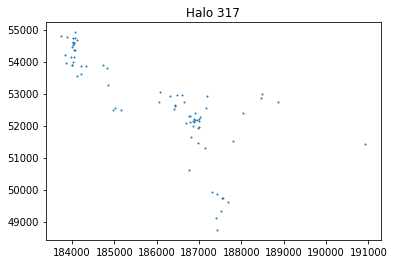

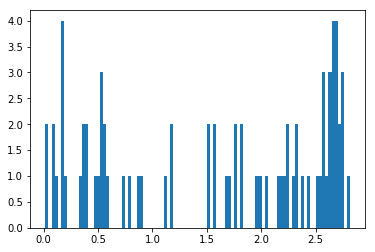

galaxies [0, 1, 1, 1, 0, 4, 1, 0, 0, 5, 2, 6, 0, 3, 1, 3, 4, 6, 12, 24]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 4, 0, 3, 1, 2, 3, 4, 10, 17]
red galaxies counted [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 2, 2, 4]
red galaxies counted [0, 1, 0, 1, 0, 3, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3]
sum of galaxies: 74

Halo: 320
Halo Mass: 5094.6997
N Subhalos from Illustris Algorithm: 479 254.049085855484
R500c, R200c, R200m: 0.2455237639824147 0.38890963382097904 0.49358198897984745
before dev loop: 254.0548279285431
True
232118 232118 time 254.07018971443176
N Subhalos within 5*R200m: 100 254.09534096717834


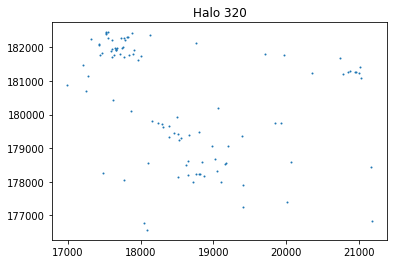

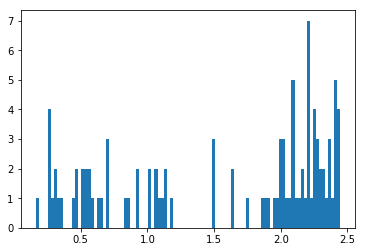

galaxies [0, 0, 0, 0, 0, 0, 1, 0, 4, 4, 1, 3, 7, 5, 4, 8, 1, 5, 11, 46]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 4, 2, 7, 1, 5, 6, 16]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 3, 1, 1, 1, 0, 0, 3, 10]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 4, 0, 1, 0, 0, 0, 2, 20]
sum of galaxies: 100

Halo: 329
Halo Mass: 5060.2817
N Subhalos from Illustris Algorithm: 529 254.5822548866272
R500c, R200c, R200m: 0.28514013561016827 0.4560905659637029 0.5758434585874034
before dev loop: 254.58738684654236
True
232118 232118 time 254.6026167869568
N Subhalos within 5*R200m: 135 254.6259958744049


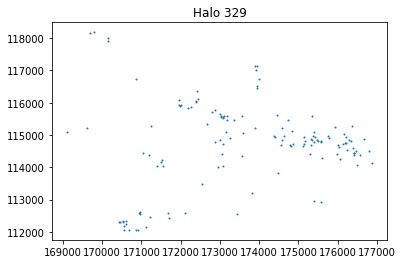

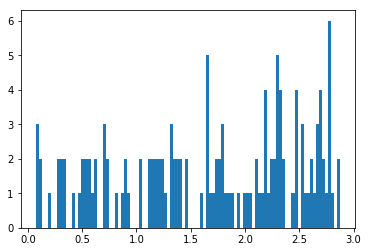

galaxies [0, 2, 1, 2, 0, 0, 1, 0, 5, 1, 2, 7, 5, 5, 4, 12, 10, 19, 27, 32]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 4, 3, 5, 3, 3, 4, 1, 16, 22]
red galaxies counted [0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 4, 2, 7, 4, 5]
red galaxies counted [0, 1, 1, 0, 0, 0, 1, 0, 3, 0, 1, 3, 2, 0, 0, 5, 4, 11, 7, 5]
sum of galaxies: 135

Halo: 331
Halo Mass: 5080.8345
N Subhalos from Illustris Algorithm: 549 255.1406807899475
R500c, R200c, R200m: 0.23717990372419664 0.39582738685129226 0.49783637006162257
before dev loop: 255.14646291732788
True
232118 232118 time 255.1613118648529
N Subhalos within 5*R200m: 43 255.1856288909912


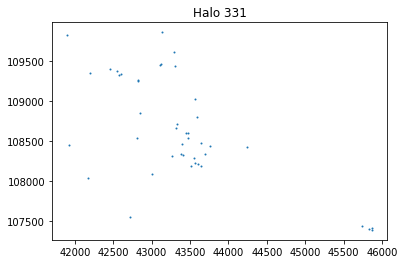

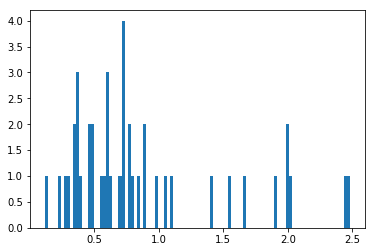

galaxies [0, 0, 0, 0, 1, 0, 0, 1, 1, 3, 4, 4, 6, 6, 5, 3, 0, 3, 4, 2]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 4, 3, 3, 5, 4, 2, 0, 2, 4, 2]
red galaxies counted [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 43
R_avg: 0.6982244391252947
Time: 257.0085549354553


Text(0, 0.5, 'dlog of Number Density')

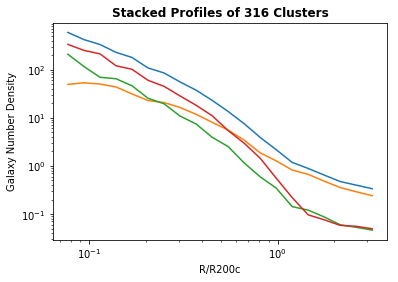

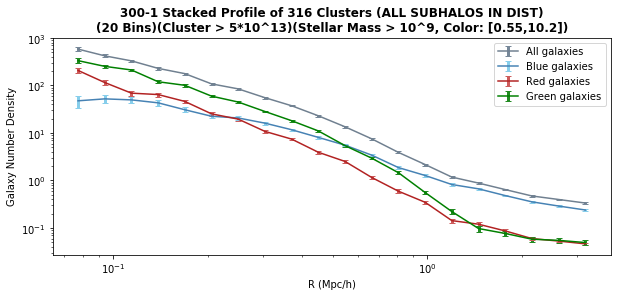

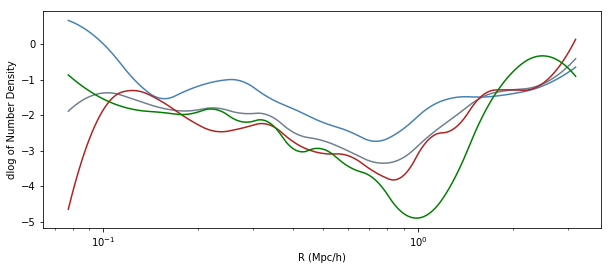

In [52]:
#COLOR SPLIT PROFILES:

bins = 20#30#15
Rmin = .1
Rmax = 5#5.5 # for R200c#7
Halo_Rmax = 5
red1_ratio2 = []
red2_ratio2 = []
number_red1 = []
number_red2 = []

t0 = time.time()
print('starting halo loop')
for h_i in halo_array_masked[:]:
    print("\nHalo:", h_i)
    print("Halo Mass:", halo_grp['GroupMass'][h_i])
    N_subhalos = halo_grp['GroupNsubs'][h_i]
    print("N Subhalos from Illustris Algorithm:",N_subhalos, time.time()-t0)
    
    # TAKING TABLE WITH CLEAN SUBS AFTER MASS CUT AND GETTING FOR DISTANCE
    R500c = .001*scale_factor*halo_grp['Group_R_Crit500'][h_i] #ckpc/h to Mpc/h
    R200c = .001*scale_factor*halo_grp['Group_R_Crit200'][h_i]
    R200m = .001*scale_factor*halo_grp['Group_R_Mean200'][h_i]
    #M200m = halo_grp['Group_M_Mean200'][h_i]
    print("R500c, R200c, R200m:",R500c, R200c, R200m)
    RScale = R200m
    RScale_list.append(RScale)
    
    CM_halo = halo_grp['GroupCM'][h_i]
    redshift = header['Redshift']
    boxsize = header['BoxSize'] #kpc/h
    box_bounds = boxsize*np.ones(3)#*conv_fac
    dev = np.array(CM_coords-CM_halo) #has all subhalos > mass cut
    dev_old = dev
    print('before dev loop:',time.time()-t0)
    for ind, q in enumerate(dev.T):
        q = np.where(np.abs(q) > 0.5 * box_bounds[ind], box_bounds[ind]-np.abs(q), q)
        dev.T[ind] = q
    print((dev_old==dev).all())
    r_subhalo_all = np.linalg.norm(dev, axis=1)*.001*scale_factor #Mpc/h #has all subhalos > mass cut
    print(len(CM_coords),len(r_subhalo_all), 'time', time.time()-t0)
    # TAKING SUBS IN DISTANCE OF HALO CENTER
    r_subhalo_hi = r_subhalo_all[r_subhalo_all<=(Halo_Rmax*R200m)]
    subhalo_table_hi = subhalo_table_m[r_subhalo_all<=(Halo_Rmax*R200m)]
    print("N Subhalos within %s*R200m:" %(Halo_Rmax), len(r_subhalo_hi), time.time()-t0)
    Rmax_list.append(max(r_subhalo_hi/RScale))
    
    plt.figure()
    plt.scatter(subhalo_table_hi['SubhaloCM'][:,0],subhalo_table_hi['SubhaloCM'][:,1],s=1)
    plt.title('Halo %s' %(h_i))
    plt.figure()
    plt.hist(r_subhalo_hi,bins=100)
    plt.show()
  
    # COLOR CUTS
    mag = subhalo_table_hi['SubhaloStellarPhotometrics']
    gmr = mag[:,4]-mag[:,5]
    rmz = mag[:,5]-mag[:,7]
    sm = np.log10(subhalo_table_hi['StellarMass']*1e10)
    b1 = -.2#.2
    b2 = 0.50#.59#.734
    r1 = 0.55#.6#.735
    r2 = 1.#1.
    sm1 = 10.2
    slope = -0.4
    intercept = 4.8
    blue_mask_subs = (gmr<0.55)#(gmr<0.53)#
    red_mask_subs = (gmr>r1)&(sm>=sm1)#&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
    green_mask_subs = (gmr>r1)&(sm<sm1)#&(gmr<((slope*sm)+intercept))
    #blue_mask_subs = (gmr<b2)&(gmr<((slope*sm)+intercept))#(gmr<0.6)#(gmr<0.53)#
    #red_mask_subs = (gmr>r1)&(sm>=sm1)&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
    #green_mask_subs = (gmr>r1)&(sm<sm1)&(gmr<((slope*sm)+intercept))
    color_title = '[%s,%s]' %(r1,sm1)#'[%s,%s,%s,%s,%s]' %(b2,r1,sm1,slope,intercept)
    
    red1_ratio2.extend(((subhalo_table_hi['SubhaloMass'][red_mask_subs])/(halo_grp['GroupMass'][h_i])).tolist())
    red2_ratio2.extend(((subhalo_table_hi['SubhaloMass'][green_mask_subs])/(halo_grp['GroupMass'][h_i])).tolist())
    
    # MAKING PROFILE
    NDensity, NDensity_blue, NDensity_red, NDensity_green, galaxies, galaxies_blue, galaxies_red, galaxies_green = DensityProfileColors(Rmin,Rmax,bins,r_subhalo_hi,blue_mask_subs,red_mask_subs,green_mask_subs)    


    print("galaxies", galaxies)
    print("blue galaxies counted", galaxies_blue)
    print("red galaxies counted", galaxies_red)
    print("red galaxies counted", galaxies_green)
    number_red1.append(sum(galaxies_red))
    number_red2.append(sum(galaxies_green))
        
    print("sum of galaxies:", sum(galaxies))
    r_shell = (bin_min + bin_max)/2
    r_stack = r_shell/RScale
    
    NDensity_list.append(NDensity) #/M200m
    NDensity_list_b.append(NDensity_blue)
    NDensity_list_r.append(NDensity_red)
    NDensity_list_g.append(NDensity_green)


# RADIAL BINS, R_AVG, ETC
R_avg = np.mean(RScale_list) #Mpc/h
print("R_avg:", R_avg)
#print("R200c list:", RScale_list)
bin_divided = np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1)
bin_stack1 = R_avg*(bin_divided[1:]+bin_divided[:-1])/2

# PLOTTING BASIC AVERAGED STACKS
NDensity_stack = np.mean(NDensity_list, axis=0)
NDensity_stack_b = np.mean(NDensity_list_b, axis=0)
NDensity_stack_r = np.mean(NDensity_list_r, axis=0)
NDensity_stack_g = np.mean(NDensity_list_g, axis=0)
plt.figure()
plt.plot(bin_stack1, NDensity_stack, '-')
plt.plot(bin_stack1, NDensity_stack_b, '-')
plt.plot(bin_stack1, NDensity_stack_r, '-')
plt.plot(bin_stack1, NDensity_stack_g, '-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200c')
plt.ylabel('Galaxy Number Density')#  (scaled by M200m)
plt.title('Stacked Profiles of %s Clusters' %(Number_of_halos), fontweight = 'bold', wrap=True)

# BOOTSTRAP PROFILES, ERRORBARS
Yi_avg1, cov1, boot_err1 = Bootstrap_Covariance(NDensity_list, 300, bins)
Yi_avg_blue1, cov_blue1, boot_err_blue1 = Bootstrap_Covariance(NDensity_list_b, 300, bins)
Yi_avg_red1, cov_red1, boot_err_red1 = Bootstrap_Covariance(NDensity_list_r, 300, bins)
Yi_avg_green1, cov_green1, boot_err_green1 = Bootstrap_Covariance(NDensity_list_g, 300, bins)
dlog_data_SG_x, dlog_data_SG_y, yy_fine, xx_fine = get_slope_sg(bin_stack1, (Yi_avg1), 1000)  
dlog_data_SG_x_b, dlog_data_SG_y_b, yy_fine_b, xx_fine_b = get_slope_sg(bin_stack1, (Yi_avg_blue1), 1000)  
dlog_data_SG_x_r, dlog_data_SG_y_r, yy_fine_r, xx_fine_r = get_slope_sg(bin_stack1, (Yi_avg_red1), 1000)  
dlog_data_SG_x_g, dlog_data_SG_y_g, yy_fine_g, xx_fine_g = get_slope_sg(bin_stack1, (Yi_avg_green1), 1000)  

print("Time:",time.time()-t0)         
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(10,4))
plt.errorbar(bin_stack1, Yi_avg1, yerr = boot_err1, c = 'slategrey', ecolor = 'lightslategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
plt.errorbar(bin_stack1, Yi_avg_blue1, yerr = boot_err_blue1, c = 'steelblue',ecolor = 'skyblue', elinewidth = 3, capsize=3, label = 'Blue galaxies')
plt.errorbar(bin_stack1, Yi_avg_red1, yerr = boot_err_red1, c='firebrick', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red galaxies')
plt.errorbar(bin_stack1, Yi_avg_green1, yerr = boot_err_green1, c='green', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Green galaxies')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Stacked Profile of %s Clusters (ALL SUBHALOS IN DIST)\n (%s Bins)(Cluster > 5*10^13)(Stellar Mass > 10^%s, Color: %s)' %(Number_of_halos, bins, M, color_title), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
plt.figure(figsize = (10,4))
plt.plot(dlog_data_SG_x, dlog_data_SG_y, c = 'slategrey')
plt.plot(dlog_data_SG_x_b, dlog_data_SG_y_b, c = 'steelblue')
plt.plot(dlog_data_SG_x_r, dlog_data_SG_y_r, c = 'firebrick')
plt.plot(dlog_data_SG_x_g, dlog_data_SG_y_g, c = 'green')
plt.xscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('dlog of Number Density')
plt.text(2.8,-4.5,'SG: %s,%s'%(w,p))


6926 [0.836208164691925, 0.04715836048126221, 0.008932583965361118, 0.004133705981075764, 0.0015359623357653618, 0.0016187879955396056, 0.0017632900271564722, 0.0014121757121756673, 0.000726063852198422, 0.0015406700549647212]
11885 [0.00033688885741867125, 0.0002524737792555243, 0.00022726578754372895, 0.00020425437833182514, 0.000215161097003147, 0.0002672770933713764, 0.00022889897809363902, 0.0002085890300804749, 0.00017869757721200585, 0.00022504683875013143]
6658 11612
276.70343 126.50072
73129.44 4124.1694
73129.44 4124.1694
[1.0868904e+04 6.1980766e+04 0.0000000e+00 0.0000000e+00 2.7670343e+02
 3.0654702e+00] [3.1425165e+02 3.6823003e+03 0.0000000e+00 0.0000000e+00 1.2650072e+02
 1.1166244e+00]


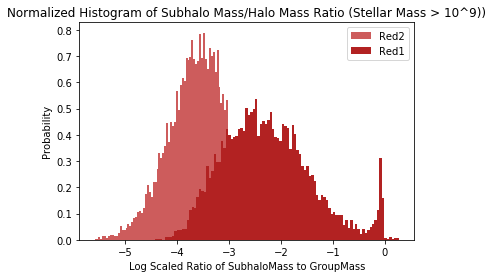

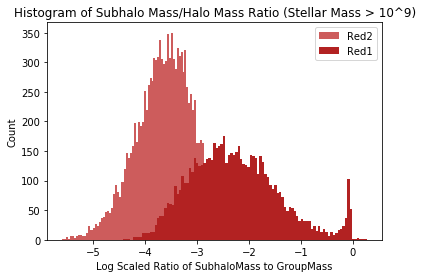

In [53]:
# Dynamical Friction Histograms

print(len(red1_ratio2), red1_ratio2[:10])
print(len(red2_ratio2), red2_ratio2[:10])
print(sum(number_red1), sum(number_red2))
print(subhalo_table['StellarMass'][0],subhalo_table['StellarMass'][1])
print(subhalo_table['SubhaloMass'][0],subhalo_table['SubhaloMass'][1])
print(subhalo_grp['SubhaloMass'][0],subhalo_grp['SubhaloMass'][1])
print(subhalo_grp['SubhaloMassType'][0],subhalo_grp['SubhaloMassType'][1])

plt.figure()
plt.hist(np.log10(red2_ratio2), bins=100, label = 'Red2', density=True, stacked=True, color='indianred')
plt.hist(np.log10(red1_ratio2), bins=100, label = 'Red1',density=True,stacked=True,color='firebrick')
plt.xlabel('Log Scaled Ratio of SubhaloMass to GroupMass')
plt.ylabel('Probability')
plt.title('Normalized Histogram of Subhalo Mass/Halo Mass Ratio (Stellar Mass > 10^%s))' %(M))
plt.legend()

plt.figure()
plt.hist(np.log10(red2_ratio2), bins=100, label = 'Red2', density=False, stacked=True, color = 'indianred')
plt.hist(np.log10(red1_ratio2), bins=100, label = 'Red1',density=False,stacked=True, color='firebrick')
plt.xlabel('Log Scaled Ratio of SubhaloMass to GroupMass')
plt.ylabel('Count')
plt.title('Histogram of Subhalo Mass/Halo Mass Ratio (Stellar Mass > 10^%s)' %(M))
plt.legend()


Time: 658.0061402320862


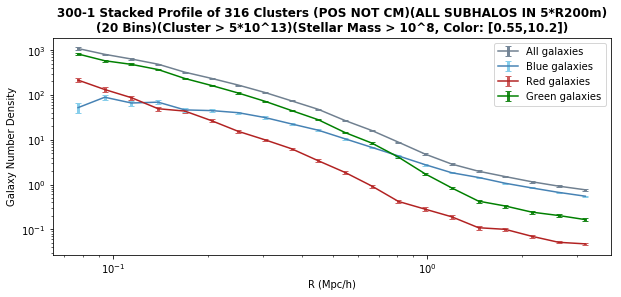

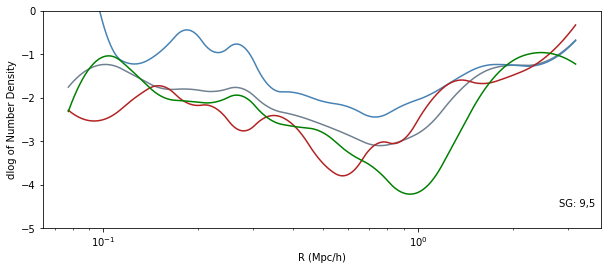

In [49]:
# REPLOTTING AND ADJUSTING (NEW ALL SUBS/TABLE)

#SAVITSKY GOLAY LOG DERIVATIVE:
#Functions to get log slope
import scipy.signal as signal
import scipy.interpolate as interpolate
w = 9#9
p = 5#5
def get_slope_sg(xx, yy, num_output):
    # Savitsky-Golay smoothing                                                                                                                                        
    window_size = w#7#9
    poly_order = p#5#5
    yy_filtered = signal.savgol_filter(np.log(yy), window_size, poly_order)
    # fit spline                                                                                                                                                      
    yy_spline = interpolate.interp1d(np.log(xx), yy_filtered, kind = 'cubic')
    #Evaluate spline on very fine grid                                                                                                                                
    numsmooth = 1000
    lnxx_fine = np.linspace(np.log(np.min(xx)), np.log(np.max(xx)), num = numsmooth)
    lnyy_fine = yy_spline(lnxx_fine)
    yy_fine = np.exp(lnyy_fine)
    #Calculate derivative using finite differences                                                                                                                    
    dlny_dlnx_fine = (lnyy_fine[1:] - lnyy_fine[:-1])/(lnxx_fine[1:] - lnxx_fine[:-1])
    #Interpolate derivative onto desired array                                                                                                                        
    interp_func = interpolate.interp1d(lnxx_fine[:-1], dlny_dlnx_fine)
    lnxx_out = np.linspace(np.min(lnxx_fine[:-1]), np.max(lnxx_fine[:-1]), num = num_output)
    dlny_dlnx_out = interp_func(lnxx_out)
    return np.exp(lnxx_out), dlny_dlnx_out, yy_fine, np.exp(lnxx_fine)
# BOOTSTRAP PROFILES, ERRORBARS
Yi_avg1, cov1, boot_err1 = Bootstrap_Covariance(NDensity_list, 300, bins)
Yi_avg_blue1, cov_blue1, boot_err_blue1 = Bootstrap_Covariance(NDensity_list_b, 300, bins)
Yi_avg_red1, cov_red1, boot_err_red1 = Bootstrap_Covariance(NDensity_list_r, 300, bins)
Yi_avg_green1, cov_green1, boot_err_green1 = Bootstrap_Covariance(NDensity_list_g, 300, bins)

dlog_data_SG_x, dlog_data_SG_y, yy_fine, xx_fine = get_slope_sg(bin_stack1, (Yi_avg1), 1000)  
dlog_data_SG_x_b, dlog_data_SG_y_b, yy_fine_b, xx_fine_b = get_slope_sg(bin_stack1, (Yi_avg_blue1), 1000)  
dlog_data_SG_x_r, dlog_data_SG_y_r, yy_fine_r, xx_fine_r = get_slope_sg(bin_stack1, (Yi_avg_red1), 1000)  
dlog_data_SG_x_g, dlog_data_SG_y_g, yy_fine_g, xx_fine_g = get_slope_sg(bin_stack1, (Yi_avg_green1), 1000)  

print("Time:",time.time()-t0)         
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(10,4))
plt.errorbar(bin_stack1, Yi_avg1, yerr = boot_err1, c = 'slategrey', ecolor = 'lightslategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
plt.errorbar(bin_stack1, Yi_avg_blue1, yerr = boot_err_blue1, c = 'steelblue',ecolor = 'skyblue', elinewidth = 3, capsize=3, label = 'Blue galaxies')
plt.errorbar(bin_stack1, Yi_avg_red1, yerr = boot_err_red1, c='firebrick', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red galaxies')
plt.errorbar(bin_stack1, Yi_avg_green1, yerr = boot_err_green1, c='green', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Green galaxies')
#plt.plot(xx_fine, yy_fine, c = 'orange')
#plt.plot(xx_fine_b, yy_fine_b, c = 'orange')
#plt.plot(xx_fine_r, yy_fine_r, c = 'orange')
#plt.plot(xx_fine_g, yy_fine_g, c = 'orange')

#plt.plot(xx_fine_g, yy_fine_g, c = 'orange')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Stacked Profile of %s Clusters (ALL SUBHALOS IN %s*R200m)\n (%s Bins)(Cluster > 5*10^13)(Stellar Mass > 10^%s, Color: %s)' %(Number_of_halos, Halo_Rmax, bins, M,color_title), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
plt.figure(figsize = (10,4))
plt.plot(dlog_data_SG_x, dlog_data_SG_y, c = 'slategrey')
plt.plot(dlog_data_SG_x_b, dlog_data_SG_y_b, c = 'steelblue')
plt.plot(dlog_data_SG_x_r, dlog_data_SG_y_r, c = 'firebrick')
plt.plot(dlog_data_SG_x_g, dlog_data_SG_y_g, c = 'green')
plt.xscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('dlog of Number Density')
plt.text(2.8,-4.5,'SG: %s,%s'%(w,p))
plt.ylim(-5,0)
plt.show()


[3 1 3 0 0 0 1 1 1 0 0 0 1 0 1 2 1 0 0 0 0 0 0 0 0 2 2 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 2 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


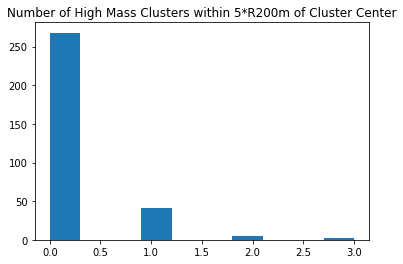

In [57]:
# Finding Nearby Halos

#print(len(subhalo_table_clean), len(subhalo_table_m))
#print(subhalo_table_clean['StellarMass'][1000:1050]*1e10)
#print(subhalo_table_m['StellarMass'][1000:1050]*1e10)
halos_nearby = []
for h_i in halo_array_masked[:]:
    CM_halo = halo_grp['GroupCM'][h_i]
    R200m = .001*scale_factor*halo_grp['Group_R_Mean200'][h_i]
    #dev = np.array(CM_HALOS - CM_halo) #has all subhalos > mass cut
    N = 0
    for h_j in halo_array_masked[:]:
        if h_j != h_i:
            CM_halo_j = halo_grp['GroupCM'][h_j]
            R = np.linalg.norm(CM_halo_j-CM_halo)*.001*scale_factor #Mpc/h #has all subhalos > mass cut
            #if h_i == 0:
                #print(R200m,R)
            if (R<=5*R200m):
                N += 1
    halos_nearby.append(N)
halos_nearby = np.array(halos_nearby)
print(halos_nearby)
plt.figure()
plt.hist(halos_nearby)
plt.title('Number of High Mass Clusters within 5*R200m of Cluster Center')
plt.show()




## Color Splitting Profiles (OLD)

Number of halos with mass > 10^14 Msun: 316
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 23

N Subhalos after total masking: 121
len of all, blue, red: 121 21 30 70
R500c, R200c, R200m: 0.5770362450325272 0.8675239024200502 1.07320081643798
galaxies [4, 3, 5, 3, 6, 7, 8, 15, 13, 11, 13, 21, 6, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 1, 1, 1, 3, 5, 1, 2, 6, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 2, 1, 1, 1, 2, 3, 4, 2, 1, 2, 5, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [3, 1, 4, 2, 4, 4, 4, 8, 6, 9, 9, 10, 4, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 115

Halo: 13
Halo Mass: 27343.611
N Subhalos: 1930
N Subhalos after first masking: 1884
N Subhalos after total masking: 137
len of all, blue, red: 137 54 30 53
R500c, R200c, R200m: 0.493707176709387 0.7360678987552932 0.9043717716298794
galaxies [0, 1, 0, 0, 2, 1, 2, 8, 14, 24, 31, 24, 16, 6, 5, 1, 0, 0, 0, 0]
blue galaxies counted [0, 1, 0, 0, 1, 1, 2, 2, 4, 5, 10, 11, 8, 3, 4, 1, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 2, 8, 8, 5, 2, 2, 1, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0

N Subhalos after first masking: 1496
N Subhalos after total masking: 88
len of all, blue, red: 88 17 18 53
R500c, R200c, R200m: 0.45071321852005225 0.7242356365740082 0.9230487239676657
galaxies [1, 1, 4, 3, 8, 7, 3, 9, 10, 15, 11, 11, 3, 0, 1, 0, 0, 0, 0, 0]
blue galaxies counted [0, 1, 0, 0, 1, 0, 0, 2, 2, 1, 2, 6, 1, 0, 1, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 1, 1, 4, 2, 0, 0, 2, 3, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 3, 2, 3, 5, 3, 7, 6, 11, 6, 5, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 87

Halo: 28
Halo Mass: 18303.37
N Subhalos: 1259
N Subhalos after first masking: 1246
N Subhalos after total masking: 88
len of all, blue, red: 88 18 21 49
R500c, R200c, R200m: 0.47005714481822525 0.7368807582565953 0.9160478994506897
galaxies [0, 1, 2, 3, 4, 0, 6, 8, 10, 16, 16, 10, 4, 2, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 3, 2, 1, 3, 3, 3, 2, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 1, 1, 1, 0, 2, 1, 2, 4, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0]


N Subhalos after first masking: 1201
N Subhalos after total masking: 85
len of all, blue, red: 85 25 21 39
R500c, R200c, R200m: 0.40733048577313546 0.6504043815363484 0.8165077607895266
galaxies [0, 0, 1, 2, 3, 10, 9, 6, 6, 13, 9, 6, 9, 7, 1, 3, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 0, 3, 3, 0, 0, 4, 2, 2, 5, 3, 0, 2, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 2, 1, 1, 3, 1, 5, 1, 4, 0, 3, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 1, 1, 1, 6, 5, 3, 5, 4, 6, 0, 4, 1, 1, 1, 0, 0, 0, 0]
sum of galaxies: 85

Halo: 43
Halo Mass: 15200.831
N Subhalos: 1214
N Subhalos after first masking: 1206
N Subhalos after total masking: 86
len of all, blue, red: 86 22 15 49
R500c, R200c, R200m: 0.4657102441192561 0.711563611740078 0.8754398344272135
galaxies [0, 3, 2, 5, 2, 8, 17, 10, 5, 9, 10, 8, 1, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 0, 2, 1, 1, 2, 1, 7, 3, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 1, 1, 0, 6, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red g

N Subhalos after first masking: 858
N Subhalos after total masking: 74
len of all, blue, red: 74 17 15 42
R500c, R200c, R200m: 0.4228998839240589 0.6364812800960504 0.7824358003711316
galaxies [2, 0, 3, 3, 6, 7, 2, 7, 8, 3, 7, 6, 8, 3, 3, 1, 2, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 1, 0, 1, 2, 3, 0, 2, 2, 1, 1, 2, 0, 2, 0, 0, 0]
red galaxies counted [1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 5, 0, 2, 0, 1, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 3, 3, 4, 5, 1, 5, 5, 2, 0, 4, 5, 2, 0, 1, 0, 0, 0, 0]
sum of galaxies: 71

Halo: 58
Halo Mass: 13182.956
N Subhalos: 965
N Subhalos after first masking: 956
N Subhalos after total masking: 88
len of all, blue, red: 88 22 12 54
R500c, R200c, R200m: 0.3595163396003362 0.5518689875020656 0.701436496912982
galaxies [0, 0, 0, 0, 0, 0, 1, 5, 10, 19, 14, 8, 16, 9, 5, 1, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 2, 7, 4, 1, 1, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 1, 4, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0]
red galaxi

N Subhalos after first masking: 728
N Subhalos after total masking: 46
len of all, blue, red: 46 8 8 30
R500c, R200c, R200m: 0.43359148451594787 0.6481700187690529 0.7958097092070726
galaxies [1, 2, 1, 3, 5, 2, 2, 7, 7, 5, 4, 1, 1, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 1, 1, 3, 3, 2, 1, 5, 2, 2, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 41

Halo: 73
Halo Mass: 11412.425
N Subhalos: 955
N Subhalos after first masking: 940
N Subhalos after total masking: 55
len of all, blue, red: 55 19 14 22
R500c, R200c, R200m: 0.38442537491924356 0.5967422829436472 0.7624553262956387
galaxies [1, 2, 3, 1, 3, 3, 2, 3, 5, 3, 9, 9, 6, 3, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 1, 0, 1, 0, 0, 1, 3, 1, 5, 2, 2, 2, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 2, 3, 2, 1, 0, 0, 0, 0, 0, 0]
red galaxies 

N Subhalos after first masking: 847
N Subhalos after total masking: 62
len of all, blue, red: 62 14 14 34
R500c, R200c, R200m: 0.3733695408884831 0.5914074120529359 0.7435145469231016
galaxies [1, 1, 2, 1, 1, 5, 3, 6, 3, 9, 10, 6, 7, 6, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 6, 1, 2, 2, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 2, 1, 0, 2, 2, 2, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 0, 0, 1, 3, 1, 3, 3, 6, 3, 5, 4, 4, 0, 0, 0, 0, 0, 0]
sum of galaxies: 61

Halo: 88
Halo Mass: 10377.713
N Subhalos: 915
N Subhalos after first masking: 904
N Subhalos after total masking: 54
len of all, blue, red: 54 15 16 23
R500c, R200c, R200m: 0.36927057354705745 0.5933709417564849 0.7523559153089142
galaxies [1, 0, 2, 0, 2, 3, 1, 1, 6, 6, 13, 3, 5, 3, 1, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 1, 1, 1, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 4, 1, 1, 1, 0, 0, 0, 0, 0, 0]
red galaxi

N Subhalos after first masking: 767
N Subhalos after total masking: 47
len of all, blue, red: 47 24 8 15
R500c, R200c, R200m: 0.3890160854272616 0.5731047818357747 0.700963930248612
galaxies [1, 0, 0, 0, 2, 4, 8, 3, 5, 6, 5, 4, 3, 4, 2, 0, 0, 0, 0, 0]
blue galaxies counted [1, 0, 0, 0, 2, 2, 2, 0, 3, 5, 4, 0, 2, 1, 2, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 2, 1, 3, 0, 0, 0, 0, 0, 0]
sum of galaxies: 47

Halo: 103
Halo Mass: 9901.212
N Subhalos: 770
N Subhalos after first masking: 763
N Subhalos after total masking: 55
len of all, blue, red: 55 18 16 21
R500c, R200c, R200m: 0.3732443131244922 0.569281451692264 0.7165775264338853
galaxies [1, 1, 2, 3, 2, 4, 3, 4, 3, 3, 2, 7, 9, 6, 4, 1, 0, 0, 0, 0]
blue galaxies counted [0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 2, 3, 2, 2, 2, 1, 0, 0, 0, 0]
red galaxies counted [1, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 2, 3, 2, 1, 0, 0, 0, 0, 0]
red galaxies cou

N Subhalos after first masking: 687
N Subhalos after total masking: 56
len of all, blue, red: 56 26 9 21
R500c, R200c, R200m: 0.372789681894351 0.5844826129591757 0.7274692192138902
galaxies [3, 3, 3, 2, 1, 2, 5, 10, 3, 4, 7, 5, 4, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [1, 0, 1, 0, 0, 1, 0, 4, 2, 3, 4, 5, 3, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 1, 1, 0, 0, 1, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 2, 1, 2, 1, 0, 5, 3, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 53

Halo: 118
Halo Mass: 9247.675
N Subhalos: 803
N Subhalos after first masking: 783
N Subhalos after total masking: 64
len of all, blue, red: 64 30 10 24
R500c, R200c, R200m: 0.33114590559583384 0.5286454025872567 0.6554902381393282
galaxies [0, 1, 0, 0, 5, 4, 3, 4, 3, 3, 10, 3, 16, 9, 3, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 2, 2, 0, 2, 1, 1, 5, 2, 10, 4, 1, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0]
red galaxi

N Subhalos after first masking: 659
N Subhalos after total masking: 41
len of all, blue, red: 41 9 6 26
R500c, R200c, R200m: 0.3534979605208085 0.5626716036276971 0.7080698051660715
galaxies [1, 2, 1, 5, 0, 1, 3, 3, 7, 3, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 3, 2, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 2, 1, 5, 0, 1, 3, 2, 3, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 38

Halo: 133
Halo Mass: 8327.565
N Subhalos: 503
N Subhalos after first masking: 495
N Subhalos after total masking: 41
len of all, blue, red: 41 6 7 28
R500c, R200c, R200m: 0.37210877594487585 0.5734904737405987 0.7015678099135865
galaxies [0, 2, 2, 2, 2, 1, 2, 4, 6, 7, 3, 1, 4, 3, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies cou

N Subhalos after first masking: 729
N Subhalos after total masking: 45
len of all, blue, red: 45 23 11 11
R500c, R200c, R200m: 0.23316514885129877 0.42072341097349336 0.573966443333338
galaxies [0, 0, 0, 0, 0, 1, 4, 1, 3, 7, 9, 5, 5, 9, 1, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 3, 5, 3, 5, 1, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 1, 4, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 5, 0, 1, 2, 0, 0, 0, 0, 0, 0]
sum of galaxies: 45

Halo: 148
Halo Mass: 8410.298
N Subhalos: 755
N Subhalos after first masking: 745
N Subhalos after total masking: 39
len of all, blue, red: 39 12 11 16
R500c, R200c, R200m: 0.3365799218054465 0.5395676416536827 0.6763263285102222
galaxies [0, 1, 0, 0, 0, 2, 6, 9, 4, 1, 5, 6, 2, 1, 0, 2, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 1, 3, 2, 0, 0, 1, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 0, 1, 2, 2, 2, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0]
red galaxies

N Subhalos after first masking: 651
N Subhalos after total masking: 43
len of all, blue, red: 43 13 11 19
R500c, R200c, R200m: 0.2918016080998203 0.5420416106126296 0.6729753648588245
galaxies [0, 1, 0, 2, 2, 3, 4, 7, 6, 7, 3, 4, 2, 2, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 0, 0, 1, 3, 4, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 1, 1, 3, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 1, 0, 2, 3, 2, 5, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0]
sum of galaxies: 43

Halo: 163
Halo Mass: 7904.2363
N Subhalos: 617
N Subhalos after first masking: 602
N Subhalos after total masking: 43
len of all, blue, red: 43 17 8 18
R500c, R200c, R200m: 0.36695089736382064 0.559705210916484 0.6892209448939575
galaxies [1, 0, 0, 1, 8, 5, 6, 3, 5, 3, 6, 2, 0, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 2, 3, 3, 1, 3, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 3, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies 

N Subhalos after first masking: 815
N Subhalos after total masking: 40
len of all, blue, red: 40 18 10 12
R500c, R200c, R200m: 0.20972347626246787 0.35337053086199033 0.5297089177887976
galaxies [0, 1, 0, 0, 0, 1, 2, 2, 0, 4, 4, 4, 3, 2, 3, 9, 2, 1, 2, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 2, 5, 2, 1, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 3, 0, 0, 2, 0]
red galaxies counted [0, 1, 0, 0, 0, 0, 2, 0, 0, 3, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0]
sum of galaxies: 40

Halo: 178
Halo Mass: 7203.893
N Subhalos: 573
N Subhalos after first masking: 565
N Subhalos after total masking: 39
len of all, blue, red: 39 15 5 19
R500c, R200c, R200m: 0.3506559548501068 0.5494880185737295 0.6718899508123657
galaxies [1, 0, 2, 0, 4, 3, 2, 5, 6, 6, 2, 0, 4, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 1, 0, 0, 2, 0, 2, 1, 3, 1, 0, 4, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies

N Subhalos after first masking: 501
N Subhalos after total masking: 32
len of all, blue, red: 32 4 8 20
R500c, R200c, R200m: 0.3320443787714628 0.5399835996037677 0.6750545140580275
galaxies [0, 1, 2, 0, 1, 1, 2, 3, 10, 4, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 1, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 2, 0, 0, 1, 2, 2, 6, 2, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 31

Halo: 193
Halo Mass: 7080.1284
N Subhalos: 633
N Subhalos after first masking: 619
N Subhalos after total masking: 39
len of all, blue, red: 39 15 6 18
R500c, R200c, R200m: 0.28340394153891557 0.43412106023911684 0.5369897032244402
galaxies [0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 7, 2, 4, 2, 5, 7, 5, 1, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 3, 6, 1, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0]
red galaxies


Halo: 207
Halo Mass: 6543.4116
N Subhalos: 488
N Subhalos after first masking: 478
N Subhalos after total masking: 30
len of all, blue, red: 30 7 9 14
R500c, R200c, R200m: 0.3270789257810798 0.5212522004120723 0.6502222247824612
galaxies [2, 3, 0, 3, 1, 2, 0, 2, 4, 5, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 3, 0, 1, 1, 2, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 28

Halo: 208
Halo Mass: 6570.345
N Subhalos: 476
N Subhalos after first masking: 471
N Subhalos after total masking: 29
len of all, blue, red: 29 12 5 12
R500c, R200c, R200m: 0.3649271958798118 0.5410014755307084 0.6619903117381459
galaxies [1, 0, 1, 2, 4, 0, 2, 3, 0, 7, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 2, 1, 0, 1, 2, 0, 3, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 1, 0, 1, 0, 0, 0, 0, 0

N Subhalos after first masking: 427
N Subhalos after total masking: 37
len of all, blue, red: 37 9 8 20
R500c, R200c, R200m: 0.33810691585088887 0.5101105725519537 0.6332734396084211
galaxies [0, 2, 2, 4, 1, 0, 5, 3, 4, 3, 4, 3, 3, 2, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 2, 2, 4, 0, 0, 3, 1, 2, 0, 1, 2, 3, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 36

Halo: 223
Halo Mass: 6099.7847
N Subhalos: 524
N Subhalos after first masking: 512
N Subhalos after total masking: 28
len of all, blue, red: 28 15 5 8
R500c, R200c, R200m: 0.29669597992173596 0.4929715036303915 0.6178435214861884
galaxies [1, 1, 1, 1, 0, 1, 1, 4, 3, 7, 4, 1, 3, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 3, 3, 3, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies c

len of all, blue, red: 31 7 7 17
R500c, R200c, R200m: 0.3329849481727428 0.49484647712743535 0.6126877647310576
galaxies [0, 1, 1, 1, 2, 1, 3, 2, 2, 4, 4, 3, 5, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 29

Halo: 238
Halo Mass: 6075.759
N Subhalos: 483
N Subhalos after first masking: 478
N Subhalos after total masking: 28
len of all, blue, red: 28 10 5 13
R500c, R200c, R200m: 0.3247952205524292 0.5100236177235047 0.6267836548636141
galaxies [0, 0, 1, 1, 2, 4, 2, 2, 2, 4, 5, 1, 1, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 1, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 1, 1, 1, 3, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0]
sum 

N Subhalos after first masking: 390
N Subhalos after total masking: 23
len of all, blue, red: 23 3 4 16
R500c, R200c, R200m: 0.32492627332909946 0.5057477381413258 0.6250326280281163
galaxies [2, 2, 2, 2, 0, 2, 2, 0, 5, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [2, 1, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 21

Halo: 253
Halo Mass: 5553.335
N Subhalos: 329
N Subhalos after first masking: 316
N Subhalos after total masking: 33
len of all, blue, red: 33 6 7 20
R500c, R200c, R200m: 0.3330540476358657 0.5097209172364409 0.6290327503090262
galaxies [0, 2, 1, 1, 2, 1, 2, 4, 8, 4, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies cou

len of all, blue, red: 27 15 7 5
R500c, R200c, R200m: 0.2880012977658667 0.46117582204991164 0.5695267027415635
galaxies [0, 1, 0, 1, 1, 0, 3, 2, 4, 5, 2, 3, 2, 3, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 1, 0, 0, 2, 0, 2, 4, 0, 2, 1, 3, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 27

Halo: 268
Halo Mass: 5499.5674
N Subhalos: 479
N Subhalos after first masking: 472
N Subhalos after total masking: 33
len of all, blue, red: 33 9 11 13
R500c, R200c, R200m: 0.30105579173128283 0.4960739734419261 0.6145166585745356
galaxies [0, 0, 1, 3, 1, 2, 1, 2, 5, 6, 3, 5, 1, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 1, 0, 0, 1, 1, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 2, 1, 2, 0, 1, 2, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]
su

len of all, blue, red: 24 3 7 14
R500c, R200c, R200m: 0.30190490242833096 0.47583920053111656 0.5949590283747693
galaxies [1, 1, 0, 0, 2, 3, 2, 4, 4, 1, 2, 0, 3, 1, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 2, 2, 1, 2, 3, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
sum of galaxies: 24

Halo: 283
Halo Mass: 5127.922
N Subhalos: 363
N Subhalos after first masking: 358
N Subhalos after total masking: 16
len of all, blue, red: 16 4 3 9
R500c, R200c, R200m: 0.32971091071971736 0.48550876161311884 0.5897912612842174
galaxies [1, 1, 0, 1, 3, 3, 0, 0, 2, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [1, 0, 0, 1, 1, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
sum

len of all, blue, red: 30 16 8 6
R500c, R200c, R200m: 0.27672573464857675 0.43936801547454546 0.5491229043769272
galaxies [0, 0, 0, 0, 2, 0, 5, 3, 3, 3, 2, 1, 4, 6, 0, 1, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 1, 0, 2, 0, 2, 3, 1, 0, 3, 3, 0, 1, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]
sum of galaxies: 30

Halo: 298
Halo Mass: 5065.933
N Subhalos: 387
N Subhalos after first masking: 376
N Subhalos after total masking: 27
len of all, blue, red: 27 7 7 13
R500c, R200c, R200m: 0.2990328909363021 0.4725223862667662 0.6032335089287048
galaxies [0, 0, 0, 1, 0, 2, 3, 3, 1, 3, 6, 4, 1, 0, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0]
sum 

N Subhalos after first masking: 474
N Subhalos after total masking: 26
len of all, blue, red: 26 10 6 10
R500c, R200c, R200m: 0.29752793585635756 0.46233297783328603 0.581297351902138
galaxies [0, 1, 1, 1, 0, 4, 1, 0, 0, 5, 2, 6, 0, 3, 0, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 4, 0, 3, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
red galaxies counted [0, 1, 0, 1, 0, 3, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 24

Halo: 320
Halo Mass: 5094.6997
N Subhalos: 479
N Subhalos after first masking: 472
N Subhalos after total masking: 28
len of all, blue, red: 28 10 8 10
R500c, R200c, R200m: 0.2455237639824147 0.38890963382097904 0.49358198897984745
galaxies [0, 0, 0, 0, 0, 0, 1, 0, 4, 4, 1, 3, 7, 5, 3, 0, 0, 0, 0, 0]
blue galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 4, 1, 0, 0, 0, 0, 0]
red galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 3, 1, 1, 0, 0, 0, 0, 0]
red galaxie

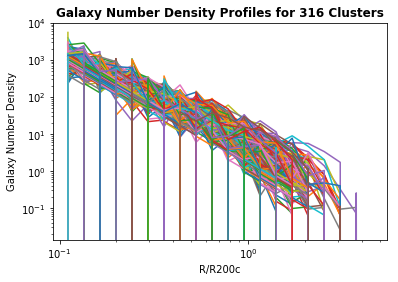

R_avg: 0.6982244391252947
Rmax_list: [1.3280076, 1.711756, 1.5610569, 1.6879034, 2.1744728, 1.6084954, 1.6712394, 1.8458252, 1.2041478, 1.5363575, 1.6136098, 1.4473686, 1.2585247, 2.0040758, 1.4508549, 1.1486049, 2.2576675, 2.903064, 1.85229, 1.8103445, 1.0514941, 3.1170206, 2.1657348, 1.780066, 2.2047398, 1.2322907, 1.3333524, 1.7034097, 1.3237178, 2.2414794, 1.2003801, 2.1937907, 1.0524186, 2.7535207, 3.5576003, 2.312443, 2.1586478, 1.6497698, 1.4909953, 2.0866988, 1.3502595, 1.699537, 2.0972915, 1.0684441, 1.4308753, 1.4059935, 1.5951569, 1.7059721, 1.0667516, 1.9059974, 1.4038466, 2.0995173, 1.389817, 1.9110792, 1.3321853, 1.3032626, 1.3270646, 2.4328506, 1.9011108, 2.6588788, 1.9845538, 1.256914, 1.4655832, 2.8205116, 2.1419508, 1.4667588, 1.5191082, 2.281196, 2.9330354, 1.3570163, 1.7665392, 1.3859499, 1.1245502, 1.4906052, 1.7301228, 1.3214043, 0.8069425, 1.618137, 2.3211062, 1.487538, 1.0555279, 2.1285527, 1.7142245, 1.4286313, 2.511805, 2.528558, 0.9392687, 1.4744961, 1.614008

/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log


Text(0, 0.5, 'dlog of Number Density')

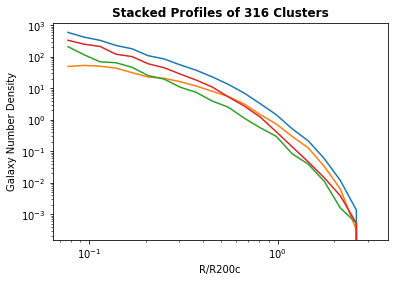

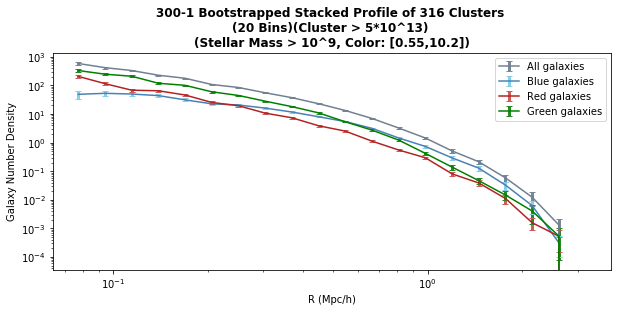

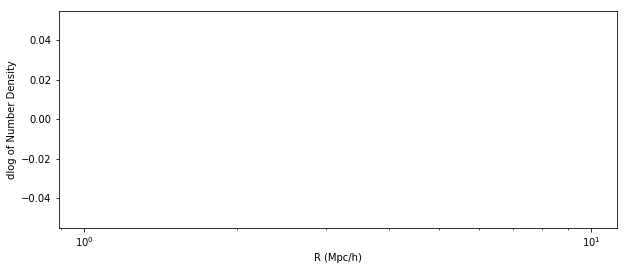

In [32]:
from astropy.cosmology import Planck15 as cosmo
plt.rcParams['figure.facecolor'] = 'w'
#R_list = np.array(Rmax_list)
scale_factor = header['Time']
mask_halomass = ((halo_grp['GroupMass'])>=((5*(10**3))))&(halo_grp['GroupNsubs']>=10)
Number_of_halos = len(halo_grp['GroupMass'][mask_halomass])
print("Number of halos with mass > 10^14 Msun:", Number_of_halos)

halo_array = np.arange(0,len(halo_grp['GroupMass']))
halo_array_masked = halo_array[mask_halomass]#[R_list>5.]
print(halo_array_masked)

bins = 20#30#15
Rmin = .1
Rmax = 5#3#5.5 # for R200c#7

NDensity_list = []
NDensity_list_b = []
NDensity_list_r = []
NDensity_list_g = []
ND_boot = []
ND_boot_b = []
ND_boot_r = []
ND_boot_g = []
RScale_list = []
Rmax_list = []
mask_photo = subhalo_grp['SubhaloStellarPhotometrics']<8e+36
photo_mask = mask_photo[:,0]
for i in range (1,8):
        photo_mask = photo_mask & mask_photo[:,i]

mask_basic = (photo_mask)&(subhalo_grp['SubhaloFlag'])&(subhalo_grp['SubhaloMass']!=0)&(subhalo_grp['SubhaloMassType'][:,4]!=0)

for h_i in halo_array_masked:
    print("\nHalo:", h_i)
    print("Halo Mass:", halo_grp['GroupMass'][h_i])
    N_subhalos = halo_grp['GroupNsubs'][h_i]
    print("N Subhalos:",N_subhalos)

    # MASKING OF SUBHALO MASS
    #subhalomass = np.array((np.sum(subhalo_grp['SubhaloMassInRadType'], axis=1)*1e10))
    #subhalomass = (subhalo_grp['SubhaloMass'])*1e10
    #subhalomass = np.array(((subhalo_grp['SubhaloStellarPhotometricsMassInRad'])*1e10))
    #mask = np.logical_and((subhalo_grp['SubhaloGrNr'])==h_i , subhalo_grp['SubhaloFlag']==True) #masking so not flagged halos that are in halo
    #subhalomass = np.array(((subhalo_grp['SubhaloMassInRadType'][:,4])*1e10))
    subhalomass = np.array(((subhalo_grp['SubhaloMassType'][:,4])*(1e10)))
    mask = ((subhalo_grp['SubhaloGrNr'])==h_i)&(subhalo_grp['SubhaloFlag']==True)#&(submass_stellar >= (10**9))#(subhalomass>(10))
    print("N Subhalos after first masking:", len(subhalo_grp['SubhaloGrNr'][mask]))
    mask_total = (mask_basic)&((subhalo_grp['SubhaloGrNr'])==h_i)&(subhalomass > (10**9))
    print("N Subhalos after total masking:", len(subhalo_grp['SubhaloGrNr'][mask_total]))
    
    # COLOR CUTS
    mag = subhalo_grp['SubhaloStellarPhotometrics'][mask_total]
    gmr = mag[:,4]-mag[:,5]
    rmz = mag[:,5]-mag[:,7]
    sm = np.log10(subhalomass[mask_total])
    b1 = -.2#.2
    b2 = 0.50#.59#.734
    r1 = 0.55#.6#.735
    r2 = 1.#1.
    sm1 = 10.2
    slope = -0.4
    intercept = 4.8
    blue_mask_subs = (gmr<0.55)#(gmr<0.53)#
    red_mask_subs = (gmr>r1)&(sm>=sm1)#&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
    green_mask_subs = (gmr>r1)&(sm<sm1)#&(gmr<((slope*sm)+intercept))
    #blue_mask_subs = (gmr<b2)&(gmr<((slope*sm)+intercept))#(gmr<0.6)#(gmr<0.53)#
    #red_mask_subs = (gmr>r1)&(sm>=sm1)&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
    #green_mask_subs = (gmr>r1)&(sm<sm1)&(gmr<((slope*sm)+intercept))
    color_title = '[%s,%s]' %(r1,sm1)#'[%s,%s,%s,%s,%s]' %(b2,r1,sm1,slope,intercept)
    
    # COORDINATES
    CM_coords = subhalo_grp['SubhaloCM'][mask_total]
    CM_halo = halo_grp['GroupCM'][h_i]
    
    print("len of all, blue, red:", len(CM_coords), len(CM_coords[blue_mask_subs]), len(CM_coords[red_mask_subs]), len(CM_coords[green_mask_subs]))

    # MAKING PROFILE
    #r_subhalo = np.sqrt((CM_coords[:,0] - CM_halo[0])**2 + (CM_coords[:,1] - CM_halo[1])**2 + (CM_coords[:,2] - CM_halo[2])**2) # in ckpc/h
    redshift = header['Redshift']
    #H = cosmo.H(redshift)
    #conv_fac = 100/(H.value*1000)
    boxsize = header['BoxSize'] #kpc/h
    box_bounds = boxsize*np.ones(3)#*conv_fac
    dev = CM_coords-CM_halo
    for ind, q in enumerate(dev.T):
        q = np.where(np.abs(q) > 0.5 * box_bounds[ind], box_bounds[ind]-np.abs(q), q)
        dev.T[ind] = q
    r_subhalo = np.linalg.norm(dev, axis=1)*.001*scale_factor #Mpc/h
    
    R500c = .001*scale_factor*halo_grp['Group_R_Crit500'][h_i] #ckpc/h to Mpc/h
    R200c = .001*scale_factor*halo_grp['Group_R_Crit200'][h_i]
    R200m = .001*scale_factor*halo_grp['Group_R_Mean200'][h_i]
    M200m = halo_grp['Group_M_Mean200'][h_i]
    print("R500c, R200c, R200m:",R500c, R200c, R200m)
    RScale = R200m
    RScale_list.append(RScale)
    Rmax_list.append(max(r_subhalo/RScale))

    NDensity, NDensity_blue, NDensity_red, NDensity_green, galaxies, galaxies_blue, galaxies_red, galaxies_green = DensityProfileColors(Rmin,Rmax,bins,r_subhalo,blue_mask_subs,red_mask_subs,green_mask_subs)    


    print("galaxies", galaxies)
    print("blue galaxies counted", galaxies_blue)
    print("red galaxies counted", galaxies_red)
    print("red galaxies counted", galaxies_green)

        
    print("sum of galaxies:", sum(galaxies))
    r_shell = (bin_min + bin_max)/2
    r_stack = r_shell/RScale
    
    NDensity_list.append(NDensity) #/M200m
    NDensity_list_b.append(NDensity_blue)
    NDensity_list_r.append(NDensity_red)
    NDensity_list_g.append(NDensity_green)

    #plt.figure()
    plt.plot(r_stack, NDensity, '-') #/M200m
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('R/R200c')
    plt.ylabel('Galaxy Number Density') #/M200m
    plt.title('Galaxy Number Density Profiles for %s Clusters' %(Number_of_halos), fontweight = 'bold')
plt.show()

# RADIAL BINS, R_AVG, ETC
R_avg = np.mean(RScale_list) #Mpc/h
print("R_avg:", R_avg)
#print("R200c list:", RScale_list)
bin_divided = np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1)
bin_stack = R_avg*(bin_divided[1:]+bin_divided[:-1])/2
print("Rmax_list:", Rmax_list)
# PLOTTING BASIC AVERAGED STACKS
NDensity_stack = np.mean(NDensity_list, axis=0)
NDensity_stack_b = np.mean(NDensity_list_b, axis=0)
NDensity_stack_r = np.mean(NDensity_list_r, axis=0)
NDensity_stack_g = np.mean(NDensity_list_g, axis=0)
plt.figure()
plt.plot(bin_stack, NDensity_stack, '-')
plt.plot(bin_stack, NDensity_stack_b, '-')
plt.plot(bin_stack, NDensity_stack_r, '-')
plt.plot(bin_stack, NDensity_stack_g, '-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200c')
plt.ylabel('Galaxy Number Density')#  (scaled by M200m)
plt.title('Stacked Profiles of %s Clusters' %(Number_of_halos), fontweight = 'bold', wrap=True)

# BOOTSTRAP PROFILES, ERRORBARS
Yi_avg, cov, boot_err = Bootstrap_Covariance(NDensity_list, 300, bins)
Yi_avg_blue, cov_blue, boot_err_blue = Bootstrap_Covariance(NDensity_list_b, 300, bins)
Yi_avg_red, cov_red, boot_err_red = Bootstrap_Covariance(NDensity_list_r, 300, bins)
Yi_avg_green, cov_green, boot_err_green = Bootstrap_Covariance(NDensity_list_g, 300, bins)
dlog_data_SG_x, dlog_data_SG_y, yy_fine, xx_fine = get_slope_sg(bin_stack, (Yi_avg), 1000)  
dlog_data_SG_x_b, dlog_data_SG_y_b, yy_fine_b, xx_fine_b = get_slope_sg(bin_stack, (Yi_avg_blue), 1000)  
dlog_data_SG_x_r, dlog_data_SG_y_r, yy_fine_r, xx_fine_r = get_slope_sg(bin_stack, (Yi_avg_red), 1000)  
dlog_data_SG_x_g, dlog_data_SG_y_g, yy_fine_g, xx_fine_g = get_slope_sg(bin_stack, (Yi_avg_green), 1000)  

         
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(10,4))
plt.errorbar(bin_stack, Yi_avg, yerr = boot_err, c = 'slategrey', ecolor = 'lightslategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
plt.errorbar(bin_stack, Yi_avg_blue, yerr = boot_err_blue, c = 'steelblue',ecolor = 'skyblue', elinewidth = 3, capsize=3, label = 'Blue galaxies')
plt.errorbar(bin_stack, Yi_avg_red, yerr = boot_err_red, c='firebrick', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red galaxies')
plt.errorbar(bin_stack, Yi_avg_green, yerr = boot_err_green, c='green', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Green galaxies')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Bootstrapped Stacked Profile of %s Clusters \n (%s Bins)(Cluster > 5*10^13) \n (Stellar Mass > 10^9, Color: %s)' %(Number_of_halos, bins, color_title), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
plt.figure(figsize = (10,4))
plt.plot(dlog_data_SG_x, dlog_data_SG_y, c = 'slategrey')
plt.plot(dlog_data_SG_x_b, dlog_data_SG_y_b, c = 'steelblue')
plt.plot(dlog_data_SG_x_r, dlog_data_SG_y_r, c = 'firebrick')
plt.plot(dlog_data_SG_x_g, dlog_data_SG_y_g, c = 'green')
plt.xscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('dlog of Number Density')
plt.text(1.7,3,'SG: %s,%s'%(w,p))
plt.show()


In [33]:
# CONTINUED PLOTTING OF COLOR SPLIT PROFILES

#Yi_avg, cov, boot_err = Bootstrap_Covariance(NDensity_list, 300, bins)
#Yi_avg_blue, cov_blue, boot_err_blue = Bootstrap_Covariance(NDensity_list_b, 300, bins)
#Yi_avg_red, cov_red, boot_err_red = Bootstrap_Covariance(NDensity_list_r, 300, bins)
z = -3
bin_stack = bin_stack
dlog_data_SG_x, dlog_data_SG_y, yy_fine, xx_fine = get_slope_sg(bin_stack[:z], (Yi_avg)[:z], 1000)  
dlog_data_SG_x_b, dlog_data_SG_y_b, yy_fine_b, xx_fine_b = get_slope_sg(bin_stack[:z], (Yi_avg_blue)[:z], 1000)  
dlog_data_SG_x_r, dlog_data_SG_y_r, yy_fine_r, xx_fine_r = get_slope_sg(bin_stack[:z], (Yi_avg_red[:z]), 1000)  
dlog_data_SG_x_g, dlog_data_SG_y_g, yy_fine_g, xx_fine_g = get_slope_sg(bin_stack[:z], (Yi_avg_green[:z]), 1000)  

#print(Yi_avg_red)
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(12,4))
plt.errorbar(bin_stack, Yi_avg, yerr = boot_err, c = 'slategrey', ecolor = 'lightslategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
plt.errorbar(bin_stack, Yi_avg_blue, yerr = boot_err_blue, c = 'steelblue',ecolor = 'skyblue', elinewidth = 3, capsize=3, label = 'Blue galaxies')
plt.errorbar(bin_stack[:z], Yi_avg_red[:z], yerr = boot_err_red[:z], c='firebrick', ecolor = 'indianred', elinewidth = 3, capsize=3, label = 'Red galaxies')
plt.errorbar(bin_stack, Yi_avg_green, yerr = boot_err_green, c='green', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Green galaxies')
#plt.plot(xx_fine, yy_fine, c = 'orange')
#plt.plot(xx_fine_b, yy_fine_b, c = 'orange')
#plt.plot(xx_fine_r, yy_fine_r, c = 'orange')
#plt.plot(xx_fine_g, yy_fine_g, c = 'orange')
plt.xscale('log')
plt.yscale('log')
#plt.xlim(.05,1.4)
plt.xlabel('R (Mpc/h)')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Bootstrapped Stacked Profile of %s Clusters \n (%s Bins)(Cluster > 5*10^13) \n (Stellar Mass > 10^9, Color: %s)' %(Number_of_halos, bins, color_title), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
#dlog_data_SG_x, dlog_data_SG_y = get_slope_sg(bin_stack, (Yi_avg), 1000)  
#dlog_data_SG_x_b, dlog_data_SG_y_b = get_slope_sg(bin_stack, (Yi_avg_blue), 1000)  
#dlog_data_SG_x_r, dlog_data_SG_y_r = get_slope_sg(bin_stack, (Yi_avg_red), 1000)  
plt.figure(figsize = (12,4))#(6,4))
plt.plot(dlog_data_SG_x, dlog_data_SG_y, c = 'slategrey')
plt.plot(dlog_data_SG_x_b, dlog_data_SG_y_b, c = 'steelblue')
plt.plot(dlog_data_SG_x_r, dlog_data_SG_y_r, c = 'firebrick')
plt.plot(dlog_data_SG_x_g, dlog_data_SG_y_g, c = 'green')
plt.ylim(-6.5,4)
#plt.xlim(.6,1.2)
plt.xscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('dlog of Number Density')
plt.text(1.7,3,'SG: %s,%s'%(w,p))


#print(len(r_subhalo),len(r_subhalo[blue_mask_subs]), len(r_subhalo[red_mask_subs]))


NameError: name 'Yi_avg_blue' is not defined

## Mass Split profiles

Number of halos with mass > 10^14 Msun: 316
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 23

N Subhalos after first masking: 1909
N Subhalos after total masking (> 10^8): 248
R500c, R200c, R200m: 0.5770362450325272 0.8675239024200502 1.07320081643798
galaxies [6, 5, 9, 5, 25, 25, 30, 30, 32, 44, 27, 4, 0, 0, 0]
mass1 galaxies counted [2, 1, 3, 2, 15, 17, 12, 16, 20, 22, 15, 2, 0, 0, 0]
mass2 galaxies counted [2, 2, 4, 1, 7, 5, 10, 9, 9, 13, 9, 2, 0, 0, 0]
mass3 galaxies counted [2, 2, 1, 2, 3, 2, 8, 5, 3, 9, 3, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 242

Halo: 13
Halo Mass: 27343.611
N Subhalos: 1930
N Subhalos after first masking: 1884
N Subhalos after total masking (> 10^8): 303
R500c, R200c, R200m: 0.493707176709387 0.7360678987552932 0.9043717716298794
galaxies [3, 0, 0, 2, 5, 6, 22, 46, 57, 63, 48, 28, 15, 2, 0]
mass1 galaxies counted [2, 0, 0, 2, 2, 4, 11, 26, 30, 31, 23, 22, 8, 1, 0]
mass2 galaxies counted [1, 0, 0, 0, 2, 2, 9, 10, 14, 17, 13, 5, 3, 1, 0]
mass3 galaxies counted [0, 0, 0, 0, 1, 0, 1, 10, 12, 14, 

N Subhalos after first masking: 1496
N Subhalos after total masking (> 10^8): 189
R500c, R200c, R200m: 0.45071321852005225 0.7242356365740082 0.9230487239676657
galaxies [3, 2, 6, 12, 17, 19, 20, 21, 40, 27, 11, 7, 3, 0, 0]
mass1 galaxies counted [1, 1, 1, 6, 8, 15, 11, 7, 21, 16, 6, 6, 2, 0, 0]
mass2 galaxies counted [1, 1, 3, 2, 6, 4, 7, 10, 17, 7, 4, 0, 0, 0, 0]
mass3 galaxies counted [0, 0, 2, 4, 3, 0, 2, 3, 1, 4, 1, 1, 1, 0, 0]
mass4 galaxies counted [1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
sum of galaxies: 188

Halo: 28
Halo Mass: 18303.37
N Subhalos: 1259
N Subhalos after first masking: 1246
N Subhalos after total masking (> 10^8): 162
R500c, R200c, R200m: 0.47005714481822525 0.7368807582565953 0.9160478994506897
galaxies [1, 4, 4, 14, 5, 13, 14, 23, 23, 34, 14, 4, 0, 0, 0]
mass1 galaxies counted [0, 3, 3, 8, 4, 7, 5, 10, 6, 17, 7, 1, 0, 0, 0]
mass2 galaxies counted [1, 0, 0, 2, 1, 2, 8, 7, 8, 12, 4, 3, 0, 0, 0]
mass3 galaxies counted [0, 1, 1, 4, 0, 3, 1, 6, 7, 5, 3, 0, 0,

N Subhalos after first masking: 1201
N Subhalos after total masking (> 10^8): 176
R500c, R200c, R200m: 0.40733048577313546 0.6504043815363484 0.8165077607895266
galaxies [0, 1, 2, 7, 13, 19, 13, 21, 28, 25, 16, 21, 5, 4, 1]
mass1 galaxies counted [0, 0, 2, 2, 5, 9, 5, 13, 15, 15, 9, 10, 3, 2, 1]
mass2 galaxies counted [0, 1, 0, 2, 5, 7, 5, 6, 6, 4, 5, 6, 2, 2, 0]
mass3 galaxies counted [0, 0, 0, 2, 3, 3, 3, 2, 6, 6, 2, 4, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
sum of galaxies: 176

Halo: 43
Halo Mass: 15200.831
N Subhalos: 1214
N Subhalos after first masking: 1206
N Subhalos after total masking (> 10^8): 163
R500c, R200c, R200m: 0.4657102441192561 0.711563611740078 0.8754398344272135
galaxies [1, 5, 8, 6, 12, 28, 18, 28, 17, 26, 7, 1, 0, 0, 0]
mass1 galaxies counted [1, 2, 2, 3, 6, 10, 7, 20, 8, 14, 3, 1, 0, 0, 0]
mass2 galaxies counted [0, 2, 2, 2, 5, 8, 9, 5, 6, 6, 2, 0, 0, 0, 0]
mass3 galaxies counted [0, 1, 4, 1, 1, 7, 2, 3, 3, 6, 2, 0, 0, 0, 

N Subhalos after first masking: 858
N Subhalos after total masking (> 10^8): 144
R500c, R200c, R200m: 0.4228998839240589 0.6364812800960504 0.7824358003711316
galaxies [6, 3, 5, 7, 15, 12, 13, 19, 9, 17, 15, 11, 6, 2, 1]
mass1 galaxies counted [4, 1, 2, 4, 6, 8, 5, 10, 6, 7, 7, 7, 3, 0, 0]
mass2 galaxies counted [1, 2, 1, 3, 5, 2, 5, 8, 1, 3, 4, 4, 2, 2, 0]
mass3 galaxies counted [1, 0, 2, 0, 3, 2, 3, 1, 2, 7, 3, 0, 0, 0, 1]
mass4 galaxies counted [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
sum of galaxies: 141

Halo: 58
Halo Mass: 13182.956
N Subhalos: 965
N Subhalos after first masking: 956
N Subhalos after total masking (> 10^8): 170
R500c, R200c, R200m: 0.3595163396003362 0.5518689875020656 0.701436496912982
galaxies [0, 0, 1, 0, 2, 1, 10, 28, 26, 26, 36, 27, 13, 0, 0]
mass1 galaxies counted [0, 0, 1, 0, 2, 0, 5, 10, 9, 13, 20, 15, 7, 0, 0]
mass2 galaxies counted [0, 0, 0, 0, 0, 1, 3, 11, 14, 11, 9, 11, 5, 0, 0]
mass3 galaxies counted [0, 0, 0, 0, 0, 0, 1, 7, 3, 1, 7, 0, 1, 0, 0]

N Subhalos after first masking: 728
N Subhalos after total masking (> 10^8): 109
R500c, R200c, R200m: 0.43359148451594787 0.6481700187690529 0.7958097092070726
galaxies [1, 3, 9, 8, 6, 7, 14, 17, 14, 16, 7, 0, 0, 0, 0]
mass1 galaxies counted [0, 1, 5, 3, 4, 5, 6, 10, 9, 12, 6, 0, 0, 0, 0]
mass2 galaxies counted [1, 1, 4, 2, 2, 2, 5, 4, 3, 4, 1, 0, 0, 0, 0]
mass3 galaxies counted [0, 1, 0, 3, 0, 0, 3, 3, 2, 0, 0, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 102

Halo: 73
Halo Mass: 11412.425
N Subhalos: 955
N Subhalos after first masking: 940
N Subhalos after total masking (> 10^8): 118
R500c, R200c, R200m: 0.38442537491924356 0.5967422829436472 0.7624553262956387
galaxies [4, 4, 4, 4, 5, 7, 9, 9, 19, 28, 10, 11, 1, 0, 0]
mass1 galaxies counted [2, 2, 1, 2, 1, 5, 5, 5, 13, 14, 5, 6, 1, 0, 0]
mass2 galaxies counted [0, 1, 2, 2, 3, 1, 2, 2, 3, 9, 3, 3, 0, 0, 0]
mass3 galaxies counted [2, 1, 1, 0, 1, 1, 2, 2, 3, 5, 2, 1, 0, 0, 0]
mass4 g

N Subhalos after first masking: 847
N Subhalos after total masking (> 10^8): 122
R500c, R200c, R200m: 0.3733695408884831 0.5914074120529359 0.7435145469231016
galaxies [3, 2, 2, 5, 9, 9, 16, 7, 20, 19, 17, 12, 0, 0, 0]
mass1 galaxies counted [2, 0, 1, 3, 5, 5, 9, 4, 6, 10, 10, 5, 0, 0, 0]
mass2 galaxies counted [1, 0, 0, 1, 2, 1, 3, 2, 10, 5, 5, 6, 0, 0, 0]
mass3 galaxies counted [0, 2, 1, 1, 2, 1, 4, 1, 4, 4, 2, 1, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 121

Halo: 88
Halo Mass: 10377.713
N Subhalos: 915
N Subhalos after first masking: 904
N Subhalos after total masking (> 10^8): 119
R500c, R200c, R200m: 0.36927057354705745 0.5933709417564849 0.7523559153089142
galaxies [1, 2, 3, 1, 5, 5, 4, 20, 24, 20, 14, 9, 1, 0, 0]
mass1 galaxies counted [0, 1, 2, 0, 1, 4, 3, 13, 15, 8, 10, 5, 0, 0, 0]
mass2 galaxies counted [0, 1, 1, 1, 1, 1, 0, 5, 5, 6, 2, 1, 1, 0, 0]
mass3 galaxies counted [1, 0, 0, 0, 3, 0, 1, 2, 4, 6, 2, 3, 0, 0, 0]
mass4

N Subhalos after first masking: 767
N Subhalos after total masking (> 10^8): 103
R500c, R200c, R200m: 0.3890160854272616 0.5731047818357747 0.700963930248612
galaxies [1, 0, 1, 0, 10, 15, 12, 14, 8, 12, 13, 8, 9, 0, 0]
mass1 galaxies counted [0, 0, 1, 0, 4, 8, 8, 4, 5, 6, 10, 5, 5, 0, 0]
mass2 galaxies counted [1, 0, 0, 0, 5, 1, 0, 7, 1, 4, 1, 2, 4, 0, 0]
mass3 galaxies counted [0, 0, 0, 0, 0, 5, 4, 3, 2, 2, 1, 1, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]
sum of galaxies: 103

Halo: 103
Halo Mass: 9901.212
N Subhalos: 770
N Subhalos after first masking: 763
N Subhalos after total masking (> 10^8): 103
R500c, R200c, R200m: 0.3732443131244922 0.569281451692264 0.7165775264338853
galaxies [2, 1, 4, 5, 7, 7, 6, 11, 11, 15, 15, 11, 7, 1, 0]
mass1 galaxies counted [1, 0, 1, 2, 3, 3, 2, 8, 8, 8, 5, 4, 3, 0, 0]
mass2 galaxies counted [0, 0, 2, 2, 3, 2, 3, 0, 3, 5, 6, 5, 3, 1, 0]
mass3 galaxies counted [1, 0, 1, 1, 1, 2, 1, 3, 0, 2, 4, 2, 1, 0, 0]
mass4 galax

N Subhalos after first masking: 687
N Subhalos after total masking (> 10^8): 107
R500c, R200c, R200m: 0.372789681894351 0.5844826129591757 0.7274692192138902
galaxies [5, 4, 7, 4, 5, 6, 19, 19, 14, 13, 6, 1, 0, 0, 0]
mass1 galaxies counted [2, 1, 3, 2, 3, 3, 7, 14, 9, 4, 2, 0, 0, 0, 0]
mass2 galaxies counted [1, 2, 3, 1, 0, 3, 8, 3, 3, 6, 3, 1, 0, 0, 0]
mass3 galaxies counted [2, 1, 1, 1, 2, 0, 4, 2, 2, 2, 1, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
sum of galaxies: 103

Halo: 118
Halo Mass: 9247.675
N Subhalos: 803
N Subhalos after first masking: 783
N Subhalos after total masking (> 10^8): 115
R500c, R200c, R200m: 0.33114590559583384 0.5286454025872567 0.6554902381393282
galaxies [0, 1, 2, 4, 7, 11, 6, 8, 7, 17, 26, 20, 4, 2, 0]
mass1 galaxies counted [0, 0, 2, 2, 3, 5, 2, 4, 4, 5, 13, 8, 1, 2, 0]
mass2 galaxies counted [0, 1, 0, 0, 4, 4, 2, 4, 0, 10, 10, 9, 2, 0, 0]
mass3 galaxies counted [0, 0, 0, 2, 0, 2, 1, 0, 2, 2, 2, 2, 1, 0, 0]
mass4 gal

N Subhalos after first masking: 659
N Subhalos after total masking (> 10^8): 86
R500c, R200c, R200m: 0.3534979605208085 0.5626716036276971 0.7080698051660715
galaxies [3, 2, 1, 5, 5, 4, 8, 11, 15, 19, 8, 1, 0, 0, 0]
mass1 galaxies counted [2, 0, 0, 0, 4, 1, 4, 4, 13, 12, 3, 1, 0, 0, 0]
mass2 galaxies counted [1, 2, 1, 4, 1, 3, 4, 4, 1, 4, 3, 0, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 1, 0, 0, 0, 3, 1, 3, 2, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 82

Halo: 133
Halo Mass: 8327.565
N Subhalos: 503
N Subhalos after first masking: 495
N Subhalos after total masking (> 10^8): 70
R500c, R200c, R200m: 0.37210877594487585 0.5734904737405987 0.7015678099135865
galaxies [0, 5, 2, 5, 2, 6, 7, 9, 10, 9, 2, 11, 0, 0, 0]
mass1 galaxies counted [0, 3, 0, 1, 2, 3, 3, 1, 4, 6, 1, 5, 0, 0, 0]
mass2 galaxies counted [0, 2, 2, 1, 0, 3, 2, 4, 5, 3, 1, 4, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 3, 0, 0, 2, 4, 1, 0, 0, 2, 0, 0, 0]
mass4 galaxies c

N Subhalos after first masking: 729
N Subhalos after total masking (> 10^8): 94
R500c, R200c, R200m: 0.23316514885129877 0.42072341097349336 0.573966443333338
galaxies [0, 0, 0, 2, 1, 6, 4, 7, 13, 18, 15, 23, 5, 0, 0]
mass1 galaxies counted [0, 0, 0, 2, 0, 2, 3, 4, 2, 11, 8, 14, 3, 0, 0]
mass2 galaxies counted [0, 0, 0, 0, 1, 3, 0, 2, 5, 7, 6, 6, 1, 0, 0]
mass3 galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 5, 0, 1, 2, 1, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0]
sum of galaxies: 94

Halo: 148
Halo Mass: 8410.298
N Subhalos: 755
N Subhalos after first masking: 745
N Subhalos after total masking (> 10^8): 79
R500c, R200c, R200m: 0.3365799218054465 0.5395676416536827 0.6763263285102222
galaxies [0, 2, 1, 3, 2, 9, 21, 10, 9, 12, 1, 4, 1, 2, 2]
mass1 galaxies counted [0, 1, 1, 3, 0, 3, 9, 8, 9, 1, 0, 2, 1, 0, 2]
mass2 galaxies counted [0, 0, 0, 0, 1, 3, 6, 2, 0, 8, 1, 1, 0, 1, 0]
mass3 galaxies counted [0, 1, 0, 0, 0, 3, 5, 0, 0, 3, 0, 1, 0, 1, 0]
mass4 galaxies

N Subhalos after first masking: 651
N Subhalos after total masking (> 10^8): 91
R500c, R200c, R200m: 0.2918016080998203 0.5420416106126296 0.6729753648588245
galaxies [0, 1, 0, 8, 6, 8, 16, 18, 14, 9, 4, 3, 3, 0, 0]
mass1 galaxies counted [0, 0, 0, 5, 2, 4, 8, 12, 6, 5, 1, 1, 3, 0, 0]
mass2 galaxies counted [0, 1, 0, 1, 1, 3, 4, 3, 7, 3, 2, 1, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 1, 3, 0, 4, 3, 1, 1, 0, 1, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]
sum of galaxies: 90

Halo: 163
Halo Mass: 7904.2363
N Subhalos: 617
N Subhalos after first masking: 602
N Subhalos after total masking (> 10^8): 93
R500c, R200c, R200m: 0.36695089736382064 0.559705210916484 0.6892209448939575
galaxies [2, 0, 1, 10, 16, 8, 12, 12, 14, 11, 1, 1, 0, 0, 0]
mass1 galaxies counted [1, 0, 1, 6, 6, 2, 8, 6, 9, 7, 1, 0, 0, 0, 0]
mass2 galaxies counted [1, 0, 0, 4, 4, 2, 4, 5, 4, 3, 0, 1, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 0, 6, 4, 0, 1, 1, 1, 0, 0, 0, 0, 0]
mass4 galaxie

N Subhalos after first masking: 815
N Subhalos after total masking (> 10^8): 90
R500c, R200c, R200m: 0.20972347626246787 0.35337053086199033 0.5297089177887976
galaxies [0, 1, 0, 0, 0, 4, 4, 2, 12, 14, 11, 8, 10, 17, 2]
mass1 galaxies counted [0, 0, 0, 0, 0, 2, 1, 2, 5, 9, 8, 6, 6, 8, 0]
mass2 galaxies counted [0, 1, 0, 0, 0, 1, 2, 0, 4, 3, 3, 1, 2, 5, 2]
mass3 galaxies counted [0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 2, 4, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
sum of galaxies: 85

Halo: 178
Halo Mass: 7203.893
N Subhalos: 573
N Subhalos after first masking: 565
N Subhalos after total masking (> 10^8): 89
R500c, R200c, R200m: 0.3506559548501068 0.5494880185737295 0.6718899508123657
galaxies [2, 3, 3, 4, 3, 8, 20, 8, 17, 8, 5, 4, 1, 0, 0]
mass1 galaxies counted [1, 2, 2, 1, 0, 5, 12, 4, 12, 6, 2, 2, 1, 0, 0]
mass2 galaxies counted [1, 1, 0, 2, 0, 1, 6, 1, 4, 2, 3, 2, 0, 0, 0]
mass3 galaxies counted [0, 0, 1, 1, 3, 2, 1, 3, 1, 0, 0, 0, 0, 0, 0]
mass4 galaxie

N Subhalos after first masking: 501
N Subhalos after total masking (> 10^8): 64
R500c, R200c, R200m: 0.3320443787714628 0.5399835996037677 0.6750545140580275
galaxies [2, 1, 3, 3, 2, 8, 3, 20, 11, 6, 2, 1, 0, 0, 0]
mass1 galaxies counted [1, 1, 1, 2, 1, 6, 0, 9, 5, 3, 1, 1, 0, 0, 0]
mass2 galaxies counted [0, 0, 2, 0, 1, 2, 1, 6, 3, 2, 1, 0, 0, 0, 0]
mass3 galaxies counted [1, 0, 0, 1, 0, 0, 2, 4, 3, 1, 0, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 62

Halo: 193
Halo Mass: 7080.1284
N Subhalos: 633
N Subhalos after first masking: 619
N Subhalos after total masking (> 10^8): 94
R500c, R200c, R200m: 0.28340394153891557 0.43412106023911684 0.5369897032244402
galaxies [0, 0, 0, 1, 0, 1, 3, 2, 8, 9, 5, 10, 20, 20, 14]
mass1 galaxies counted [0, 0, 0, 1, 0, 0, 1, 0, 4, 3, 3, 6, 15, 10, 11]
mass2 galaxies counted [0, 0, 0, 0, 0, 1, 0, 2, 3, 5, 1, 3, 2, 8, 1]
mass3 galaxies counted [0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 2, 2, 1]
mass4 galaxi

N Subhalos after first masking: 478
N Subhalos after total masking (> 10^8): 62
R500c, R200c, R200m: 0.3270789257810798 0.5212522004120723 0.6502222247824612
galaxies [3, 2, 3, 1, 4, 2, 5, 10, 13, 8, 5, 4, 0, 0, 0]
mass1 galaxies counted [0, 0, 1, 0, 1, 2, 2, 6, 8, 7, 3, 2, 0, 0, 0]
mass2 galaxies counted [2, 2, 0, 1, 3, 0, 3, 3, 3, 1, 1, 0, 0, 0, 0]
mass3 galaxies counted [1, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 2, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 60

Halo: 208
Halo Mass: 6570.345
N Subhalos: 476
N Subhalos after first masking: 471
N Subhalos after total masking (> 10^8): 63
R500c, R200c, R200m: 0.3649271958798118 0.5410014755307084 0.6619903117381459
galaxies [1, 1, 2, 5, 4, 8, 11, 5, 13, 4, 6, 0, 0, 0, 0]
mass1 galaxies counted [0, 1, 1, 1, 2, 7, 7, 4, 6, 2, 3, 0, 0, 0, 0]
mass2 galaxies counted [0, 0, 0, 2, 1, 1, 3, 1, 7, 1, 2, 0, 0, 0, 0]
mass3 galaxies counted [0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0]
mass4 galaxies count

N Subhalos after first masking: 427
N Subhalos after total masking (> 10^8): 75
R500c, R200c, R200m: 0.33810691585088887 0.5101105725519537 0.6332734396084211
galaxies [0, 6, 4, 2, 2, 8, 10, 6, 10, 8, 11, 6, 1, 0, 0]
mass1 galaxies counted [0, 2, 1, 1, 1, 4, 6, 2, 5, 6, 6, 3, 1, 0, 0]
mass2 galaxies counted [0, 4, 3, 1, 0, 2, 2, 3, 1, 2, 4, 3, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 0, 1, 2, 2, 1, 4, 0, 1, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 74

Halo: 223
Halo Mass: 6099.7847
N Subhalos: 524
N Subhalos after first masking: 512
N Subhalos after total masking (> 10^8): 67
R500c, R200c, R200m: 0.29669597992173596 0.4929715036303915 0.6178435214861884
galaxies [1, 2, 3, 3, 3, 7, 9, 5, 16, 7, 6, 3, 2, 0, 0]
mass1 galaxies counted [0, 1, 1, 3, 2, 6, 5, 1, 7, 6, 4, 1, 2, 0, 0]
mass2 galaxies counted [0, 0, 1, 0, 1, 1, 1, 2, 6, 0, 1, 0, 0, 0, 0]
mass3 galaxies counted [1, 0, 1, 0, 0, 0, 2, 2, 3, 1, 1, 2, 0, 0, 0]
mass4 galaxies co

N Subhalos after total masking (> 10^8): 52
R500c, R200c, R200m: 0.3329849481727428 0.49484647712743535 0.6126877647310576
galaxies [0, 2, 2, 3, 2, 4, 3, 7, 8, 10, 5, 4, 0, 0, 0]
mass1 galaxies counted [0, 1, 0, 1, 1, 1, 1, 4, 4, 4, 1, 3, 0, 0, 0]
mass2 galaxies counted [0, 1, 2, 1, 1, 2, 1, 2, 3, 5, 1, 0, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 3, 1, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 50

Halo: 238
Halo Mass: 6075.759
N Subhalos: 483
N Subhalos after first masking: 478
N Subhalos after total masking (> 10^8): 57
R500c, R200c, R200m: 0.3247952205524292 0.5100236177235047 0.6267836548636141
galaxies [0, 1, 3, 4, 5, 6, 4, 5, 10, 7, 6, 2, 0, 0, 0]
mass1 galaxies counted [0, 0, 2, 3, 2, 2, 2, 2, 4, 5, 4, 1, 0, 0, 0]
mass2 galaxies counted [0, 1, 1, 0, 2, 1, 0, 2, 5, 1, 2, 1, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 1, 1, 3, 2, 1, 1, 1, 0, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

R500c, R200c, R200m: 0.32492627332909946 0.5057477381413258 0.6250326280281163
galaxies [2, 3, 5, 4, 3, 6, 4, 6, 7, 2, 5, 1, 0, 0, 0]
mass1 galaxies counted [0, 1, 2, 3, 3, 2, 2, 3, 6, 0, 4, 1, 0, 0, 0]
mass2 galaxies counted [2, 0, 1, 1, 0, 4, 1, 3, 0, 1, 0, 0, 0, 0, 0]
mass3 galaxies counted [0, 1, 2, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0]
mass4 galaxies counted [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 48

Halo: 253
Halo Mass: 5553.335
N Subhalos: 329
N Subhalos after first masking: 316
N Subhalos after total masking (> 10^8): 54
R500c, R200c, R200m: 0.3330540476358657 0.5097209172364409 0.6290327503090262
galaxies [2, 2, 1, 1, 5, 3, 7, 10, 12, 9, 0, 0, 0, 0, 0]
mass1 galaxies counted [1, 1, 0, 0, 2, 1, 3, 2, 5, 6, 0, 0, 0, 0, 0]
mass2 galaxies counted [0, 1, 1, 1, 2, 2, 3, 6, 6, 1, 0, 0, 0, 0, 0]
mass3 galaxies counted [1, 0, 0, 0, 1, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 52

Halo: 254
H

R500c, R200c, R200m: 0.2880012977658667 0.46117582204991164 0.5695267027415635
galaxies [0, 1, 0, 5, 2, 2, 7, 12, 16, 4, 6, 2, 3, 0, 0]
mass1 galaxies counted [0, 0, 0, 3, 2, 0, 4, 7, 11, 1, 4, 1, 0, 0, 0]
mass2 galaxies counted [0, 0, 0, 0, 0, 2, 2, 3, 1, 1, 1, 1, 2, 0, 0]
mass3 galaxies counted [0, 0, 0, 2, 0, 0, 1, 2, 4, 1, 1, 0, 1, 0, 0]
mass4 galaxies counted [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
sum of galaxies: 60

Halo: 268
Halo Mass: 5499.5674
N Subhalos: 479
N Subhalos after first masking: 472
N Subhalos after total masking (> 10^8): 58
R500c, R200c, R200m: 0.30105579173128283 0.4960739734419261 0.6145166585745356
galaxies [0, 0, 3, 3, 5, 5, 5, 12, 9, 11, 2, 1, 0, 0, 0]
mass1 galaxies counted [0, 0, 1, 0, 4, 3, 3, 5, 3, 6, 0, 0, 0, 0, 0]
mass2 galaxies counted [0, 0, 2, 2, 1, 1, 1, 5, 1, 5, 2, 0, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 1, 0, 1, 1, 2, 5, 0, 0, 1, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 56

Halo: 

R500c, R200c, R200m: 0.30190490242833096 0.47583920053111656 0.5949590283747693
galaxies [2, 0, 0, 2, 4, 5, 7, 8, 8, 8, 3, 3, 0, 0, 0]
mass1 galaxies counted [0, 0, 0, 0, 1, 3, 3, 4, 7, 6, 2, 0, 0, 0, 0]
mass2 galaxies counted [1, 0, 0, 2, 2, 1, 2, 1, 1, 2, 1, 1, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 0, 1, 1, 2, 3, 0, 0, 0, 2, 0, 0, 0]
mass4 galaxies counted [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 50

Halo: 283
Halo Mass: 5127.922
N Subhalos: 363
N Subhalos after first masking: 358
N Subhalos after total masking (> 10^8): 51
R500c, R200c, R200m: 0.32971091071971736 0.48550876161311884 0.5897912612842174
galaxies [1, 2, 1, 5, 9, 2, 3, 6, 2, 6, 6, 6, 1, 0, 0]
mass1 galaxies counted [0, 1, 1, 2, 5, 2, 3, 4, 2, 5, 5, 4, 1, 0, 0]
mass2 galaxies counted [0, 0, 0, 3, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0]
mass3 galaxies counted [1, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 50

Halo: 284


N Subhalos after first masking: 544
N Subhalos after total masking (> 10^8): 60
R500c, R200c, R200m: 0.27672573464857675 0.43936801547454546 0.5491229043769272
galaxies [0, 1, 1, 1, 1, 6, 11, 7, 10, 2, 7, 10, 2, 1, 0]
mass1 galaxies counted [0, 1, 1, 0, 0, 3, 6, 3, 7, 1, 3, 3, 2, 0, 0]
mass2 galaxies counted [0, 0, 0, 1, 0, 2, 2, 2, 1, 1, 3, 3, 0, 1, 0]
mass3 galaxies counted [0, 0, 0, 0, 1, 0, 3, 2, 2, 0, 1, 4, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 60

Halo: 298
Halo Mass: 5065.933
N Subhalos: 387
N Subhalos after first masking: 376
N Subhalos after total masking (> 10^8): 60
R500c, R200c, R200m: 0.2990328909363021 0.4725223862667662 0.6032335089287048
galaxies [0, 1, 1, 5, 3, 6, 7, 8, 7, 13, 4, 2, 0, 0, 0]
mass1 galaxies counted [0, 1, 1, 4, 2, 2, 4, 6, 4, 6, 1, 2, 0, 0, 0]
mass2 galaxies counted [0, 0, 0, 0, 1, 3, 2, 1, 1, 3, 2, 0, 0, 0, 0]
mass3 galaxies counted [0, 0, 0, 1, 0, 1, 1, 1, 2, 4, 1, 0, 0, 0, 0]
mass4 galaxies cou

N Subhalos after first masking: 474
N Subhalos after total masking (> 10^8): 56
R500c, R200c, R200m: 0.29752793585635756 0.46233297783328603 0.581297351902138
galaxies [0, 2, 1, 2, 4, 5, 4, 5, 7, 13, 4, 6, 0, 0, 0]
mass1 galaxies counted [0, 1, 0, 1, 1, 3, 4, 3, 4, 8, 1, 3, 0, 0, 0]
mass2 galaxies counted [0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 3, 3, 0, 0, 0]
mass3 galaxies counted [0, 1, 1, 0, 1, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0]
mass4 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
sum of galaxies: 53

Halo: 320
Halo Mass: 5094.6997
N Subhalos: 479
N Subhalos after first masking: 472
N Subhalos after total masking (> 10^8): 54
R500c, R200c, R200m: 0.2455237639824147 0.38890963382097904 0.49358198897984745
galaxies [0, 0, 0, 0, 0, 1, 0, 6, 6, 10, 15, 9, 6, 1, 0]
mass1 galaxies counted [0, 0, 0, 0, 0, 0, 0, 0, 3, 7, 8, 4, 3, 1, 0]
mass2 galaxies counted [0, 0, 0, 0, 0, 0, 0, 3, 2, 1, 4, 2, 2, 0, 0]
mass3 galaxies counted [0, 0, 0, 0, 0, 0, 0, 3, 1, 2, 2, 3, 1, 0, 0]
mass4 galaxies co

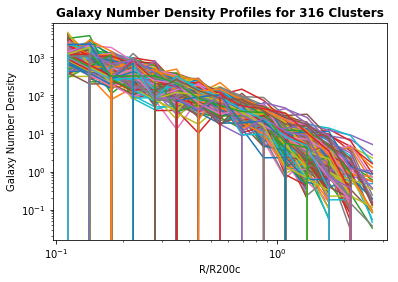

R_avg: 0.6982244391252947


Text(0, 0.5, 'dlog of Number Density')

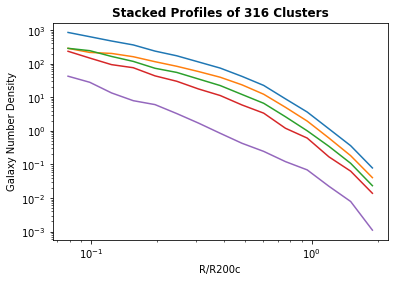

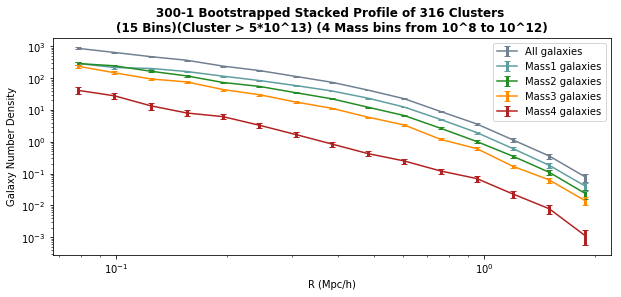

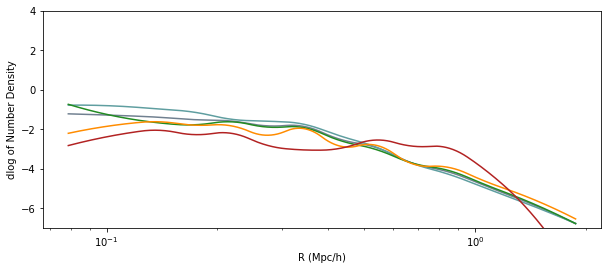

In [41]:
from astropy.cosmology import Planck15 as cosmo
plt.rcParams['figure.facecolor'] = 'w'
#R_list = np.array(Rmax_list)
scale_factor = header['Time']
mask_halomass = ((halo_grp['GroupMass'])>=((5*(10**3))))&(halo_grp['GroupNsubs']>=5)
Number_of_halos = len(halo_grp['GroupMass'][mask_halomass])
print("Number of halos with mass > 10^14 Msun:", Number_of_halos)

halo_array = np.arange(0,len(halo_grp['GroupMass']))
halo_array_masked = halo_array[mask_halomass]#[R_list>5.]
print(halo_array_masked)

bins = 15#30#15
Rmin = .1#.1
Rmax = 3#5.5 # for R200c#7

NDensity_list = []
NDensity_list_1 = []
NDensity_list_2 = []
NDensity_list_3 = []
NDensity_list_4 = []

ND_boot = []
ND_boot_1 = []
ND_boot_2 = []
ND_boot_3 = []
ND_boot_4 = []

RScale_list = []
Rmax_list = []
mask_photo = subhalo_grp['SubhaloStellarPhotometrics']<8e+36
photo_mask = mask_photo[:,0]
for i in range (1,8):
        photo_mask = photo_mask & mask_photo[:,i]

mask_basic = (photo_mask)&(subhalo_grp['SubhaloFlag'])&(subhalo_grp['SubhaloMass']!=0)&(subhalo_grp['SubhaloMassType'][:,4]!=0)

for h_i in halo_array_masked:
    print("\nHalo:", h_i)
    print("Halo Mass:", halo_grp['GroupMass'][h_i])
    N_subhalos = halo_grp['GroupNsubs'][h_i]
    print("N Subhalos:",N_subhalos)

    # MASKING OF SUBHALO MASS
    #subhalomass = np.array((np.sum(subhalo_grp['SubhaloMassInRadType'], axis=1)*1e10))
    #subhalomass = (subhalo_grp['SubhaloMass'])*1e10
    #subhalomass = np.array(((subhalo_grp['SubhaloStellarPhotometricsMassInRad'])*1e10))
    #mask = np.logical_and((subhalo_grp['SubhaloGrNr'])==h_i , subhalo_grp['SubhaloFlag']==True) #masking so not flagged halos that are in halo
    #subhalomass = np.array(((subhalo_grp['SubhaloMassInRadType'][:,4])*1e10))
    subhalomass = np.array(((subhalo_grp['SubhaloMassType'][:,4])*(1e10)))
    mask = ((subhalo_grp['SubhaloGrNr'])==h_i)&(subhalo_grp['SubhaloFlag']==True)#&(submass_stellar >= (10**9))#(subhalomass>(10))
    print("N Subhalos after first masking:", len(subhalo_grp['SubhaloGrNr'][mask]))
    mask_total = (mask_basic)&((subhalo_grp['SubhaloGrNr'])==h_i)#&(subhalomass > (10**9))
    mask_total2 = (mask_basic)&((subhalo_grp['SubhaloGrNr'])==h_i)&(subhalomass >= (10**8))
    print("N Subhalos after total masking (> 10^8):", len(subhalo_grp['SubhaloGrNr'][mask_total2]))

    '''
    # COLOR CUTS
    mag = subhalo_grp['SubhaloStellarPhotometrics'][mask_total]
    gmr = mag[:,4]-mag[:,5]
    rmz = mag[:,5]-mag[:,7]
    sm = np.log10(subhalomass[mask_total])
    b1 = -.2#.2
    b2 = 0.50#.59#.734
    r1 = 0.55#.6#.735
    r2 = 1.#1.
    sm1 = 10.2
    slope = -0.4
    intercept = 4.8
    blue_mask_subs = (gmr<b2)&(gmr<((slope*sm)+intercept))#(gmr<0.6)#(gmr<0.53)#
    red_mask_subs = (gmr>r1)&(sm>=sm1)&(gmr>((slope*sm)+intercept))#(gmr>=0.6)#(gmr>0.59)#
    green_mask_subs = (gmr>r1)&(sm<sm1)&(gmr<((slope*sm)+intercept))
    color_title = '[%s,%s,%s,%s,%s]' %(b2,r1,sm1,slope,intercept)
    '''
    #MASS BIN CUTS:
    #subhalomass_masked = subhalomass[mask_total]
    massmask1 = (subhalomass[mask_total2]>=(10**8))&(subhalomass[mask_total2]<(10**9))
    massmask2 = (subhalomass[mask_total2]>=(10**9))&(subhalomass[mask_total2]<(10**10))
    massmask3 = (subhalomass[mask_total2]>=(10**10))&(subhalomass[mask_total2]<(10**11))
    massmask4 = (subhalomass[mask_total2]>=(10**11))&(subhalomass[mask_total2]<(10**12))

    #print(len(subhalomass[mask_total][massmask1]))
    
    # COORDINATES
    CM_coords = subhalo_grp['SubhaloCM'][mask_total2]
    CM_halo = halo_grp['GroupCM'][h_i]
    
    #print("len of all, blue, red:", len(CM_coords), len(CM_coords[blue_mask_subs]), len(CM_coords[red_mask_subs]), len(CM_coords[green_mask_subs]))

    # MAKING PROFILE
    #r_subhalo = np.sqrt((CM_coords[:,0] - CM_halo[0])**2 + (CM_coords[:,1] - CM_halo[1])**2 + (CM_coords[:,2] - CM_halo[2])**2) # in ckpc/h
    redshift = header['Redshift']
    #H = cosmo.H(redshift)
    #conv_fac = 100/(H.value*1000)
    boxsize = header['BoxSize'] #kpc/h
    box_bounds = boxsize*np.ones(3)#*conv_fac
    dev = CM_coords-CM_halo
    for ind, q in enumerate(dev.T):
        q = np.where(np.abs(q) > 0.5 * box_bounds[ind], box_bounds[ind]-np.abs(q), q)
        dev.T[ind] = q
    r_subhalo = np.linalg.norm(dev, axis=1)*.001*scale_factor #Mpc/h
    
    R500c = .001*scale_factor*halo_grp['Group_R_Crit500'][h_i] #ckpc/h to Mpc/h
    R200c = .001*scale_factor*halo_grp['Group_R_Crit200'][h_i]
    R200m = .001*scale_factor*halo_grp['Group_R_Mean200'][h_i]
    M200m = halo_grp['Group_M_Mean200'][h_i]/.704
    print("R500c, R200c, R200m:",R500c, R200c, R200m)
    RScale = R200m
    RScale_list.append(RScale)
    Rmax_list.append(max(r_subhalo/RScale))

    bin_edge = RScale*np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1) #3.5 earlier
    bin_min = bin_edge[:-1]
    bin_max = bin_edge[1:]

    
    NDensity = []
    NDensity_1 = []
    NDensity_2 = []
    NDensity_3 = []
    NDensity_4 = []

    galaxies = []
    galaxies_1 = []
    galaxies_2 = []
    galaxies_3 = []
    galaxies_4 = []
    # LOOPING THROUGH RADII, CALCULATING NUMBER DENSITY
    for i in range(0,bins):
        mask_sep = (r_subhalo >=bin_min[i])&(r_subhalo < bin_max[i])
        r_masked = r_subhalo[mask_sep]
        number = len(r_masked)
        delta_r = bin_max[i] - bin_min[i]
        volume = (4/3)*np.pi*(((bin_max[i])**3) - ((bin_min[i])**3))
        density = number/volume
        r = (bin_min[i] + bin_max[i])/2
        galaxies.append(number)
        NDensity.append(density)
        #print(r, number, density)
        
        number_1 = len(r_subhalo[mask_sep & massmask1])
        number_2 = len(r_subhalo[mask_sep & massmask2])
        number_3 = len(r_subhalo[mask_sep & massmask3])
        number_4 = len(r_subhalo[mask_sep & massmask4])


        NDensity_1.append(number_1/volume)
        NDensity_2.append(number_2/volume)
        NDensity_3.append(number_3/volume)        
        NDensity_4.append(number_4/volume)        

        galaxies_1.append(number_1)
        galaxies_2.append(number_2)
        galaxies_3.append(number_3)
        galaxies_4.append(number_4)

    print("galaxies", galaxies)
    print("mass1 galaxies counted", galaxies_1)
    print("mass2 galaxies counted", galaxies_2)
    print("mass3 galaxies counted", galaxies_3)
    print("mass4 galaxies counted", galaxies_4)

        
    print("sum of galaxies:", sum(galaxies))
    r_shell = (bin_min + bin_max)/2
    r_stack = r_shell/RScale
    
    NDensity_list.append(NDensity) #/M200m
    NDensity_list_1.append(NDensity_1)
    NDensity_list_2.append(NDensity_2)
    NDensity_list_3.append(NDensity_3)
    NDensity_list_4.append(NDensity_4)

    #plt.figure()
    plt.plot(r_stack, NDensity, '-') #/M200m
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('R/R200c')
    plt.ylabel('Galaxy Number Density') #/M200m
    plt.title('Galaxy Number Density Profiles for %s Clusters' %(Number_of_halos), fontweight = 'bold')
plt.show()

# RADIAL BINS, R_AVG, ETC
R_avg = np.mean(RScale_list) #Mpc/h
print("R_avg:", R_avg)
#print("R200c list:", RScale_list)
bin_divided = np.logspace(np.log10(Rmin), np.log10(Rmax), num=bins+1)
bin_stack = R_avg*(bin_divided[1:]+bin_divided[:-1])/2

# PLOTTING BASIC AVERAGED STACKS
NDensity_stack = np.mean(NDensity_list, axis=0)
NDensity_stack_1 = np.mean(NDensity_list_1, axis=0)
NDensity_stack_2 = np.mean(NDensity_list_2, axis=0)
NDensity_stack_3 = np.mean(NDensity_list_3, axis=0)
NDensity_stack_4 = np.mean(NDensity_list_4, axis=0)

plt.figure()
plt.plot(bin_stack, NDensity_stack, '-')
plt.plot(bin_stack, NDensity_stack_1, '-')
plt.plot(bin_stack, NDensity_stack_2, '-')
plt.plot(bin_stack, NDensity_stack_3, '-')
plt.plot(bin_stack, NDensity_stack_4, '-')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('R/R200c')
plt.ylabel('Galaxy Number Density')#  (scaled by M200m)
plt.title('Stacked Profiles of %s Clusters' %(Number_of_halos), fontweight = 'bold', wrap=True)

# BOOTSTRAP PROFILES, ERRORBARS
Yi_avg, cov, boot_err = Bootstrap_Covariance(NDensity_list, 300, bins)
Yi_avg_1, cov_1, boot_err_1 = Bootstrap_Covariance(NDensity_list_1, 300, bins)
Yi_avg_2, cov_2, boot_err_2 = Bootstrap_Covariance(NDensity_list_2, 300, bins)
Yi_avg_3, cov_3, boot_err_3 = Bootstrap_Covariance(NDensity_list_3, 300, bins)
Yi_avg_4, cov_4, boot_err_4 = Bootstrap_Covariance(NDensity_list_4, 300, bins)

dlog_data_SG_x, dlog_data_SG_y, yy_fine, xx_fine = get_slope_sg(bin_stack, (Yi_avg), 1000)  
dlog_data_SG_x_1, dlog_data_SG_y_1, yy_fine_1, xx_fine_1 = get_slope_sg(bin_stack, (Yi_avg_1), 1000)  
dlog_data_SG_x_2, dlog_data_SG_y_2, yy_fine_2, xx_fine_2 = get_slope_sg(bin_stack, (Yi_avg_2), 1000)  
dlog_data_SG_x_3, dlog_data_SG_y_3, yy_fine_3, xx_fine_3 = get_slope_sg(bin_stack, (Yi_avg_3), 1000)  
dlog_data_SG_x_4, dlog_data_SG_y_4, yy_fine_4, xx_fine_4 = get_slope_sg(bin_stack, (Yi_avg_4), 1000)  

         
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(10,4))
plt.errorbar(bin_stack, Yi_avg, yerr = boot_err, c = 'slategrey', ecolor = 'slategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
plt.errorbar(bin_stack, Yi_avg_1, yerr = boot_err_1, c = 'cadetblue',ecolor = 'cadetblue', elinewidth = 3, capsize=3, label = 'Mass1 galaxies')
plt.errorbar(bin_stack, Yi_avg_2, yerr = boot_err_2, c='forestgreen', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Mass2 galaxies')
plt.errorbar(bin_stack, Yi_avg_3, yerr = boot_err_3, c='darkorange', ecolor = 'darkorange', elinewidth = 3, capsize=3, label = 'Mass3 galaxies')
plt.errorbar(bin_stack, Yi_avg_4, yerr = boot_err_4, c='firebrick', ecolor = 'firebrick', elinewidth = 3, capsize=3, label = 'Mass4 galaxies')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Bootstrapped Stacked Profile of %s Clusters \n (%s Bins)(Cluster > 5*10^13) (4 Mass bins from 10^8 to 10^12)' %(Number_of_halos, bins), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
plt.figure(figsize = (10,4))
plt.plot(dlog_data_SG_x, dlog_data_SG_y, c = 'slategrey')
plt.plot(dlog_data_SG_x_1, dlog_data_SG_y_1, c = 'cadetblue')
plt.plot(dlog_data_SG_x_2, dlog_data_SG_y_2, c = 'forestgreen')
plt.plot(dlog_data_SG_x_3, dlog_data_SG_y_3, c = 'darkorange')
plt.plot(dlog_data_SG_x_4, dlog_data_SG_y_4, c = 'firebrick')
plt.ylim(-7,4)
plt.xscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('dlog of Number Density')


Text(1.7, 3, 'SG: 5,3')

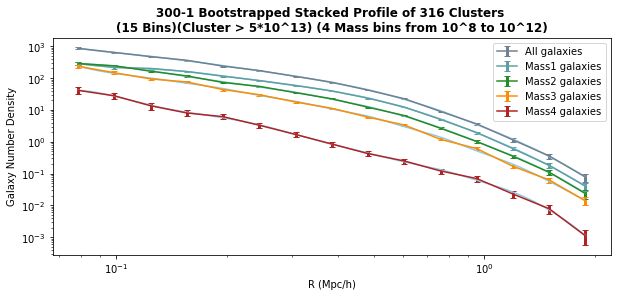

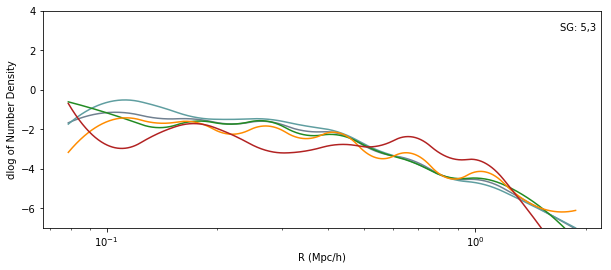

In [53]:
#Continued plotting of mass split profiles
dlog_data_SG_x, dlog_data_SG_y, yy_fine, xx_fine = get_slope_sg(bin_stack, (Yi_avg), 1000)  
dlog_data_SG_x_1, dlog_data_SG_y_1, yy_fine_1, xx_fine_1 = get_slope_sg(bin_stack, (Yi_avg_1), 1000)  
dlog_data_SG_x_2, dlog_data_SG_y_2, yy_fine_2, xx_fine_2 = get_slope_sg(bin_stack, (Yi_avg_2), 1000)  
dlog_data_SG_x_3, dlog_data_SG_y_3, yy_fine_3, xx_fine_3 = get_slope_sg(bin_stack, (Yi_avg_3), 1000)  
dlog_data_SG_x_4, dlog_data_SG_y_4, yy_fine_4, xx_fine_4 = get_slope_sg(bin_stack, (Yi_avg_4), 1000)  

         
# PLOTTING BOOTSTRAPPED STACKED PROFILES
plt.figure(figsize=(10,4))
plt.errorbar(bin_stack, Yi_avg, yerr = boot_err, c = 'slategrey', ecolor = 'slategrey', elinewidth = 3, capsize=3, label = 'All galaxies')
plt.errorbar(bin_stack, Yi_avg_1, yerr = boot_err_1, c = 'cadetblue',ecolor = 'cadetblue', elinewidth = 3, capsize=3, label = 'Mass1 galaxies')
plt.errorbar(bin_stack, Yi_avg_2, yerr = boot_err_2, c='forestgreen', ecolor = 'forestgreen', elinewidth = 3, capsize=3, label = 'Mass2 galaxies')
plt.errorbar(bin_stack, Yi_avg_3, yerr = boot_err_3, c='darkorange', ecolor = 'darkorange', elinewidth = 3, capsize=3, label = 'Mass3 galaxies')
plt.errorbar(bin_stack, Yi_avg_4, yerr = boot_err_4, c='firebrick', ecolor = 'firebrick', elinewidth = 3, capsize=3, label = 'Mass4 galaxies')
plt.plot(xx_fine, yy_fine, c = 'skyblue')
plt.plot(xx_fine_1, yy_fine_1, c = 'skyblue')
plt.plot(xx_fine_2, yy_fine_2, c = 'skyblue')
plt.plot(xx_fine_3, yy_fine_3, c = 'skyblue')
plt.plot(xx_fine_4, yy_fine_4, c = 'skyblue')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('Galaxy Number Density')# (scaled by M200m)
plt.title('300-1 Bootstrapped Stacked Profile of %s Clusters \n (%s Bins)(Cluster > 5*10^13) (4 Mass bins from 10^8 to 10^12)' %(Number_of_halos, bins), fontweight = 'bold', wrap=True)
plt.legend()

# SG LOG DERIVATIVE AND PLOT
plt.figure(figsize = (10,4))
plt.plot(dlog_data_SG_x, dlog_data_SG_y, c = 'slategrey')
plt.plot(dlog_data_SG_x_1, dlog_data_SG_y_1, c = 'cadetblue')
plt.plot(dlog_data_SG_x_2, dlog_data_SG_y_2, c = 'forestgreen')
plt.plot(dlog_data_SG_x_3, dlog_data_SG_y_3, c = 'darkorange')
plt.plot(dlog_data_SG_x_4, dlog_data_SG_y_4, c = 'firebrick')
plt.ylim(-7,4)
plt.xscale('log')
plt.xlabel('R (Mpc/h)')
plt.ylabel('dlog of Number Density')
plt.text(1.7,3,'SG: %s,%s'%(w,p))


## Histograms of halos

18767465
[87453.625 57760.027 56635.2   48978.547 40328.406 36715.758 31760.066
 31613.166 31110.195 30706.139 30121.426 29552.848 29994.932 27343.611
 25908.443 25923.64  24286.85  24397.488 22562.018 21426.482]
2686
[87453.625 57760.027 56635.2   48978.547 40328.406 36715.758 31760.066
 31613.166 31110.195 30706.139 30121.426 29552.848 29994.932 27343.611
 25908.443 25923.64  24286.85  24397.488 22562.018 21426.482]


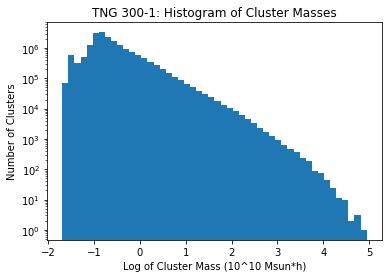

Count of subhalos: 15904796
Number of Total groups in Snapshot: 18767465
Number of Total subgroups in Snapshot: 15904796


/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


Halos with subhalos: 12952011
Halos with more than 5 subhalos: 88076


/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[

Subhalos not flagged and with DM mass > 10^11: 15594
Number of halos with mass > 10^13 Msun: 100


/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/Users/TaraD/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


Number of halos with mass > 10^13 Msun: 100


Text(0, 0.5, 'Number of Clusters (Log Scaled)')

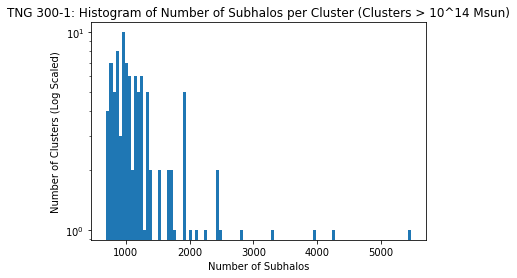

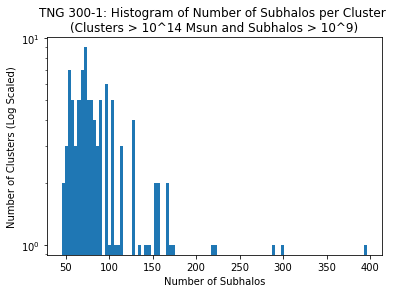

In [6]:
#HISTOGRAMS
print(halo_grp['count'])
Cluster_masses = halo_grp['GroupMass']

print(Cluster_masses[:20])
cluster_mass_mask = (Cluster_masses >= (10**3))
print(len((Cluster_masses)[cluster_mass_mask]))
print(((Cluster_masses)[cluster_mass_mask])[:20])
plt.hist((np.log10(Cluster_masses)), bins=50)#bins=[0,100])
plt.title('TNG 300-1: Histogram of Cluster Masses')
plt.xlabel('Log of Cluster Mass (10^10 Msun*h)')
plt.ylabel('Number of Clusters')
plt.yscale('log')
plt.show()

print("Count of subhalos:",subhalo_grp['count'])
print("Number of Total groups in Snapshot:", header['Ngroups_Total'])
print("Number of Total subgroups in Snapshot:", header['Nsubgroups_Total'])
grp_first_sub = halo_grp['GroupFirstSub']
mask = [grp_first_sub != -1]
print("Halos with subhalos:",len(grp_first_sub[mask]))
print("Halos with more than 5 subhalos:", len(halo_grp['GroupNsubs'][halo_grp['GroupNsubs']>5]))
mask_flag = [subhalo_grp['SubhaloFlag'] == True]
subhalomass = np.array(np.log10(np.sum(subhalo_grp['SubhaloMassInRadType'], axis=1)*1e10))
mask_mass = [subhalomass>11]
print("Subhalos not flagged and with DM mass > 10^11:", len((subhalo_grp['SubhaloFlag'])[mask_flag and mask_mass]))
mask_halomass = [(halo_grp['GroupMass'])>=(10**4)]
print("Number of halos with mass > 10^13 Msun:", len(halo_grp['GroupMass'][mask_halomass]))

#Histogram of number of subhalos
plt.figure()
x = (halo_grp['GroupNsubs'])[mask_halomass]#[halo_grp['GroupNsubs']>0]
#plt.hist((x), bins=np.logspace(np.log10(0.1),np.log10(1000), 50), log=True)#bins=[0,100])
plt.hist((x), bins=100, log=True)#bins=[0,100])
#plt.gca().set_xscale("log")
#plt.xscale('log')
plt.title('TNG 300-1: Histogram of Number of Subhalos per Cluster (Clusters > 10^14 Msun)')
plt.xlabel('Number of Subhalos')
plt.ylabel('Number of Clusters (Log Scaled)')

# SUBHALO MASS CUTS AND HISTOGRAM OF SUBHALSO PER CLUSTER
#mask_halomass = ((halo_grp['GroupMass'])>=((10**3)))#&(halo_grp['GroupNsubs']>=10)
Number_of_halos = len(halo_grp['GroupMass'][mask_halomass])
print("Number of halos with mass > 10^13 Msun:", Number_of_halos)
halo_array = np.arange(0,len(halo_grp['GroupMass']))
halo_array_masked = halo_array[mask_halomass]
halo_subhalos = []
mask_photo = subhalo_grp['SubhaloStellarPhotometrics']<8e+36
photo_mask = mask_photo[:,0]
for i in range (1,8):
        photo_mask = photo_mask & mask_photo[:,i]
mask_basic = (photo_mask)&(subhalo_grp['SubhaloFlag'])&(subhalo_grp['SubhaloMass']!=0)&(subhalo_grp['SubhaloMassType'][:,4]!=0)

for h_i in halo_array_masked:
    #print("\nHalo:", h_i)
    #print("Halo # of Subhalos:", halo_grp['GroupNsubs'][h_i])
    #print("Halo Mass:", halo_grp['GroupMass'][h_i])
    #print("Index of first subhalo:", halo_grp['GroupFirstSub'][h_i])
    iFS = halo_grp['GroupFirstSub'][h_i]
    #print(subhalo_grp['SubhaloGrNr'][iFS]) #635-783 is halo  in subhalo catalog
    N_subhalos = halo_grp['GroupNsubs'][h_i]
    #print("N Subhalos:",N_subhalos)

    # MASKING OF SUBHALO MASS
    subhalomass = np.array(((subhalo_grp['SubhaloMassType'][:,4])*(1e10)/0.704))
    mask = (mask_basic)&((subhalo_grp['SubhaloGrNr'])==h_i)&(subhalomass > (10**9))    #mask = [subhalo_grp['SubhaloFlag']==True]
    subhalos = len(subhalo_grp['SubhaloGrNr'][mask])
    halo_subhalos.append(subhalos)
halo_subhalos = np.array(halo_subhalos)

plt.figure()
#plt.hist((x), bins=np.logspace(np.log10(0.1),np.log10(1000), 50), log=True)#bins=[0,100])
plt.hist(halo_subhalos, bins=100, log=True)#bins=[0,100])
#plt.gca().set_xscale("log")
#plt.xscale('log')
plt.title('TNG 300-1: Histogram of Number of Subhalos per Cluster \n(Clusters > 10^14 Msun and Subhalos > 10^9)')
plt.xlabel('Number of Subhalos')
plt.ylabel('Number of Clusters (Log Scaled)')
